In [1]:
%matplotlib inline
import os,sys,inspect
PATH = 'C:/Users/Federico/Desktop/Data Science/Data Mining 2/Notebook/dm2_ts_dtw_and_similarity/fma_small'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt

#!pip install librosa 
import librosa
from os import listdir
from tqdm import tqdm
from sklearn.preprocessing import minmax_scale
import warnings
warnings.filterwarnings("ignore")
#!pip install pydub
#!pip install ffmpeg
from os import path
from pydub import AudioSegment
import librosa
from os import listdir
from tqdm import tqdm
from sklearn.preprocessing import minmax_scale
import warnings
warnings.filterwarnings("ignore")

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)         # normalize the Spectral Centroid wave

In [2]:
tracks_df = utils.load('data/fma_metadata/tracks.csv')
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   (album, comments)            106574 non-null  int64         
 1   (album, date_created)        103045 non-null  datetime64[ns]
 2   (album, date_released)       70294 non-null   datetime64[ns]
 3   (album, engineer)            15295 non-null   object        
 4   (album, favorites)           106574 non-null  int64         
 5   (album, id)                  106574 non-null  int64         
 6   (album, information)         83149 non-null   category      
 7   (album, listens)             106574 non-null  int64         
 8   (album, producer)            18060 non-null   object        
 9   (album, tags)                106574 non-null  object        
 10  (album, title)               105549 non-null  object        
 11  (album, tracks)           

In [3]:
track=tracks_df[[('track', 'genre_top'),('set', 'subset')]] 
track.head()

,track,set
,genre_top,subset
track_id,,
2,Hip-Hop,small
3,Hip-Hop,medium
5,Hip-Hop,small
10,Pop,small
20,NaN,large


In [4]:
track=track.loc[track[('set','subset')] == 'small']
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   (track, genre_top)  8000 non-null   category
 1   (set, subset)       8000 non-null   category
dtypes: category(2)
memory usage: 79.0 KB


In [5]:
track_ridotto=track.loc[ (track[('track', 'genre_top')] == 'Rock') | (track[('track', 'genre_top')] == 'Hip-Hop')
                       | (track[('track', 'genre_top')] == 'Electronic') | (track[('track', 'genre_top')] == 'Experimental')]
track_ridotto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 2 to 155066
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   (track, genre_top)  4000 non-null   category
 1   (set, subset)       4000 non-null   category
dtypes: category(2)
memory usage: 39.9 KB


In [6]:
n1=500
n2=500
n3=500
n4=500
lista=[]
dizionario=[]
for i in range(0,4000):
    if(track_ridotto.iloc[i][('track', 'genre_top')]=='Rock'):
        if n1>0:
            lista.append(i)
            dizionario.append(track_ridotto.iloc[i])
            n1=n1-1
    if(track_ridotto.iloc[i][('track', 'genre_top')]=='Hip-Hop'):
        if n2>0:
            lista.append(i)
            dizionario.append(track_ridotto.iloc[i])
            n2=n2-1
    if(track_ridotto.iloc[i][('track', 'genre_top')]=='Electronic'):
        if n3>0:
            lista.append(i)
            dizionario.append(track_ridotto.iloc[i])
            n3=n3-1
    if(track_ridotto.iloc[i][('track', 'genre_top')]=='Experimental'):
        if n4>0:
            lista.append(i)
            dizionario.append(track_ridotto.iloc[i])
            n4=n4-1



In [7]:
len(lista)

2000

In [8]:
df = pd.DataFrame(track_ridotto)

In [9]:
df

,track,set
,genre_top,subset
track_id,,
2,Hip-Hop,small
5,Hip-Hop,small
148,Experimental,small
182,Rock,small
255,Rock,small
...,...,...
154306,Hip-Hop,small
154307,Hip-Hop,small


In [10]:
df[('track', 'genre_top')].value_counts()

Rock                   1000
Hip-Hop                1000
Experimental           1000
Electronic             1000
Spoken                    0
Soul-RnB                  0
Pop                       0
Old-Time / Historic       0
Jazz                      0
International             0
Instrumental              0
Folk                      0
Easy Listening            0
Country                   0
Classical                 0
Blues                     0
Name: (track, genre_top), dtype: int64

In [11]:
2 in df.index

True

In [12]:
path=('data/fma_metadata/fma_small/000/000002.wav')

In [20]:
ts,sr = librosa.load(path,sr=12000, offset=0, duration=28)
spect = librosa.feature.spectral_centroid(ts, sr=sr)[0]


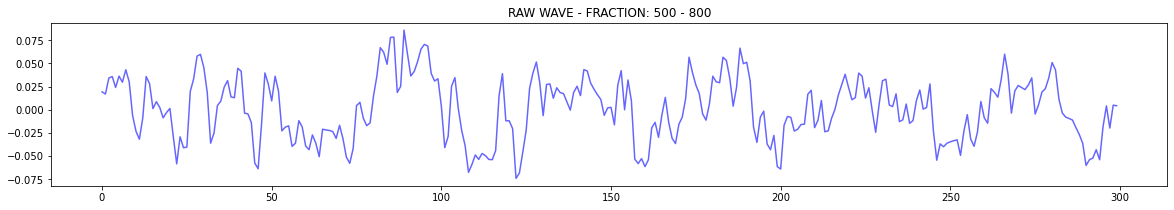

In [42]:
plt.figure(figsize=(20,3))

plt.title("RAW WAVE - FRACTION: 500 - 800")
plt.plot(ts[500:800], color='b',alpha=0.6)

In [35]:
ts.shape

(336001,)

In [36]:
# create dataframe raw - time series
ts_df = pd.DataFrame(data=ts)
ts_df.shape

(336001, 1)

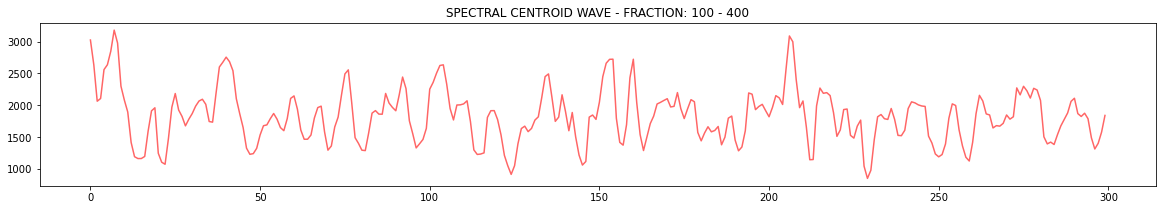

In [45]:
plt.figure(figsize=(20,3))

plt.title("SPECTRAL CENTROID WAVE - FRACTION: 100 - 400")
plt.plot(spect[100:400], color='r',alpha=0.6)

In [44]:
spect.shape

(657,)

In [268]:
import IPython.display as ipd

In [269]:
ipd.Audio(ts,rate=sr)

In [20]:
2 in df.index

True

In [142]:

# path folder with .mp3 data
path = 'data/fma_metadata/fma_small'                  

list_ts = []  # list raw wave Time Series
track_ids = [] # list of time series indexes 

for folder in listdir(path):
    print(folder)

    if folder != ".DS_Store" and folder != 'checksums' and folder !='README.txt':       # ignores irrelevant files
        for track_num in tqdm(listdir( path +'/'+ folder)):

            if track_num != ".DS_Store" and track_num != 'checksums' and track_num !='README.txt' and track_num.endswith('.wav'):  # ignore irrelevant files 
                track_id = track_num.replace('.wav', '').lstrip('0')  # format track_id 
                print(track_id)
                print(type(track_id))

                if int(track_id) in df.index:
                    print('ok')

                    track_path = path +'/'+ folder +'/' + track_num                   
                
                    try:                                                               # skip corrupted .mp3s 
                        # extract wave TS
                        ts, sr = librosa.load(track_path, sr=12000, offset=0, duration=28)    
                        spect = librosa.feature.spectral_centroid(ts, sr=sr)[0]
                        #append time series
                        list_ts.append(spect)
                        track_ids.append(track_id)
                    except:
                        continue

  0%|          | 0/124 [00:00<?, ?it/s]

000
2
<class 'str'>
ok


  2%|▏         | 2/124 [00:01<01:56,  1.04it/s]

5
<class 'str'>
ok


  3%|▎         | 4/124 [00:03<01:47,  1.11it/s]

10
<class 'str'>
140
<class 'str'>
141
<class 'str'>
148
<class 'str'>
ok


 10%|▉         | 12/124 [00:05<01:19,  1.40it/s]

182
<class 'str'>
ok


 11%|█▏        | 14/124 [00:07<01:27,  1.26it/s]

190
<class 'str'>
193
<class 'str'>
194
<class 'str'>
197
<class 'str'>
200
<class 'str'>
203
<class 'str'>
204
<class 'str'>
207
<class 'str'>
210
<class 'str'>
211
<class 'str'>
212
<class 'str'>
213
<class 'str'>
255
<class 'str'>
ok


 32%|███▏      | 40/124 [00:09<00:48,  1.74it/s]

256
<class 'str'>
ok


 34%|███▍      | 42/124 [00:10<00:51,  1.60it/s]

368
<class 'str'>
ok


 35%|███▌      | 44/124 [00:11<00:52,  1.53it/s]

424
<class 'str'>
ok


 37%|███▋      | 46/124 [00:13<00:52,  1.49it/s]

459
<class 'str'>
ok


 39%|███▊      | 48/124 [00:14<00:51,  1.47it/s]

534
<class 'str'>
540
<class 'str'>
546
<class 'str'>
574
<class 'str'>
ok


 45%|████▌     | 56/124 [00:16<00:37,  1.83it/s]

602
<class 'str'>
615
<class 'str'>
ok


 48%|████▊     | 60/124 [00:18<00:31,  2.05it/s]

620
<class 'str'>
621
<class 'str'>
625
<class 'str'>
666
<class 'str'>
667
<class 'str'>
676
<class 'str'>
ok


 58%|█████▊    | 72/124 [00:19<00:19,  2.65it/s]

690
<class 'str'>
ok


 60%|█████▉    | 74/124 [00:22<00:32,  1.54it/s]

694
<class 'str'>
ok


 61%|██████▏   | 76/124 [00:24<00:38,  1.25it/s]

695
<class 'str'>
ok


 63%|██████▎   | 78/124 [00:28<00:53,  1.16s/it]

704
<class 'str'>
705
<class 'str'>
706
<class 'str'>
707
<class 'str'>
708
<class 'str'>
709
<class 'str'>
714
<class 'str'>
715
<class 'str'>
716
<class 'str'>
718
<class 'str'>
777
<class 'str'>
ok


 81%|████████  | 100/124 [00:32<00:20,  1.15it/s]

814
<class 'str'>
821
<class 'str'>
822
<class 'str'>
825
<class 'str'>
ok


 87%|████████▋ | 108/124 [00:35<00:11,  1.40it/s]

853
<class 'str'>
890
<class 'str'>
892
<class 'str'>
897
<class 'str'>
ok


 94%|█████████▎| 116/124 [00:38<00:04,  1.65it/s]

993
<class 'str'>
ok


 95%|█████████▌| 118/124 [00:40<00:04,  1.36it/s]

995
<class 'str'>
ok


 97%|█████████▋| 120/124 [00:41<00:03,  1.29it/s]

997
<class 'str'>
ok


 98%|█████████▊| 122/124 [00:43<00:01,  1.32it/s]

998
<class 'str'>
ok


  0%|          | 0/120 [00:00<?, ?it/s]

001
1039
<class 'str'>
ok


  2%|▏         | 2/120 [00:01<01:23,  1.41it/s]

1040
<class 'str'>
ok


  3%|▎         | 4/120 [00:02<01:22,  1.40it/s]

1066
<class 'str'>
ok


  5%|▌         | 6/120 [00:04<01:21,  1.40it/s]

1069
<class 'str'>
ok


  7%|▋         | 8/120 [00:05<01:20,  1.39it/s]

1073
<class 'str'>
ok


  8%|▊         | 10/120 [00:07<01:21,  1.34it/s]

1075
<class 'str'>
ok


 10%|█         | 12/120 [00:08<01:21,  1.32it/s]

1082
<class 'str'>
1083
<class 'str'>
ok


 13%|█▎        | 16/120 [00:10<01:08,  1.52it/s]

1087
<class 'str'>
ok


 15%|█▌        | 18/120 [00:12<01:14,  1.36it/s]

1102
<class 'str'>
ok


 17%|█▋        | 20/120 [00:14<01:20,  1.24it/s]

1193
<class 'str'>
1195
<class 'str'>
1196
<class 'str'>
1197
<class 'str'>
1249
<class 'str'>
ok


 25%|██▌       | 30/120 [00:16<00:55,  1.61it/s]

1259
<class 'str'>
ok


 27%|██▋       | 32/120 [00:18<01:10,  1.25it/s]

1270
<class 'str'>
ok


 28%|██▊       | 34/120 [00:20<01:11,  1.20it/s]

1276
<class 'str'>
ok


 30%|███       | 36/120 [00:22<01:09,  1.21it/s]

1277
<class 'str'>
ok


 32%|███▏      | 38/120 [00:23<01:07,  1.21it/s]

1278
<class 'str'>
ok


 33%|███▎      | 40/120 [00:25<01:04,  1.25it/s]

1417
<class 'str'>
ok


 35%|███▌      | 42/120 [00:26<01:00,  1.30it/s]

1427
<class 'str'>
ok


 37%|███▋      | 44/120 [00:28<00:57,  1.33it/s]

1443
<class 'str'>
ok


 38%|███▊      | 46/120 [00:29<00:55,  1.34it/s]

1482
<class 'str'>
ok


 40%|████      | 48/120 [00:31<00:53,  1.36it/s]

1510
<class 'str'>
ok


 42%|████▏     | 50/120 [00:32<00:51,  1.36it/s]

1544
<class 'str'>
1642
<class 'str'>
1644
<class 'str'>
1649
<class 'str'>
1661
<class 'str'>
1663
<class 'str'>
1666
<class 'str'>
1673
<class 'str'>
ok


 55%|█████▌    | 66/120 [00:33<00:29,  1.85it/s]

1680
<class 'str'>
1681
<class 'str'>
1682
<class 'str'>
1683
<class 'str'>
1684
<class 'str'>
1685
<class 'str'>
1686
<class 'str'>
1687
<class 'str'>
1688
<class 'str'>
1689
<class 'str'>
1701
<class 'str'>
1702
<class 'str'>
1703
<class 'str'>
1704
<class 'str'>
1706
<class 'str'>
ok


 80%|████████  | 96/120 [00:35<00:09,  2.53it/s]

1720
<class 'str'>
ok


 82%|████████▏ | 98/120 [00:37<00:12,  1.83it/s]

1732
<class 'str'>
ok


 83%|████████▎ | 100/120 [00:39<00:13,  1.45it/s]

1733
<class 'str'>
ok


 85%|████████▌ | 102/120 [00:41<00:14,  1.24it/s]

1735
<class 'str'>
ok


 87%|████████▋ | 104/120 [00:43<00:13,  1.18it/s]

1736
<class 'str'>
ok


 88%|████████▊ | 106/120 [00:45<00:11,  1.19it/s]

1883
<class 'str'>
ok


 90%|█████████ | 108/120 [00:46<00:09,  1.24it/s]

1891
<class 'str'>
ok


 92%|█████████▏| 110/120 [00:48<00:07,  1.28it/s]

1893
<class 'str'>
1924
<class 'str'>
1925
<class 'str'>
1929
<class 'str'>
ok


 98%|█████████▊| 118/120 [00:49<00:01,  1.67it/s]

1930
<class 'str'>
ok


  0%|          | 0/8 [00:00<?, ?it/s]

002
2012
<class 'str'>
ok


 25%|██▌       | 2/8 [00:01<00:04,  1.45it/s]

2096
<class 'str'>
ok


  0%|          | 0/108 [00:00<?, ?it/s]

2097
<class 'str'>
2099
<class 'str'>
003
3263
<class 'str'>
3264
<class 'str'>
3265
<class 'str'>
3266
<class 'str'>
3270
<class 'str'>
3271
<class 'str'>
3272
<class 'str'>
3273
<class 'str'>
3274
<class 'str'>
3492
<class 'str'>
ok


 19%|█▊        | 20/108 [00:05<00:23,  3.71it/s]

3532
<class 'str'>
3533
<class 'str'>
3534
<class 'str'>
3535
<class 'str'>
3537
<class 'str'>
3538
<class 'str'>
3573
<class 'str'>
ok


 31%|███▏      | 34/108 [00:09<00:19,  3.75it/s]

3598
<class 'str'>
3624
<class 'str'>
ok


 35%|███▌      | 38/108 [00:12<00:30,  2.28it/s]

3707
<class 'str'>
3708
<class 'str'>
3720
<class 'str'>
ok


 41%|████      | 44/108 [00:15<00:29,  2.15it/s]

3721
<class 'str'>
ok


 43%|████▎     | 46/108 [00:19<00:57,  1.08it/s]

3722
<class 'str'>
ok


 44%|████▍     | 48/108 [00:22<01:06,  1.11s/it]

3724
<class 'str'>
ok


 46%|████▋     | 50/108 [00:25<01:10,  1.22s/it]

3725
<class 'str'>
ok


 48%|████▊     | 52/108 [00:28<01:08,  1.22s/it]

3761
<class 'str'>
ok


 50%|█████     | 54/108 [00:31<01:11,  1.32s/it]

3762
<class 'str'>
ok


 52%|█████▏    | 56/108 [00:34<01:16,  1.48s/it]

3763
<class 'str'>
ok


 54%|█████▎    | 58/108 [00:37<01:08,  1.37s/it]

3765
<class 'str'>
ok


 56%|█████▌    | 60/108 [00:39<01:03,  1.32s/it]

3766
<class 'str'>
ok


 57%|█████▋    | 62/108 [00:42<01:01,  1.34s/it]

3775
<class 'str'>
3776
<class 'str'>
3777
<class 'str'>
3778
<class 'str'>
3779
<class 'str'>
3832
<class 'str'>
3833
<class 'str'>
ok


 70%|███████   | 76/108 [00:44<00:31,  1.02it/s]

3840
<class 'str'>
ok


 72%|███████▏  | 78/108 [00:46<00:31,  1.04s/it]

3880
<class 'str'>
3895
<class 'str'>
3896
<class 'str'>
3904
<class 'str'>
3905
<class 'str'>
3906
<class 'str'>
3908
<class 'str'>
3909
<class 'str'>
3910
<class 'str'>
3911
<class 'str'>
3912
<class 'str'>
3913
<class 'str'>
3920
<class 'str'>
3921
<class 'str'>
3950
<class 'str'>
ok


  0%|          | 0/142 [00:00<?, ?it/s]

004
4013
<class 'str'>
4017
<class 'str'>
4022
<class 'str'>
ok


  4%|▍         | 6/142 [00:01<00:41,  3.26it/s]

4037
<class 'str'>
4066
<class 'str'>
4067
<class 'str'>
4068
<class 'str'>
4069
<class 'str'>
4070
<class 'str'>
4071
<class 'str'>
4072
<class 'str'>
4073
<class 'str'>
4074
<class 'str'>
4075
<class 'str'>
4076
<class 'str'>
4077
<class 'str'>
4078
<class 'str'>
4079
<class 'str'>
4080
<class 'str'>
4091
<class 'str'>
4092
<class 'str'>
4093
<class 'str'>
4094
<class 'str'>
4095
<class 'str'>
4096
<class 'str'>
4097
<class 'str'>
4098
<class 'str'>
4099
<class 'str'>
4100
<class 'str'>
4101
<class 'str'>
4102
<class 'str'>
4103
<class 'str'>
4108
<class 'str'>
ok


 46%|████▋     | 66/142 [00:03<00:16,  4.47it/s]

4232
<class 'str'>
4233
<class 'str'>
4234
<class 'str'>
4235
<class 'str'>
4236
<class 'str'>
4239
<class 'str'>
4450
<class 'str'>
4507
<class 'str'>
4508
<class 'str'>
4509
<class 'str'>
4510
<class 'str'>
4511
<class 'str'>
4519
<class 'str'>
ok


 65%|██████▍   | 92/142 [00:05<00:08,  5.62it/s]

4520
<class 'str'>
ok


 66%|██████▌   | 94/142 [00:07<00:18,  2.64it/s]

4521
<class 'str'>
ok


 68%|██████▊   | 96/142 [00:08<00:23,  2.00it/s]

4522
<class 'str'>
ok


 69%|██████▉   | 98/142 [00:10<00:25,  1.71it/s]

4682
<class 'str'>
ok


 70%|███████   | 100/142 [00:12<00:32,  1.27it/s]

4684
<class 'str'>
ok


 72%|███████▏  | 102/142 [00:15<00:38,  1.03it/s]

4685
<class 'str'>
ok


 73%|███████▎  | 104/142 [00:19<00:48,  1.27s/it]

4688
<class 'str'>
ok


 75%|███████▍  | 106/142 [00:22<00:48,  1.35s/it]

4777
<class 'str'>
ok


 76%|███████▌  | 108/142 [00:24<00:44,  1.30s/it]

4778
<class 'str'>
ok


 77%|███████▋  | 110/142 [00:27<00:42,  1.32s/it]

4779
<class 'str'>
ok


 79%|███████▉  | 112/142 [00:30<00:41,  1.37s/it]

4780
<class 'str'>
ok


 80%|████████  | 114/142 [00:33<00:39,  1.40s/it]

4781
<class 'str'>
ok


 82%|████████▏ | 116/142 [00:35<00:34,  1.32s/it]

4782
<class 'str'>
ok


 83%|████████▎ | 118/142 [00:38<00:31,  1.33s/it]

4784
<class 'str'>
ok


 85%|████████▍ | 120/142 [00:40<00:27,  1.25s/it]

4785
<class 'str'>
ok


 86%|████████▌ | 122/142 [00:42<00:22,  1.14s/it]

4786
<class 'str'>
ok


 87%|████████▋ | 124/142 [00:44<00:18,  1.05s/it]

4787
<class 'str'>
ok


 89%|████████▊ | 126/142 [00:46<00:17,  1.07s/it]

4788
<class 'str'>
ok


 90%|█████████ | 128/142 [00:49<00:17,  1.22s/it]

4799
<class 'str'>
ok


 92%|█████████▏| 130/142 [00:51<00:14,  1.23s/it]

4835
<class 'str'>
ok


 93%|█████████▎| 132/142 [00:54<00:12,  1.24s/it]

4836
<class 'str'>
ok


 94%|█████████▍| 134/142 [00:57<00:09,  1.25s/it]

4838
<class 'str'>
ok


  0%|          | 0/34 [00:00<?, ?it/s]

4846
<class 'str'>
4848
<class 'str'>
4849
<class 'str'>
005
5006
<class 'str'>
ok


  6%|▌         | 2/34 [00:02<00:43,  1.35s/it]

5156
<class 'str'>
5157
<class 'str'>
5158
<class 'str'>
5159
<class 'str'>
5169
<class 'str'>
5170
<class 'str'>
5171
<class 'str'>
5191
<class 'str'>
5264
<class 'str'>
ok


 59%|█████▉    | 20/34 [00:06<00:14,  1.00s/it]

5268
<class 'str'>
ok


 65%|██████▍   | 22/34 [00:09<00:13,  1.15s/it]

5376
<class 'str'>
5381
<class 'str'>
5521
<class 'str'>
ok


  0%|          | 0/142 [00:00<?, ?it/s]

5879
<class 'str'>
5936
<class 'str'>
5940
<class 'str'>
006
6329
<class 'str'>
6330
<class 'str'>
6331
<class 'str'>
6332
<class 'str'>
6333
<class 'str'>
6342
<class 'str'>
6354
<class 'str'>
6357
<class 'str'>
6358
<class 'str'>
6360
<class 'str'>
6363
<class 'str'>
6366
<class 'str'>
6367
<class 'str'>
6368
<class 'str'>
6370
<class 'str'>
6372
<class 'str'>
6373
<class 'str'>
6376
<class 'str'>
6379
<class 'str'>
6380
<class 'str'>
6381
<class 'str'>
6382
<class 'str'>
6383
<class 'str'>
6385
<class 'str'>
6387
<class 'str'>
6389
<class 'str'>
6390
<class 'str'>
6393
<class 'str'>
6394
<class 'str'>
6396
<class 'str'>
6406
<class 'str'>
6407
<class 'str'>
6439
<class 'str'>
ok


 46%|████▋     | 66/142 [00:02<00:03, 24.79it/s]

6440
<class 'str'>
ok


 48%|████▊     | 68/142 [00:05<00:30,  2.46it/s]

6442
<class 'str'>
ok


 49%|████▉     | 70/142 [00:06<00:39,  1.80it/s]

6443
<class 'str'>
ok


 51%|█████     | 72/142 [00:09<00:51,  1.36it/s]

6448
<class 'str'>
ok


 52%|█████▏    | 74/142 [00:11<00:59,  1.14it/s]

6459
<class 'str'>
6461
<class 'str'>
6463
<class 'str'>
6467
<class 'str'>
6469
<class 'str'>
6517
<class 'str'>
ok


 61%|██████    | 86/142 [00:13<00:37,  1.50it/s]

6519
<class 'str'>
ok


 62%|██████▏   | 88/142 [00:16<00:48,  1.12it/s]

6603
<class 'str'>
ok


 63%|██████▎   | 90/142 [00:18<00:51,  1.01it/s]

6605
<class 'str'>
ok


 65%|██████▍   | 92/142 [00:21<00:54,  1.09s/it]

6606
<class 'str'>
ok


 66%|██████▌   | 94/142 [00:24<00:54,  1.13s/it]

6607
<class 'str'>
ok


 68%|██████▊   | 96/142 [00:26<00:55,  1.21s/it]

6608
<class 'str'>
ok


 69%|██████▉   | 98/142 [00:29<00:51,  1.17s/it]

6609
<class 'str'>
ok


 70%|███████   | 100/142 [00:30<00:45,  1.08s/it]

6610
<class 'str'>
ok


 72%|███████▏  | 102/142 [00:32<00:40,  1.02s/it]

6611
<class 'str'>
ok


 73%|███████▎  | 104/142 [00:34<00:37,  1.00it/s]

6674
<class 'str'>
ok


 75%|███████▍  | 106/142 [00:36<00:34,  1.05it/s]

6675
<class 'str'>
ok


 76%|███████▌  | 108/142 [00:38<00:34,  1.02s/it]

6677
<class 'str'>
ok


 77%|███████▋  | 110/142 [00:41<00:36,  1.14s/it]

6679
<class 'str'>
ok


 79%|███████▉  | 112/142 [00:43<00:35,  1.20s/it]

6680
<class 'str'>
ok


 80%|████████  | 114/142 [00:46<00:35,  1.26s/it]

6684
<class 'str'>
ok


 82%|████████▏ | 116/142 [00:49<00:33,  1.30s/it]

6762
<class 'str'>
6776
<class 'str'>
ok


 85%|████████▍ | 120/142 [00:51<00:23,  1.08s/it]

6778
<class 'str'>
ok


 86%|████████▌ | 122/142 [00:54<00:22,  1.14s/it]

6779
<class 'str'>
6782
<class 'str'>
6783
<class 'str'>
6788
<class 'str'>
ok


  0%|          | 0/74 [00:00<?, ?it/s]

6802
<class 'str'>
6803
<class 'str'>
6854
<class 'str'>
6855
<class 'str'>
6856
<class 'str'>
6857
<class 'str'>
007
7011
<class 'str'>
ok


  3%|▎         | 2/74 [00:02<01:42,  1.42s/it]

7373
<class 'str'>
ok


  5%|▌         | 4/74 [00:06<01:43,  1.48s/it]

7374
<class 'str'>
ok


  8%|▊         | 6/74 [00:08<01:35,  1.41s/it]

7375
<class 'str'>
ok


 11%|█         | 8/74 [00:10<01:27,  1.33s/it]

7376
<class 'str'>
ok


 14%|█▎        | 10/74 [00:13<01:20,  1.26s/it]

7377
<class 'str'>
ok


 16%|█▌        | 12/74 [00:15<01:15,  1.22s/it]

7378
<class 'str'>
ok


 19%|█▉        | 14/74 [00:17<01:09,  1.15s/it]

7379
<class 'str'>
ok


 22%|██▏       | 16/74 [00:18<01:00,  1.04s/it]

7381
<class 'str'>
ok


 24%|██▍       | 18/74 [00:20<00:57,  1.02s/it]

7383
<class 'str'>
ok


 27%|██▋       | 20/74 [00:22<00:53,  1.02it/s]

7385
<class 'str'>
ok


 30%|██▉       | 22/74 [00:24<00:53,  1.03s/it]

7386
<class 'str'>
ok


 32%|███▏      | 24/74 [00:27<00:53,  1.07s/it]

7388
<class 'str'>
ok


 35%|███▌      | 26/74 [00:29<00:50,  1.05s/it]

7391
<class 'str'>
ok


 38%|███▊      | 28/74 [00:31<00:48,  1.06s/it]

7393
<class 'str'>
ok


 41%|████      | 30/74 [00:33<00:47,  1.09s/it]

7481
<class 'str'>
ok


 43%|████▎     | 32/74 [00:36<00:47,  1.12s/it]

7482
<class 'str'>
ok


 46%|████▌     | 34/74 [00:38<00:45,  1.13s/it]

7483
<class 'str'>
ok


 49%|████▊     | 36/74 [00:40<00:42,  1.11s/it]

7487
<class 'str'>
ok


 51%|█████▏    | 38/74 [00:42<00:39,  1.09s/it]

7488
<class 'str'>
ok


 54%|█████▍    | 40/74 [00:44<00:37,  1.11s/it]

7489
<class 'str'>
ok


 57%|█████▋    | 42/74 [00:49<00:45,  1.42s/it]

7490
<class 'str'>
ok


 59%|█████▉    | 44/74 [00:53<00:47,  1.58s/it]

7491
<class 'str'>
ok


 62%|██████▏   | 46/74 [00:55<00:39,  1.42s/it]

7492
<class 'str'>
ok


 65%|██████▍   | 48/74 [00:58<00:38,  1.46s/it]

7495
<class 'str'>
ok


 68%|██████▊   | 50/74 [01:00<00:33,  1.41s/it]

7526
<class 'str'>
7527
<class 'str'>
7528
<class 'str'>
7529
<class 'str'>
7548
<class 'str'>
ok


 81%|████████  | 60/74 [01:03<00:14,  1.07s/it]

7554
<class 'str'>
ok


 84%|████████▍ | 62/74 [01:06<00:14,  1.22s/it]

7709
<class 'str'>
7710
<class 'str'>
7711
<class 'str'>
7712
<class 'str'>
7713
<class 'str'>
7872
<class 'str'>
ok


  0%|          | 0/20 [00:00<?, ?it/s]

008
8056
<class 'str'>
ok


 10%|█         | 2/20 [00:02<00:21,  1.20s/it]

8208
<class 'str'>
ok


 20%|██        | 4/20 [00:04<00:17,  1.11s/it]

8256
<class 'str'>
8259
<class 'str'>
8261
<class 'str'>
8345
<class 'str'>
ok


 60%|██████    | 12/20 [00:06<00:06,  1.17it/s]

8357
<class 'str'>
ok


 70%|███████   | 14/20 [00:07<00:05,  1.19it/s]

8363
<class 'str'>
ok


 80%|████████  | 16/20 [00:09<00:03,  1.21it/s]

8372
<class 'str'>
ok


 90%|█████████ | 18/20 [00:12<00:02,  1.03s/it]

8416
<class 'str'>
ok


  0%|          | 0/46 [00:00<?, ?it/s]

009
9152
<class 'str'>
ok


  4%|▍         | 2/46 [00:02<00:52,  1.20s/it]

9155
<class 'str'>
ok


  9%|▊         | 4/46 [00:05<00:53,  1.27s/it]

9307
<class 'str'>
ok


 13%|█▎        | 6/46 [00:07<00:48,  1.21s/it]

9476
<class 'str'>
ok


 17%|█▋        | 8/46 [00:09<00:42,  1.11s/it]

9477
<class 'str'>
ok


 22%|██▏       | 10/46 [00:11<00:38,  1.06s/it]

9491
<class 'str'>
ok


 26%|██▌       | 12/46 [00:13<00:37,  1.11s/it]

9505
<class 'str'>
ok


 30%|███       | 14/46 [00:15<00:35,  1.10s/it]

9511
<class 'str'>
ok


 35%|███▍      | 16/46 [00:17<00:30,  1.02s/it]

9512
<class 'str'>
9513
<class 'str'>
ok


 43%|████▎     | 20/46 [00:19<00:22,  1.15it/s]

9550
<class 'str'>
ok


 48%|████▊     | 22/46 [00:21<00:22,  1.05it/s]

9553
<class 'str'>
ok


 52%|█████▏    | 24/46 [00:23<00:21,  1.02it/s]

9555
<class 'str'>
ok


 57%|█████▋    | 26/46 [00:25<00:20,  1.02s/it]

9557
<class 'str'>
ok


 61%|██████    | 28/46 [00:28<00:18,  1.03s/it]

9559
<class 'str'>
ok


 65%|██████▌   | 30/46 [00:30<00:17,  1.06s/it]

9560
<class 'str'>
ok


 70%|██████▉   | 32/46 [00:32<00:15,  1.13s/it]

9678
<class 'str'>
ok


 74%|███████▍  | 34/46 [00:34<00:12,  1.06s/it]

9721
<class 'str'>
ok


 78%|███████▊  | 36/46 [00:37<00:11,  1.17s/it]

9846
<class 'str'>
ok


 83%|████████▎ | 38/46 [00:39<00:09,  1.13s/it]

9887
<class 'str'>
9888
<class 'str'>
9918
<class 'str'>
ok


 96%|█████████▌| 44/46 [00:42<00:01,  1.07it/s]

9962
<class 'str'>
ok


  0%|          | 0/130 [00:00<?, ?it/s]

010
10186
<class 'str'>
10192
<class 'str'>
ok


  3%|▎         | 4/130 [00:03<01:55,  1.09it/s]

10250
<class 'str'>
10374
<class 'str'>
ok


  6%|▌         | 8/130 [00:06<01:47,  1.13it/s]

10375
<class 'str'>
ok


  8%|▊         | 10/130 [00:08<01:52,  1.07it/s]

10376
<class 'str'>
ok


  9%|▉         | 12/130 [00:10<01:46,  1.10it/s]

10377
<class 'str'>
ok


 11%|█         | 14/130 [00:12<01:50,  1.05it/s]

10381
<class 'str'>
10382
<class 'str'>
10383
<class 'str'>
10384
<class 'str'>
10385
<class 'str'>
10386
<class 'str'>
10387
<class 'str'>
10388
<class 'str'>
10389
<class 'str'>
10435
<class 'str'>
ok


 26%|██▌       | 34/130 [00:14<01:06,  1.43it/s]

10438
<class 'str'>
10439
<class 'str'>
10440
<class 'str'>
10441
<class 'str'>
10442
<class 'str'>
10443
<class 'str'>
10444
<class 'str'>
10447
<class 'str'>
10458
<class 'str'>
10480
<class 'str'>
10481
<class 'str'>
10485
<class 'str'>
10521
<class 'str'>
ok


 46%|████▌     | 60/130 [00:17<00:36,  1.92it/s]

10527
<class 'str'>
ok


 48%|████▊     | 62/130 [00:20<00:48,  1.40it/s]

10535
<class 'str'>
ok


 49%|████▉     | 64/130 [00:23<01:03,  1.03it/s]

10541
<class 'str'>
ok


 51%|█████     | 66/130 [00:25<01:07,  1.06s/it]

10575
<class 'str'>
10577
<class 'str'>
10668
<class 'str'>
ok


 55%|█████▌    | 72/130 [00:28<00:50,  1.16it/s]

10669
<class 'str'>
ok


 57%|█████▋    | 74/130 [00:30<00:56,  1.00s/it]

10670
<class 'str'>
ok


 58%|█████▊    | 76/130 [00:34<01:11,  1.32s/it]

10671
<class 'str'>
ok


 60%|██████    | 78/130 [00:38<01:14,  1.44s/it]

10672
<class 'str'>
ok


 62%|██████▏   | 80/130 [00:41<01:11,  1.44s/it]

10673
<class 'str'>
ok


 63%|██████▎   | 82/130 [00:42<01:00,  1.26s/it]

10674
<class 'str'>
ok


 65%|██████▍   | 84/130 [00:44<00:54,  1.18s/it]

10675
<class 'str'>
ok


 66%|██████▌   | 86/130 [00:47<00:55,  1.27s/it]

10676
<class 'str'>
ok


 68%|██████▊   | 88/130 [00:51<00:58,  1.39s/it]

10677
<class 'str'>
ok


 69%|██████▉   | 90/130 [00:54<00:59,  1.48s/it]

10678
<class 'str'>
10679
<class 'str'>
10682
<class 'str'>
10684
<class 'str'>
10693
<class 'str'>
ok


 77%|███████▋  | 100/130 [00:56<00:33,  1.10s/it]

10694
<class 'str'>
ok


 78%|███████▊  | 102/130 [00:59<00:31,  1.11s/it]

10695
<class 'str'>
ok


 80%|████████  | 104/130 [01:01<00:30,  1.16s/it]

10696
<class 'str'>
ok


 82%|████████▏ | 106/130 [01:04<00:30,  1.25s/it]

10697
<class 'str'>
ok


 83%|████████▎ | 108/130 [01:06<00:25,  1.18s/it]

10698
<class 'str'>
ok


 85%|████████▍ | 110/130 [01:09<00:24,  1.22s/it]

10699
<class 'str'>
ok


 86%|████████▌ | 112/130 [01:11<00:22,  1.27s/it]

10805
<class 'str'>
10806
<class 'str'>
10807
<class 'str'>
10808
<class 'str'>
10809
<class 'str'>
10810
<class 'str'>
10983
<class 'str'>
ok


  0%|          | 0/180 [00:00<?, ?it/s]

10992
<class 'str'>
10993
<class 'str'>
011
11019
<class 'str'>
ok


  1%|          | 2/180 [00:02<03:51,  1.30s/it]

11020
<class 'str'>
ok


  2%|▏         | 4/180 [00:05<03:44,  1.28s/it]

11059
<class 'str'>
11198
<class 'str'>
11199
<class 'str'>
11200
<class 'str'>
11204
<class 'str'>
ok


  8%|▊         | 14/180 [00:07<02:38,  1.05it/s]

11206
<class 'str'>
ok


  9%|▉         | 16/180 [00:08<02:35,  1.05it/s]

11234
<class 'str'>
ok


 10%|█         | 18/180 [00:11<02:39,  1.01it/s]

11237
<class 'str'>
ok


 11%|█         | 20/180 [00:12<02:35,  1.03it/s]

11239
<class 'str'>
ok


 12%|█▏        | 22/180 [00:14<02:33,  1.03it/s]

11242
<class 'str'>
ok


 13%|█▎        | 24/180 [00:17<02:48,  1.08s/it]

11261
<class 'str'>
11262
<class 'str'>
ok


 16%|█▌        | 28/180 [00:20<02:27,  1.03it/s]

11264
<class 'str'>
ok


 17%|█▋        | 30/180 [00:23<02:44,  1.10s/it]

11268
<class 'str'>
ok


 18%|█▊        | 32/180 [00:25<02:53,  1.17s/it]

11298
<class 'str'>
ok


 19%|█▉        | 34/180 [00:27<02:40,  1.10s/it]

11299
<class 'str'>
ok


 20%|██        | 36/180 [00:29<02:35,  1.08s/it]

11306
<class 'str'>
ok


 21%|██        | 38/180 [00:31<02:30,  1.06s/it]

11333
<class 'str'>
ok


 22%|██▏       | 40/180 [00:33<02:22,  1.02s/it]

11334
<class 'str'>
ok


 23%|██▎       | 42/180 [00:35<02:20,  1.01s/it]

11503
<class 'str'>
11504
<class 'str'>
11505
<class 'str'>
11508
<class 'str'>
11544
<class 'str'>
ok


 29%|██▉       | 52/180 [00:38<01:39,  1.28it/s]

11638
<class 'str'>
11671
<class 'str'>
11672
<class 'str'>
11673
<class 'str'>
11674
<class 'str'>
11675
<class 'str'>
11677
<class 'str'>
11679
<class 'str'>
11681
<class 'str'>
11682
<class 'str'>
11683
<class 'str'>
11763
<class 'str'>
ok


 42%|████▏     | 76/180 [00:40<00:59,  1.74it/s]

11764
<class 'str'>
ok


 43%|████▎     | 78/180 [00:43<01:32,  1.10it/s]

11765
<class 'str'>
ok


 44%|████▍     | 80/180 [00:46<01:44,  1.05s/it]

11766
<class 'str'>
ok


 46%|████▌     | 82/180 [00:49<01:50,  1.12s/it]

11767
<class 'str'>
ok


 47%|████▋     | 84/180 [00:51<01:44,  1.09s/it]

11768
<class 'str'>
ok


 48%|████▊     | 86/180 [00:53<01:48,  1.15s/it]

11769
<class 'str'>
ok


 49%|████▉     | 88/180 [00:55<01:41,  1.11s/it]

11770
<class 'str'>
ok


 50%|█████     | 90/180 [00:57<01:36,  1.07s/it]

11771
<class 'str'>
ok


 51%|█████     | 92/180 [00:59<01:32,  1.05s/it]

11772
<class 'str'>
ok


 52%|█████▏    | 94/180 [01:01<01:28,  1.03s/it]

11773
<class 'str'>
ok


 53%|█████▎    | 96/180 [01:04<01:30,  1.07s/it]

11774
<class 'str'>
ok


 54%|█████▍    | 98/180 [01:06<01:34,  1.15s/it]

11775
<class 'str'>
ok


 56%|█████▌    | 100/180 [01:09<01:39,  1.24s/it]

11776
<class 'str'>
ok


 57%|█████▋    | 102/180 [01:12<01:39,  1.27s/it]

11777
<class 'str'>
ok


 58%|█████▊    | 104/180 [01:14<01:31,  1.21s/it]

11778
<class 'str'>
ok


 59%|█████▉    | 106/180 [01:16<01:25,  1.15s/it]

11779
<class 'str'>
ok


 60%|██████    | 108/180 [01:18<01:18,  1.09s/it]

11780
<class 'str'>
ok


 61%|██████    | 110/180 [01:20<01:14,  1.07s/it]

11781
<class 'str'>
ok


 62%|██████▏   | 112/180 [01:22<01:11,  1.05s/it]

11782
<class 'str'>
ok


 63%|██████▎   | 114/180 [01:24<01:11,  1.08s/it]

11783
<class 'str'>
ok


 64%|██████▍   | 116/180 [01:27<01:14,  1.16s/it]

11784
<class 'str'>
ok


 66%|██████▌   | 118/180 [01:30<01:18,  1.27s/it]

11785
<class 'str'>
ok


 67%|██████▋   | 120/180 [01:34<01:27,  1.45s/it]

11786
<class 'str'>
ok


 68%|██████▊   | 122/180 [01:37<01:26,  1.49s/it]

11787
<class 'str'>
ok


 69%|██████▉   | 124/180 [01:40<01:22,  1.47s/it]

11788
<class 'str'>
ok


 70%|███████   | 126/180 [01:43<01:19,  1.48s/it]

11789
<class 'str'>
ok


 71%|███████   | 128/180 [01:46<01:15,  1.45s/it]

11790
<class 'str'>
ok


 72%|███████▏  | 130/180 [01:49<01:16,  1.54s/it]

11791
<class 'str'>
ok


 73%|███████▎  | 132/180 [01:53<01:17,  1.62s/it]

11792
<class 'str'>
ok


 74%|███████▍  | 134/180 [01:56<01:17,  1.69s/it]

11793
<class 'str'>
ok


 76%|███████▌  | 136/180 [02:00<01:18,  1.77s/it]

11794
<class 'str'>
ok


 77%|███████▋  | 138/180 [02:03<01:06,  1.58s/it]

11795
<class 'str'>
ok


 78%|███████▊  | 140/180 [02:05<01:01,  1.55s/it]

11803
<class 'str'>
ok


 79%|███████▉  | 142/180 [02:08<00:54,  1.42s/it]

11818
<class 'str'>
ok


 80%|████████  | 144/180 [02:11<00:53,  1.50s/it]

11839
<class 'str'>
ok


 81%|████████  | 146/180 [02:15<00:55,  1.63s/it]

11861
<class 'str'>
ok


 82%|████████▏ | 148/180 [02:19<00:54,  1.71s/it]

11862
<class 'str'>
ok


 83%|████████▎ | 150/180 [02:22<00:49,  1.64s/it]

11867
<class 'str'>
ok


 84%|████████▍ | 152/180 [02:24<00:42,  1.51s/it]

11868
<class 'str'>
ok


 86%|████████▌ | 154/180 [02:27<00:37,  1.45s/it]

11916
<class 'str'>
ok


 87%|████████▋ | 156/180 [02:30<00:37,  1.56s/it]

11917
<class 'str'>
ok


 88%|████████▊ | 158/180 [02:34<00:34,  1.59s/it]

11918
<class 'str'>
ok


 89%|████████▉ | 160/180 [02:37<00:32,  1.62s/it]

11919
<class 'str'>
ok


 90%|█████████ | 162/180 [02:41<00:29,  1.65s/it]

11920
<class 'str'>
ok


 91%|█████████ | 164/180 [02:44<00:26,  1.68s/it]

11921
<class 'str'>
ok


 92%|█████████▏| 166/180 [02:47<00:22,  1.64s/it]

11922
<class 'str'>
ok


 93%|█████████▎| 168/180 [02:50<00:18,  1.55s/it]

11933
<class 'str'>
ok


 94%|█████████▍| 170/180 [02:53<00:15,  1.52s/it]

11937
<class 'str'>
11942
<class 'str'>
ok


 97%|█████████▋| 174/180 [02:57<00:08,  1.36s/it]

11946
<class 'str'>
ok


 98%|█████████▊| 176/180 [03:01<00:06,  1.59s/it]

11947
<class 'str'>
ok


 99%|█████████▉| 178/180 [03:05<00:03,  1.72s/it]

11951
<class 'str'>
ok


  0%|          | 0/134 [00:00<?, ?it/s]

012
12045
<class 'str'>
12046
<class 'str'>
12047
<class 'str'>
12048
<class 'str'>
12049
<class 'str'>
12050
<class 'str'>
12051
<class 'str'>
12052
<class 'str'>
12053
<class 'str'>
12058
<class 'str'>
12059
<class 'str'>
12060
<class 'str'>
12061
<class 'str'>
12062
<class 'str'>
12064
<class 'str'>
12065
<class 'str'>
12066
<class 'str'>
12067
<class 'str'>
12109
<class 'str'>
12146
<class 'str'>
12147
<class 'str'>
12173
<class 'str'>
ok


 33%|███▎      | 44/134 [00:02<00:05, 16.51it/s]

12174
<class 'str'>
ok


 34%|███▍      | 46/134 [00:05<00:37,  2.35it/s]

12179
<class 'str'>
12188
<class 'str'>
12189
<class 'str'>
ok


 39%|███▉      | 52/134 [00:09<00:40,  2.04it/s]

12346
<class 'str'>
ok


 40%|████      | 54/134 [00:12<01:10,  1.13it/s]

12348
<class 'str'>
12349
<class 'str'>
12350
<class 'str'>
12351
<class 'str'>
12352
<class 'str'>
12353
<class 'str'>
12355
<class 'str'>
12376
<class 'str'>
12387
<class 'str'>
12390
<class 'str'>
12394
<class 'str'>
ok


 57%|█████▋    | 76/134 [00:16<00:38,  1.49it/s]

12481
<class 'str'>
12482
<class 'str'>
12484
<class 'str'>
12485
<class 'str'>
12486
<class 'str'>
12487
<class 'str'>
12488
<class 'str'>
12489
<class 'str'>
12490
<class 'str'>
12508
<class 'str'>
12513
<class 'str'>
12514
<class 'str'>
12518
<class 'str'>
12521
<class 'str'>
ok


 78%|███████▊  | 104/134 [00:20<00:15,  1.96it/s]

12526
<class 'str'>
ok


 79%|███████▉  | 106/134 [00:24<00:26,  1.06it/s]

12527
<class 'str'>
12530
<class 'str'>
12531
<class 'str'>
ok


 84%|████████▎ | 112/134 [00:28<00:18,  1.17it/s]

12532
<class 'str'>
12537
<class 'str'>
12551
<class 'str'>
12552
<class 'str'>
12654
<class 'str'>
12690
<class 'str'>
12691
<class 'str'>
12692
<class 'str'>
12737
<class 'str'>
ok


  0%|          | 0/86 [00:00<?, ?it/s]

12985
<class 'str'>
12986
<class 'str'>
013
13191
<class 'str'>
13197
<class 'str'>
13199
<class 'str'>
ok


  7%|▋         | 6/86 [00:03<00:50,  1.60it/s]

13201
<class 'str'>
ok


  9%|▉         | 8/86 [00:07<01:20,  1.04s/it]

13218
<class 'str'>
13220
<class 'str'>
13325
<class 'str'>
ok


 16%|█▋        | 14/86 [00:11<01:05,  1.11it/s]

13328
<class 'str'>
13362
<class 'str'>
13378
<class 'str'>
13474
<class 'str'>
ok


 26%|██▌       | 22/86 [00:14<00:48,  1.32it/s]

13537
<class 'str'>
13538
<class 'str'>
13539
<class 'str'>
13540
<class 'str'>
13556
<class 'str'>
ok


 37%|███▋      | 32/86 [00:18<00:34,  1.57it/s]

13561
<class 'str'>
ok


 40%|███▉      | 34/86 [00:21<00:51,  1.01it/s]

13562
<class 'str'>
ok


 42%|████▏     | 36/86 [00:25<01:04,  1.29s/it]

13566
<class 'str'>
ok


 44%|████▍     | 38/86 [00:29<01:06,  1.39s/it]

13571
<class 'str'>
ok


 47%|████▋     | 40/86 [00:32<01:07,  1.47s/it]

13578
<class 'str'>
ok


 49%|████▉     | 42/86 [00:35<01:07,  1.54s/it]

13591
<class 'str'>
ok


 51%|█████     | 44/86 [00:39<01:08,  1.63s/it]

13596
<class 'str'>
ok


 53%|█████▎    | 46/86 [00:43<01:08,  1.70s/it]

13666
<class 'str'>
ok


 56%|█████▌    | 48/86 [00:46<01:05,  1.72s/it]

13668
<class 'str'>
ok


 58%|█████▊    | 50/86 [00:50<01:01,  1.70s/it]

13670
<class 'str'>
ok


 60%|██████    | 52/86 [00:53<00:57,  1.70s/it]

13706
<class 'str'>
ok


 63%|██████▎   | 54/86 [00:57<00:57,  1.80s/it]

13707
<class 'str'>
ok


 65%|██████▌   | 56/86 [01:01<00:54,  1.81s/it]

13708
<class 'str'>
ok


 67%|██████▋   | 58/86 [01:04<00:49,  1.78s/it]

13709
<class 'str'>
ok


 70%|██████▉   | 60/86 [01:08<00:49,  1.90s/it]

13710
<class 'str'>
ok


 72%|███████▏  | 62/86 [01:12<00:46,  1.93s/it]

13711
<class 'str'>
ok


 74%|███████▍  | 64/86 [01:16<00:42,  1.92s/it]

13735
<class 'str'>
ok


 77%|███████▋  | 66/86 [01:19<00:36,  1.81s/it]

13747
<class 'str'>
ok


 79%|███████▉  | 68/86 [01:23<00:33,  1.85s/it]

13748
<class 'str'>
ok


 81%|████████▏ | 70/86 [01:27<00:30,  1.92s/it]

13749
<class 'str'>
ok


 84%|████████▎ | 72/86 [01:30<00:25,  1.80s/it]

13767
<class 'str'>
ok


 86%|████████▌ | 74/86 [01:34<00:21,  1.76s/it]

13768
<class 'str'>
ok


 88%|████████▊ | 76/86 [01:37<00:17,  1.78s/it]

13804
<class 'str'>
ok


  0%|          | 0/122 [00:00<?, ?it/s]

13927
<class 'str'>
13928
<class 'str'>
13929
<class 'str'>
13930
<class 'str'>
014
14063
<class 'str'>
ok


  2%|▏         | 2/122 [00:04<04:05,  2.04s/it]

14208
<class 'str'>
ok


  3%|▎         | 4/122 [00:07<03:47,  1.93s/it]

14315
<class 'str'>
14316
<class 'str'>
14317
<class 'str'>
14318
<class 'str'>
14319
<class 'str'>
14320
<class 'str'>
14344
<class 'str'>
ok


 15%|█▍        | 18/122 [00:10<02:28,  1.42s/it]

14358
<class 'str'>
ok


 16%|█▋        | 20/122 [00:14<02:44,  1.61s/it]

14363
<class 'str'>
ok


 18%|█▊        | 22/122 [00:18<02:50,  1.71s/it]

14365
<class 'str'>
ok


 20%|█▉        | 24/122 [00:22<02:50,  1.74s/it]

14386
<class 'str'>
ok


 21%|██▏       | 26/122 [00:25<02:36,  1.63s/it]

14391
<class 'str'>
ok


 23%|██▎       | 28/122 [00:27<02:25,  1.55s/it]

14538
<class 'str'>
ok


 25%|██▍       | 30/122 [00:30<02:12,  1.44s/it]

14539
<class 'str'>
ok


 26%|██▌       | 32/122 [00:33<02:13,  1.48s/it]

14541
<class 'str'>
ok


 28%|██▊       | 34/122 [00:36<02:15,  1.53s/it]

14542
<class 'str'>
ok


 30%|██▉       | 36/122 [00:40<02:14,  1.56s/it]

14568
<class 'str'>
14569
<class 'str'>
14570
<class 'str'>
14571
<class 'str'>
14572
<class 'str'>
14576
<class 'str'>
14577
<class 'str'>
14578
<class 'str'>
14579
<class 'str'>
14580
<class 'str'>
14581
<class 'str'>
14583
<class 'str'>
14584
<class 'str'>
14585
<class 'str'>
14586
<class 'str'>
14588
<class 'str'>
14589
<class 'str'>
14590
<class 'str'>
14601
<class 'str'>
14602
<class 'str'>
14603
<class 'str'>
14604
<class 'str'>
14653
<class 'str'>
ok


 67%|██████▋   | 82/122 [00:43<00:44,  1.12s/it]

14661
<class 'str'>
14663
<class 'str'>
14684
<class 'str'>
14690
<class 'str'>
ok


 74%|███████▍  | 90/122 [00:46<00:29,  1.10it/s]

14693
<class 'str'>
14733
<class 'str'>
ok


 77%|███████▋  | 94/122 [00:51<00:26,  1.05it/s]

14734
<class 'str'>
ok


 79%|███████▊  | 96/122 [00:54<00:28,  1.11s/it]

14735
<class 'str'>
ok


 80%|████████  | 98/122 [00:56<00:28,  1.20s/it]

14736
<class 'str'>
ok


 82%|████████▏ | 100/122 [00:58<00:24,  1.12s/it]

14737
<class 'str'>
ok


 84%|████████▎ | 102/122 [01:00<00:22,  1.10s/it]

14738
<class 'str'>
ok


 85%|████████▌ | 104/122 [01:02<00:19,  1.08s/it]

14739
<class 'str'>
ok


 87%|████████▋ | 106/122 [01:05<00:17,  1.08s/it]

14740
<class 'str'>
ok


 89%|████████▊ | 108/122 [01:07<00:15,  1.09s/it]

14741
<class 'str'>
ok


 90%|█████████ | 110/122 [01:09<00:12,  1.02s/it]

14742
<class 'str'>
ok


 92%|█████████▏| 112/122 [01:10<00:09,  1.07it/s]

14743
<class 'str'>
ok


 93%|█████████▎| 114/122 [01:12<00:07,  1.12it/s]

14744
<class 'str'>
ok


 95%|█████████▌| 116/122 [01:13<00:05,  1.17it/s]

14745
<class 'str'>
ok


 97%|█████████▋| 118/122 [01:15<00:03,  1.20it/s]

14809
<class 'str'>
14869
<class 'str'>
ok


  0%|          | 0/40 [00:00<?, ?it/s]

015
15094
<class 'str'>
ok


  5%|▌         | 2/40 [00:01<00:31,  1.19it/s]

15210
<class 'str'>
ok


 10%|█         | 4/40 [00:03<00:30,  1.18it/s]

15464
<class 'str'>
ok


 15%|█▌        | 6/40 [00:05<00:30,  1.13it/s]

15469
<class 'str'>
ok


 20%|██        | 8/40 [00:07<00:30,  1.04it/s]

15471
<class 'str'>
ok


 25%|██▌       | 10/40 [00:09<00:28,  1.04it/s]

15475
<class 'str'>
ok


 30%|███       | 12/40 [00:11<00:27,  1.03it/s]

15476
<class 'str'>
ok


 35%|███▌      | 14/40 [00:13<00:25,  1.03it/s]

15487
<class 'str'>
15488
<class 'str'>
15540
<class 'str'>
ok


 50%|█████     | 20/40 [00:15<00:15,  1.30it/s]

15541
<class 'str'>
ok


 55%|█████▌    | 22/40 [00:16<00:13,  1.30it/s]

15542
<class 'str'>
ok


 60%|██████    | 24/40 [00:18<00:12,  1.32it/s]

15543
<class 'str'>
ok


 65%|██████▌   | 26/40 [00:19<00:10,  1.30it/s]

15625
<class 'str'>
ok


 70%|███████   | 28/40 [00:21<00:09,  1.25it/s]

15769
<class 'str'>
ok


 75%|███████▌  | 30/40 [00:23<00:07,  1.29it/s]

15770
<class 'str'>
ok


 80%|████████  | 32/40 [00:24<00:06,  1.30it/s]

15771
<class 'str'>
ok


 85%|████████▌ | 34/40 [00:26<00:04,  1.31it/s]

15772
<class 'str'>
ok


 90%|█████████ | 36/40 [00:27<00:03,  1.30it/s]

15773
<class 'str'>
ok


  0%|          | 0/52 [00:00<?, ?it/s]

15880
<class 'str'>
016
16095
<class 'str'>
16155
<class 'str'>
16158
<class 'str'>
16162
<class 'str'>
ok


 15%|█▌        | 8/52 [00:01<00:10,  4.36it/s]

16163
<class 'str'>
16334
<class 'str'>
16337
<class 'str'>
16338
<class 'str'>
16339
<class 'str'>
16340
<class 'str'>
16354
<class 'str'>
ok


 42%|████▏     | 22/52 [00:03<00:06,  4.95it/s]

16743
<class 'str'>
16744
<class 'str'>
16745
<class 'str'>
16747
<class 'str'>
16819
<class 'str'>
ok


 62%|██████▏   | 32/52 [00:05<00:04,  4.86it/s]

16820
<class 'str'>
ok


 65%|██████▌   | 34/52 [00:08<00:09,  1.88it/s]

16821
<class 'str'>
ok


 69%|██████▉   | 36/52 [00:10<00:11,  1.44it/s]

16822
<class 'str'>
ok


 73%|███████▎  | 38/52 [00:12<00:09,  1.40it/s]

16878
<class 'str'>
ok


 77%|███████▋  | 40/52 [00:13<00:08,  1.39it/s]

16879
<class 'str'>
ok


 81%|████████  | 42/52 [00:15<00:07,  1.36it/s]

16880
<class 'str'>
ok


 85%|████████▍ | 44/52 [00:16<00:06,  1.31it/s]

16895
<class 'str'>
16994
<class 'str'>
ok


 92%|█████████▏| 48/52 [00:18<00:02,  1.55it/s]

16995
<class 'str'>
ok


 96%|█████████▌| 50/52 [00:19<00:01,  1.49it/s]

16997
<class 'str'>
ok


  0%|          | 0/58 [00:00<?, ?it/s]

017
17132
<class 'str'>
17344
<class 'str'>
17345
<class 'str'>
17462
<class 'str'>
ok


 14%|█▍        | 8/58 [00:01<00:11,  4.54it/s]

17491
<class 'str'>
ok


 17%|█▋        | 10/58 [00:04<00:24,  1.92it/s]

17496
<class 'str'>
ok


 21%|██        | 12/58 [00:06<00:29,  1.54it/s]

17499
<class 'str'>
ok


 24%|██▍       | 14/58 [00:08<00:33,  1.30it/s]

17500
<class 'str'>
ok


 28%|██▊       | 16/58 [00:10<00:35,  1.19it/s]

17573
<class 'str'>
ok


 31%|███       | 18/58 [00:12<00:35,  1.12it/s]

17588
<class 'str'>
ok


 34%|███▍      | 20/58 [00:14<00:33,  1.12it/s]

17605
<class 'str'>
17606
<class 'str'>
17607
<class 'str'>
17608
<class 'str'>
17609
<class 'str'>
17610
<class 'str'>
17611
<class 'str'>
17631
<class 'str'>
17632
<class 'str'>
17633
<class 'str'>
17634
<class 'str'>
17635
<class 'str'>
17636
<class 'str'>
17637
<class 'str'>
17644
<class 'str'>
ok


 86%|████████▌ | 50/58 [00:15<00:05,  1.56it/s]

17735
<class 'str'>
ok


 90%|████████▉ | 52/58 [00:17<00:04,  1.47it/s]

17782
<class 'str'>
ok


 93%|█████████▎| 54/58 [00:19<00:03,  1.30it/s]

17884
<class 'str'>
ok


  0%|          | 0/44 [00:00<?, ?it/s]

17906
<class 'str'>
018
18031
<class 'str'>
18032
<class 'str'>
18033
<class 'str'>
18034
<class 'str'>
18037
<class 'str'>
18038
<class 'str'>
18039
<class 'str'>
18043
<class 'str'>
18044
<class 'str'>
18112
<class 'str'>
ok


 45%|████▌     | 20/44 [00:01<00:01, 13.60it/s]

18124
<class 'str'>
ok


 50%|█████     | 22/44 [00:02<00:06,  3.58it/s]

18144
<class 'str'>
18145
<class 'str'>
18146
<class 'str'>
18159
<class 'str'>
18197
<class 'str'>
ok


 73%|███████▎  | 32/44 [00:04<00:02,  4.08it/s]

18350
<class 'str'>
18607
<class 'str'>
ok


 82%|████████▏ | 36/44 [00:06<00:02,  3.52it/s]

18611
<class 'str'>
ok


 86%|████████▋ | 38/44 [00:07<00:02,  2.34it/s]

18876
<class 'str'>
ok


 91%|█████████ | 40/44 [00:09<00:02,  1.77it/s]

18877
<class 'str'>
ok


 95%|█████████▌| 42/44 [00:11<00:01,  1.45it/s]

18887
<class 'str'>
ok


  0%|          | 0/68 [00:00<?, ?it/s]

019
19073
<class 'str'>
19074
<class 'str'>
19179
<class 'str'>
ok


  9%|▉         | 6/68 [00:02<00:22,  2.71it/s]

19184
<class 'str'>
ok


 12%|█▏        | 8/68 [00:04<00:32,  1.82it/s]

19187
<class 'str'>
ok


 15%|█▍        | 10/68 [00:05<00:36,  1.60it/s]

19192
<class 'str'>
ok


 18%|█▊        | 12/68 [00:07<00:36,  1.52it/s]

19412
<class 'str'>
19413
<class 'str'>
19415
<class 'str'>
19416
<class 'str'>
19417
<class 'str'>
19418
<class 'str'>
19420
<class 'str'>
19422
<class 'str'>
19423
<class 'str'>
19425
<class 'str'>
19438
<class 'str'>
ok


 50%|█████     | 34/68 [00:08<00:16,  2.07it/s]

19439
<class 'str'>
ok


 53%|█████▎    | 36/68 [00:10<00:17,  1.79it/s]

19441
<class 'str'>
19442
<class 'str'>
19459
<class 'str'>
19673
<class 'str'>
19674
<class 'str'>
19685
<class 'str'>
ok


 71%|███████   | 48/68 [00:11<00:08,  2.32it/s]

19689
<class 'str'>
19707
<class 'str'>
19708
<class 'str'>
19729
<class 'str'>
ok


  0%|          | 0/38 [00:00<?, ?it/s]

19758
<class 'str'>
19759
<class 'str'>
19760
<class 'str'>
19889
<class 'str'>
19890
<class 'str'>
19891
<class 'str'>
020
20050
<class 'str'>
ok


  5%|▌         | 2/38 [00:01<00:27,  1.33it/s]

20296
<class 'str'>
ok


 11%|█         | 4/38 [00:03<00:28,  1.21it/s]

20361
<class 'str'>
20362
<class 'str'>
20364
<class 'str'>
20365
<class 'str'>
20366
<class 'str'>
20369
<class 'str'>
20372
<class 'str'>
20373
<class 'str'>
20374
<class 'str'>
20375
<class 'str'>
20376
<class 'str'>
20424
<class 'str'>
ok


 74%|███████▎  | 28/38 [00:05<00:06,  1.65it/s]

20432
<class 'str'>
20469
<class 'str'>
ok


 84%|████████▍ | 32/38 [00:07<00:03,  1.68it/s]

20667
<class 'str'>
ok


 89%|████████▉ | 34/38 [00:09<00:02,  1.43it/s]

20704
<class 'str'>
20818
<class 'str'>
ok


  0%|          | 0/64 [00:00<?, ?it/s]

021
21058
<class 'str'>
ok


  3%|▎         | 2/64 [00:01<00:58,  1.06it/s]

21085
<class 'str'>
ok


  6%|▋         | 4/64 [00:03<00:56,  1.07it/s]

21087
<class 'str'>
21167
<class 'str'>
ok


 12%|█▎        | 8/64 [00:05<00:42,  1.30it/s]

21228
<class 'str'>
ok


 16%|█▌        | 10/64 [00:06<00:42,  1.27it/s]

21231
<class 'str'>
21232
<class 'str'>
21400
<class 'str'>
21401
<class 'str'>
21402
<class 'str'>
21403
<class 'str'>
21404
<class 'str'>
21409
<class 'str'>
21422
<class 'str'>
ok


 44%|████▍     | 28/64 [00:08<00:20,  1.73it/s]

21565
<class 'str'>
21587
<class 'str'>
21657
<class 'str'>
21672
<class 'str'>
21676
<class 'str'>
21677
<class 'str'>
21707
<class 'str'>
21774
<class 'str'>
ok


 69%|██████▉   | 44/64 [00:10<00:08,  2.31it/s]

21842
<class 'str'>
ok


 72%|███████▏  | 46/64 [00:11<00:09,  1.88it/s]

21859
<class 'str'>
ok


 75%|███████▌  | 48/64 [00:13<00:10,  1.53it/s]

21860
<class 'str'>
ok


 78%|███████▊  | 50/64 [00:14<00:09,  1.48it/s]

21891
<class 'str'>
ok


 81%|████████▏ | 52/64 [00:16<00:08,  1.43it/s]

21895
<class 'str'>
ok


  0%|          | 0/46 [00:00<?, ?it/s]

21995
<class 'str'>
21996
<class 'str'>
21997
<class 'str'>
21998
<class 'str'>
21999
<class 'str'>
022
22000
<class 'str'>
22001
<class 'str'>
22088
<class 'str'>
ok


 13%|█▎        | 6/46 [00:01<00:13,  3.04it/s]

22091
<class 'str'>
ok


 17%|█▋        | 8/46 [00:03<00:19,  1.96it/s]

22093
<class 'str'>
ok


 22%|██▏       | 10/46 [00:06<00:25,  1.43it/s]

22094
<class 'str'>
ok


 26%|██▌       | 12/46 [00:08<00:26,  1.29it/s]

22095
<class 'str'>
ok


 30%|███       | 14/46 [00:10<00:27,  1.19it/s]

22097
<class 'str'>
22150
<class 'str'>
ok


 39%|███▉      | 18/46 [00:11<00:20,  1.36it/s]

22295
<class 'str'>
ok


 43%|████▎     | 20/46 [00:13<00:21,  1.22it/s]

22296
<class 'str'>
ok


  0%|          | 0/38 [00:00<?, ?it/s]

22315
<class 'str'>
22348
<class 'str'>
22472
<class 'str'>
22473
<class 'str'>
22474
<class 'str'>
22475
<class 'str'>
22476
<class 'str'>
22477
<class 'str'>
22478
<class 'str'>
22479
<class 'str'>
22480
<class 'str'>
22481
<class 'str'>
023
23010
<class 'str'>
ok


  5%|▌         | 2/38 [00:01<00:34,  1.04it/s]

23013
<class 'str'>
ok


 11%|█         | 4/38 [00:03<00:31,  1.06it/s]

23014
<class 'str'>
23015
<class 'str'>
23016
<class 'str'>
ok


 26%|██▋       | 10/38 [00:06<00:21,  1.28it/s]

23037
<class 'str'>
ok


 32%|███▏      | 12/38 [00:07<00:19,  1.31it/s]

23039
<class 'str'>
23041
<class 'str'>
ok


 42%|████▏     | 16/38 [00:09<00:14,  1.51it/s]

23063
<class 'str'>
ok


 47%|████▋     | 18/38 [00:10<00:13,  1.46it/s]

23155
<class 'str'>
23156
<class 'str'>
23172
<class 'str'>
ok


 63%|██████▎   | 24/38 [00:12<00:07,  1.80it/s]

23329
<class 'str'>
ok


 68%|██████▊   | 26/38 [00:13<00:07,  1.61it/s]

23353
<class 'str'>
ok


 74%|███████▎  | 28/38 [00:15<00:06,  1.51it/s]

23355
<class 'str'>
ok


 79%|███████▉  | 30/38 [00:16<00:05,  1.48it/s]

23371
<class 'str'>
23372
<class 'str'>
ok


 89%|████████▉ | 34/38 [00:18<00:02,  1.66it/s]

23505
<class 'str'>
ok


 95%|█████████▍| 36/38 [00:20<00:01,  1.39it/s]

23862
<class 'str'>
ok


  0%|          | 0/112 [00:00<?, ?it/s]

024
24216
<class 'str'>
ok


  2%|▏         | 2/112 [00:02<02:00,  1.09s/it]

24217
<class 'str'>
ok


  4%|▎         | 4/112 [00:04<01:58,  1.10s/it]

24218
<class 'str'>
ok


  5%|▌         | 6/112 [00:06<01:47,  1.02s/it]

24362
<class 'str'>
24363
<class 'str'>
24364
<class 'str'>
24365
<class 'str'>
24366
<class 'str'>
24367
<class 'str'>
24368
<class 'str'>
24369
<class 'str'>
24370
<class 'str'>
24371
<class 'str'>
24418
<class 'str'>
ok


 25%|██▌       | 28/112 [00:07<01:01,  1.37it/s]

24420
<class 'str'>
ok


 27%|██▋       | 30/112 [00:09<01:01,  1.34it/s]

24421
<class 'str'>
ok


 29%|██▊       | 32/112 [00:10<01:02,  1.27it/s]

24422
<class 'str'>
ok


 30%|███       | 34/112 [00:12<01:02,  1.26it/s]

24423
<class 'str'>
ok


 32%|███▏      | 36/112 [00:14<01:05,  1.17it/s]

24424
<class 'str'>
ok


 34%|███▍      | 38/112 [00:16<01:02,  1.18it/s]

24425
<class 'str'>
ok


 36%|███▌      | 40/112 [00:17<00:59,  1.22it/s]

24426
<class 'str'>
ok


 38%|███▊      | 42/112 [00:19<00:55,  1.25it/s]

24427
<class 'str'>
ok


 39%|███▉      | 44/112 [00:21<00:57,  1.19it/s]

24428
<class 'str'>
ok


 41%|████      | 46/112 [00:23<00:59,  1.11it/s]

24429
<class 'str'>
ok


 43%|████▎     | 48/112 [00:25<00:58,  1.09it/s]

24430
<class 'str'>
ok


 45%|████▍     | 50/112 [00:27<00:57,  1.07it/s]

24431
<class 'str'>
ok


 46%|████▋     | 52/112 [00:28<00:56,  1.07it/s]

24432
<class 'str'>
ok


 48%|████▊     | 54/112 [00:30<00:55,  1.04it/s]

24512
<class 'str'>
ok


 50%|█████     | 56/112 [00:32<00:50,  1.12it/s]

24515
<class 'str'>
ok


 52%|█████▏    | 58/112 [00:33<00:45,  1.18it/s]

24521
<class 'str'>
ok


 54%|█████▎    | 60/112 [00:35<00:42,  1.23it/s]

24524
<class 'str'>
ok


 55%|█████▌    | 62/112 [00:36<00:39,  1.26it/s]

24698
<class 'str'>
24699
<class 'str'>
24700
<class 'str'>
24701
<class 'str'>
24702
<class 'str'>
24717
<class 'str'>
24720
<class 'str'>
24739
<class 'str'>
24741
<class 'str'>
24742
<class 'str'>
24745
<class 'str'>
24746
<class 'str'>
24747
<class 'str'>
24748
<class 'str'>
24749
<class 'str'>
24842
<class 'str'>
24898
<class 'str'>
ok


 86%|████████▌ | 96/112 [00:38<00:09,  1.76it/s]

24899
<class 'str'>
ok


 88%|████████▊ | 98/112 [00:39<00:08,  1.62it/s]

24901
<class 'str'>
ok


 89%|████████▉ | 100/112 [00:41<00:07,  1.52it/s]

24912
<class 'str'>
ok


 91%|█████████ | 102/112 [00:42<00:06,  1.48it/s]

24915
<class 'str'>
ok


 93%|█████████▎| 104/112 [00:44<00:05,  1.37it/s]

24917
<class 'str'>
ok


 95%|█████████▍| 106/112 [00:46<00:05,  1.19it/s]

24963
<class 'str'>
ok


 96%|█████████▋| 108/112 [00:48<00:03,  1.13it/s]

24975
<class 'str'>
ok


 98%|█████████▊| 110/112 [00:50<00:01,  1.10it/s]

24983
<class 'str'>
ok


  0%|          | 0/68 [00:00<?, ?it/s]

025
25028
<class 'str'>
25029
<class 'str'>
25030
<class 'str'>
25031
<class 'str'>
25032
<class 'str'>
25033
<class 'str'>
25055
<class 'str'>
25063
<class 'str'>
ok


 24%|██▎       | 16/68 [00:02<00:07,  6.58it/s]

25066
<class 'str'>
ok


 26%|██▋       | 18/68 [00:04<00:19,  2.59it/s]

25104
<class 'str'>
25124
<class 'str'>
25215
<class 'str'>
25216
<class 'str'>
25227
<class 'str'>
25232
<class 'str'>
25233
<class 'str'>
25234
<class 'str'>
25235
<class 'str'>
25324
<class 'str'>
ok


 56%|█████▌    | 38/68 [00:06<00:08,  3.33it/s]

25378
<class 'str'>
ok


  0%|          | 0/112 [00:00<?, ?it/s]

25601
<class 'str'>
25603
<class 'str'>
25605
<class 'str'>
25606
<class 'str'>
25608
<class 'str'>
25609
<class 'str'>
25668
<class 'str'>
25669
<class 'str'>
25670
<class 'str'>
25795
<class 'str'>
25796
<class 'str'>
25797
<class 'str'>
25802
<class 'str'>
25804
<class 'str'>
026
26007
<class 'str'>
ok


  2%|▏         | 2/112 [00:02<02:10,  1.19s/it]

26008
<class 'str'>
ok


  4%|▎         | 4/112 [00:04<02:04,  1.15s/it]

26010
<class 'str'>
ok


  5%|▌         | 6/112 [00:06<01:59,  1.13s/it]

26011
<class 'str'>
ok


  7%|▋         | 8/112 [00:08<01:57,  1.13s/it]

26012
<class 'str'>
ok


  9%|▉         | 10/112 [00:11<01:53,  1.11s/it]

26013
<class 'str'>
ok


 11%|█         | 12/112 [00:13<01:51,  1.12s/it]

26014
<class 'str'>
ok


 12%|█▎        | 14/112 [00:15<01:49,  1.12s/it]

26016
<class 'str'>
ok


 14%|█▍        | 16/112 [00:18<01:53,  1.18s/it]

26017
<class 'str'>
ok


 16%|█▌        | 18/112 [00:20<01:45,  1.12s/it]

26020
<class 'str'>
ok


 18%|█▊        | 20/112 [00:22<01:39,  1.09s/it]

26021
<class 'str'>
ok


 20%|█▉        | 22/112 [00:24<01:36,  1.07s/it]

26022
<class 'str'>
ok


 21%|██▏       | 24/112 [00:26<01:33,  1.06s/it]

26025
<class 'str'>
ok


 23%|██▎       | 26/112 [00:28<01:30,  1.06s/it]

26026
<class 'str'>
ok


 25%|██▌       | 28/112 [00:30<01:27,  1.04s/it]

26034
<class 'str'>
ok


 27%|██▋       | 30/112 [00:32<01:26,  1.06s/it]

26035
<class 'str'>
ok


 29%|██▊       | 32/112 [00:34<01:26,  1.08s/it]

26036
<class 'str'>
ok


 30%|███       | 34/112 [00:36<01:22,  1.06s/it]

26169
<class 'str'>
26174
<class 'str'>
26298
<class 'str'>
26301
<class 'str'>
ok


 38%|███▊      | 42/112 [00:38<00:57,  1.22it/s]

26302
<class 'str'>
26307
<class 'str'>
ok


 41%|████      | 46/112 [00:41<00:48,  1.37it/s]

26322
<class 'str'>
ok


 43%|████▎     | 48/112 [00:43<00:51,  1.24it/s]

26464
<class 'str'>
26465
<class 'str'>
26466
<class 'str'>
26583
<class 'str'>
ok


 50%|█████     | 56/112 [00:44<00:35,  1.57it/s]

26600
<class 'str'>
ok


 52%|█████▏    | 58/112 [00:46<00:40,  1.34it/s]

26605
<class 'str'>
ok


 54%|█████▎    | 60/112 [00:49<00:44,  1.17it/s]

26629
<class 'str'>
ok


 55%|█████▌    | 62/112 [00:51<00:46,  1.08it/s]

26638
<class 'str'>
ok


 57%|█████▋    | 64/112 [00:53<00:45,  1.05it/s]

26639
<class 'str'>
ok


 59%|█████▉    | 66/112 [00:55<00:45,  1.02it/s]

26640
<class 'str'>
ok


 61%|██████    | 68/112 [00:57<00:44,  1.00s/it]

26641
<class 'str'>
ok


 62%|██████▎   | 70/112 [00:59<00:42,  1.01s/it]

26642
<class 'str'>
ok


 64%|██████▍   | 72/112 [01:01<00:40,  1.02s/it]

26643
<class 'str'>
ok


 66%|██████▌   | 74/112 [01:03<00:39,  1.03s/it]

26651
<class 'str'>
ok


 68%|██████▊   | 76/112 [01:05<00:37,  1.04s/it]

26652
<class 'str'>
ok


 70%|██████▉   | 78/112 [01:07<00:32,  1.04it/s]

26653
<class 'str'>
ok


 71%|███████▏  | 80/112 [01:09<00:29,  1.08it/s]

26654
<class 'str'>
ok


 73%|███████▎  | 82/112 [01:10<00:27,  1.10it/s]

26655
<class 'str'>
ok


 75%|███████▌  | 84/112 [01:12<00:25,  1.08it/s]

26656
<class 'str'>
ok


 77%|███████▋  | 86/112 [01:14<00:23,  1.11it/s]

26657
<class 'str'>
ok


 79%|███████▊  | 88/112 [01:16<00:20,  1.18it/s]

26658
<class 'str'>
ok


 80%|████████  | 90/112 [01:17<00:17,  1.22it/s]

26659
<class 'str'>
ok


 82%|████████▏ | 92/112 [01:18<00:15,  1.26it/s]

26674
<class 'str'>
ok


 84%|████████▍ | 94/112 [01:21<00:15,  1.13it/s]

26681
<class 'str'>
ok


 86%|████████▌ | 96/112 [01:23<00:15,  1.06it/s]

26754
<class 'str'>
26765
<class 'str'>
26859
<class 'str'>
ok


 91%|█████████ | 102/112 [01:25<00:07,  1.32it/s]

26861
<class 'str'>
ok


 93%|█████████▎| 104/112 [01:27<00:06,  1.21it/s]

26902
<class 'str'>
ok


 95%|█████████▍| 106/112 [01:29<00:05,  1.08it/s]

26904
<class 'str'>
ok


 96%|█████████▋| 108/112 [01:32<00:04,  1.06s/it]

26905
<class 'str'>
ok


 98%|█████████▊| 110/112 [01:34<00:02,  1.13s/it]

26906
<class 'str'>
ok


  0%|          | 0/80 [00:00<?, ?it/s]

027
27164
<class 'str'>
27177
<class 'str'>
ok


  5%|▌         | 4/80 [00:02<00:54,  1.39it/s]

27194
<class 'str'>
27195
<class 'str'>
27197
<class 'str'>
27198
<class 'str'>
27258
<class 'str'>
27406
<class 'str'>
ok


 20%|██        | 16/80 [00:06<00:37,  1.72it/s]

27454
<class 'str'>
ok


 22%|██▎       | 18/80 [00:09<00:56,  1.10it/s]

27455
<class 'str'>
ok


 25%|██▌       | 20/80 [00:13<01:10,  1.18s/it]

27456
<class 'str'>
ok


 28%|██▊       | 22/80 [00:16<01:19,  1.38s/it]

27547
<class 'str'>
27548
<class 'str'>
27549
<class 'str'>
27550
<class 'str'>
27551
<class 'str'>
27552
<class 'str'>
27609
<class 'str'>
27610
<class 'str'>
27611
<class 'str'>
27612
<class 'str'>
27613
<class 'str'>
27667
<class 'str'>
ok


 57%|█████▊    | 46/80 [00:19<00:33,  1.00it/s]

27673
<class 'str'>
ok


 60%|██████    | 48/80 [00:22<00:37,  1.16s/it]

27797
<class 'str'>
27798
<class 'str'>
ok


 65%|██████▌   | 52/80 [00:25<00:28,  1.01s/it]

27799
<class 'str'>
ok


 68%|██████▊   | 54/80 [00:28<00:31,  1.21s/it]

27802
<class 'str'>
27803
<class 'str'>
ok


 72%|███████▎  | 58/80 [00:32<00:25,  1.14s/it]

27804
<class 'str'>
27805
<class 'str'>
27855
<class 'str'>
27856
<class 'str'>
27866
<class 'str'>
ok


 85%|████████▌ | 68/80 [00:36<00:11,  1.09it/s]

27945
<class 'str'>
ok


  0%|          | 0/50 [00:00<?, ?it/s]

27953
<class 'str'>
27975
<class 'str'>
27978
<class 'str'>
27981
<class 'str'>
27987
<class 'str'>
028
28070
<class 'str'>
ok


  4%|▍         | 2/50 [00:02<01:05,  1.37s/it]

28072
<class 'str'>
ok


  8%|▊         | 4/50 [00:06<01:07,  1.48s/it]

28179
<class 'str'>
ok


 12%|█▏        | 6/50 [00:09<01:09,  1.57s/it]

28241
<class 'str'>
ok


 16%|█▌        | 8/50 [00:13<01:09,  1.64s/it]

28260
<class 'str'>
ok


 20%|██        | 10/50 [00:16<01:02,  1.57s/it]

28266
<class 'str'>
ok


 24%|██▍       | 12/50 [00:18<00:57,  1.51s/it]

28274
<class 'str'>
ok


 28%|██▊       | 14/50 [00:21<00:54,  1.51s/it]

28375
<class 'str'>
ok


 32%|███▏      | 16/50 [00:25<00:52,  1.56s/it]

28376
<class 'str'>
ok


 36%|███▌      | 18/50 [00:28<00:48,  1.50s/it]

28477
<class 'str'>
28478
<class 'str'>
28479
<class 'str'>
28480
<class 'str'>
28481
<class 'str'>
28482
<class 'str'>
28483
<class 'str'>
28484
<class 'str'>
28485
<class 'str'>
28546
<class 'str'>
ok


 76%|███████▌  | 38/50 [00:31<00:13,  1.11s/it]

28548
<class 'str'>
ok


 80%|████████  | 40/50 [00:35<00:12,  1.29s/it]

28553
<class 'str'>
ok


 84%|████████▍ | 42/50 [00:38<00:11,  1.46s/it]

28571
<class 'str'>
ok


 88%|████████▊ | 44/50 [00:42<00:09,  1.57s/it]

28608
<class 'str'>
28692
<class 'str'>
ok


  0%|          | 0/92 [00:00<?, ?it/s]

28802
<class 'str'>
029
29037
<class 'str'>
ok


  2%|▏         | 2/92 [00:02<02:02,  1.36s/it]

29039
<class 'str'>
ok


  4%|▍         | 4/92 [00:05<02:03,  1.41s/it]

29040
<class 'str'>
ok


  7%|▋         | 6/92 [00:09<02:13,  1.55s/it]

29041
<class 'str'>
ok


  9%|▊         | 8/92 [00:13<02:17,  1.63s/it]

29042
<class 'str'>
ok


 11%|█         | 10/92 [00:16<02:12,  1.61s/it]

29043
<class 'str'>
ok


 13%|█▎        | 12/92 [00:20<02:14,  1.69s/it]

29044
<class 'str'>
ok


 15%|█▌        | 14/92 [00:22<02:03,  1.58s/it]

29045
<class 'str'>
29128
<class 'str'>
29180
<class 'str'>
29243
<class 'str'>
29245
<class 'str'>
29255
<class 'str'>
29271
<class 'str'>
29272
<class 'str'>
ok


 33%|███▎      | 30/92 [00:26<01:13,  1.18s/it]

29350
<class 'str'>
29351
<class 'str'>
29355
<class 'str'>
29465
<class 'str'>
ok


 41%|████▏     | 38/92 [00:29<00:49,  1.08it/s]

29480
<class 'str'>
29526
<class 'str'>
ok


 46%|████▌     | 42/92 [00:32<00:45,  1.10it/s]

29528
<class 'str'>
ok


 48%|████▊     | 44/92 [00:36<00:56,  1.18s/it]

29530
<class 'str'>
ok


 50%|█████     | 46/92 [00:39<01:02,  1.37s/it]

29587
<class 'str'>
ok


 52%|█████▏    | 48/92 [00:43<01:06,  1.51s/it]

29602
<class 'str'>
ok


 54%|█████▍    | 50/92 [00:46<01:00,  1.45s/it]

29673
<class 'str'>
ok


 57%|█████▋    | 52/92 [00:48<00:56,  1.42s/it]

29718
<class 'str'>
ok


 59%|█████▊    | 54/92 [00:52<00:57,  1.50s/it]

29719
<class 'str'>
ok


 61%|██████    | 56/92 [00:56<01:00,  1.69s/it]

29720
<class 'str'>
ok


 63%|██████▎   | 58/92 [01:00<01:00,  1.79s/it]

29721
<class 'str'>
ok


 65%|██████▌   | 60/92 [01:03<00:55,  1.75s/it]

29738
<class 'str'>
ok


 67%|██████▋   | 62/92 [01:06<00:49,  1.65s/it]

29739
<class 'str'>
ok


 70%|██████▉   | 64/92 [01:10<00:46,  1.68s/it]

29740
<class 'str'>
ok


 72%|███████▏  | 66/92 [01:14<00:47,  1.85s/it]

29741
<class 'str'>
ok


 74%|███████▍  | 68/92 [01:18<00:43,  1.83s/it]

29742
<class 'str'>
ok


 76%|███████▌  | 70/92 [01:22<00:40,  1.85s/it]

29744
<class 'str'>
ok


 78%|███████▊  | 72/92 [01:26<00:38,  1.91s/it]

29745
<class 'str'>
ok


 80%|████████  | 74/92 [01:30<00:34,  1.91s/it]

29746
<class 'str'>
ok


 83%|████████▎ | 76/92 [01:33<00:30,  1.89s/it]

29747
<class 'str'>
ok


 85%|████████▍ | 78/92 [01:36<00:25,  1.80s/it]

29750
<class 'str'>
ok


 87%|████████▋ | 80/92 [01:40<00:21,  1.77s/it]

29752
<class 'str'>
ok


 89%|████████▉ | 82/92 [01:44<00:18,  1.83s/it]

29807
<class 'str'>
ok


 91%|█████████▏| 84/92 [01:48<00:15,  1.95s/it]

29813
<class 'str'>
ok


 93%|█████████▎| 86/92 [01:52<00:11,  1.93s/it]

29816
<class 'str'>
ok


 96%|█████████▌| 88/92 [01:56<00:07,  1.88s/it]

29961
<class 'str'>
ok


  0%|          | 0/52 [00:00<?, ?it/s]

29971
<class 'str'>
030
30041
<class 'str'>
ok


  4%|▍         | 2/52 [00:03<01:21,  1.63s/it]

30043
<class 'str'>
ok


  8%|▊         | 4/52 [00:05<01:12,  1.52s/it]

30050
<class 'str'>
ok


 12%|█▏        | 6/52 [00:09<01:11,  1.56s/it]

30056
<class 'str'>
ok


 15%|█▌        | 8/52 [00:12<01:13,  1.66s/it]

30058
<class 'str'>
ok


 19%|█▉        | 10/52 [00:16<01:12,  1.72s/it]

30059
<class 'str'>
ok


 23%|██▎       | 12/52 [00:20<01:10,  1.75s/it]

30090
<class 'str'>
ok


 27%|██▋       | 14/52 [00:23<01:06,  1.75s/it]

30095
<class 'str'>
ok


 31%|███       | 16/52 [00:27<01:05,  1.82s/it]

30120
<class 'str'>
ok


 35%|███▍      | 18/52 [00:31<01:04,  1.88s/it]

30196
<class 'str'>
30198
<class 'str'>
ok


 42%|████▏     | 22/52 [00:35<00:48,  1.60s/it]

30230
<class 'str'>
ok


 46%|████▌     | 24/52 [00:39<00:46,  1.65s/it]

30316
<class 'str'>
ok


 50%|█████     | 26/52 [00:42<00:43,  1.68s/it]

30486
<class 'str'>
30487
<class 'str'>
30488
<class 'str'>
30519
<class 'str'>
ok


 65%|██████▌   | 34/52 [00:45<00:23,  1.29s/it]

30520
<class 'str'>
ok


 69%|██████▉   | 36/52 [00:49<00:24,  1.51s/it]

30521
<class 'str'>
ok


 73%|███████▎  | 38/52 [00:53<00:22,  1.58s/it]

30522
<class 'str'>
ok


 77%|███████▋  | 40/52 [00:57<00:20,  1.68s/it]

30636
<class 'str'>
ok


 81%|████████  | 42/52 [01:00<00:17,  1.72s/it]

30682
<class 'str'>
ok


 85%|████████▍ | 44/52 [01:04<00:14,  1.79s/it]

30690
<class 'str'>
ok


 88%|████████▊ | 46/52 [01:08<00:10,  1.79s/it]

30702
<class 'str'>
ok


 92%|█████████▏| 48/52 [01:12<00:07,  1.91s/it]

30740
<class 'str'>
ok


 96%|█████████▌| 50/52 [01:16<00:03,  1.89s/it]

30895
<class 'str'>
ok


  0%|          | 0/34 [00:00<?, ?it/s]

031
31040
<class 'str'>
ok


  6%|▌         | 2/34 [00:04<01:05,  2.04s/it]

31041
<class 'str'>
ok


 12%|█▏        | 4/34 [00:07<00:59,  1.99s/it]

31042
<class 'str'>
ok


 18%|█▊        | 6/34 [00:11<00:55,  1.97s/it]

31043
<class 'str'>
ok


 24%|██▎       | 8/34 [00:15<00:52,  2.02s/it]

31044
<class 'str'>
ok


 29%|██▉       | 10/34 [00:19<00:47,  1.99s/it]

31165
<class 'str'>
31356
<class 'str'>
31389
<class 'str'>
31390
<class 'str'>
31391
<class 'str'>
31392
<class 'str'>
31568
<class 'str'>
ok


 71%|███████   | 24/34 [00:22<00:14,  1.46s/it]

31807
<class 'str'>
31887
<class 'str'>
31888
<class 'str'>
31889
<class 'str'>
31999
<class 'str'>
ok


  0%|          | 0/78 [00:00<?, ?it/s]

032
32001
<class 'str'>
ok


  3%|▎         | 2/78 [00:03<01:59,  1.57s/it]

32021
<class 'str'>
ok


  5%|▌         | 4/78 [00:06<02:02,  1.66s/it]

32075
<class 'str'>
ok


  8%|▊         | 6/78 [00:09<01:56,  1.62s/it]

32081
<class 'str'>
ok


 10%|█         | 8/78 [00:12<01:45,  1.51s/it]

32218
<class 'str'>
ok


 13%|█▎        | 10/78 [00:15<01:42,  1.51s/it]

32325
<class 'str'>
32326
<class 'str'>
32327
<class 'str'>
32328
<class 'str'>
32329
<class 'str'>
32330
<class 'str'>
32331
<class 'str'>
32332
<class 'str'>
32333
<class 'str'>
32334
<class 'str'>
32335
<class 'str'>
32336
<class 'str'>
32337
<class 'str'>
32338
<class 'str'>
32339
<class 'str'>
32340
<class 'str'>
32433
<class 'str'>
ok


 56%|█████▋    | 44/78 [00:18<00:37,  1.09s/it]

32435
<class 'str'>
ok


 59%|█████▉    | 46/78 [00:22<00:41,  1.31s/it]

32437
<class 'str'>
ok


 62%|██████▏   | 48/78 [00:25<00:42,  1.41s/it]

32438
<class 'str'>
ok


 64%|██████▍   | 50/78 [00:29<00:42,  1.52s/it]

32439
<class 'str'>
ok


 67%|██████▋   | 52/78 [00:33<00:41,  1.61s/it]

32525
<class 'str'>
32686
<class 'str'>
ok


 72%|███████▏  | 56/78 [00:35<00:29,  1.33s/it]

32687
<class 'str'>
ok


 74%|███████▍  | 58/78 [00:38<00:28,  1.42s/it]

32689
<class 'str'>
ok


 77%|███████▋  | 60/78 [00:41<00:24,  1.38s/it]

32693
<class 'str'>
ok


 79%|███████▉  | 62/78 [00:43<00:21,  1.32s/it]

32694
<class 'str'>
ok


 82%|████████▏ | 64/78 [00:46<00:19,  1.37s/it]

32695
<class 'str'>
ok


 85%|████████▍ | 66/78 [00:49<00:16,  1.36s/it]

32755
<class 'str'>
ok


 87%|████████▋ | 68/78 [00:52<00:14,  1.41s/it]

32756
<class 'str'>
32759
<class 'str'>
32760
<class 'str'>
32800
<class 'str'>
32882
<class 'str'>
ok


  0%|          | 0/58 [00:00<?, ?it/s]

033
33020
<class 'str'>
ok


  3%|▎         | 2/58 [00:02<01:18,  1.40s/it]

33049
<class 'str'>
33050
<class 'str'>
33064
<class 'str'>
ok


 14%|█▍        | 8/58 [00:05<00:55,  1.12s/it]

33067
<class 'str'>
33068
<class 'str'>
33069
<class 'str'>
33070
<class 'str'>
33071
<class 'str'>
33072
<class 'str'>
33123
<class 'str'>
ok


 38%|███▊      | 22/58 [00:08<00:30,  1.19it/s]

33124
<class 'str'>
ok


 41%|████▏     | 24/58 [00:10<00:32,  1.03it/s]

33203
<class 'str'>
ok


 45%|████▍     | 26/58 [00:14<00:39,  1.24s/it]

33216
<class 'str'>
ok


 48%|████▊     | 28/58 [00:17<00:37,  1.27s/it]

33221
<class 'str'>
ok


 52%|█████▏    | 30/58 [00:20<00:36,  1.31s/it]

33278
<class 'str'>
ok


 55%|█████▌    | 32/58 [00:22<00:34,  1.32s/it]

33415
<class 'str'>
33422
<class 'str'>
33424
<class 'str'>
33426
<class 'str'>
33446
<class 'str'>
33459
<class 'str'>
ok


 76%|███████▌  | 44/58 [00:26<00:14,  1.01s/it]

33460
<class 'str'>
ok


 79%|███████▉  | 46/58 [00:29<00:14,  1.24s/it]

33461
<class 'str'>
ok


 83%|████████▎ | 48/58 [00:32<00:13,  1.31s/it]

33465
<class 'str'>
ok


 86%|████████▌ | 50/58 [00:35<00:10,  1.31s/it]

33477
<class 'str'>
ok


 90%|████████▉ | 52/58 [00:37<00:07,  1.29s/it]

33486
<class 'str'>
ok


 93%|█████████▎| 54/58 [00:40<00:05,  1.31s/it]

33538
<class 'str'>
ok


 97%|█████████▋| 56/58 [00:43<00:02,  1.32s/it]

33992
<class 'str'>
ok


  0%|          | 0/22 [00:00<?, ?it/s]

034
34003
<class 'str'>
ok


  9%|▉         | 2/22 [00:02<00:22,  1.12s/it]

34147
<class 'str'>
34167
<class 'str'>
ok


 27%|██▋       | 6/22 [00:04<00:15,  1.02it/s]

34257
<class 'str'>
ok


 36%|███▋      | 8/22 [00:07<00:15,  1.10s/it]

34258
<class 'str'>
ok


 45%|████▌     | 10/22 [00:10<00:13,  1.15s/it]

34263
<class 'str'>
ok


 55%|█████▍    | 12/22 [00:12<00:11,  1.20s/it]

34484
<class 'str'>
34510
<class 'str'>
ok


 73%|███████▎  | 16/22 [00:16<00:06,  1.13s/it]

34511
<class 'str'>
34994
<class 'str'>
ok


 91%|█████████ | 20/22 [00:19<00:01,  1.01it/s]

34996
<class 'str'>
ok


  0%|          | 0/54 [00:00<?, ?it/s]

035
35007
<class 'str'>
ok


  4%|▎         | 2/54 [00:02<01:07,  1.30s/it]

35008
<class 'str'>
ok


  7%|▋         | 4/54 [00:05<01:04,  1.28s/it]

35182
<class 'str'>
35184
<class 'str'>
35198
<class 'str'>
ok


 19%|█▊        | 10/54 [00:07<00:45,  1.03s/it]

35199
<class 'str'>
ok


 22%|██▏       | 12/54 [00:10<00:46,  1.11s/it]

35204
<class 'str'>
ok


 26%|██▌       | 14/54 [00:12<00:46,  1.16s/it]

35296
<class 'str'>
ok


 30%|██▉       | 16/54 [00:15<00:47,  1.24s/it]

35299
<class 'str'>
ok


 33%|███▎      | 18/54 [00:18<00:48,  1.34s/it]

35443
<class 'str'>
35444
<class 'str'>
ok


 41%|████      | 22/54 [00:21<00:37,  1.16s/it]

35462
<class 'str'>
ok


 44%|████▍     | 24/54 [00:26<00:43,  1.45s/it]

35527
<class 'str'>
ok


 48%|████▊     | 26/54 [00:29<00:41,  1.50s/it]

35534
<class 'str'>
ok


 52%|█████▏    | 28/54 [00:31<00:37,  1.44s/it]

35535
<class 'str'>
ok


 56%|█████▌    | 30/54 [00:34<00:32,  1.35s/it]

35537
<class 'str'>
ok


 59%|█████▉    | 32/54 [00:36<00:28,  1.28s/it]

35539
<class 'str'>
ok


 63%|██████▎   | 34/54 [00:39<00:26,  1.33s/it]

35541
<class 'str'>
ok


 67%|██████▋   | 36/54 [00:42<00:25,  1.42s/it]

35543
<class 'str'>
ok


 70%|███████   | 38/54 [00:45<00:21,  1.36s/it]

35544
<class 'str'>
35545
<class 'str'>
35549
<class 'str'>
35550
<class 'str'>
35569
<class 'str'>
ok


 89%|████████▉ | 48/54 [00:47<00:06,  1.03s/it]

35571
<class 'str'>
ok


  0%|          | 0/104 [00:00<?, ?it/s]

35608
<class 'str'>
35734
<class 'str'>
036
36096
<class 'str'>
ok


  2%|▏         | 2/104 [00:02<02:22,  1.39s/it]

36097
<class 'str'>
ok


  4%|▍         | 4/104 [00:05<02:20,  1.40s/it]

36099
<class 'str'>
ok


  6%|▌         | 6/104 [00:09<02:34,  1.58s/it]

36143
<class 'str'>
ok


  8%|▊         | 8/104 [00:12<02:31,  1.58s/it]

36144
<class 'str'>
ok


 10%|▉         | 10/104 [00:15<02:21,  1.50s/it]

36145
<class 'str'>
ok


 12%|█▏        | 12/104 [00:17<02:10,  1.41s/it]

36146
<class 'str'>
ok


 13%|█▎        | 14/104 [00:20<02:00,  1.34s/it]

36147
<class 'str'>
ok


 15%|█▌        | 16/104 [00:23<02:10,  1.48s/it]

36245
<class 'str'>
ok


 17%|█▋        | 18/104 [00:26<02:03,  1.43s/it]

36257
<class 'str'>
ok


 19%|█▉        | 20/104 [00:30<02:11,  1.57s/it]

36258
<class 'str'>
ok


 21%|██        | 22/104 [00:33<02:04,  1.52s/it]

36261
<class 'str'>
ok


 23%|██▎       | 24/104 [00:35<01:55,  1.44s/it]

36272
<class 'str'>
36273
<class 'str'>
36275
<class 'str'>
36277
<class 'str'>
36302
<class 'str'>
ok


 33%|███▎      | 34/104 [00:38<01:17,  1.11s/it]

36304
<class 'str'>
ok


 35%|███▍      | 36/104 [00:41<01:23,  1.23s/it]

36322
<class 'str'>
36333
<class 'str'>
36371
<class 'str'>
36380
<class 'str'>
ok


 42%|████▏     | 44/104 [00:44<00:56,  1.05it/s]

36388
<class 'str'>
36428
<class 'str'>
ok


 46%|████▌     | 48/104 [00:46<00:47,  1.17it/s]

36435
<class 'str'>
ok


 48%|████▊     | 50/104 [00:49<00:51,  1.05it/s]

36481
<class 'str'>
ok


 50%|█████     | 52/104 [00:52<00:57,  1.11s/it]

36526
<class 'str'>
ok


 52%|█████▏    | 54/104 [00:56<01:10,  1.41s/it]

36560
<class 'str'>
36567
<class 'str'>
ok


 56%|█████▌    | 58/104 [00:59<00:54,  1.19s/it]

36614
<class 'str'>
36615
<class 'str'>
36616
<class 'str'>
36618
<class 'str'>
36643
<class 'str'>
36659
<class 'str'>
ok


 67%|██████▋   | 70/104 [01:01<00:30,  1.11it/s]

36799
<class 'str'>
ok


 69%|██████▉   | 72/104 [01:04<00:34,  1.08s/it]

36959
<class 'str'>
36961
<class 'str'>
36965
<class 'str'>
36966
<class 'str'>
36983
<class 'str'>
ok


 79%|███████▉  | 82/104 [01:07<00:18,  1.19it/s]

36984
<class 'str'>
ok


 81%|████████  | 84/104 [01:10<00:20,  1.05s/it]

36985
<class 'str'>
ok


 83%|████████▎ | 86/104 [01:14<00:22,  1.25s/it]

36986
<class 'str'>
ok


 85%|████████▍ | 88/104 [01:17<00:20,  1.31s/it]

36987
<class 'str'>
ok


 87%|████████▋ | 90/104 [01:19<00:18,  1.32s/it]

36988
<class 'str'>
ok


 88%|████████▊ | 92/104 [01:22<00:16,  1.37s/it]

36990
<class 'str'>
ok


 90%|█████████ | 94/104 [01:26<00:14,  1.48s/it]

36992
<class 'str'>
ok


 92%|█████████▏| 96/104 [01:28<00:11,  1.42s/it]

36994
<class 'str'>
ok


 94%|█████████▍| 98/104 [01:31<00:08,  1.36s/it]

36997
<class 'str'>
ok


 96%|█████████▌| 100/104 [01:34<00:05,  1.37s/it]

36998
<class 'str'>
ok


  0%|          | 0/56 [00:00<?, ?it/s]

36999
<class 'str'>
037
37041
<class 'str'>
ok


  4%|▎         | 2/56 [00:02<01:05,  1.22s/it]

37111
<class 'str'>
37113
<class 'str'>
37119
<class 'str'>
37121
<class 'str'>
ok


 18%|█▊        | 10/56 [00:05<00:44,  1.04it/s]

37131
<class 'str'>
ok


 21%|██▏       | 12/56 [00:08<00:48,  1.11s/it]

37136
<class 'str'>
37141
<class 'str'>
37147
<class 'str'>
ok


 32%|███▏      | 18/56 [00:10<00:34,  1.10it/s]

37324
<class 'str'>
37325
<class 'str'>
37368
<class 'str'>
37369
<class 'str'>
37416
<class 'str'>
ok


 50%|█████     | 28/56 [00:13<00:19,  1.40it/s]

37417
<class 'str'>
ok


 54%|█████▎    | 30/56 [00:15<00:22,  1.17it/s]

37423
<class 'str'>
ok


 57%|█████▋    | 32/56 [00:18<00:23,  1.03it/s]

37538
<class 'str'>
ok


 61%|██████    | 34/56 [00:21<00:24,  1.10s/it]

37592
<class 'str'>
ok


 64%|██████▍   | 36/56 [00:23<00:23,  1.16s/it]

37725
<class 'str'>
ok


 68%|██████▊   | 38/56 [00:26<00:21,  1.17s/it]

37727
<class 'str'>
ok


 71%|███████▏  | 40/56 [00:28<00:19,  1.23s/it]

37730
<class 'str'>
ok


 75%|███████▌  | 42/56 [00:31<00:16,  1.20s/it]

37731
<class 'str'>
ok


 79%|███████▊  | 44/56 [00:33<00:14,  1.22s/it]

37779
<class 'str'>
ok


 82%|████████▏ | 46/56 [00:36<00:12,  1.22s/it]

37781
<class 'str'>
ok


 86%|████████▌ | 48/56 [00:39<00:10,  1.33s/it]

37784
<class 'str'>
ok


 89%|████████▉ | 50/56 [00:42<00:08,  1.37s/it]

37859
<class 'str'>
ok


 93%|█████████▎| 52/56 [00:45<00:05,  1.42s/it]

37911
<class 'str'>
37920
<class 'str'>
ok


  0%|          | 0/166 [00:00<?, ?it/s]

038
38312
<class 'str'>
ok


  1%|          | 2/166 [00:02<03:56,  1.44s/it]

38321
<class 'str'>
38323
<class 'str'>
38326
<class 'str'>
38351
<class 'str'>
38352
<class 'str'>
38353
<class 'str'>
38354
<class 'str'>
38361
<class 'str'>
38362
<class 'str'>
38363
<class 'str'>
38365
<class 'str'>
38399
<class 'str'>
38435
<class 'str'>
ok


 17%|█▋        | 28/166 [00:06<02:26,  1.06s/it]

38450
<class 'str'>
ok


 18%|█▊        | 30/166 [00:09<02:37,  1.16s/it]

38522
<class 'str'>
ok


 19%|█▉        | 32/166 [00:12<02:36,  1.17s/it]

38557
<class 'str'>
ok


 20%|██        | 34/166 [00:14<02:35,  1.18s/it]

38560
<class 'str'>
38775
<class 'str'>
38776
<class 'str'>
38777
<class 'str'>
38778
<class 'str'>
38779
<class 'str'>
38780
<class 'str'>
38781
<class 'str'>
38782
<class 'str'>
38783
<class 'str'>
38784
<class 'str'>
38785
<class 'str'>
38817
<class 'str'>
38818
<class 'str'>
38819
<class 'str'>
38820
<class 'str'>
38821
<class 'str'>
38822
<class 'str'>
38823
<class 'str'>
38824
<class 'str'>
38825
<class 'str'>
38826
<class 'str'>
38827
<class 'str'>
38828
<class 'str'>
38829
<class 'str'>
38830
<class 'str'>
38833
<class 'str'>
38834
<class 'str'>
38847
<class 'str'>
ok


 55%|█████▌    | 92/166 [00:17<01:02,  1.19it/s]

38859
<class 'str'>
ok


 57%|█████▋    | 94/166 [00:19<01:10,  1.02it/s]

38878
<class 'str'>
ok


 58%|█████▊    | 96/166 [00:22<01:20,  1.15s/it]

38879
<class 'str'>
ok


 59%|█████▉    | 98/166 [00:25<01:22,  1.21s/it]

38880
<class 'str'>
ok


 60%|██████    | 100/166 [00:28<01:24,  1.28s/it]

38881
<class 'str'>
ok


 61%|██████▏   | 102/166 [00:31<01:25,  1.34s/it]

38882
<class 'str'>
ok


 63%|██████▎   | 104/166 [00:34<01:22,  1.32s/it]

38884
<class 'str'>
ok


 64%|██████▍   | 106/166 [00:37<01:25,  1.42s/it]

38886
<class 'str'>
ok


 65%|██████▌   | 108/166 [00:41<01:30,  1.57s/it]

38887
<class 'str'>
ok


 66%|██████▋   | 110/166 [00:44<01:28,  1.58s/it]

38888
<class 'str'>
ok


 67%|██████▋   | 112/166 [00:47<01:23,  1.55s/it]

38890
<class 'str'>
ok


 69%|██████▊   | 114/166 [00:49<01:15,  1.46s/it]

38891
<class 'str'>
ok


 70%|██████▉   | 116/166 [00:52<01:14,  1.49s/it]

38892
<class 'str'>
ok


 71%|███████   | 118/166 [00:55<01:11,  1.49s/it]

38893
<class 'str'>
ok


 72%|███████▏  | 120/166 [00:58<01:05,  1.43s/it]

38894
<class 'str'>
ok


 73%|███████▎  | 122/166 [01:02<01:08,  1.55s/it]

38895
<class 'str'>
ok


 75%|███████▍  | 124/166 [01:04<01:02,  1.49s/it]

38896
<class 'str'>
ok


 76%|███████▌  | 126/166 [01:07<00:57,  1.44s/it]

38898
<class 'str'>
ok


 77%|███████▋  | 128/166 [01:11<00:58,  1.54s/it]

38899
<class 'str'>
ok


 78%|███████▊  | 130/166 [01:13<00:53,  1.48s/it]

38900
<class 'str'>
ok


 80%|███████▉  | 132/166 [01:16<00:47,  1.41s/it]

38901
<class 'str'>
ok


 81%|████████  | 134/166 [01:19<00:44,  1.40s/it]

38902
<class 'str'>
ok


 82%|████████▏ | 136/166 [01:21<00:41,  1.37s/it]

38904
<class 'str'>
ok


 83%|████████▎ | 138/166 [01:24<00:40,  1.46s/it]

38905
<class 'str'>
ok


 84%|████████▍ | 140/166 [01:27<00:38,  1.48s/it]

38906
<class 'str'>
ok


 86%|████████▌ | 142/166 [01:30<00:34,  1.44s/it]

38907
<class 'str'>
ok


 87%|████████▋ | 144/166 [01:33<00:30,  1.38s/it]

38908
<class 'str'>
ok


 88%|████████▊ | 146/166 [01:35<00:27,  1.38s/it]

38910
<class 'str'>
ok


 89%|████████▉ | 148/166 [01:38<00:25,  1.39s/it]

38911
<class 'str'>
ok


 90%|█████████ | 150/166 [01:42<00:24,  1.52s/it]

38912
<class 'str'>
ok


 92%|█████████▏| 152/166 [01:44<00:20,  1.44s/it]

38914
<class 'str'>
ok


 93%|█████████▎| 154/166 [01:47<00:16,  1.40s/it]

38955
<class 'str'>
38961
<class 'str'>
38964
<class 'str'>
ok


 96%|█████████▋| 160/166 [01:50<00:06,  1.14s/it]

38965
<class 'str'>
ok


 98%|█████████▊| 162/166 [01:53<00:04,  1.18s/it]

38966
<class 'str'>
ok


 99%|█████████▉| 164/166 [01:56<00:02,  1.28s/it]

38967
<class 'str'>
ok


  0%|          | 0/58 [00:00<?, ?it/s]

039
39188
<class 'str'>
ok


  3%|▎         | 2/58 [00:02<01:19,  1.42s/it]

39259
<class 'str'>
ok


  7%|▋         | 4/58 [00:07<01:31,  1.69s/it]

39278
<class 'str'>
ok


 10%|█         | 6/58 [00:11<01:31,  1.76s/it]

39291
<class 'str'>
ok


 14%|█▍        | 8/58 [00:15<01:33,  1.86s/it]

39298
<class 'str'>
ok


 17%|█▋        | 10/58 [00:18<01:24,  1.75s/it]

39316
<class 'str'>
ok


 21%|██        | 12/58 [00:21<01:16,  1.67s/it]

39317
<class 'str'>
ok


 24%|██▍       | 14/58 [00:24<01:09,  1.58s/it]

39318
<class 'str'>
ok


 28%|██▊       | 16/58 [00:26<01:02,  1.50s/it]

39357
<class 'str'>
39359
<class 'str'>
ok


 34%|███▍      | 20/58 [00:30<00:50,  1.32s/it]

39378
<class 'str'>
ok


 38%|███▊      | 22/58 [00:33<00:50,  1.39s/it]

39484
<class 'str'>
ok


 41%|████▏     | 24/58 [00:36<00:47,  1.39s/it]

39488
<class 'str'>
39530
<class 'str'>
39605
<class 'str'>
ok


 52%|█████▏    | 30/58 [00:40<00:32,  1.16s/it]

39607
<class 'str'>
ok


 55%|█████▌    | 32/58 [00:42<00:31,  1.23s/it]

39658
<class 'str'>
39659
<class 'str'>
39660
<class 'str'>
39661
<class 'str'>
39662
<class 'str'>
39663
<class 'str'>
39664
<class 'str'>
39665
<class 'str'>
39666
<class 'str'>
39667
<class 'str'>
39875
<class 'str'>
ok


 93%|█████████▎| 54/58 [00:46<00:03,  1.10it/s]

39900
<class 'str'>
ok


 97%|█████████▋| 56/58 [00:49<00:02,  1.18s/it]

39904
<class 'str'>
ok


  0%|          | 0/112 [00:00<?, ?it/s]

040
40121
<class 'str'>
ok


  2%|▏         | 2/112 [00:03<02:51,  1.56s/it]

40122
<class 'str'>
ok


  4%|▎         | 4/112 [00:05<02:40,  1.49s/it]

40123
<class 'str'>
ok


  5%|▌         | 6/112 [00:09<02:44,  1.55s/it]

40133
<class 'str'>
ok


  7%|▋         | 8/112 [00:13<03:01,  1.75s/it]

40134
<class 'str'>
ok


  9%|▉         | 10/112 [00:16<02:47,  1.64s/it]

40139
<class 'str'>
ok


 11%|█         | 12/112 [00:19<02:46,  1.67s/it]

40141
<class 'str'>
ok


 12%|█▎        | 14/112 [00:23<02:43,  1.67s/it]

40147
<class 'str'>
ok


 14%|█▍        | 16/112 [00:27<02:50,  1.77s/it]

40161
<class 'str'>
ok


 16%|█▌        | 18/112 [00:30<02:44,  1.75s/it]

40180
<class 'str'>
ok


 18%|█▊        | 20/112 [00:34<02:45,  1.80s/it]

40182
<class 'str'>
ok


 20%|█▉        | 22/112 [00:37<02:40,  1.79s/it]

40229
<class 'str'>
40230
<class 'str'>
40231
<class 'str'>
40232
<class 'str'>
40233
<class 'str'>
40234
<class 'str'>
40235
<class 'str'>
40236
<class 'str'>
40237
<class 'str'>
40238
<class 'str'>
40239
<class 'str'>
40240
<class 'str'>
40241
<class 'str'>
40242
<class 'str'>
40243
<class 'str'>
40244
<class 'str'>
40245
<class 'str'>
40250
<class 'str'>
40509
<class 'str'>
ok


 54%|█████▎    | 60/112 [00:41<01:06,  1.28s/it]

40525
<class 'str'>
ok


 55%|█████▌    | 62/112 [00:45<01:12,  1.44s/it]

40541
<class 'str'>
ok


 57%|█████▋    | 64/112 [00:49<01:16,  1.59s/it]

40542
<class 'str'>
ok


 59%|█████▉    | 66/112 [01:58<08:51, 11.56s/it]

40598
<class 'str'>
ok


 61%|██████    | 68/112 [02:04<06:33,  8.94s/it]

40654
<class 'str'>
40655
<class 'str'>
40656
<class 'str'>
40657
<class 'str'>
40658
<class 'str'>
40659
<class 'str'>
40660
<class 'str'>
40683
<class 'str'>
ok


 75%|███████▌  | 84/112 [02:08<02:57,  6.34s/it]

40725
<class 'str'>
ok


 77%|███████▋  | 86/112 [02:12<02:10,  5.02s/it]

40842
<class 'str'>
ok


 79%|███████▊  | 88/112 [02:16<01:37,  4.06s/it]

40843
<class 'str'>
ok


 80%|████████  | 90/112 [02:20<01:14,  3.39s/it]

40844
<class 'str'>
ok


 82%|████████▏ | 92/112 [02:23<00:58,  2.91s/it]

40845
<class 'str'>
ok


 84%|████████▍ | 94/112 [02:27<00:46,  2.58s/it]

40851
<class 'str'>
ok


 86%|████████▌ | 96/112 [02:31<00:38,  2.40s/it]

40903
<class 'str'>
ok


 88%|████████▊ | 98/112 [02:35<00:32,  2.32s/it]

40908
<class 'str'>
ok


 89%|████████▉ | 100/112 [02:39<00:25,  2.14s/it]

40909
<class 'str'>
ok


 91%|█████████ | 102/112 [02:42<00:20,  2.05s/it]

40938
<class 'str'>
ok


 93%|█████████▎| 104/112 [02:46<00:15,  1.99s/it]

40940
<class 'str'>
ok


 95%|█████████▍| 106/112 [02:50<00:12,  2.05s/it]

40984
<class 'str'>
ok


 96%|█████████▋| 108/112 [02:54<00:08,  2.01s/it]

40985
<class 'str'>
ok


 98%|█████████▊| 110/112 [02:58<00:04,  2.02s/it]

40986
<class 'str'>
ok


  0%|          | 0/50 [00:00<?, ?it/s]

041
41018
<class 'str'>
41019
<class 'str'>
41020
<class 'str'>
41054
<class 'str'>
ok


 16%|█▌        | 8/50 [00:03<00:19,  2.16it/s]

41095
<class 'str'>
ok


 20%|██        | 10/50 [00:07<00:34,  1.16it/s]

41147
<class 'str'>
ok


 24%|██▍       | 12/50 [00:10<00:42,  1.11s/it]

41191
<class 'str'>
41192
<class 'str'>
41310
<class 'str'>
41381
<class 'str'>
41568
<class 'str'>
41570
<class 'str'>
41573
<class 'str'>
41605
<class 'str'>
ok


 56%|█████▌    | 28/50 [00:14<00:18,  1.19it/s]

41709
<class 'str'>
ok


 60%|██████    | 30/50 [00:17<00:21,  1.07s/it]

41714
<class 'str'>
ok


 64%|██████▍   | 32/50 [00:21<00:24,  1.34s/it]

41812
<class 'str'>
ok


 68%|██████▊   | 34/50 [00:25<00:24,  1.51s/it]

41819
<class 'str'>
41820
<class 'str'>
41825
<class 'str'>
41961
<class 'str'>
ok


 84%|████████▍ | 42/50 [00:28<00:09,  1.20s/it]

41962
<class 'str'>
ok


 88%|████████▊ | 44/50 [00:32<00:08,  1.37s/it]

41965
<class 'str'>
ok


  0%|          | 0/110 [00:00<?, ?it/s]

41971
<class 'str'>
41983
<class 'str'>
042
42014
<class 'str'>
42016
<class 'str'>
42017
<class 'str'>
42018
<class 'str'>
ok


  7%|▋         | 8/110 [00:03<00:42,  2.38it/s]

42019
<class 'str'>
ok


  9%|▉         | 10/110 [00:06<01:23,  1.20it/s]

42020
<class 'str'>
42023
<class 'str'>
42025
<class 'str'>
42029
<class 'str'>
42030
<class 'str'>
42031
<class 'str'>
42040
<class 'str'>
ok


 22%|██▏       | 24/110 [00:10<00:56,  1.51it/s]

42044
<class 'str'>
ok


 24%|██▎       | 26/110 [00:14<01:27,  1.04s/it]

42045
<class 'str'>
ok


 25%|██▌       | 28/110 [00:18<01:46,  1.30s/it]

42046
<class 'str'>
ok


 27%|██▋       | 30/110 [00:22<02:01,  1.52s/it]

42048
<class 'str'>
42119
<class 'str'>
ok


 31%|███       | 34/110 [00:25<01:41,  1.34s/it]

42126
<class 'str'>
ok


 33%|███▎      | 36/110 [00:29<01:53,  1.53s/it]

42129
<class 'str'>
ok


 35%|███▍      | 38/110 [00:33<01:58,  1.65s/it]

42135
<class 'str'>
ok


 36%|███▋      | 40/110 [00:37<01:59,  1.71s/it]

42138
<class 'str'>
ok


 38%|███▊      | 42/110 [00:41<02:02,  1.80s/it]

42139
<class 'str'>
ok


 40%|████      | 44/110 [00:45<01:59,  1.81s/it]

42141
<class 'str'>
ok


 42%|████▏     | 46/110 [00:49<02:00,  1.88s/it]

42146
<class 'str'>
ok


 44%|████▎     | 48/110 [00:52<01:55,  1.87s/it]

42234
<class 'str'>
42235
<class 'str'>
42236
<class 'str'>
42238
<class 'str'>
42240
<class 'str'>
42241
<class 'str'>
42243
<class 'str'>
42245
<class 'str'>
42247
<class 'str'>
42310
<class 'str'>
ok


 62%|██████▏   | 68/110 [00:56<00:57,  1.36s/it]

42372
<class 'str'>
ok


 64%|██████▎   | 70/110 [01:00<00:59,  1.48s/it]

42373
<class 'str'>
ok


 65%|██████▌   | 72/110 [01:04<01:06,  1.74s/it]

42374
<class 'str'>
ok


 67%|██████▋   | 74/110 [01:08<01:03,  1.77s/it]

42375
<class 'str'>
ok


 69%|██████▉   | 76/110 [01:12<01:01,  1.80s/it]

42376
<class 'str'>
ok


 71%|███████   | 78/110 [01:15<00:57,  1.81s/it]

42377
<class 'str'>
ok


 73%|███████▎  | 80/110 [01:20<00:59,  1.98s/it]

42442
<class 'str'>
ok


 75%|███████▍  | 82/110 [01:24<00:54,  1.94s/it]

42463
<class 'str'>
42475
<class 'str'>
ok


 78%|███████▊  | 86/110 [01:28<00:39,  1.63s/it]

42648
<class 'str'>
42659
<class 'str'>
42751
<class 'str'>
42761
<class 'str'>
ok


 85%|████████▌ | 94/110 [01:31<00:20,  1.28s/it]

42789
<class 'str'>
ok


 87%|████████▋ | 96/110 [01:35<00:20,  1.49s/it]

42844
<class 'str'>
ok


 89%|████████▉ | 98/110 [01:39<00:18,  1.56s/it]

42851
<class 'str'>
ok


 91%|█████████ | 100/110 [01:42<00:16,  1.66s/it]

42911
<class 'str'>
42914
<class 'str'>
42915
<class 'str'>
42966
<class 'str'>
ok


 98%|█████████▊| 108/110 [01:46<00:02,  1.29s/it]

42984
<class 'str'>
ok


  0%|          | 0/156 [00:00<?, ?it/s]

043
43016
<class 'str'>
43018
<class 'str'>
43019
<class 'str'>
43020
<class 'str'>
43021
<class 'str'>
43022
<class 'str'>
43023
<class 'str'>
43024
<class 'str'>
43025
<class 'str'>
43026
<class 'str'>
43027
<class 'str'>
43028
<class 'str'>
43029
<class 'str'>
43030
<class 'str'>
43063
<class 'str'>
ok


 19%|█▉        | 30/156 [00:03<00:15,  8.39it/s]

43172
<class 'str'>
43173
<class 'str'>
43516
<class 'str'>
43517
<class 'str'>
43518
<class 'str'>
43519
<class 'str'>
43520
<class 'str'>
43521
<class 'str'>
43533
<class 'str'>
43534
<class 'str'>
43535
<class 'str'>
43536
<class 'str'>
43585
<class 'str'>
43586
<class 'str'>
43587
<class 'str'>
43588
<class 'str'>
43589
<class 'str'>
43590
<class 'str'>
43592
<class 'str'>
43593
<class 'str'>
43594
<class 'str'>
43595
<class 'str'>
43596
<class 'str'>
43598
<class 'str'>
43599
<class 'str'>
43600
<class 'str'>
43608
<class 'str'>
ok


 54%|█████▍    | 84/156 [00:06<00:07,  9.82it/s]

43621
<class 'str'>
43623
<class 'str'>
43691
<class 'str'>
ok


 58%|█████▊    | 90/156 [00:10<00:17,  3.87it/s]

43695
<class 'str'>
43696
<class 'str'>
43697
<class 'str'>
43698
<class 'str'>
43699
<class 'str'>
43761
<class 'str'>
43765
<class 'str'>
43766
<class 'str'>
43767
<class 'str'>
43768
<class 'str'>
43773
<class 'str'>
43796
<class 'str'>
43842
<class 'str'>
43843
<class 'str'>
43844
<class 'str'>
ok


 77%|███████▋  | 120/156 [00:14<00:07,  4.60it/s]

43856
<class 'str'>
ok


 78%|███████▊  | 122/156 [00:21<00:41,  1.22s/it]

43857
<class 'str'>
ok


 79%|███████▉  | 124/156 [00:25<00:48,  1.51s/it]

43858
<class 'str'>
ok


 81%|████████  | 126/156 [00:29<00:49,  1.65s/it]

43859
<class 'str'>
ok


 82%|████████▏ | 128/156 [00:34<00:51,  1.85s/it]

43860
<class 'str'>
ok


 83%|████████▎ | 130/156 [00:38<00:48,  1.86s/it]

43861
<class 'str'>
ok


 85%|████████▍ | 132/156 [00:40<00:41,  1.73s/it]

43863
<class 'str'>
ok


 86%|████████▌ | 134/156 [00:43<00:36,  1.64s/it]

43865
<class 'str'>
ok


 87%|████████▋ | 136/156 [00:48<00:36,  1.82s/it]

43866
<class 'str'>
ok


 88%|████████▊ | 138/156 [00:51<00:32,  1.82s/it]

43867
<class 'str'>
ok


 90%|████████▉ | 140/156 [00:55<00:29,  1.83s/it]

43868
<class 'str'>
ok


 91%|█████████ | 142/156 [00:58<00:24,  1.72s/it]

43869
<class 'str'>
ok


 92%|█████████▏| 144/156 [01:02<00:21,  1.77s/it]

43883
<class 'str'>
ok


 94%|█████████▎| 146/156 [01:06<00:18,  1.84s/it]

43886
<class 'str'>
ok


 95%|█████████▍| 148/156 [01:10<00:14,  1.84s/it]

43899
<class 'str'>
ok


 96%|█████████▌| 150/156 [01:13<00:11,  1.84s/it]

43911
<class 'str'>
ok


  0%|          | 0/100 [00:00<?, ?it/s]

43962
<class 'str'>
43965
<class 'str'>
044
44092
<class 'str'>
ok


  2%|▏         | 2/100 [00:04<03:58,  2.43s/it]

44110
<class 'str'>
ok


  4%|▍         | 4/100 [00:08<03:36,  2.25s/it]

44169
<class 'str'>
ok


  6%|▌         | 6/100 [00:11<03:05,  1.97s/it]

44236
<class 'str'>
ok


  8%|▊         | 8/100 [00:15<03:03,  2.00s/it]

44342
<class 'str'>
ok


 10%|█         | 10/100 [00:19<03:04,  2.05s/it]

44347
<class 'str'>
ok


 12%|█▏        | 12/100 [00:22<02:49,  1.93s/it]

44354
<class 'str'>
ok


 14%|█▍        | 14/100 [00:25<02:32,  1.77s/it]

44355
<class 'str'>
ok


 16%|█▌        | 16/100 [00:28<02:19,  1.66s/it]

44777
<class 'str'>
44778
<class 'str'>
ok


 20%|██        | 20/100 [00:31<01:49,  1.37s/it]

44779
<class 'str'>
ok


 22%|██▏       | 22/100 [00:35<02:00,  1.55s/it]

44780
<class 'str'>
ok


 24%|██▍       | 24/100 [00:38<02:04,  1.64s/it]

44781
<class 'str'>
ok


 26%|██▌       | 26/100 [00:42<02:05,  1.69s/it]

44782
<class 'str'>
ok


 28%|██▊       | 28/100 [00:46<02:05,  1.75s/it]

44791
<class 'str'>
ok


 30%|███       | 30/100 [00:50<02:08,  1.83s/it]

44792
<class 'str'>
ok


 32%|███▏      | 32/100 [00:52<01:54,  1.68s/it]

44793
<class 'str'>
ok


 34%|███▍      | 34/100 [00:55<01:43,  1.57s/it]

44794
<class 'str'>
ok


 36%|███▌      | 36/100 [00:58<01:42,  1.60s/it]

44795
<class 'str'>
ok


 38%|███▊      | 38/100 [01:02<01:43,  1.66s/it]

44796
<class 'str'>
ok


 40%|████      | 40/100 [01:06<01:46,  1.77s/it]

44797
<class 'str'>
ok


 42%|████▏     | 42/100 [01:10<01:46,  1.83s/it]

44798
<class 'str'>
ok


 44%|████▍     | 44/100 [01:14<01:41,  1.81s/it]

44799
<class 'str'>
ok


 46%|████▌     | 46/100 [01:17<01:31,  1.70s/it]

44800
<class 'str'>
ok


 48%|████▊     | 48/100 [01:20<01:25,  1.64s/it]

44801
<class 'str'>
ok


 50%|█████     | 50/100 [01:23<01:24,  1.70s/it]

44802
<class 'str'>
ok


 52%|█████▏    | 52/100 [01:27<01:23,  1.74s/it]

44803
<class 'str'>
ok


 54%|█████▍    | 54/100 [01:31<01:21,  1.77s/it]

44804
<class 'str'>
ok


 56%|█████▌    | 56/100 [01:34<01:18,  1.79s/it]

44805
<class 'str'>
44806
<class 'str'>
44809
<class 'str'>
44820
<class 'str'>
44821
<class 'str'>
44822
<class 'str'>
44823
<class 'str'>
44848
<class 'str'>
ok


 72%|███████▏  | 72/100 [01:38<00:37,  1.33s/it]

44849
<class 'str'>
ok


 74%|███████▍  | 74/100 [01:42<00:38,  1.48s/it]

44850
<class 'str'>
ok


 76%|███████▌  | 76/100 [01:46<00:39,  1.63s/it]

44851
<class 'str'>
ok


 78%|███████▊  | 78/100 [01:49<00:36,  1.65s/it]

44853
<class 'str'>
ok


 80%|████████  | 80/100 [01:53<00:32,  1.63s/it]

44854
<class 'str'>
ok


 82%|████████▏ | 82/100 [01:56<00:30,  1.71s/it]

44917
<class 'str'>
ok


 84%|████████▍ | 84/100 [02:00<00:28,  1.77s/it]

44918
<class 'str'>
ok


  0%|          | 0/84 [00:00<?, ?it/s]

44946
<class 'str'>
44947
<class 'str'>
44948
<class 'str'>
44949
<class 'str'>
44950
<class 'str'>
44951
<class 'str'>
44952
<class 'str'>
045
45055
<class 'str'>
ok


  2%|▏         | 2/84 [00:03<02:15,  1.65s/it]

45099
<class 'str'>
ok


  5%|▍         | 4/84 [00:07<02:18,  1.73s/it]

45100
<class 'str'>
ok


  7%|▋         | 6/84 [00:10<02:09,  1.66s/it]

45101
<class 'str'>
ok


 10%|▉         | 8/84 [00:13<02:10,  1.72s/it]

45102
<class 'str'>
ok


 12%|█▏        | 10/84 [00:17<02:07,  1.72s/it]

45103
<class 'str'>
ok


 14%|█▍        | 12/84 [00:21<02:11,  1.82s/it]

45119
<class 'str'>
45122
<class 'str'>
45125
<class 'str'>
45126
<class 'str'>
45127
<class 'str'>
45128
<class 'str'>
45149
<class 'str'>
ok


 31%|███       | 26/84 [00:25<01:19,  1.37s/it]

45150
<class 'str'>
ok


 33%|███▎      | 28/84 [00:28<01:15,  1.35s/it]

45151
<class 'str'>
ok


 36%|███▌      | 30/84 [00:31<01:16,  1.42s/it]

45152
<class 'str'>
ok


 38%|███▊      | 32/84 [00:34<01:15,  1.45s/it]

45153
<class 'str'>
ok


 40%|████      | 34/84 [00:38<01:21,  1.63s/it]

45154
<class 'str'>
ok


 43%|████▎     | 36/84 [00:42<01:21,  1.70s/it]

45335
<class 'str'>
45387
<class 'str'>
45388
<class 'str'>
45389
<class 'str'>
45390
<class 'str'>
45391
<class 'str'>
45392
<class 'str'>
45393
<class 'str'>
45474
<class 'str'>
ok


 64%|██████▍   | 54/84 [00:45<00:37,  1.25s/it]

45475
<class 'str'>
ok


 67%|██████▋   | 56/84 [00:48<00:35,  1.28s/it]

45508
<class 'str'>
ok


 69%|██████▉   | 58/84 [00:51<00:34,  1.32s/it]

45513
<class 'str'>
45514
<class 'str'>
45515
<class 'str'>
45516
<class 'str'>
45517
<class 'str'>
45518
<class 'str'>
45519
<class 'str'>
45520
<class 'str'>
45521
<class 'str'>
45522
<class 'str'>
45523
<class 'str'>
45934
<class 'str'>
ok


 98%|█████████▊| 82/84 [00:55<00:01,  1.03it/s]

45941
<class 'str'>
ok


  0%|          | 0/68 [00:00<?, ?it/s]

046
46024
<class 'str'>
ok


  3%|▎         | 2/68 [00:03<01:53,  1.71s/it]

46043
<class 'str'>
ok


  6%|▌         | 4/68 [00:07<01:52,  1.76s/it]

46058
<class 'str'>
ok


  9%|▉         | 6/68 [00:10<01:50,  1.78s/it]

46068
<class 'str'>
ok


 12%|█▏        | 8/68 [00:14<01:49,  1.82s/it]

46078
<class 'str'>
ok


 15%|█▍        | 10/68 [00:17<01:39,  1.72s/it]

46079
<class 'str'>
ok


 18%|█▊        | 12/68 [00:20<01:35,  1.71s/it]

46157
<class 'str'>
ok


 21%|██        | 14/68 [00:23<01:28,  1.65s/it]

46158
<class 'str'>
ok


 24%|██▎       | 16/68 [00:28<01:37,  1.88s/it]

46159
<class 'str'>
ok


 26%|██▋       | 18/68 [00:32<01:36,  1.93s/it]

46160
<class 'str'>
ok


 29%|██▉       | 20/68 [00:35<01:23,  1.74s/it]

46161
<class 'str'>
ok


 32%|███▏      | 22/68 [00:38<01:16,  1.67s/it]

46162
<class 'str'>
ok


 35%|███▌      | 24/68 [00:41<01:13,  1.68s/it]

46238
<class 'str'>
ok


 38%|███▊      | 26/68 [00:46<01:19,  1.90s/it]

46241
<class 'str'>
ok


 41%|████      | 28/68 [00:50<01:15,  1.90s/it]

46525
<class 'str'>
46611
<class 'str'>
ok


 47%|████▋     | 32/68 [00:54<00:57,  1.61s/it]

46711
<class 'str'>
ok


 50%|█████     | 34/68 [00:58<00:57,  1.69s/it]

46717
<class 'str'>
ok


 53%|█████▎    | 36/68 [01:01<00:56,  1.75s/it]

46718
<class 'str'>
ok


 56%|█████▌    | 38/68 [01:04<00:50,  1.69s/it]

46720
<class 'str'>
ok


 59%|█████▉    | 40/68 [01:07<00:43,  1.57s/it]

46726
<class 'str'>
ok


  0%|          | 0/102 [00:00<?, ?it/s]

46732
<class 'str'>
46733
<class 'str'>
46736
<class 'str'>
46839
<class 'str'>
46840
<class 'str'>
46841
<class 'str'>
46842
<class 'str'>
46844
<class 'str'>
46846
<class 'str'>
46854
<class 'str'>
46855
<class 'str'>
46928
<class 'str'>
46930
<class 'str'>
047
47032
<class 'str'>
ok


  2%|▏         | 2/102 [00:03<03:05,  1.85s/it]

47068
<class 'str'>
ok


  4%|▍         | 4/102 [00:07<03:08,  1.92s/it]

47069
<class 'str'>
ok


  6%|▌         | 6/102 [00:11<03:01,  1.89s/it]

47070
<class 'str'>
ok


  8%|▊         | 8/102 [00:15<02:57,  1.88s/it]

47071
<class 'str'>
ok


 10%|▉         | 10/102 [00:19<02:55,  1.90s/it]

47072
<class 'str'>
ok


 12%|█▏        | 12/102 [00:23<02:54,  1.94s/it]

47073
<class 'str'>
ok


 14%|█▎        | 14/102 [00:25<02:36,  1.77s/it]

47074
<class 'str'>
ok


 16%|█▌        | 16/102 [00:28<02:22,  1.66s/it]

47075
<class 'str'>
ok


 18%|█▊        | 18/102 [00:31<02:11,  1.57s/it]

47076
<class 'str'>
ok


 20%|█▉        | 20/102 [00:35<02:14,  1.64s/it]

47077
<class 'str'>
ok


 22%|██▏       | 22/102 [00:39<02:25,  1.82s/it]

47100
<class 'str'>
47192
<class 'str'>
ok


 25%|██▌       | 26/102 [00:43<01:57,  1.55s/it]

47193
<class 'str'>
ok


 27%|██▋       | 28/102 [00:46<01:58,  1.60s/it]

47194
<class 'str'>
ok


 29%|██▉       | 30/102 [00:49<01:51,  1.55s/it]

47195
<class 'str'>
ok


 31%|███▏      | 32/102 [00:52<01:51,  1.59s/it]

47196
<class 'str'>
ok


 33%|███▎      | 34/102 [00:56<01:52,  1.66s/it]

47197
<class 'str'>
ok


 35%|███▌      | 36/102 [01:00<01:52,  1.70s/it]

47198
<class 'str'>
ok


 37%|███▋      | 38/102 [01:04<01:54,  1.79s/it]

47199
<class 'str'>
ok


 39%|███▉      | 40/102 [01:07<01:47,  1.73s/it]

47200
<class 'str'>
ok


 41%|████      | 42/102 [01:11<01:48,  1.81s/it]

47201
<class 'str'>
ok


 43%|████▎     | 44/102 [01:14<01:37,  1.69s/it]

47202
<class 'str'>
ok


 45%|████▌     | 46/102 [01:16<01:27,  1.56s/it]

47260
<class 'str'>
ok


 47%|████▋     | 48/102 [01:20<01:29,  1.66s/it]

47471
<class 'str'>
ok


 49%|████▉     | 50/102 [01:24<01:31,  1.76s/it]

47506
<class 'str'>
47510
<class 'str'>
ok


 53%|█████▎    | 54/102 [01:28<01:14,  1.55s/it]

47526
<class 'str'>
ok


 55%|█████▍    | 56/102 [01:31<01:12,  1.58s/it]

47628
<class 'str'>
47657
<class 'str'>
ok


 59%|█████▉    | 60/102 [01:36<01:00,  1.45s/it]

47658
<class 'str'>
ok


 61%|██████    | 62/102 [01:39<00:58,  1.46s/it]

47659
<class 'str'>
ok


 63%|██████▎   | 64/102 [01:43<01:01,  1.62s/it]

47660
<class 'str'>
ok


 65%|██████▍   | 66/102 [01:46<01:00,  1.67s/it]

47661
<class 'str'>
47662
<class 'str'>
47663
<class 'str'>
47665
<class 'str'>
47666
<class 'str'>
47670
<class 'str'>
47671
<class 'str'>
47707
<class 'str'>
ok


 80%|████████  | 82/102 [01:50<00:24,  1.24s/it]

47826
<class 'str'>
ok


 82%|████████▏ | 84/102 [01:54<00:25,  1.40s/it]

47835
<class 'str'>
47865
<class 'str'>
47868
<class 'str'>
47894
<class 'str'>
47895
<class 'str'>
47896
<class 'str'>
47897
<class 'str'>
47916
<class 'str'>
ok


 98%|█████████▊| 100/102 [01:58<00:02,  1.06s/it]

47921
<class 'str'>
ok


  0%|          | 0/94 [00:00<?, ?it/s]

048
48015
<class 'str'>
ok


  2%|▏         | 2/94 [00:02<02:01,  1.32s/it]

48042
<class 'str'>
ok


  4%|▍         | 4/94 [00:05<02:08,  1.43s/it]

48043
<class 'str'>
ok


  6%|▋         | 6/94 [00:09<02:13,  1.51s/it]

48044
<class 'str'>
ok


  9%|▊         | 8/94 [00:13<02:24,  1.68s/it]

48046
<class 'str'>
ok


 11%|█         | 10/94 [00:16<02:20,  1.68s/it]

48269
<class 'str'>
ok


 13%|█▎        | 12/94 [00:19<02:08,  1.57s/it]

48293
<class 'str'>
ok


 15%|█▍        | 14/94 [00:22<01:58,  1.49s/it]

48307
<class 'str'>
ok


 17%|█▋        | 16/94 [00:25<02:00,  1.54s/it]

48317
<class 'str'>
ok


 19%|█▉        | 18/94 [00:29<02:09,  1.70s/it]

48367
<class 'str'>
ok


 21%|██▏       | 20/94 [00:33<02:09,  1.75s/it]

48368
<class 'str'>
ok


 23%|██▎       | 22/94 [00:36<02:06,  1.75s/it]

48369
<class 'str'>
ok


 26%|██▌       | 24/94 [00:39<01:56,  1.67s/it]

48437
<class 'str'>
ok


 28%|██▊       | 26/94 [00:42<01:48,  1.59s/it]

48439
<class 'str'>
ok


 30%|██▉       | 28/94 [00:46<01:52,  1.70s/it]

48440
<class 'str'>
ok


 32%|███▏      | 30/94 [00:49<01:43,  1.62s/it]

48442
<class 'str'>
ok


 34%|███▍      | 32/94 [00:53<01:46,  1.71s/it]

48443
<class 'str'>
ok


 36%|███▌      | 34/94 [00:57<01:46,  1.77s/it]

48444
<class 'str'>
48446
<class 'str'>
48450
<class 'str'>
48452
<class 'str'>
48453
<class 'str'>
48454
<class 'str'>
48456
<class 'str'>
48457
<class 'str'>
48462
<class 'str'>
ok


 55%|█████▌    | 52/94 [01:01<00:54,  1.31s/it]

48463
<class 'str'>
ok


 57%|█████▋    | 54/94 [01:05<00:59,  1.48s/it]

48464
<class 'str'>
ok


 60%|█████▉    | 56/94 [01:07<00:55,  1.46s/it]

48465
<class 'str'>
ok


 62%|██████▏   | 58/94 [01:10<00:53,  1.48s/it]

48466
<class 'str'>
ok


 64%|██████▍   | 60/94 [01:14<00:53,  1.58s/it]

48488
<class 'str'>
48489
<class 'str'>
48491
<class 'str'>
48492
<class 'str'>
48493
<class 'str'>
48494
<class 'str'>
48763
<class 'str'>
ok


 79%|███████▊  | 74/94 [01:18<00:23,  1.19s/it]

48808
<class 'str'>
48815
<class 'str'>
48861
<class 'str'>
ok


 85%|████████▌ | 80/94 [01:22<00:14,  1.02s/it]

48862
<class 'str'>
ok


 87%|████████▋ | 82/94 [01:25<00:14,  1.24s/it]

48863
<class 'str'>
ok


 89%|████████▉ | 84/94 [01:28<00:13,  1.32s/it]

48864
<class 'str'>
ok


 91%|█████████▏| 86/94 [01:32<00:12,  1.52s/it]

48865
<class 'str'>
ok


 94%|█████████▎| 88/94 [01:36<00:09,  1.66s/it]

48931
<class 'str'>
ok


 96%|█████████▌| 90/94 [01:40<00:06,  1.68s/it]

48990
<class 'str'>
ok


 98%|█████████▊| 92/94 [01:43<00:03,  1.69s/it]

48999
<class 'str'>
ok


  0%|          | 0/70 [00:00<?, ?it/s]

049
49029
<class 'str'>
49030
<class 'str'>
49039
<class 'str'>
49061
<class 'str'>
ok


 11%|█▏        | 8/70 [00:03<00:25,  2.39it/s]

49062
<class 'str'>
ok


 14%|█▍        | 10/70 [00:06<00:42,  1.40it/s]

49064
<class 'str'>
ok


 17%|█▋        | 12/70 [00:09<00:54,  1.07it/s]

49066
<class 'str'>
ok


 20%|██        | 14/70 [00:11<00:57,  1.04s/it]

49067
<class 'str'>
ok


 23%|██▎       | 16/70 [00:15<01:07,  1.25s/it]

49068
<class 'str'>
ok


 26%|██▌       | 18/70 [00:19<01:18,  1.52s/it]

49070
<class 'str'>
ok


 29%|██▊       | 20/70 [00:22<01:19,  1.58s/it]

49071
<class 'str'>
ok


 31%|███▏      | 22/70 [00:25<01:13,  1.54s/it]

49072
<class 'str'>
ok


 34%|███▍      | 24/70 [00:28<01:08,  1.49s/it]

49073
<class 'str'>
ok


 37%|███▋      | 26/70 [00:31<01:04,  1.47s/it]

49394
<class 'str'>
ok


 40%|████      | 28/70 [00:34<01:02,  1.50s/it]

49401
<class 'str'>
ok


 43%|████▎     | 30/70 [00:36<00:54,  1.36s/it]

49407
<class 'str'>
ok


 46%|████▌     | 32/70 [00:39<00:52,  1.37s/it]

49408
<class 'str'>
ok


 49%|████▊     | 34/70 [00:41<00:47,  1.33s/it]

49441
<class 'str'>
ok


 51%|█████▏    | 36/70 [00:44<00:43,  1.29s/it]

49473
<class 'str'>
49476
<class 'str'>
ok


 57%|█████▋    | 40/70 [00:47<00:34,  1.15s/it]

49477
<class 'str'>
49478
<class 'str'>
ok


 63%|██████▎   | 44/70 [00:50<00:25,  1.00it/s]

49479
<class 'str'>
ok


 66%|██████▌   | 46/70 [00:51<00:23,  1.02it/s]

49812
<class 'str'>
ok


 69%|██████▊   | 48/70 [00:53<00:20,  1.06it/s]

49817
<class 'str'>
ok


  0%|          | 0/40 [00:00<?, ?it/s]

49842
<class 'str'>
49843
<class 'str'>
49844
<class 'str'>
49845
<class 'str'>
49846
<class 'str'>
49847
<class 'str'>
49848
<class 'str'>
49849
<class 'str'>
49856
<class 'str'>
49857
<class 'str'>
050
50264
<class 'str'>
ok


  5%|▌         | 2/40 [00:01<00:30,  1.23it/s]

50272
<class 'str'>
50276
<class 'str'>
50283
<class 'str'>
50323
<class 'str'>
50444
<class 'str'>
ok


 30%|███       | 12/40 [00:03<00:17,  1.61it/s]

50445
<class 'str'>
ok


 35%|███▌      | 14/40 [00:05<00:18,  1.40it/s]

50446
<class 'str'>
ok


 40%|████      | 16/40 [00:07<00:19,  1.25it/s]

50447
<class 'str'>
ok


 45%|████▌     | 18/40 [00:09<00:19,  1.11it/s]

50448
<class 'str'>
ok


 50%|█████     | 20/40 [00:11<00:18,  1.06it/s]

50449
<class 'str'>
ok


 55%|█████▌    | 22/40 [00:13<00:17,  1.02it/s]

50539
<class 'str'>
ok


 60%|██████    | 24/40 [00:15<00:14,  1.08it/s]

50543
<class 'str'>
ok


 65%|██████▌   | 26/40 [00:16<00:12,  1.15it/s]

50752
<class 'str'>
ok


 70%|███████   | 28/40 [00:18<00:10,  1.16it/s]

50753
<class 'str'>
ok


 75%|███████▌  | 30/40 [00:19<00:08,  1.21it/s]

50754
<class 'str'>
ok


 80%|████████  | 32/40 [00:21<00:06,  1.24it/s]

50836
<class 'str'>
ok


  0%|          | 0/98 [00:00<?, ?it/s]

50952
<class 'str'>
50955
<class 'str'>
50956
<class 'str'>
051
51004
<class 'str'>
51005
<class 'str'>
51006
<class 'str'>
51111
<class 'str'>
ok


  8%|▊         | 8/98 [00:01<00:19,  4.74it/s]

51112
<class 'str'>
ok


 10%|█         | 10/98 [00:03<00:35,  2.46it/s]

51113
<class 'str'>
ok


 12%|█▏        | 12/98 [00:04<00:44,  1.94it/s]

51114
<class 'str'>
ok


 14%|█▍        | 14/98 [00:06<00:52,  1.61it/s]

51115
<class 'str'>
ok


 16%|█▋        | 16/98 [00:08<00:58,  1.39it/s]

51117
<class 'str'>
ok


 18%|█▊        | 18/98 [00:10<01:03,  1.26it/s]

51118
<class 'str'>
ok


 20%|██        | 20/98 [00:12<01:04,  1.20it/s]

51120
<class 'str'>
51157
<class 'str'>
ok


 24%|██▍       | 24/98 [00:14<00:53,  1.38it/s]

51158
<class 'str'>
ok


 27%|██▋       | 26/98 [00:16<00:55,  1.29it/s]

51203
<class 'str'>
ok


 29%|██▊       | 28/98 [00:17<00:55,  1.26it/s]

51260
<class 'str'>
51261
<class 'str'>
51262
<class 'str'>
51263
<class 'str'>
51265
<class 'str'>
51267
<class 'str'>
51268
<class 'str'>
51269
<class 'str'>
51271
<class 'str'>
51272
<class 'str'>
51273
<class 'str'>
51274
<class 'str'>
51275
<class 'str'>
51276
<class 'str'>
51278
<class 'str'>
51291
<class 'str'>
51292
<class 'str'>
51301
<class 'str'>
ok


 65%|██████▌   | 64/98 [00:19<00:19,  1.76it/s]

51305
<class 'str'>
ok


 67%|██████▋   | 66/98 [00:20<00:19,  1.63it/s]

51333
<class 'str'>
51479
<class 'str'>
ok


 71%|███████▏  | 70/98 [00:22<00:15,  1.84it/s]

51655
<class 'str'>
51659
<class 'str'>
51661
<class 'str'>
51776
<class 'str'>
51784
<class 'str'>
ok


 82%|████████▏ | 80/98 [00:23<00:07,  2.34it/s]

51785
<class 'str'>
ok


 84%|████████▎ | 82/98 [00:25<00:08,  1.92it/s]

51918
<class 'str'>
51919
<class 'str'>
51923
<class 'str'>
ok


 90%|████████▉ | 88/98 [00:26<00:04,  2.27it/s]

51954
<class 'str'>
ok


  0%|          | 0/152 [00:00<?, ?it/s]

51991
<class 'str'>
51992
<class 'str'>
51998
<class 'str'>
51999
<class 'str'>
052
52000
<class 'str'>
52001
<class 'str'>
52034
<class 'str'>
52035
<class 'str'>
52036
<class 'str'>
52037
<class 'str'>
52039
<class 'str'>
52040
<class 'str'>
52041
<class 'str'>
52042
<class 'str'>
52044
<class 'str'>
52045
<class 'str'>
52118
<class 'str'>
52119
<class 'str'>
52120
<class 'str'>
52121
<class 'str'>
52122
<class 'str'>
52123
<class 'str'>
52124
<class 'str'>
52125
<class 'str'>
52126
<class 'str'>
52127
<class 'str'>
52128
<class 'str'>
52129
<class 'str'>
52141
<class 'str'>
ok


 33%|███▎      | 50/152 [00:01<00:02, 35.11it/s]

52375
<class 'str'>
52380
<class 'str'>
52389
<class 'str'>
52393
<class 'str'>
52409
<class 'str'>
ok


 39%|███▉      | 60/152 [00:03<00:06, 14.17it/s]

52446
<class 'str'>
52447
<class 'str'>
52448
<class 'str'>
52449
<class 'str'>
52451
<class 'str'>
52452
<class 'str'>
52500
<class 'str'>
52501
<class 'str'>
52502
<class 'str'>
52508
<class 'str'>
52522
<class 'str'>
ok


 54%|█████▍    | 82/152 [00:05<00:05, 12.75it/s]

52579
<class 'str'>
ok


 55%|█████▌    | 84/152 [00:07<00:27,  2.45it/s]

52628
<class 'str'>
ok


 57%|█████▋    | 86/152 [00:09<00:39,  1.68it/s]

52629
<class 'str'>
ok


 58%|█████▊    | 88/152 [00:11<00:48,  1.31it/s]

52630
<class 'str'>
ok


 59%|█████▉    | 90/152 [00:13<00:50,  1.22it/s]

52631
<class 'str'>
ok


 61%|██████    | 92/152 [00:15<00:51,  1.15it/s]

52632
<class 'str'>
ok


 62%|██████▏   | 94/152 [00:17<00:51,  1.13it/s]

52633
<class 'str'>
ok


 63%|██████▎   | 96/152 [00:19<00:50,  1.10it/s]

52634
<class 'str'>
ok


 64%|██████▍   | 98/152 [00:21<00:51,  1.05it/s]

52635
<class 'str'>
ok


 66%|██████▌   | 100/152 [00:23<00:48,  1.07it/s]

52636
<class 'str'>
ok


 67%|██████▋   | 102/152 [00:25<00:44,  1.11it/s]

52637
<class 'str'>
ok


 68%|██████▊   | 104/152 [00:26<00:40,  1.18it/s]

52638
<class 'str'>
ok


 70%|██████▉   | 106/152 [00:28<00:37,  1.21it/s]

52639
<class 'str'>
ok


 71%|███████   | 108/152 [00:29<00:34,  1.27it/s]

52641
<class 'str'>
ok


 72%|███████▏  | 110/152 [00:31<00:33,  1.26it/s]

52642
<class 'str'>
ok


 74%|███████▎  | 112/152 [00:32<00:31,  1.26it/s]

52644
<class 'str'>
ok


 75%|███████▌  | 114/152 [00:34<00:29,  1.29it/s]

52645
<class 'str'>
ok


 76%|███████▋  | 116/152 [00:35<00:27,  1.31it/s]

52646
<class 'str'>
ok


 78%|███████▊  | 118/152 [00:37<00:27,  1.26it/s]

52647
<class 'str'>
ok


 79%|███████▉  | 120/152 [00:39<00:27,  1.16it/s]

52648
<class 'str'>
ok


 80%|████████  | 122/152 [00:41<00:26,  1.12it/s]

52649
<class 'str'>
ok


 82%|████████▏ | 124/152 [00:43<00:25,  1.09it/s]

52650
<class 'str'>
ok


 83%|████████▎ | 126/152 [00:45<00:24,  1.08it/s]

52859
<class 'str'>
ok


 84%|████████▍ | 128/152 [00:47<00:22,  1.06it/s]

52860
<class 'str'>
ok


 86%|████████▌ | 130/152 [00:48<00:19,  1.13it/s]

52861
<class 'str'>
ok


 87%|████████▋ | 132/152 [00:50<00:16,  1.19it/s]

52862
<class 'str'>
ok


  0%|          | 0/74 [00:00<?, ?it/s]

52945
<class 'str'>
52946
<class 'str'>
52947
<class 'str'>
52948
<class 'str'>
52950
<class 'str'>
52951
<class 'str'>
52953
<class 'str'>
52954
<class 'str'>
52955
<class 'str'>
053
53152
<class 'str'>
53154
<class 'str'>
53156
<class 'str'>
53157
<class 'str'>
53158
<class 'str'>
53159
<class 'str'>
53160
<class 'str'>
53228
<class 'str'>
53229
<class 'str'>
53299
<class 'str'>
53300
<class 'str'>
53301
<class 'str'>
53302
<class 'str'>
53379
<class 'str'>
ok


 38%|███▊      | 28/74 [00:01<00:02, 17.18it/s]

53381
<class 'str'>
ok


 41%|████      | 30/74 [00:03<00:12,  3.43it/s]

53457
<class 'str'>
ok


 43%|████▎     | 32/74 [00:04<00:17,  2.36it/s]

53496
<class 'str'>
ok


 46%|████▌     | 34/74 [00:06<00:20,  1.97it/s]

53576
<class 'str'>
53578
<class 'str'>
53586
<class 'str'>
53587
<class 'str'>
53588
<class 'str'>
53589
<class 'str'>
53591
<class 'str'>
53592
<class 'str'>
53675
<class 'str'>
ok


 70%|███████   | 52/74 [00:07<00:08,  2.62it/s]

53723
<class 'str'>
53724
<class 'str'>
53725
<class 'str'>
53726
<class 'str'>
53727
<class 'str'>
53728
<class 'str'>
53729
<class 'str'>
ok


 89%|████████▉ | 66/74 [00:09<00:02,  3.33it/s]

53807
<class 'str'>
ok


 92%|█████████▏| 68/74 [00:11<00:02,  2.12it/s]

53862
<class 'str'>
ok


 95%|█████████▍| 70/74 [00:12<00:02,  1.63it/s]

53863
<class 'str'>
ok


  0%|          | 0/148 [00:00<?, ?it/s]

53937
<class 'str'>
054
54019
<class 'str'>
ok


  1%|▏         | 2/148 [00:01<02:14,  1.08it/s]

54031
<class 'str'>
54032
<class 'str'>
54033
<class 'str'>
54034
<class 'str'>
54037
<class 'str'>
54039
<class 'str'>
54061
<class 'str'>
54062
<class 'str'>
54063
<class 'str'>
54064
<class 'str'>
54149
<class 'str'>
54150
<class 'str'>
54151
<class 'str'>
54152
<class 'str'>
54153
<class 'str'>
54154
<class 'str'>
54155
<class 'str'>
54156
<class 'str'>
54158
<class 'str'>
54159
<class 'str'>
54160
<class 'str'>
54163
<class 'str'>
ok


 31%|███       | 46/148 [00:04<01:07,  1.51it/s]

54234
<class 'str'>
54235
<class 'str'>
54236
<class 'str'>
54237
<class 'str'>
54297
<class 'str'>
54335
<class 'str'>
ok


 39%|███▉      | 58/148 [00:05<00:45,  1.97it/s]

54365
<class 'str'>
ok


 41%|████      | 60/148 [00:07<00:54,  1.62it/s]

54376
<class 'str'>
ok


 42%|████▏     | 62/148 [00:09<00:57,  1.50it/s]

54433
<class 'str'>
54436
<class 'str'>
54437
<class 'str'>
54438
<class 'str'>
54442
<class 'str'>
54443
<class 'str'>
54463
<class 'str'>
54464
<class 'str'>
54465
<class 'str'>
54466
<class 'str'>
54467
<class 'str'>
54468
<class 'str'>
54469
<class 'str'>
54470
<class 'str'>
54475
<class 'str'>
54476
<class 'str'>
54479
<class 'str'>
54480
<class 'str'>
54481
<class 'str'>
54482
<class 'str'>
54496
<class 'str'>
ok


 70%|███████   | 104/148 [00:10<00:20,  2.10it/s]

54554
<class 'str'>
ok


 72%|███████▏  | 106/148 [00:12<00:23,  1.80it/s]

54568
<class 'str'>
54570
<class 'str'>
54576
<class 'str'>
54578
<class 'str'>
54580
<class 'str'>
54621
<class 'str'>
ok


 80%|███████▉  | 118/148 [00:13<00:12,  2.35it/s]

54623
<class 'str'>
ok


 81%|████████  | 120/148 [00:15<00:14,  1.97it/s]

54624
<class 'str'>
ok


 82%|████████▏ | 122/148 [00:16<00:15,  1.72it/s]

54625
<class 'str'>
ok


 84%|████████▍ | 124/148 [00:18<00:14,  1.61it/s]

54626
<class 'str'>
ok


 85%|████████▌ | 126/148 [00:20<00:16,  1.31it/s]

54662
<class 'str'>
ok


 86%|████████▋ | 128/148 [00:22<00:16,  1.24it/s]

54664
<class 'str'>
54665
<class 'str'>
54666
<class 'str'>
54667
<class 'str'>
54703
<class 'str'>
54719
<class 'str'>
ok


 95%|█████████▍| 140/148 [00:24<00:04,  1.63it/s]

54735
<class 'str'>
ok


 96%|█████████▌| 142/148 [00:25<00:04,  1.42it/s]

54753
<class 'str'>
ok


 97%|█████████▋| 144/148 [00:27<00:03,  1.28it/s]

54874
<class 'str'>
ok


 99%|█████████▊| 146/148 [00:29<00:01,  1.23it/s]

54942
<class 'str'>
ok


  0%|          | 0/144 [00:00<?, ?it/s]

055
55076
<class 'str'>
55097
<class 'str'>
ok


  3%|▎         | 4/144 [00:01<01:04,  2.18it/s]

55100
<class 'str'>
ok


  4%|▍         | 6/144 [00:03<01:28,  1.56it/s]

55101
<class 'str'>
ok


  6%|▌         | 8/144 [00:05<01:42,  1.33it/s]

55102
<class 'str'>
ok


  7%|▋         | 10/144 [00:07<01:44,  1.28it/s]

55113
<class 'str'>
ok


  8%|▊         | 12/144 [00:09<01:43,  1.28it/s]

55119
<class 'str'>
ok


 10%|▉         | 14/144 [00:10<01:40,  1.29it/s]

55120
<class 'str'>
ok


 11%|█         | 16/144 [00:12<01:37,  1.31it/s]

55121
<class 'str'>
ok


 12%|█▎        | 18/144 [00:13<01:35,  1.32it/s]

55122
<class 'str'>
ok


 14%|█▍        | 20/144 [00:15<01:33,  1.32it/s]

55123
<class 'str'>
ok


 15%|█▌        | 22/144 [00:16<01:30,  1.35it/s]

55124
<class 'str'>
ok


 17%|█▋        | 24/144 [00:18<01:28,  1.35it/s]

55149
<class 'str'>
ok


 18%|█▊        | 26/144 [00:19<01:29,  1.32it/s]

55183
<class 'str'>
ok


 19%|█▉        | 28/144 [00:21<01:29,  1.29it/s]

55186
<class 'str'>
ok


 21%|██        | 30/144 [00:23<01:32,  1.23it/s]

55231
<class 'str'>
55232
<class 'str'>
55233
<class 'str'>
55234
<class 'str'>
55235
<class 'str'>
55236
<class 'str'>
55237
<class 'str'>
55238
<class 'str'>
55240
<class 'str'>
55241
<class 'str'>
55242
<class 'str'>
55285
<class 'str'>
55286
<class 'str'>
55287
<class 'str'>
55288
<class 'str'>
55289
<class 'str'>
55290
<class 'str'>
55291
<class 'str'>
55292
<class 'str'>
55293
<class 'str'>
55294
<class 'str'>
55295
<class 'str'>
55402
<class 'str'>
ok


 53%|█████▎    | 76/144 [00:25<00:39,  1.72it/s]

55430
<class 'str'>
55436
<class 'str'>
55437
<class 'str'>
55480
<class 'str'>
ok


 58%|█████▊    | 84/144 [00:27<00:28,  2.09it/s]

55481
<class 'str'>
ok


 60%|█████▉    | 86/144 [00:28<00:34,  1.68it/s]

55549
<class 'str'>
ok


 61%|██████    | 88/144 [00:30<00:38,  1.44it/s]

55572
<class 'str'>
ok


 62%|██████▎   | 90/144 [00:32<00:38,  1.41it/s]

55709
<class 'str'>
ok


 64%|██████▍   | 92/144 [00:33<00:37,  1.38it/s]

55710
<class 'str'>
ok


 65%|██████▌   | 94/144 [00:35<00:36,  1.36it/s]

55711
<class 'str'>
ok


 67%|██████▋   | 96/144 [00:36<00:37,  1.30it/s]

55712
<class 'str'>
ok


 68%|██████▊   | 98/144 [00:38<00:35,  1.28it/s]

55713
<class 'str'>
ok


 69%|██████▉   | 100/144 [00:40<00:34,  1.29it/s]

55714
<class 'str'>
ok


 71%|███████   | 102/144 [00:41<00:33,  1.25it/s]

55715
<class 'str'>
ok


 72%|███████▏  | 104/144 [00:43<00:32,  1.23it/s]

55716
<class 'str'>
ok


 74%|███████▎  | 106/144 [00:44<00:30,  1.24it/s]

55717
<class 'str'>
ok


 75%|███████▌  | 108/144 [00:46<00:30,  1.20it/s]

55718
<class 'str'>
ok


 76%|███████▋  | 110/144 [00:49<00:31,  1.08it/s]

55719
<class 'str'>
ok


 78%|███████▊  | 112/144 [00:51<00:32,  1.01s/it]

55782
<class 'str'>
ok


 79%|███████▉  | 114/144 [00:53<00:30,  1.02s/it]

55783
<class 'str'>
ok


 81%|████████  | 116/144 [00:54<00:24,  1.15it/s]

55786
<class 'str'>
ok


 82%|████████▏ | 118/144 [00:56<00:22,  1.17it/s]

55807
<class 'str'>
ok


 83%|████████▎ | 120/144 [00:57<00:19,  1.24it/s]

55808
<class 'str'>
ok


 85%|████████▍ | 122/144 [00:59<00:17,  1.28it/s]

55809
<class 'str'>
ok


 86%|████████▌ | 124/144 [01:00<00:15,  1.28it/s]

55810
<class 'str'>
ok


 88%|████████▊ | 126/144 [01:02<00:13,  1.31it/s]

55811
<class 'str'>
ok


 89%|████████▉ | 128/144 [01:03<00:12,  1.32it/s]

55826
<class 'str'>
55827
<class 'str'>
55828
<class 'str'>
55830
<class 'str'>
55831
<class 'str'>
55832
<class 'str'>
55833
<class 'str'>
55900
<class 'str'>
ok


  0%|          | 0/152 [00:00<?, ?it/s]

056
56010
<class 'str'>
ok


  1%|▏         | 2/152 [00:01<01:42,  1.46it/s]

56015
<class 'str'>
ok


  3%|▎         | 4/152 [00:03<01:55,  1.28it/s]

56020
<class 'str'>
ok


  4%|▍         | 6/152 [00:05<01:55,  1.27it/s]

56028
<class 'str'>
ok


  5%|▌         | 8/152 [00:06<02:01,  1.18it/s]

56029
<class 'str'>
ok


  7%|▋         | 10/152 [00:08<02:07,  1.12it/s]

56030
<class 'str'>
56031
<class 'str'>
ok


  9%|▉         | 14/152 [00:11<01:49,  1.26it/s]

56033
<class 'str'>
ok


 11%|█         | 16/152 [00:13<01:54,  1.19it/s]

56034
<class 'str'>
ok


 12%|█▏        | 18/152 [00:14<01:53,  1.18it/s]

56036
<class 'str'>
ok


 13%|█▎        | 20/152 [00:16<01:51,  1.18it/s]

56247
<class 'str'>
56248
<class 'str'>
56249
<class 'str'>
56273
<class 'str'>
56274
<class 'str'>
56275
<class 'str'>
56460
<class 'str'>
56465
<class 'str'>
56466
<class 'str'>
56467
<class 'str'>
56468
<class 'str'>
56469
<class 'str'>
56470
<class 'str'>
56471
<class 'str'>
56472
<class 'str'>
56474
<class 'str'>
56493
<class 'str'>
ok


 36%|███▌      | 54/152 [00:18<00:59,  1.64it/s]

56495
<class 'str'>
ok


 37%|███▋      | 56/152 [00:20<01:12,  1.33it/s]

56496
<class 'str'>
ok


 38%|███▊      | 58/152 [00:22<01:15,  1.25it/s]

56497
<class 'str'>
ok


 39%|███▉      | 60/152 [00:24<01:20,  1.14it/s]

56498
<class 'str'>
ok


 41%|████      | 62/152 [00:26<01:21,  1.10it/s]

56499
<class 'str'>
ok


 42%|████▏     | 64/152 [00:28<01:20,  1.10it/s]

56516
<class 'str'>
56517
<class 'str'>
56518
<class 'str'>
56519
<class 'str'>
56520
<class 'str'>
56521
<class 'str'>
56523
<class 'str'>
ok


 51%|█████▏    | 78/152 [00:30<00:50,  1.48it/s]

56552
<class 'str'>
ok


 53%|█████▎    | 80/152 [00:31<00:54,  1.33it/s]

56559
<class 'str'>
ok


 54%|█████▍    | 82/152 [00:33<00:56,  1.24it/s]

56639
<class 'str'>
ok


 55%|█████▌    | 84/152 [00:36<01:02,  1.09it/s]

56640
<class 'str'>
ok


 57%|█████▋    | 86/152 [00:38<01:01,  1.08it/s]

56641
<class 'str'>
ok


 58%|█████▊    | 88/152 [00:40<01:00,  1.06it/s]

56645
<class 'str'>
ok


 59%|█████▉    | 90/152 [00:42<01:02,  1.00s/it]

56646
<class 'str'>
ok


 61%|██████    | 92/152 [00:44<01:04,  1.08s/it]

56648
<class 'str'>
ok


 62%|██████▏   | 94/152 [00:46<00:59,  1.03s/it]

56649
<class 'str'>
ok


 63%|██████▎   | 96/152 [00:48<00:56,  1.01s/it]

56650
<class 'str'>
ok


 64%|██████▍   | 98/152 [00:50<00:57,  1.06s/it]

56651
<class 'str'>
ok


 66%|██████▌   | 100/152 [00:52<00:54,  1.05s/it]

56686
<class 'str'>
56687
<class 'str'>
56688
<class 'str'>
56689
<class 'str'>
56690
<class 'str'>
56691
<class 'str'>
56692
<class 'str'>
56693
<class 'str'>
56694
<class 'str'>
56695
<class 'str'>
56696
<class 'str'>
56795
<class 'str'>
ok


 82%|████████▏ | 124/152 [00:54<00:21,  1.32it/s]

56796
<class 'str'>
ok


 83%|████████▎ | 126/152 [00:56<00:21,  1.21it/s]

56797
<class 'str'>
ok


 84%|████████▍ | 128/152 [00:59<00:21,  1.11it/s]

56798
<class 'str'>
ok


 86%|████████▌ | 130/152 [01:00<00:20,  1.09it/s]

56799
<class 'str'>
ok


 87%|████████▋ | 132/152 [01:02<00:18,  1.08it/s]

56800
<class 'str'>
ok


 88%|████████▊ | 134/152 [01:04<00:16,  1.08it/s]

56801
<class 'str'>
ok


 89%|████████▉ | 136/152 [01:06<00:15,  1.01it/s]

56802
<class 'str'>
ok


 91%|█████████ | 138/152 [01:08<00:13,  1.01it/s]

56803
<class 'str'>
ok


 92%|█████████▏| 140/152 [01:10<00:11,  1.02it/s]

56804
<class 'str'>
ok


 93%|█████████▎| 142/152 [01:12<00:09,  1.02it/s]

56805
<class 'str'>
ok


 95%|█████████▍| 144/152 [01:14<00:07,  1.02it/s]

56874
<class 'str'>
ok


 96%|█████████▌| 146/152 [01:16<00:05,  1.03it/s]

56888
<class 'str'>
ok


 97%|█████████▋| 148/152 [01:18<00:03,  1.05it/s]

56895
<class 'str'>
56929
<class 'str'>
ok


  0%|          | 0/106 [00:00<?, ?it/s]

057
57078
<class 'str'>
57164
<class 'str'>
57175
<class 'str'>
57176
<class 'str'>
57177
<class 'str'>
57178
<class 'str'>
57179
<class 'str'>
57180
<class 'str'>
57271
<class 'str'>
ok


 17%|█▋        | 18/106 [00:02<00:10,  8.41it/s]

57272
<class 'str'>
ok


 19%|█▉        | 20/106 [00:04<00:33,  2.57it/s]

57273
<class 'str'>
ok


 21%|██        | 22/106 [00:05<00:42,  1.97it/s]

57274
<class 'str'>
ok


 23%|██▎       | 24/106 [00:07<00:46,  1.75it/s]

57344
<class 'str'>
ok


 25%|██▍       | 26/106 [00:08<00:49,  1.61it/s]

57360
<class 'str'>
ok


 26%|██▋       | 28/106 [00:10<00:50,  1.54it/s]

57371
<class 'str'>
57417
<class 'str'>
ok


 30%|███       | 32/106 [00:11<00:42,  1.73it/s]

57418
<class 'str'>
57435
<class 'str'>
57437
<class 'str'>
57439
<class 'str'>
57440
<class 'str'>
ok


 40%|███▉      | 42/106 [00:13<00:28,  2.23it/s]

57442
<class 'str'>
ok


 42%|████▏     | 44/106 [00:14<00:33,  1.88it/s]

57500
<class 'str'>
ok


 43%|████▎     | 46/106 [00:16<00:36,  1.65it/s]

57540
<class 'str'>
ok


 45%|████▌     | 48/106 [00:17<00:39,  1.48it/s]

57569
<class 'str'>
ok


 47%|████▋     | 50/106 [00:19<00:41,  1.35it/s]

57626
<class 'str'>
ok


 49%|████▉     | 52/106 [00:21<00:43,  1.25it/s]

57627
<class 'str'>
ok


 51%|█████     | 54/106 [00:23<00:43,  1.19it/s]

57628
<class 'str'>
ok


 53%|█████▎    | 56/106 [00:25<00:44,  1.12it/s]

57629
<class 'str'>
ok


 55%|█████▍    | 58/106 [00:27<00:45,  1.06it/s]

57630
<class 'str'>
ok


 57%|█████▋    | 60/106 [00:29<00:46,  1.00s/it]

57639
<class 'str'>
57640
<class 'str'>
57648
<class 'str'>
57658
<class 'str'>
ok


 64%|██████▍   | 68/106 [00:31<00:29,  1.29it/s]

57661
<class 'str'>
ok


 66%|██████▌   | 70/106 [00:33<00:30,  1.17it/s]

57662
<class 'str'>
ok


 68%|██████▊   | 72/106 [00:36<00:31,  1.09it/s]

57663
<class 'str'>
ok


 70%|██████▉   | 74/106 [00:37<00:29,  1.09it/s]

57665
<class 'str'>
57691
<class 'str'>
57697
<class 'str'>
57819
<class 'str'>
ok


 77%|███████▋  | 82/106 [00:39<00:16,  1.42it/s]

57820
<class 'str'>
ok


 79%|███████▉  | 84/106 [00:40<00:15,  1.42it/s]

57821
<class 'str'>
ok


 81%|████████  | 86/106 [00:42<00:14,  1.42it/s]

57822
<class 'str'>
ok


 83%|████████▎ | 88/106 [00:43<00:12,  1.42it/s]

57823
<class 'str'>
ok


 85%|████████▍ | 90/106 [00:45<00:11,  1.41it/s]

57891
<class 'str'>
ok


 87%|████████▋ | 92/106 [00:46<00:10,  1.34it/s]

57892
<class 'str'>
ok


 89%|████████▊ | 94/106 [00:48<00:08,  1.36it/s]

57936
<class 'str'>
ok


 91%|█████████ | 96/106 [00:49<00:07,  1.33it/s]

57937
<class 'str'>
ok


 92%|█████████▏| 98/106 [00:51<00:06,  1.25it/s]

57938
<class 'str'>
ok


 94%|█████████▍| 100/106 [00:53<00:04,  1.28it/s]

57939
<class 'str'>
ok


 96%|█████████▌| 102/106 [00:55<00:03,  1.19it/s]

57943
<class 'str'>
ok


 98%|█████████▊| 104/106 [00:57<00:01,  1.14it/s]

57968
<class 'str'>
ok


  0%|          | 0/72 [00:00<?, ?it/s]

058
58052
<class 'str'>
ok


  3%|▎         | 2/72 [00:02<01:12,  1.04s/it]

58053
<class 'str'>
ok


  6%|▌         | 4/72 [00:03<01:08,  1.01s/it]

58054
<class 'str'>
ok


  8%|▊         | 6/72 [00:05<01:00,  1.09it/s]

58060
<class 'str'>
ok


 11%|█         | 8/72 [00:06<00:56,  1.13it/s]

58061
<class 'str'>
ok


 14%|█▍        | 10/72 [00:08<00:54,  1.14it/s]

58063
<class 'str'>
ok


 17%|█▋        | 12/72 [00:10<00:52,  1.14it/s]

58068
<class 'str'>
ok


 19%|█▉        | 14/72 [00:11<00:47,  1.21it/s]

58070
<class 'str'>
ok


 22%|██▏       | 16/72 [00:13<00:44,  1.25it/s]

58115
<class 'str'>
58116
<class 'str'>
58117
<class 'str'>
58135
<class 'str'>
58140
<class 'str'>
58161
<class 'str'>
58162
<class 'str'>
58164
<class 'str'>
58166
<class 'str'>
58169
<class 'str'>
58170
<class 'str'>
58173
<class 'str'>
58174
<class 'str'>
58207
<class 'str'>
ok


 61%|██████    | 44/72 [00:14<00:16,  1.74it/s]

58212
<class 'str'>
ok


 64%|██████▍   | 46/72 [00:16<00:16,  1.60it/s]

58213
<class 'str'>
ok


 67%|██████▋   | 48/72 [00:17<00:15,  1.54it/s]

58215
<class 'str'>
ok


 69%|██████▉   | 50/72 [00:19<00:15,  1.41it/s]

58221
<class 'str'>
ok


 72%|███████▏  | 52/72 [00:21<00:15,  1.31it/s]

58225
<class 'str'>
ok


 75%|███████▌  | 54/72 [00:23<00:15,  1.19it/s]

58333
<class 'str'>
ok


 78%|███████▊  | 56/72 [00:25<00:14,  1.13it/s]

58334
<class 'str'>
ok


 81%|████████  | 58/72 [00:26<00:12,  1.12it/s]

58341
<class 'str'>
ok


 83%|████████▎ | 60/72 [00:28<00:10,  1.12it/s]

58474
<class 'str'>
58539
<class 'str'>
ok


 89%|████████▉ | 64/72 [00:30<00:05,  1.36it/s]

58540
<class 'str'>
ok


 92%|█████████▏| 66/72 [00:31<00:04,  1.33it/s]

58541
<class 'str'>
ok


 94%|█████████▍| 68/72 [00:33<00:03,  1.24it/s]

58542
<class 'str'>
ok


 97%|█████████▋| 70/72 [00:35<00:01,  1.25it/s]

58543
<class 'str'>
ok


  0%|          | 0/122 [00:00<?, ?it/s]

059
59078
<class 'str'>
ok


  2%|▏         | 2/122 [00:01<01:32,  1.30it/s]

59373
<class 'str'>
ok


  3%|▎         | 4/122 [00:03<01:31,  1.28it/s]

59374
<class 'str'>
ok


  5%|▍         | 6/122 [00:04<01:27,  1.33it/s]

59443
<class 'str'>
59445
<class 'str'>
59446
<class 'str'>
59448
<class 'str'>
59449
<class 'str'>
59451
<class 'str'>
59454
<class 'str'>
59561
<class 'str'>
ok


 18%|█▊        | 22/122 [00:05<00:55,  1.81it/s]

59562
<class 'str'>
ok


 20%|█▉        | 24/122 [00:07<01:04,  1.51it/s]

59581
<class 'str'>
59653
<class 'str'>
59654
<class 'str'>
59656
<class 'str'>
59657
<class 'str'>
59658
<class 'str'>
59659
<class 'str'>
59660
<class 'str'>
59663
<class 'str'>
59664
<class 'str'>
59666
<class 'str'>
59667
<class 'str'>
59669
<class 'str'>
59671
<class 'str'>
59673
<class 'str'>
59675
<class 'str'>
59676
<class 'str'>
59677
<class 'str'>
59678
<class 'str'>
59679
<class 'str'>
59680
<class 'str'>
59681
<class 'str'>
59682
<class 'str'>
59683
<class 'str'>
59684
<class 'str'>
59685
<class 'str'>
59686
<class 'str'>
59687
<class 'str'>
59688
<class 'str'>
59695
<class 'str'>
59702
<class 'str'>
59706
<class 'str'>
59707
<class 'str'>
59708
<class 'str'>
59709
<class 'str'>
59710
<class 'str'>
59711
<class 'str'>
59718
<class 'str'>
59719
<class 'str'>
59720
<class 'str'>
59721
<class 'str'>
59723
<class 'str'>
59724
<class 'str'>
59725
<class 'str'>
59726
<class 'str'>
59727
<class 'str'>
59823
<class 'str'>
ok


 97%|█████████▋| 118/122 [00:09<00:01,  2.13it/s]

59876
<class 'str'>
ok


 98%|█████████▊| 120/122 [00:11<00:01,  1.62it/s]

59930
<class 'str'>
ok


  0%|          | 0/96 [00:00<?, ?it/s]

060
60037
<class 'str'>
60038
<class 'str'>
60041
<class 'str'>
60042
<class 'str'>
60045
<class 'str'>
60048
<class 'str'>
60074
<class 'str'>
ok


 15%|█▍        | 14/96 [00:01<00:10,  7.60it/s]

60143
<class 'str'>
60144
<class 'str'>
60145
<class 'str'>
60146
<class 'str'>
60170
<class 'str'>
60317
<class 'str'>
ok


 27%|██▋       | 26/96 [00:03<00:09,  7.64it/s]

60331
<class 'str'>
ok


 29%|██▉       | 28/96 [00:05<00:22,  2.97it/s]

60472
<class 'str'>
ok


 31%|███▏      | 30/96 [00:06<00:30,  2.14it/s]

60474
<class 'str'>
ok


 33%|███▎      | 32/96 [00:07<00:34,  1.87it/s]

60476
<class 'str'>
ok


 35%|███▌      | 34/96 [00:09<00:36,  1.69it/s]

60477
<class 'str'>
ok


 38%|███▊      | 36/96 [00:10<00:36,  1.63it/s]

60478
<class 'str'>
ok


 40%|███▉      | 38/96 [00:12<00:37,  1.55it/s]

60510
<class 'str'>
ok


 42%|████▏     | 40/96 [00:13<00:37,  1.51it/s]

60533
<class 'str'>
60534
<class 'str'>
60535
<class 'str'>
60536
<class 'str'>
60537
<class 'str'>
60544
<class 'str'>
60547
<class 'str'>
60548
<class 'str'>
60549
<class 'str'>
60736
<class 'str'>
ok


 62%|██████▎   | 60/96 [00:15<00:17,  2.06it/s]

60753
<class 'str'>
60754
<class 'str'>
60755
<class 'str'>
60756
<class 'str'>
60757
<class 'str'>
60758
<class 'str'>
60775
<class 'str'>
60776
<class 'str'>
60777
<class 'str'>
60857
<class 'str'>
60864
<class 'str'>
60865
<class 'str'>
60871
<class 'str'>
60872
<class 'str'>
60873
<class 'str'>
60874
<class 'str'>
60875
<class 'str'>
60994
<class 'str'>
ok


  0%|          | 0/64 [00:00<?, ?it/s]

061
61006
<class 'str'>
61007
<class 'str'>
61008
<class 'str'>
61010
<class 'str'>
61011
<class 'str'>
61012
<class 'str'>
61013
<class 'str'>
61159
<class 'str'>
ok


 25%|██▌       | 16/64 [00:01<00:05,  9.38it/s]

61160
<class 'str'>
ok


 28%|██▊       | 18/64 [00:03<00:16,  2.79it/s]

61161
<class 'str'>
ok


 31%|███▏      | 20/64 [00:05<00:25,  1.74it/s]

61172
<class 'str'>
ok


 34%|███▍      | 22/64 [00:07<00:27,  1.50it/s]

61174
<class 'str'>
ok


 38%|███▊      | 24/64 [00:09<00:29,  1.37it/s]

61175
<class 'str'>
ok


 41%|████      | 26/64 [00:11<00:29,  1.27it/s]

61452
<class 'str'>
ok


 44%|████▍     | 28/64 [00:12<00:27,  1.32it/s]

61453
<class 'str'>
ok


 47%|████▋     | 30/64 [00:13<00:25,  1.33it/s]

61491
<class 'str'>
ok


 50%|█████     | 32/64 [00:15<00:23,  1.38it/s]

61492
<class 'str'>
ok


 53%|█████▎    | 34/64 [00:16<00:21,  1.36it/s]

61493
<class 'str'>
ok


 56%|█████▋    | 36/64 [00:18<00:20,  1.40it/s]

61587
<class 'str'>
61589
<class 'str'>
61591
<class 'str'>
61592
<class 'str'>
61668
<class 'str'>
ok


 72%|███████▏  | 46/64 [00:19<00:09,  1.81it/s]

61670
<class 'str'>
61679
<class 'str'>
61734
<class 'str'>
61736
<class 'str'>
61742
<class 'str'>
61814
<class 'str'>
ok


 91%|█████████ | 58/64 [00:21<00:02,  2.33it/s]

61820
<class 'str'>
ok


 94%|█████████▍| 60/64 [00:22<00:02,  1.97it/s]

61821
<class 'str'>
ok


 97%|█████████▋| 62/64 [00:24<00:01,  1.76it/s]

61884
<class 'str'>
ok


  0%|          | 0/112 [00:00<?, ?it/s]

062
62001
<class 'str'>
ok


  2%|▏         | 2/112 [00:01<01:44,  1.05it/s]

62003
<class 'str'>
62005
<class 'str'>
62007
<class 'str'>
62163
<class 'str'>
62164
<class 'str'>
62165
<class 'str'>
62180
<class 'str'>
62183
<class 'str'>
62184
<class 'str'>
62185
<class 'str'>
62186
<class 'str'>
62187
<class 'str'>
62188
<class 'str'>
62189
<class 'str'>
62190
<class 'str'>
62191
<class 'str'>
62192
<class 'str'>
62193
<class 'str'>
62194
<class 'str'>
62195
<class 'str'>
62196
<class 'str'>
62337
<class 'str'>
ok


 41%|████      | 46/112 [00:03<00:44,  1.47it/s]

62426
<class 'str'>
62436
<class 'str'>
62445
<class 'str'>
ok


 46%|████▋     | 52/112 [00:06<00:35,  1.69it/s]

62446
<class 'str'>
62448
<class 'str'>
62449
<class 'str'>
62450
<class 'str'>
62452
<class 'str'>
62458
<class 'str'>
ok


 57%|█████▋    | 64/112 [00:08<00:22,  2.14it/s]

62525
<class 'str'>
62526
<class 'str'>
62527
<class 'str'>
62528
<class 'str'>
62529
<class 'str'>
62531
<class 'str'>
62532
<class 'str'>
62533
<class 'str'>
62534
<class 'str'>
62586
<class 'str'>
ok


 75%|███████▌  | 84/112 [00:10<00:10,  2.77it/s]

62589
<class 'str'>
62591
<class 'str'>
62592
<class 'str'>
62594
<class 'str'>
62595
<class 'str'>
62596
<class 'str'>
62655
<class 'str'>
ok


 88%|████████▊ | 98/112 [00:12<00:04,  3.38it/s]

62671
<class 'str'>
ok


  0%|          | 0/94 [00:00<?, ?it/s]

62742
<class 'str'>
62748
<class 'str'>
62749
<class 'str'>
62750
<class 'str'>
62751
<class 'str'>
62753
<class 'str'>
063
63043
<class 'str'>
ok


  2%|▏         | 2/94 [00:01<01:22,  1.11it/s]

63044
<class 'str'>
ok


  4%|▍         | 4/94 [00:03<01:23,  1.08it/s]

63045
<class 'str'>
ok


  6%|▋         | 6/94 [00:05<01:17,  1.13it/s]

63064
<class 'str'>
ok


  9%|▊         | 8/94 [00:06<01:11,  1.21it/s]

63065
<class 'str'>
ok


 11%|█         | 10/94 [00:08<01:06,  1.26it/s]

63117
<class 'str'>
ok


 13%|█▎        | 12/94 [00:09<01:02,  1.31it/s]

63149
<class 'str'>
ok


 15%|█▍        | 14/94 [00:11<01:00,  1.31it/s]

63159
<class 'str'>
ok


 17%|█▋        | 16/94 [00:12<01:02,  1.24it/s]

63161
<class 'str'>
ok


 19%|█▉        | 18/94 [00:14<00:58,  1.29it/s]

63191
<class 'str'>
ok


 21%|██▏       | 20/94 [00:15<00:55,  1.34it/s]

63208
<class 'str'>
63224
<class 'str'>
63226
<class 'str'>
63250
<class 'str'>
63251
<class 'str'>
63252
<class 'str'>
63253
<class 'str'>
63255
<class 'str'>
63257
<class 'str'>
63258
<class 'str'>
63287
<class 'str'>
63289
<class 'str'>
63290
<class 'str'>
63291
<class 'str'>
63292
<class 'str'>
63456
<class 'str'>
63457
<class 'str'>
63470
<class 'str'>
ok


 60%|█████▉    | 56/94 [00:17<00:20,  1.87it/s]

63471
<class 'str'>
ok


 62%|██████▏   | 58/94 [00:18<00:21,  1.70it/s]

63472
<class 'str'>
ok


 64%|██████▍   | 60/94 [00:20<00:23,  1.44it/s]

63626
<class 'str'>
ok


 66%|██████▌   | 62/94 [00:22<00:24,  1.29it/s]

63655
<class 'str'>
ok


 68%|██████▊   | 64/94 [00:23<00:23,  1.26it/s]

63733
<class 'str'>
ok


 70%|███████   | 66/94 [00:25<00:23,  1.21it/s]

63747
<class 'str'>
ok


 72%|███████▏  | 68/94 [00:27<00:23,  1.12it/s]

63755
<class 'str'>
ok


 74%|███████▍  | 70/94 [00:29<00:21,  1.11it/s]

63757
<class 'str'>
ok


 77%|███████▋  | 72/94 [00:31<00:18,  1.17it/s]

63770
<class 'str'>
ok


 79%|███████▊  | 74/94 [00:32<00:16,  1.24it/s]

63789
<class 'str'>
ok


 81%|████████  | 76/94 [00:34<00:14,  1.27it/s]

63803
<class 'str'>
ok


 83%|████████▎ | 78/94 [00:35<00:12,  1.31it/s]

63804
<class 'str'>
ok


 85%|████████▌ | 80/94 [00:36<00:10,  1.34it/s]

63805
<class 'str'>
ok


 87%|████████▋ | 82/94 [00:38<00:08,  1.37it/s]

63874
<class 'str'>
ok


 89%|████████▉ | 84/94 [00:39<00:07,  1.39it/s]

63900
<class 'str'>
ok


 91%|█████████▏| 86/94 [00:41<00:05,  1.40it/s]

63908
<class 'str'>
ok


 94%|█████████▎| 88/94 [00:42<00:04,  1.40it/s]

63922
<class 'str'>
ok


 96%|█████████▌| 90/94 [00:44<00:03,  1.19it/s]

63936
<class 'str'>
ok


  0%|          | 0/186 [00:00<?, ?it/s]

63999
<class 'str'>
064
64005
<class 'str'>
64006
<class 'str'>
64007
<class 'str'>
64008
<class 'str'>
64009
<class 'str'>
64035
<class 'str'>
ok


  6%|▋         | 12/186 [00:01<00:27,  6.33it/s]

64078
<class 'str'>
ok


  8%|▊         | 14/186 [00:03<01:08,  2.53it/s]

64079
<class 'str'>
64091
<class 'str'>
ok


 10%|▉         | 18/186 [00:05<01:10,  2.38it/s]

64093
<class 'str'>
ok


 11%|█         | 20/186 [00:07<01:30,  1.83it/s]

64247
<class 'str'>
ok


 12%|█▏        | 22/186 [00:08<01:39,  1.64it/s]

64248
<class 'str'>
ok


 13%|█▎        | 24/186 [00:10<01:49,  1.48it/s]

64249
<class 'str'>
ok


 14%|█▍        | 26/186 [00:12<02:00,  1.33it/s]

64252
<class 'str'>
ok


 15%|█▌        | 28/186 [00:14<02:10,  1.21it/s]

64253
<class 'str'>
ok


 16%|█▌        | 30/186 [00:16<02:10,  1.19it/s]

64331
<class 'str'>
ok


 17%|█▋        | 32/186 [00:17<02:06,  1.22it/s]

64332
<class 'str'>
ok


 18%|█▊        | 34/186 [00:19<02:00,  1.26it/s]

64333
<class 'str'>
ok


 19%|█▉        | 36/186 [00:20<01:54,  1.31it/s]

64334
<class 'str'>
ok


 20%|██        | 38/186 [00:22<01:55,  1.28it/s]

64338
<class 'str'>
ok


 22%|██▏       | 40/186 [00:24<02:00,  1.22it/s]

64364
<class 'str'>
64365
<class 'str'>
64366
<class 'str'>
64407
<class 'str'>
64408
<class 'str'>
64409
<class 'str'>
64410
<class 'str'>
64515
<class 'str'>
ok


 30%|███       | 56/186 [00:26<01:20,  1.62it/s]

64516
<class 'str'>
ok


 31%|███       | 58/186 [00:27<01:29,  1.43it/s]

64517
<class 'str'>
ok


 32%|███▏      | 60/186 [00:30<01:46,  1.19it/s]

64519
<class 'str'>
ok


 33%|███▎      | 62/186 [00:32<01:44,  1.18it/s]

64520
<class 'str'>
ok


 34%|███▍      | 64/186 [00:33<01:39,  1.23it/s]

64521
<class 'str'>
ok


 35%|███▌      | 66/186 [00:34<01:34,  1.27it/s]

64522
<class 'str'>
ok


 37%|███▋      | 68/186 [00:36<01:30,  1.31it/s]

64523
<class 'str'>
ok


 38%|███▊      | 70/186 [00:37<01:26,  1.35it/s]

64535
<class 'str'>
ok


 39%|███▊      | 72/186 [00:39<01:22,  1.37it/s]

64536
<class 'str'>
ok


 40%|███▉      | 74/186 [00:40<01:21,  1.37it/s]

64537
<class 'str'>
ok


 41%|████      | 76/186 [00:42<01:19,  1.38it/s]

64538
<class 'str'>
ok


 42%|████▏     | 78/186 [00:43<01:17,  1.40it/s]

64542
<class 'str'>
ok


 43%|████▎     | 80/186 [00:44<01:17,  1.36it/s]

64553
<class 'str'>
64556
<class 'str'>
64567
<class 'str'>
ok


 46%|████▌     | 86/186 [00:46<01:00,  1.66it/s]

64590
<class 'str'>
64591
<class 'str'>
64592
<class 'str'>
64593
<class 'str'>
64594
<class 'str'>
ok


 52%|█████▏    | 96/186 [00:48<00:42,  2.11it/s]

64601
<class 'str'>
ok


 53%|█████▎    | 98/186 [00:50<00:52,  1.66it/s]

64604
<class 'str'>
ok


 54%|█████▍    | 100/186 [00:52<01:00,  1.43it/s]

64618
<class 'str'>
ok


 55%|█████▍    | 102/186 [00:53<01:04,  1.30it/s]

64625
<class 'str'>
ok


 56%|█████▌    | 104/186 [00:55<01:07,  1.22it/s]

64626
<class 'str'>
ok


 57%|█████▋    | 106/186 [00:57<01:02,  1.28it/s]

64627
<class 'str'>
ok


 58%|█████▊    | 108/186 [00:58<00:59,  1.31it/s]

64628
<class 'str'>
ok


 59%|█████▉    | 110/186 [01:00<00:58,  1.31it/s]

64629
<class 'str'>
ok


 60%|██████    | 112/186 [01:01<00:58,  1.27it/s]

64630
<class 'str'>
ok


 61%|██████▏   | 114/186 [01:03<00:54,  1.33it/s]

64631
<class 'str'>
ok


 62%|██████▏   | 116/186 [01:04<00:51,  1.37it/s]

64659
<class 'str'>
ok


 63%|██████▎   | 118/186 [01:06<00:49,  1.39it/s]

64787
<class 'str'>
64788
<class 'str'>
64789
<class 'str'>
64796
<class 'str'>
64809
<class 'str'>
64834
<class 'str'>
64840
<class 'str'>
64841
<class 'str'>
64854
<class 'str'>
ok


 73%|███████▎  | 136/186 [01:07<00:26,  1.89it/s]

64855
<class 'str'>
ok


 74%|███████▍  | 138/186 [01:08<00:27,  1.74it/s]

64856
<class 'str'>
ok


 75%|███████▌  | 140/186 [01:10<00:28,  1.62it/s]

64857
<class 'str'>
ok


 76%|███████▋  | 142/186 [01:11<00:30,  1.46it/s]

64858
<class 'str'>
ok


 77%|███████▋  | 144/186 [01:13<00:31,  1.32it/s]

64859
<class 'str'>
ok


 78%|███████▊  | 146/186 [01:15<00:34,  1.18it/s]

64860
<class 'str'>
ok


 80%|███████▉  | 148/186 [01:18<00:36,  1.03it/s]

64861
<class 'str'>
ok


 81%|████████  | 150/186 [01:20<00:34,  1.06it/s]

64862
<class 'str'>
ok


 82%|████████▏ | 152/186 [01:21<00:29,  1.14it/s]

64863
<class 'str'>
ok


 83%|████████▎ | 154/186 [01:23<00:26,  1.22it/s]

64864
<class 'str'>
ok


 84%|████████▍ | 156/186 [01:24<00:23,  1.27it/s]

64865
<class 'str'>
ok


 85%|████████▍ | 158/186 [01:25<00:21,  1.30it/s]

64866
<class 'str'>
ok


 86%|████████▌ | 160/186 [01:27<00:20,  1.27it/s]

64893
<class 'str'>
ok


 87%|████████▋ | 162/186 [01:28<00:18,  1.31it/s]

64895
<class 'str'>
ok


 88%|████████▊ | 164/186 [01:30<00:16,  1.33it/s]

64896
<class 'str'>
ok


 89%|████████▉ | 166/186 [01:31<00:14,  1.35it/s]

64918
<class 'str'>
ok


 90%|█████████ | 168/186 [01:33<00:14,  1.25it/s]

64919
<class 'str'>
ok


 91%|█████████▏| 170/186 [01:35<00:12,  1.25it/s]

64988
<class 'str'>
ok


 92%|█████████▏| 172/186 [01:37<00:11,  1.23it/s]

64989
<class 'str'>
ok


 94%|█████████▎| 174/186 [01:38<00:10,  1.20it/s]

64990
<class 'str'>
ok


 95%|█████████▍| 176/186 [01:40<00:08,  1.17it/s]

64991
<class 'str'>
ok


 96%|█████████▌| 178/186 [01:42<00:06,  1.16it/s]

64992
<class 'str'>
ok


 97%|█████████▋| 180/186 [01:44<00:05,  1.14it/s]

64993
<class 'str'>
ok


 98%|█████████▊| 182/186 [01:45<00:03,  1.19it/s]

64994
<class 'str'>
ok


 99%|█████████▉| 184/186 [01:47<00:01,  1.25it/s]

64995
<class 'str'>
ok


  0%|          | 0/48 [00:00<?, ?it/s]

065
65037
<class 'str'>
ok


  4%|▍         | 2/48 [00:01<00:36,  1.25it/s]

65038
<class 'str'>
ok


  8%|▊         | 4/48 [00:02<00:33,  1.30it/s]

65039
<class 'str'>
ok


 12%|█▎        | 6/48 [00:04<00:31,  1.34it/s]

65040
<class 'str'>
ok


 17%|█▋        | 8/48 [00:05<00:29,  1.36it/s]

65063
<class 'str'>
ok


 21%|██        | 10/48 [00:07<00:28,  1.36it/s]

65064
<class 'str'>
ok


 25%|██▌       | 12/48 [00:08<00:25,  1.39it/s]

65073
<class 'str'>
ok


 29%|██▉       | 14/48 [00:10<00:24,  1.40it/s]

65076
<class 'str'>
65077
<class 'str'>
65090
<class 'str'>
ok


 42%|████▏     | 20/48 [00:11<00:16,  1.68it/s]

65234
<class 'str'>
ok


 46%|████▌     | 22/48 [00:13<00:17,  1.48it/s]

65265
<class 'str'>
ok


 50%|█████     | 24/48 [00:15<00:18,  1.31it/s]

65488
<class 'str'>
ok


 54%|█████▍    | 26/48 [00:17<00:18,  1.16it/s]

65619
<class 'str'>
ok


 58%|█████▊    | 28/48 [00:19<00:17,  1.17it/s]

65683
<class 'str'>
65685
<class 'str'>
65745
<class 'str'>
ok


 71%|███████   | 34/48 [00:20<00:09,  1.48it/s]

65752
<class 'str'>
ok


 75%|███████▌  | 36/48 [00:22<00:08,  1.48it/s]

65755
<class 'str'>
65756
<class 'str'>
65777
<class 'str'>
ok


 88%|████████▊ | 42/48 [00:23<00:03,  1.83it/s]

65779
<class 'str'>
ok


 92%|█████████▏| 44/48 [00:25<00:02,  1.70it/s]

65780
<class 'str'>
ok


  0%|          | 0/72 [00:00<?, ?it/s]

65893
<class 'str'>
066
66058
<class 'str'>
66073
<class 'str'>
ok


  6%|▌         | 4/72 [00:01<00:23,  2.93it/s]

66074
<class 'str'>
ok


  8%|▊         | 6/72 [00:02<00:29,  2.26it/s]

66075
<class 'str'>
ok


 11%|█         | 8/72 [00:04<00:33,  1.92it/s]

66076
<class 'str'>
ok


 14%|█▍        | 10/72 [00:06<00:41,  1.51it/s]

66180
<class 'str'>
66187
<class 'str'>
66390
<class 'str'>
ok


 22%|██▏       | 16/72 [00:07<00:30,  1.82it/s]

66394
<class 'str'>
ok


 25%|██▌       | 18/72 [00:09<00:36,  1.48it/s]

66405
<class 'str'>
ok


 28%|██▊       | 20/72 [00:11<00:38,  1.34it/s]

66469
<class 'str'>
ok


 31%|███       | 22/72 [00:13<00:39,  1.26it/s]

66482
<class 'str'>
ok


 33%|███▎      | 24/72 [00:15<00:39,  1.22it/s]

66483
<class 'str'>
ok


 36%|███▌      | 26/72 [00:17<00:39,  1.17it/s]

66525
<class 'str'>
66534
<class 'str'>
ok


 42%|████▏     | 30/72 [00:18<00:29,  1.40it/s]

66535
<class 'str'>
ok


 44%|████▍     | 32/72 [00:19<00:28,  1.40it/s]

66536
<class 'str'>
ok


 47%|████▋     | 34/72 [00:21<00:29,  1.29it/s]

66537
<class 'str'>
ok


 50%|█████     | 36/72 [00:23<00:28,  1.28it/s]

66538
<class 'str'>
ok


 53%|█████▎    | 38/72 [00:24<00:26,  1.30it/s]

66539
<class 'str'>
ok


 56%|█████▌    | 40/72 [00:26<00:24,  1.32it/s]

66636
<class 'str'>
ok


 58%|█████▊    | 42/72 [00:27<00:22,  1.34it/s]

66637
<class 'str'>
ok


 61%|██████    | 44/72 [00:29<00:20,  1.36it/s]

66638
<class 'str'>
ok


 64%|██████▍   | 46/72 [00:30<00:19,  1.35it/s]

66641
<class 'str'>
66643
<class 'str'>
66644
<class 'str'>
66646
<class 'str'>
66648
<class 'str'>
66649
<class 'str'>
66650
<class 'str'>
66689
<class 'str'>
ok


 86%|████████▌ | 62/72 [00:32<00:05,  1.83it/s]

66690
<class 'str'>
ok


 89%|████████▉ | 64/72 [00:33<00:05,  1.58it/s]

66717
<class 'str'>
ok


  0%|          | 0/114 [00:00<?, ?it/s]

66757
<class 'str'>
66782
<class 'str'>
66783
<class 'str'>
067
67007
<class 'str'>
67010
<class 'str'>
67011
<class 'str'>
67016
<class 'str'>
67017
<class 'str'>
67121
<class 'str'>
ok


 11%|█         | 12/114 [00:02<00:17,  5.80it/s]

67163
<class 'str'>
ok


 12%|█▏        | 14/114 [00:04<00:41,  2.41it/s]

67232
<class 'str'>
ok


 14%|█▍        | 16/114 [00:05<00:54,  1.79it/s]

67233
<class 'str'>
ok


 16%|█▌        | 18/114 [00:07<01:00,  1.59it/s]

67235
<class 'str'>
ok


 18%|█▊        | 20/114 [00:08<01:03,  1.49it/s]

67237
<class 'str'>
ok


 19%|█▉        | 22/114 [00:10<01:02,  1.47it/s]

67308
<class 'str'>
ok


 21%|██        | 24/114 [00:11<01:01,  1.46it/s]

67330
<class 'str'>
67331
<class 'str'>
67332
<class 'str'>
67333
<class 'str'>
67334
<class 'str'>
67336
<class 'str'>
67357
<class 'str'>
67358
<class 'str'>
67359
<class 'str'>
67360
<class 'str'>
67361
<class 'str'>
67362
<class 'str'>
67363
<class 'str'>
67364
<class 'str'>
67365
<class 'str'>
67366
<class 'str'>
67367
<class 'str'>
67368
<class 'str'>
67412
<class 'str'>
ok


 54%|█████▍    | 62/114 [00:13<00:25,  2.04it/s]

67457
<class 'str'>
ok


 56%|█████▌    | 64/114 [00:14<00:27,  1.80it/s]

67470
<class 'str'>
ok


 58%|█████▊    | 66/114 [00:16<00:28,  1.66it/s]

67500
<class 'str'>
ok


 60%|█████▉    | 68/114 [00:17<00:30,  1.53it/s]

67553
<class 'str'>
ok


 61%|██████▏   | 70/114 [00:19<00:30,  1.44it/s]

67556
<class 'str'>
ok


 63%|██████▎   | 72/114 [00:20<00:29,  1.44it/s]

67557
<class 'str'>
ok


 65%|██████▍   | 74/114 [00:22<00:29,  1.37it/s]

67558
<class 'str'>
ok


 67%|██████▋   | 76/114 [00:24<00:29,  1.27it/s]

67597
<class 'str'>
67598
<class 'str'>
67600
<class 'str'>
67637
<class 'str'>
ok


 74%|███████▎  | 84/114 [00:25<00:18,  1.61it/s]

67638
<class 'str'>
ok


 75%|███████▌  | 86/114 [00:27<00:19,  1.40it/s]

67639
<class 'str'>
ok


 77%|███████▋  | 88/114 [00:30<00:22,  1.14it/s]

67640
<class 'str'>
ok


 79%|███████▉  | 90/114 [00:31<00:20,  1.15it/s]

67660
<class 'str'>
ok


 81%|████████  | 92/114 [00:33<00:18,  1.19it/s]

67661
<class 'str'>
ok


 82%|████████▏ | 94/114 [00:35<00:17,  1.14it/s]

67673
<class 'str'>
ok


 84%|████████▍ | 96/114 [00:36<00:15,  1.18it/s]

67707
<class 'str'>
ok


 86%|████████▌ | 98/114 [00:38<00:13,  1.15it/s]

67760
<class 'str'>
67763
<class 'str'>
67764
<class 'str'>
67765
<class 'str'>
67766
<class 'str'>
67784
<class 'str'>
ok


 96%|█████████▋| 110/114 [00:40<00:02,  1.56it/s]

67793
<class 'str'>
ok


 98%|█████████▊| 112/114 [00:41<00:01,  1.50it/s]

67829
<class 'str'>
ok


  0%|          | 0/116 [00:00<?, ?it/s]

068
68353
<class 'str'>
68354
<class 'str'>
68355
<class 'str'>
68356
<class 'str'>
68404
<class 'str'>
ok


  9%|▊         | 10/116 [00:01<00:15,  7.06it/s]

68407
<class 'str'>
ok


 10%|█         | 12/116 [00:03<00:37,  2.76it/s]

68410
<class 'str'>
ok


 12%|█▏        | 14/116 [00:04<00:52,  1.94it/s]

68444
<class 'str'>
ok


 14%|█▍        | 16/116 [00:06<01:05,  1.52it/s]

68531
<class 'str'>
ok


 16%|█▌        | 18/116 [00:08<01:15,  1.29it/s]

68536
<class 'str'>
ok


 17%|█▋        | 20/116 [00:10<01:19,  1.21it/s]

68537
<class 'str'>
ok


 19%|█▉        | 22/116 [00:12<01:17,  1.22it/s]

68538
<class 'str'>
ok


 21%|██        | 24/116 [00:13<01:13,  1.25it/s]

68539
<class 'str'>
ok


 22%|██▏       | 26/116 [00:15<01:09,  1.30it/s]

68540
<class 'str'>
ok


 24%|██▍       | 28/116 [00:16<01:06,  1.33it/s]

68541
<class 'str'>
ok


 26%|██▌       | 30/116 [00:18<01:03,  1.35it/s]

68543
<class 'str'>
ok


 28%|██▊       | 32/116 [00:19<01:00,  1.38it/s]

68549
<class 'str'>
ok


 29%|██▉       | 34/116 [00:21<00:58,  1.39it/s]

68551
<class 'str'>
ok


 31%|███       | 36/116 [00:22<00:59,  1.35it/s]

68573
<class 'str'>
ok


 33%|███▎      | 38/116 [00:24<00:58,  1.33it/s]

68579
<class 'str'>
ok


 34%|███▍      | 40/116 [00:25<00:55,  1.37it/s]

68582
<class 'str'>
ok


 36%|███▌      | 42/116 [00:27<00:55,  1.32it/s]

68587
<class 'str'>
ok


 38%|███▊      | 44/116 [00:28<00:56,  1.27it/s]

68592
<class 'str'>
ok


 40%|███▉      | 46/116 [00:30<00:56,  1.24it/s]

68600
<class 'str'>
ok


 41%|████▏     | 48/116 [00:32<00:56,  1.20it/s]

68601
<class 'str'>
ok


 43%|████▎     | 50/116 [00:34<00:56,  1.16it/s]

68680
<class 'str'>
ok


 45%|████▍     | 52/116 [00:35<00:54,  1.16it/s]

68682
<class 'str'>
ok


 47%|████▋     | 54/116 [00:37<00:52,  1.19it/s]

68683
<class 'str'>
ok


 48%|████▊     | 56/116 [00:39<00:51,  1.16it/s]

68820
<class 'str'>
ok


 50%|█████     | 58/116 [00:40<00:47,  1.23it/s]

68821
<class 'str'>
ok


 52%|█████▏    | 60/116 [00:42<00:43,  1.27it/s]

68837
<class 'str'>
68838
<class 'str'>
68839
<class 'str'>
68840
<class 'str'>
68841
<class 'str'>
68842
<class 'str'>
68843
<class 'str'>
68844
<class 'str'>
68851
<class 'str'>
68852
<class 'str'>
68853
<class 'str'>
68854
<class 'str'>
68860
<class 'str'>
68861
<class 'str'>
68862
<class 'str'>
68869
<class 'str'>
ok


 79%|███████▉  | 92/116 [00:43<00:13,  1.77it/s]

68872
<class 'str'>
ok


 81%|████████  | 94/116 [00:45<00:13,  1.60it/s]

68875
<class 'str'>
ok


 83%|████████▎ | 96/116 [00:46<00:13,  1.49it/s]

68891
<class 'str'>
ok


 84%|████████▍ | 98/116 [00:48<00:12,  1.48it/s]

68892
<class 'str'>
ok


 86%|████████▌ | 100/116 [00:49<00:10,  1.47it/s]

68893
<class 'str'>
ok


 88%|████████▊ | 102/116 [00:50<00:09,  1.46it/s]

68894
<class 'str'>
ok


 90%|████████▉ | 104/116 [00:52<00:08,  1.37it/s]

68895
<class 'str'>
ok


 91%|█████████▏| 106/116 [00:54<00:08,  1.22it/s]

68896
<class 'str'>
ok


 93%|█████████▎| 108/116 [00:56<00:07,  1.11it/s]

68897
<class 'str'>
ok


 95%|█████████▍| 110/116 [00:59<00:05,  1.01it/s]

68898
<class 'str'>
ok


 97%|█████████▋| 112/116 [01:01<00:03,  1.02it/s]

68899
<class 'str'>
ok


 98%|█████████▊| 114/116 [01:02<00:01,  1.10it/s]

68909
<class 'str'>
ok


  0%|          | 0/150 [00:00<?, ?it/s]

069
69001
<class 'str'>
ok


  1%|▏         | 2/150 [00:01<01:53,  1.31it/s]

69002
<class 'str'>
ok


  3%|▎         | 4/150 [00:02<01:50,  1.32it/s]

69170
<class 'str'>
ok


  4%|▍         | 6/150 [00:05<02:15,  1.06it/s]

69181
<class 'str'>
69182
<class 'str'>
69188
<class 'str'>
69193
<class 'str'>
ok


  9%|▉         | 14/150 [00:07<01:37,  1.39it/s]

69194
<class 'str'>
ok


 11%|█         | 16/150 [00:08<01:37,  1.38it/s]

69195
<class 'str'>
ok


 12%|█▏        | 18/150 [00:10<01:34,  1.39it/s]

69196
<class 'str'>
ok


 13%|█▎        | 20/150 [00:11<01:34,  1.37it/s]

69197
<class 'str'>
ok


 15%|█▍        | 22/150 [00:13<01:39,  1.29it/s]

69198
<class 'str'>
ok


 16%|█▌        | 24/150 [00:15<01:43,  1.22it/s]

69199
<class 'str'>
ok


 17%|█▋        | 26/150 [00:17<01:44,  1.19it/s]

69200
<class 'str'>
ok


 19%|█▊        | 28/150 [00:18<01:43,  1.18it/s]

69201
<class 'str'>
ok


 20%|██        | 30/150 [00:20<01:43,  1.16it/s]

69202
<class 'str'>
ok


 21%|██▏       | 32/150 [00:22<01:43,  1.14it/s]

69203
<class 'str'>
ok


 23%|██▎       | 34/150 [00:24<01:38,  1.18it/s]

69204
<class 'str'>
ok


 24%|██▍       | 36/150 [00:25<01:32,  1.23it/s]

69205
<class 'str'>
ok


 25%|██▌       | 38/150 [00:26<01:26,  1.29it/s]

69206
<class 'str'>
ok


 27%|██▋       | 40/150 [00:28<01:24,  1.30it/s]

69207
<class 'str'>
ok


 28%|██▊       | 42/150 [00:29<01:21,  1.33it/s]

69208
<class 'str'>
ok


 29%|██▉       | 44/150 [00:31<01:18,  1.35it/s]

69209
<class 'str'>
ok


 31%|███       | 46/150 [00:32<01:14,  1.39it/s]

69210
<class 'str'>
ok


 32%|███▏      | 48/150 [00:34<01:13,  1.40it/s]

69211
<class 'str'>
ok


 33%|███▎      | 50/150 [00:35<01:12,  1.39it/s]

69221
<class 'str'>
ok


 35%|███▍      | 52/150 [00:37<01:13,  1.33it/s]

69222
<class 'str'>
ok


 36%|███▌      | 54/150 [00:39<01:22,  1.16it/s]

69223
<class 'str'>
ok


 37%|███▋      | 56/150 [00:41<01:21,  1.15it/s]

69303
<class 'str'>
ok


 39%|███▊      | 58/150 [00:42<01:20,  1.14it/s]

69554
<class 'str'>
ok


 40%|████      | 60/150 [00:44<01:20,  1.11it/s]

69555
<class 'str'>
ok


 41%|████▏     | 62/150 [00:46<01:16,  1.15it/s]

69561
<class 'str'>
ok


 43%|████▎     | 64/150 [00:47<01:11,  1.21it/s]

69563
<class 'str'>
ok


 44%|████▍     | 66/150 [00:49<01:06,  1.26it/s]

69564
<class 'str'>
ok


 45%|████▌     | 68/150 [00:50<01:02,  1.31it/s]

69567
<class 'str'>
69682
<class 'str'>
ok


 48%|████▊     | 72/150 [00:52<00:49,  1.56it/s]

69723
<class 'str'>
ok


 49%|████▉     | 74/150 [00:53<00:50,  1.51it/s]

69726
<class 'str'>
ok


 51%|█████     | 76/150 [00:55<00:52,  1.41it/s]

69727
<class 'str'>
ok


 52%|█████▏    | 78/150 [00:56<00:51,  1.39it/s]

69732
<class 'str'>
ok


 53%|█████▎    | 80/150 [00:58<00:51,  1.35it/s]

69744
<class 'str'>
69745
<class 'str'>
69746
<class 'str'>
69747
<class 'str'>
69761
<class 'str'>
69762
<class 'str'>
69763
<class 'str'>
69764
<class 'str'>
69765
<class 'str'>
69766
<class 'str'>
69767
<class 'str'>
69768
<class 'str'>
69781
<class 'str'>
ok


 71%|███████   | 106/150 [00:59<00:23,  1.87it/s]

69784
<class 'str'>
ok


 72%|███████▏  | 108/150 [01:01<00:28,  1.49it/s]

69785
<class 'str'>
ok


 73%|███████▎  | 110/150 [01:03<00:30,  1.31it/s]

69787
<class 'str'>
ok


 75%|███████▍  | 112/150 [01:05<00:29,  1.28it/s]

69788
<class 'str'>
ok


 76%|███████▌  | 114/150 [01:07<00:30,  1.19it/s]

69789
<class 'str'>
ok


 77%|███████▋  | 116/150 [01:09<00:30,  1.13it/s]

69791
<class 'str'>
ok


 79%|███████▊  | 118/150 [01:11<00:30,  1.05it/s]

69792
<class 'str'>
ok


 80%|████████  | 120/150 [01:13<00:28,  1.04it/s]

69793
<class 'str'>
ok


 81%|████████▏ | 122/150 [01:15<00:26,  1.05it/s]

69798
<class 'str'>
ok


 83%|████████▎ | 124/150 [01:17<00:25,  1.04it/s]

69822
<class 'str'>
ok


 84%|████████▍ | 126/150 [01:19<00:23,  1.04it/s]

69823
<class 'str'>
ok


 85%|████████▌ | 128/150 [01:21<00:21,  1.04it/s]

69824
<class 'str'>
ok


 87%|████████▋ | 130/150 [01:23<00:19,  1.04it/s]

69825
<class 'str'>
ok


 88%|████████▊ | 132/150 [01:25<00:17,  1.05it/s]

69826
<class 'str'>
ok


 89%|████████▉ | 134/150 [01:27<00:16,  1.00s/it]

69827
<class 'str'>
ok


 91%|█████████ | 136/150 [01:29<00:13,  1.00it/s]

69828
<class 'str'>
ok


 92%|█████████▏| 138/150 [01:31<00:11,  1.02it/s]

69830
<class 'str'>
ok


 93%|█████████▎| 140/150 [01:33<00:09,  1.03it/s]

69833
<class 'str'>
ok


 95%|█████████▍| 142/150 [01:34<00:07,  1.05it/s]

69904
<class 'str'>
ok


 96%|█████████▌| 144/150 [01:36<00:05,  1.08it/s]

69947
<class 'str'>
ok


 97%|█████████▋| 146/150 [01:38<00:03,  1.08it/s]

69949
<class 'str'>
ok


 99%|█████████▊| 148/150 [01:40<00:01,  1.06it/s]

69985
<class 'str'>
ok


  0%|          | 0/66 [00:00<?, ?it/s]

070
70002
<class 'str'>
ok


  3%|▎         | 2/66 [00:01<01:03,  1.01it/s]

70005
<class 'str'>
ok


  6%|▌         | 4/66 [00:03<01:00,  1.03it/s]

70174
<class 'str'>
ok


  9%|▉         | 6/66 [00:05<00:58,  1.03it/s]

70206
<class 'str'>
ok


 12%|█▏        | 8/66 [00:07<00:56,  1.03it/s]

70207
<class 'str'>
ok


 15%|█▌        | 10/66 [00:09<00:54,  1.03it/s]

70208
<class 'str'>
ok


 18%|█▊        | 12/66 [00:11<00:52,  1.03it/s]

70299
<class 'str'>
ok


 21%|██        | 14/66 [00:13<00:50,  1.02it/s]

70300
<class 'str'>
ok


 24%|██▍       | 16/66 [00:15<00:50,  1.00s/it]

70301
<class 'str'>
ok


 27%|██▋       | 18/66 [00:17<00:48,  1.01s/it]

70302
<class 'str'>
ok


 30%|███       | 20/66 [00:19<00:45,  1.00it/s]

70303
<class 'str'>
ok


 33%|███▎      | 22/66 [00:21<00:44,  1.01s/it]

70402
<class 'str'>
ok


 36%|███▋      | 24/66 [00:24<00:44,  1.05s/it]

70403
<class 'str'>
ok


 39%|███▉      | 26/66 [00:26<00:41,  1.04s/it]

70409
<class 'str'>
ok


 42%|████▏     | 28/66 [00:28<00:38,  1.02s/it]

70423
<class 'str'>
70424
<class 'str'>
70425
<class 'str'>
70426
<class 'str'>
70654
<class 'str'>
ok


 58%|█████▊    | 38/66 [00:30<00:21,  1.29it/s]

70655
<class 'str'>
ok


 61%|██████    | 40/66 [00:32<00:22,  1.17it/s]

70657
<class 'str'>
ok


 64%|██████▎   | 42/66 [00:34<00:21,  1.10it/s]

70660
<class 'str'>
ok


 67%|██████▋   | 44/66 [00:36<00:20,  1.08it/s]

70768
<class 'str'>
ok


 70%|██████▉   | 46/66 [00:38<00:18,  1.07it/s]

70770
<class 'str'>
ok


 73%|███████▎  | 48/66 [00:39<00:16,  1.06it/s]

70772
<class 'str'>
ok


 76%|███████▌  | 50/66 [00:41<00:15,  1.05it/s]

70773
<class 'str'>
ok


 79%|███████▉  | 52/66 [00:43<00:13,  1.06it/s]

70774
<class 'str'>
ok


 82%|████████▏ | 54/66 [00:45<00:11,  1.05it/s]

70775
<class 'str'>
ok


 85%|████████▍ | 56/66 [00:47<00:09,  1.02it/s]

70813
<class 'str'>
ok


  0%|          | 0/136 [00:00<?, ?it/s]

70873
<class 'str'>
70875
<class 'str'>
70878
<class 'str'>
70879
<class 'str'>
071
71096
<class 'str'>
ok


  1%|▏         | 2/136 [00:01<02:10,  1.02it/s]

71133
<class 'str'>
71157
<class 'str'>
ok


  4%|▍         | 6/136 [00:03<01:47,  1.21it/s]

71158
<class 'str'>
ok


  6%|▌         | 8/136 [00:05<01:50,  1.16it/s]

71172
<class 'str'>
ok


  7%|▋         | 10/136 [00:07<01:52,  1.12it/s]

71173
<class 'str'>
ok


  9%|▉         | 12/136 [00:09<01:56,  1.06it/s]

71174
<class 'str'>
ok


 10%|█         | 14/136 [00:11<01:55,  1.06it/s]

71175
<class 'str'>
ok


 12%|█▏        | 16/136 [00:13<01:57,  1.02it/s]

71216
<class 'str'>
ok


 13%|█▎        | 18/136 [00:15<01:58,  1.01s/it]

71225
<class 'str'>
ok


 15%|█▍        | 20/136 [00:17<01:55,  1.01it/s]

71228
<class 'str'>
ok


 16%|█▌        | 22/136 [00:19<01:52,  1.01it/s]

71230
<class 'str'>
ok


 18%|█▊        | 24/136 [00:21<01:50,  1.01it/s]

71231
<class 'str'>
ok


 19%|█▉        | 26/136 [00:23<01:48,  1.02it/s]

71240
<class 'str'>
ok


 21%|██        | 28/136 [00:25<01:46,  1.02it/s]

71241
<class 'str'>
ok


 22%|██▏       | 30/136 [00:27<01:42,  1.03it/s]

71242
<class 'str'>
ok


 24%|██▎       | 32/136 [00:29<01:42,  1.02it/s]

71243
<class 'str'>
ok


 25%|██▌       | 34/136 [00:32<01:46,  1.04s/it]

71244
<class 'str'>
ok


 26%|██▋       | 36/136 [00:33<01:41,  1.02s/it]

71245
<class 'str'>
ok


 28%|██▊       | 38/136 [00:35<01:39,  1.02s/it]

71246
<class 'str'>
ok


 29%|██▉       | 40/136 [00:38<01:41,  1.06s/it]

71247
<class 'str'>
ok


 31%|███       | 42/136 [00:40<01:40,  1.07s/it]

71248
<class 'str'>
ok


 32%|███▏      | 44/136 [00:42<01:36,  1.05s/it]

71249
<class 'str'>
ok


 34%|███▍      | 46/136 [00:44<01:30,  1.01s/it]

71250
<class 'str'>
ok


 35%|███▌      | 48/136 [00:46<01:31,  1.04s/it]

71251
<class 'str'>
ok


 37%|███▋      | 50/136 [00:48<01:27,  1.02s/it]

71252
<class 'str'>
ok


 38%|███▊      | 52/136 [00:50<01:24,  1.00s/it]

71253
<class 'str'>
ok


 40%|███▉      | 54/136 [00:52<01:22,  1.00s/it]

71254
<class 'str'>
ok


 41%|████      | 56/136 [00:54<01:19,  1.01it/s]

71255
<class 'str'>
ok


 43%|████▎     | 58/136 [00:56<01:16,  1.02it/s]

71276
<class 'str'>
ok


 44%|████▍     | 60/136 [00:58<01:15,  1.01it/s]

71303
<class 'str'>
ok


 46%|████▌     | 62/136 [01:00<01:12,  1.02it/s]

71304
<class 'str'>
ok


 47%|████▋     | 64/136 [01:02<01:11,  1.01it/s]

71371
<class 'str'>
ok


 49%|████▊     | 66/136 [01:04<01:10,  1.00s/it]

71372
<class 'str'>
ok


 50%|█████     | 68/136 [01:06<01:06,  1.02it/s]

71420
<class 'str'>
ok


 51%|█████▏    | 70/136 [01:08<01:04,  1.02it/s]

71503
<class 'str'>
ok


 53%|█████▎    | 72/136 [01:10<01:02,  1.02it/s]

71506
<class 'str'>
ok


 54%|█████▍    | 74/136 [01:12<01:00,  1.02it/s]

71507
<class 'str'>
ok


 56%|█████▌    | 76/136 [01:13<00:58,  1.03it/s]

71508
<class 'str'>
ok


 57%|█████▋    | 78/136 [01:15<00:56,  1.03it/s]

71509
<class 'str'>
ok


 59%|█████▉    | 80/136 [01:17<00:55,  1.01it/s]

71510
<class 'str'>
ok


 60%|██████    | 82/136 [01:19<00:54,  1.00s/it]

71511
<class 'str'>
ok


 62%|██████▏   | 84/136 [01:21<00:51,  1.01it/s]

71512
<class 'str'>
ok


 63%|██████▎   | 86/136 [01:23<00:49,  1.01it/s]

71513
<class 'str'>
ok


 65%|██████▍   | 88/136 [01:25<00:47,  1.02it/s]

71514
<class 'str'>
ok


 66%|██████▌   | 90/136 [01:27<00:44,  1.04it/s]

71515
<class 'str'>
ok


 68%|██████▊   | 92/136 [01:29<00:42,  1.05it/s]

71516
<class 'str'>
ok


 69%|██████▉   | 94/136 [01:31<00:40,  1.04it/s]

71617
<class 'str'>
ok


 71%|███████   | 96/136 [01:33<00:39,  1.02it/s]

71620
<class 'str'>
ok


 72%|███████▏  | 98/136 [01:35<00:38,  1.02s/it]

71622
<class 'str'>
ok


 74%|███████▎  | 100/136 [01:37<00:35,  1.00it/s]

71690
<class 'str'>
ok


 75%|███████▌  | 102/136 [01:39<00:33,  1.01it/s]

71691
<class 'str'>
ok


 76%|███████▋  | 104/136 [01:41<00:31,  1.01it/s]

71692
<class 'str'>
ok


 78%|███████▊  | 106/136 [01:43<00:31,  1.05s/it]

71693
<class 'str'>
ok


 79%|███████▉  | 108/136 [01:46<00:29,  1.04s/it]

71694
<class 'str'>
ok


 81%|████████  | 110/136 [01:47<00:26,  1.02s/it]

71695
<class 'str'>
ok


 82%|████████▏ | 112/136 [01:50<00:24,  1.04s/it]

71709
<class 'str'>
71711
<class 'str'>
ok


 85%|████████▌ | 116/136 [01:52<00:17,  1.13it/s]

71714
<class 'str'>
ok


 87%|████████▋ | 118/136 [01:54<00:16,  1.11it/s]

71715
<class 'str'>
ok


 88%|████████▊ | 120/136 [01:55<00:14,  1.09it/s]

71719
<class 'str'>
ok


 90%|████████▉ | 122/136 [01:57<00:13,  1.06it/s]

71721
<class 'str'>
ok


 91%|█████████ | 124/136 [02:00<00:11,  1.03it/s]

71722
<class 'str'>
71822
<class 'str'>
ok


 94%|█████████▍| 128/136 [02:02<00:06,  1.21it/s]

71884
<class 'str'>
ok


 96%|█████████▌| 130/136 [02:03<00:05,  1.16it/s]

71885
<class 'str'>
ok


 97%|█████████▋| 132/136 [02:05<00:03,  1.09it/s]

71937
<class 'str'>
ok


 99%|█████████▊| 134/136 [02:08<00:01,  1.05it/s]

71938
<class 'str'>
ok


  0%|          | 0/128 [00:00<?, ?it/s]

072
72046
<class 'str'>
72047
<class 'str'>
72050
<class 'str'>
72056
<class 'str'>
72058
<class 'str'>
72059
<class 'str'>
72064
<class 'str'>
ok


 11%|█         | 14/128 [00:01<00:15,  7.54it/s]

72067
<class 'str'>
ok


 12%|█▎        | 16/128 [00:03<00:43,  2.59it/s]

72068
<class 'str'>
ok


 14%|█▍        | 18/128 [00:05<01:01,  1.78it/s]

72069
<class 'str'>
ok


 16%|█▌        | 20/128 [00:07<01:13,  1.47it/s]

72070
<class 'str'>
ok


 17%|█▋        | 22/128 [00:09<01:21,  1.30it/s]

72071
<class 'str'>
ok


 19%|█▉        | 24/128 [00:11<01:32,  1.12it/s]

72072
<class 'str'>
ok


 20%|██        | 26/128 [00:14<01:36,  1.06it/s]

72073
<class 'str'>
ok


 22%|██▏       | 28/128 [00:15<01:34,  1.06it/s]

72074
<class 'str'>
ok


 23%|██▎       | 30/128 [00:17<01:32,  1.06it/s]

72075
<class 'str'>
ok


 25%|██▌       | 32/128 [00:19<01:31,  1.05it/s]

72076
<class 'str'>
ok


 27%|██▋       | 34/128 [00:21<01:31,  1.03it/s]

72129
<class 'str'>
ok


 28%|██▊       | 36/128 [00:23<01:30,  1.02it/s]

72130
<class 'str'>
ok


 30%|██▉       | 38/128 [00:25<01:27,  1.02it/s]

72131
<class 'str'>
ok


 31%|███▏      | 40/128 [00:27<01:27,  1.00it/s]

72134
<class 'str'>
ok


 33%|███▎      | 42/128 [00:29<01:26,  1.00s/it]

72135
<class 'str'>
ok


 34%|███▍      | 44/128 [00:31<01:23,  1.01it/s]

72136
<class 'str'>
ok


 36%|███▌      | 46/128 [00:33<01:20,  1.02it/s]

72146
<class 'str'>
ok


 38%|███▊      | 48/128 [00:35<01:19,  1.01it/s]

72149
<class 'str'>
ok


 39%|███▉      | 50/128 [00:37<01:18,  1.01s/it]

72200
<class 'str'>
ok


 41%|████      | 52/128 [00:40<01:18,  1.03s/it]

72206
<class 'str'>
ok


 42%|████▏     | 54/128 [00:42<01:18,  1.06s/it]

72210
<class 'str'>
ok


 44%|████▍     | 56/128 [00:44<01:17,  1.07s/it]

72215
<class 'str'>
ok


 45%|████▌     | 58/128 [00:46<01:12,  1.04s/it]

72232
<class 'str'>
ok


 47%|████▋     | 60/128 [00:49<01:16,  1.13s/it]

72233
<class 'str'>
ok


 48%|████▊     | 62/128 [00:51<01:15,  1.15s/it]

72234
<class 'str'>
ok


 50%|█████     | 64/128 [00:53<01:09,  1.08s/it]

72287
<class 'str'>
ok


 52%|█████▏    | 66/128 [00:55<01:10,  1.14s/it]

72288
<class 'str'>
ok


 53%|█████▎    | 68/128 [00:57<01:05,  1.09s/it]

72289
<class 'str'>
ok


 55%|█████▍    | 70/128 [00:59<01:00,  1.04s/it]

72290
<class 'str'>
ok


 56%|█████▋    | 72/128 [01:01<00:55,  1.00it/s]

72456
<class 'str'>
ok


 58%|█████▊    | 74/128 [01:03<00:55,  1.04s/it]

72468
<class 'str'>
ok


 59%|█████▉    | 76/128 [01:05<00:49,  1.04it/s]

72476
<class 'str'>
72477
<class 'str'>
ok


 62%|██████▎   | 80/128 [01:06<00:38,  1.26it/s]

72513
<class 'str'>
ok


 64%|██████▍   | 82/128 [01:08<00:38,  1.18it/s]

72514
<class 'str'>
72562
<class 'str'>
72565
<class 'str'>
72570
<class 'str'>
72604
<class 'str'>
ok


 72%|███████▏  | 92/128 [01:10<00:23,  1.54it/s]

72605
<class 'str'>
72607
<class 'str'>
72612
<class 'str'>
72738
<class 'str'>
ok


 78%|███████▊  | 100/128 [01:12<00:14,  1.91it/s]

72781
<class 'str'>
ok


 80%|███████▉  | 102/128 [01:14<00:16,  1.56it/s]

72782
<class 'str'>
ok


 81%|████████▏ | 104/128 [01:16<00:16,  1.44it/s]

72783
<class 'str'>
ok


 83%|████████▎ | 106/128 [01:17<00:15,  1.38it/s]

72784
<class 'str'>
ok


 84%|████████▍ | 108/128 [01:19<00:14,  1.39it/s]

72785
<class 'str'>
ok


 86%|████████▌ | 110/128 [01:20<00:13,  1.35it/s]

72786
<class 'str'>
ok


 88%|████████▊ | 112/128 [01:22<00:12,  1.33it/s]

72787
<class 'str'>
ok


 89%|████████▉ | 114/128 [01:23<00:10,  1.33it/s]

72788
<class 'str'>
ok


 91%|█████████ | 116/128 [01:25<00:08,  1.34it/s]

72789
<class 'str'>
ok


 92%|█████████▏| 118/128 [01:26<00:07,  1.35it/s]

72790
<class 'str'>
ok


 94%|█████████▍| 120/128 [01:28<00:05,  1.37it/s]

72926
<class 'str'>
ok


 95%|█████████▌| 122/128 [01:29<00:04,  1.38it/s]

72927
<class 'str'>
ok


 97%|█████████▋| 124/128 [01:31<00:03,  1.25it/s]

72928
<class 'str'>
ok


 98%|█████████▊| 126/128 [01:33<00:01,  1.13it/s]

72930
<class 'str'>
ok


  0%|          | 0/174 [00:00<?, ?it/s]

073
73087
<class 'str'>
73099
<class 'str'>
ok


  2%|▏         | 4/174 [00:01<01:21,  2.10it/s]

73100
<class 'str'>
ok


  3%|▎         | 6/174 [00:03<01:45,  1.59it/s]

73123
<class 'str'>
ok


  5%|▍         | 8/174 [00:05<01:47,  1.55it/s]

73124
<class 'str'>
ok


  6%|▌         | 10/174 [00:06<01:53,  1.45it/s]

73125
<class 'str'>
ok


  7%|▋         | 12/174 [00:08<02:00,  1.34it/s]

73169
<class 'str'>
73170
<class 'str'>
73171
<class 'str'>
73172
<class 'str'>
73174
<class 'str'>
73175
<class 'str'>
73192
<class 'str'>
ok


 15%|█▍        | 26/174 [00:10<01:22,  1.80it/s]

73193
<class 'str'>
ok


 16%|█▌        | 28/174 [00:12<01:38,  1.48it/s]

73306
<class 'str'>
ok


 17%|█▋        | 30/174 [00:13<01:43,  1.39it/s]

73309
<class 'str'>
ok


 18%|█▊        | 32/174 [00:15<01:41,  1.40it/s]

73318
<class 'str'>
ok


 20%|█▉        | 34/174 [00:16<01:43,  1.35it/s]

73335
<class 'str'>
ok


 21%|██        | 36/174 [00:18<01:40,  1.37it/s]

73340
<class 'str'>
ok


 22%|██▏       | 38/174 [00:19<01:44,  1.30it/s]

73341
<class 'str'>
ok


 23%|██▎       | 40/174 [00:21<01:47,  1.24it/s]

73342
<class 'str'>
ok


 24%|██▍       | 42/174 [00:23<01:51,  1.18it/s]

73343
<class 'str'>
ok


 25%|██▌       | 44/174 [00:25<01:53,  1.14it/s]

73344
<class 'str'>
ok


 26%|██▋       | 46/174 [00:27<01:54,  1.12it/s]

73363
<class 'str'>
ok


 28%|██▊       | 48/174 [00:29<01:58,  1.06it/s]

73365
<class 'str'>
ok


 29%|██▊       | 50/174 [00:30<01:48,  1.14it/s]

73366
<class 'str'>
ok


 30%|██▉       | 52/174 [00:32<01:40,  1.22it/s]

73367
<class 'str'>
ok


 31%|███       | 54/174 [00:33<01:34,  1.27it/s]

73368
<class 'str'>
ok


 32%|███▏      | 56/174 [00:35<01:31,  1.29it/s]

73369
<class 'str'>
ok


 33%|███▎      | 58/174 [00:36<01:28,  1.32it/s]

73370
<class 'str'>
ok


 34%|███▍      | 60/174 [00:38<01:25,  1.34it/s]

73371
<class 'str'>
ok


 36%|███▌      | 62/174 [00:39<01:22,  1.36it/s]

73372
<class 'str'>
ok


 37%|███▋      | 64/174 [00:40<01:19,  1.38it/s]

73465
<class 'str'>
73466
<class 'str'>
73467
<class 'str'>
73468
<class 'str'>
73469
<class 'str'>
73486
<class 'str'>
ok


 44%|████▎     | 76/174 [00:42<00:53,  1.84it/s]

73494
<class 'str'>
ok


 45%|████▍     | 78/174 [00:44<01:01,  1.56it/s]

73495
<class 'str'>
73519
<class 'str'>
ok


 47%|████▋     | 82/174 [00:46<00:56,  1.62it/s]

73520
<class 'str'>
ok


 48%|████▊     | 84/174 [00:48<01:04,  1.40it/s]

73521
<class 'str'>
ok


 49%|████▉     | 86/174 [00:49<01:08,  1.29it/s]

73522
<class 'str'>
ok


 51%|█████     | 88/174 [00:51<01:11,  1.20it/s]

73550
<class 'str'>
ok


 52%|█████▏    | 90/174 [00:54<01:16,  1.10it/s]

73551
<class 'str'>
ok


 53%|█████▎    | 92/174 [00:55<01:14,  1.10it/s]

73560
<class 'str'>
ok


 54%|█████▍    | 94/174 [00:57<01:08,  1.17it/s]

73561
<class 'str'>
ok


 55%|█████▌    | 96/174 [00:58<01:03,  1.24it/s]

73564
<class 'str'>
ok


 56%|█████▋    | 98/174 [01:00<01:01,  1.24it/s]

73565
<class 'str'>
ok


 57%|█████▋    | 100/174 [01:01<00:59,  1.25it/s]

73566
<class 'str'>
73568
<class 'str'>
73572
<class 'str'>
73573
<class 'str'>
73580
<class 'str'>
73584
<class 'str'>
73585
<class 'str'>
73587
<class 'str'>
73658
<class 'str'>
73675
<class 'str'>
73760
<class 'str'>
73761
<class 'str'>
73762
<class 'str'>
73763
<class 'str'>
73764
<class 'str'>
73765
<class 'str'>
73766
<class 'str'>
73767
<class 'str'>
73768
<class 'str'>
73769
<class 'str'>
73770
<class 'str'>
73771
<class 'str'>
73772
<class 'str'>
73773
<class 'str'>
73774
<class 'str'>
73775
<class 'str'>
73776
<class 'str'>
73777
<class 'str'>
73778
<class 'str'>
73779
<class 'str'>
73792
<class 'str'>
73797
<class 'str'>
73819
<class 'str'>
ok


 95%|█████████▌| 166/174 [01:03<00:04,  1.76it/s]

73820
<class 'str'>
ok


 97%|█████████▋| 168/174 [01:04<00:03,  1.64it/s]

73821
<class 'str'>
ok


 98%|█████████▊| 170/174 [01:06<00:02,  1.55it/s]

73822
<class 'str'>
ok


  0%|          | 0/86 [00:00<?, ?it/s]

73921
<class 'str'>
074
74002
<class 'str'>
74302
<class 'str'>
ok


  5%|▍         | 4/86 [00:01<00:37,  2.19it/s]

74347
<class 'str'>
ok


  7%|▋         | 6/86 [00:03<00:47,  1.69it/s]

74348
<class 'str'>
ok


  9%|▉         | 8/86 [00:05<00:54,  1.44it/s]

74362
<class 'str'>
ok


 12%|█▏        | 10/86 [00:07<01:03,  1.19it/s]

74365
<class 'str'>
ok


 14%|█▍        | 12/86 [00:10<01:09,  1.07it/s]

74370
<class 'str'>
ok


 16%|█▋        | 14/86 [00:11<01:02,  1.15it/s]

74371
<class 'str'>
ok


 19%|█▊        | 16/86 [00:13<00:58,  1.19it/s]

74372
<class 'str'>
ok


 21%|██        | 18/86 [00:14<00:54,  1.24it/s]

74373
<class 'str'>
ok


 23%|██▎       | 20/86 [00:15<00:50,  1.30it/s]

74374
<class 'str'>
ok


 26%|██▌       | 22/86 [00:17<00:48,  1.33it/s]

74375
<class 'str'>
ok


 28%|██▊       | 24/86 [00:18<00:45,  1.36it/s]

74376
<class 'str'>
ok


 30%|███       | 26/86 [00:20<00:45,  1.33it/s]

74377
<class 'str'>
ok


 33%|███▎      | 28/86 [00:21<00:43,  1.35it/s]

74378
<class 'str'>
ok


 35%|███▍      | 30/86 [00:23<00:41,  1.36it/s]

74380
<class 'str'>
ok


 37%|███▋      | 32/86 [00:25<00:46,  1.16it/s]

74381
<class 'str'>
ok


 40%|███▉      | 34/86 [00:27<00:45,  1.14it/s]

74382
<class 'str'>
ok


 42%|████▏     | 36/86 [00:29<00:46,  1.08it/s]

74383
<class 'str'>
ok


 44%|████▍     | 38/86 [00:31<00:45,  1.05it/s]

74384
<class 'str'>
ok


 47%|████▋     | 40/86 [00:33<00:45,  1.01it/s]

74385
<class 'str'>
ok


 49%|████▉     | 42/86 [00:35<00:39,  1.10it/s]

74386
<class 'str'>
ok


 51%|█████     | 44/86 [00:36<00:35,  1.19it/s]

74387
<class 'str'>
ok


 53%|█████▎    | 46/86 [00:37<00:32,  1.24it/s]

74388
<class 'str'>
ok


 56%|█████▌    | 48/86 [00:39<00:29,  1.29it/s]

74389
<class 'str'>
ok


 58%|█████▊    | 50/86 [00:41<00:29,  1.22it/s]

74390
<class 'str'>
ok


 60%|██████    | 52/86 [00:42<00:26,  1.27it/s]

74391
<class 'str'>
ok


 63%|██████▎   | 54/86 [00:43<00:24,  1.33it/s]

74392
<class 'str'>
ok


 65%|██████▌   | 56/86 [00:45<00:22,  1.36it/s]

74393
<class 'str'>
ok


 67%|██████▋   | 58/86 [00:46<00:20,  1.38it/s]

74421
<class 'str'>
74445
<class 'str'>
74546
<class 'str'>
74669
<class 'str'>
ok


 77%|███████▋  | 66/86 [00:48<00:11,  1.79it/s]

74671
<class 'str'>
ok


 79%|███████▉  | 68/86 [00:49<00:11,  1.55it/s]

74706
<class 'str'>
ok


 81%|████████▏ | 70/86 [00:51<00:11,  1.40it/s]

74908
<class 'str'>
ok


 84%|████████▎ | 72/86 [00:53<00:10,  1.29it/s]

74937
<class 'str'>
74942
<class 'str'>
74945
<class 'str'>
74954
<class 'str'>
ok


 93%|█████████▎| 80/86 [00:55<00:03,  1.65it/s]

74955
<class 'str'>
ok


 95%|█████████▌| 82/86 [00:57<00:02,  1.37it/s]

74959
<class 'str'>
ok


 98%|█████████▊| 84/86 [00:59<00:01,  1.27it/s]

74960
<class 'str'>
ok


  0%|          | 0/196 [00:00<?, ?it/s]

075
75194
<class 'str'>
75211
<class 'str'>
ok


  2%|▏         | 4/196 [00:01<01:06,  2.87it/s]

75221
<class 'str'>
ok


  3%|▎         | 6/196 [00:02<01:27,  2.18it/s]

75230
<class 'str'>
ok


  4%|▍         | 8/196 [00:04<01:38,  1.91it/s]

75304
<class 'str'>
75310
<class 'str'>
75314
<class 'str'>
75317
<class 'str'>
75371
<class 'str'>
ok


  9%|▉         | 18/196 [00:05<01:12,  2.45it/s]

75372
<class 'str'>
ok


 10%|█         | 20/196 [00:06<01:27,  2.02it/s]

75373
<class 'str'>
ok


 11%|█         | 22/196 [00:08<01:41,  1.72it/s]

75374
<class 'str'>
ok


 12%|█▏        | 24/196 [00:10<01:47,  1.60it/s]

75375
<class 'str'>
ok


 13%|█▎        | 26/196 [00:11<02:00,  1.41it/s]

75376
<class 'str'>
ok


 14%|█▍        | 28/196 [00:14<02:18,  1.21it/s]

75377
<class 'str'>
ok


 15%|█▌        | 30/196 [00:15<02:20,  1.18it/s]

75378
<class 'str'>
ok


 16%|█▋        | 32/196 [00:17<02:21,  1.16it/s]

75379
<class 'str'>
ok


 17%|█▋        | 34/196 [00:19<02:21,  1.14it/s]

75380
<class 'str'>
ok


 18%|█▊        | 36/196 [00:21<02:20,  1.14it/s]

75381
<class 'str'>
ok


 19%|█▉        | 38/196 [00:22<02:16,  1.16it/s]

75383
<class 'str'>
ok


 20%|██        | 40/196 [00:24<02:06,  1.23it/s]

75386
<class 'str'>
ok


 21%|██▏       | 42/196 [00:25<01:58,  1.30it/s]

75389
<class 'str'>
ok


 22%|██▏       | 44/196 [00:26<01:53,  1.34it/s]

75390
<class 'str'>
ok


 23%|██▎       | 46/196 [00:28<01:57,  1.27it/s]

75391
<class 'str'>
ok


 24%|██▍       | 48/196 [00:30<01:51,  1.33it/s]

75393
<class 'str'>
ok


 26%|██▌       | 50/196 [00:31<01:48,  1.34it/s]

75395
<class 'str'>
ok


 27%|██▋       | 52/196 [00:32<01:45,  1.36it/s]

75396
<class 'str'>
ok


 28%|██▊       | 54/196 [00:34<01:43,  1.37it/s]

75398
<class 'str'>
ok


 29%|██▊       | 56/196 [00:35<01:45,  1.33it/s]

75399
<class 'str'>
ok


 30%|██▉       | 58/196 [00:37<01:51,  1.23it/s]

75401
<class 'str'>
ok


 31%|███       | 60/196 [00:39<01:57,  1.16it/s]

75403
<class 'str'>
ok


 32%|███▏      | 62/196 [00:41<01:55,  1.16it/s]

75412
<class 'str'>
ok


 33%|███▎      | 64/196 [00:43<01:56,  1.14it/s]

75415
<class 'str'>
ok


 34%|███▎      | 66/196 [00:45<01:58,  1.09it/s]

75417
<class 'str'>
ok


 35%|███▍      | 68/196 [00:47<01:56,  1.10it/s]

75418
<class 'str'>
ok


 36%|███▌      | 70/196 [00:49<01:54,  1.10it/s]

75419
<class 'str'>
ok


 37%|███▋      | 72/196 [00:50<01:52,  1.11it/s]

75420
<class 'str'>
ok


 38%|███▊      | 74/196 [00:52<01:51,  1.10it/s]

75425
<class 'str'>
ok


 39%|███▉      | 76/196 [00:54<01:47,  1.11it/s]

75427
<class 'str'>
ok


 40%|███▉      | 78/196 [00:56<01:46,  1.11it/s]

75428
<class 'str'>
ok


 41%|████      | 80/196 [00:57<01:42,  1.13it/s]

75429
<class 'str'>
75430
<class 'str'>
75431
<class 'str'>
75432
<class 'str'>
75433
<class 'str'>
75434
<class 'str'>
75435
<class 'str'>
75436
<class 'str'>
75437
<class 'str'>
75438
<class 'str'>
75439
<class 'str'>
75440
<class 'str'>
75441
<class 'str'>
75442
<class 'str'>
75443
<class 'str'>
75607
<class 'str'>
75612
<class 'str'>
75692
<class 'str'>
75745
<class 'str'>
ok


 60%|██████    | 118/196 [00:59<00:49,  1.57it/s]

75746
<class 'str'>
ok


 61%|██████    | 120/196 [01:01<00:51,  1.49it/s]

75747
<class 'str'>
ok


 62%|██████▏   | 122/196 [01:02<00:50,  1.48it/s]

75748
<class 'str'>
ok


 63%|██████▎   | 124/196 [01:03<00:48,  1.47it/s]

75749
<class 'str'>
ok


 64%|██████▍   | 126/196 [01:05<00:47,  1.47it/s]

75750
<class 'str'>
ok


 65%|██████▌   | 128/196 [01:06<00:46,  1.45it/s]

75751
<class 'str'>
ok


 66%|██████▋   | 130/196 [01:08<00:46,  1.41it/s]

75752
<class 'str'>
ok


 67%|██████▋   | 132/196 [01:09<00:45,  1.41it/s]

75754
<class 'str'>
ok


 68%|██████▊   | 134/196 [01:11<00:43,  1.42it/s]

75755
<class 'str'>
ok


 69%|██████▉   | 136/196 [01:12<00:43,  1.37it/s]

75762
<class 'str'>
ok


 70%|███████   | 138/196 [01:14<00:48,  1.21it/s]

75763
<class 'str'>
ok


 71%|███████▏  | 140/196 [01:17<00:53,  1.04it/s]

75764
<class 'str'>
ok


 72%|███████▏  | 142/196 [01:19<00:54,  1.02s/it]

75782
<class 'str'>
ok


 73%|███████▎  | 144/196 [01:21<00:52,  1.01s/it]

75783
<class 'str'>
ok


 74%|███████▍  | 146/196 [01:23<00:46,  1.08it/s]

75784
<class 'str'>
ok


 76%|███████▌  | 148/196 [01:24<00:41,  1.17it/s]

75785
<class 'str'>
ok


 77%|███████▋  | 150/196 [01:25<00:37,  1.23it/s]

75786
<class 'str'>
ok


 78%|███████▊  | 152/196 [01:27<00:34,  1.29it/s]

75787
<class 'str'>
ok


 79%|███████▊  | 154/196 [01:28<00:31,  1.32it/s]

75788
<class 'str'>
ok


 80%|███████▉  | 156/196 [01:30<00:29,  1.36it/s]

75844
<class 'str'>
75862
<class 'str'>
75866
<class 'str'>
75869
<class 'str'>
75883
<class 'str'>
75903
<class 'str'>
ok


 86%|████████▌ | 168/196 [01:31<00:15,  1.80it/s]

75908
<class 'str'>
ok


 87%|████████▋ | 170/196 [01:33<00:15,  1.64it/s]

75925
<class 'str'>
ok


 88%|████████▊ | 172/196 [01:34<00:15,  1.58it/s]

75926
<class 'str'>
ok


 89%|████████▉ | 174/196 [01:35<00:14,  1.55it/s]

75927
<class 'str'>
ok


 90%|████████▉ | 176/196 [01:37<00:14,  1.41it/s]

75928
<class 'str'>
ok


 91%|█████████ | 178/196 [01:39<00:13,  1.32it/s]

75929
<class 'str'>
ok


 92%|█████████▏| 180/196 [01:41<00:12,  1.26it/s]

75930
<class 'str'>
ok


 93%|█████████▎| 182/196 [01:42<00:11,  1.21it/s]

75931
<class 'str'>
ok


 94%|█████████▍| 184/196 [01:44<00:10,  1.18it/s]

75932
<class 'str'>
ok


 95%|█████████▍| 186/196 [01:46<00:08,  1.17it/s]

75933
<class 'str'>
ok


 96%|█████████▌| 188/196 [01:47<00:06,  1.20it/s]

75935
<class 'str'>
ok


 97%|█████████▋| 190/196 [01:49<00:04,  1.22it/s]

75936
<class 'str'>
ok


 98%|█████████▊| 192/196 [01:50<00:03,  1.29it/s]

75937
<class 'str'>
ok


 99%|█████████▉| 194/196 [01:52<00:01,  1.33it/s]

75975
<class 'str'>
ok


  0%|          | 0/46 [00:00<?, ?it/s]

076
76036
<class 'str'>
ok


  4%|▍         | 2/46 [00:01<00:29,  1.48it/s]

76069
<class 'str'>
76071
<class 'str'>
76072
<class 'str'>
76073
<class 'str'>
76074
<class 'str'>
76075
<class 'str'>
76076
<class 'str'>
76077
<class 'str'>
76078
<class 'str'>
76079
<class 'str'>
76121
<class 'str'>
ok


 52%|█████▏    | 24/46 [00:02<00:10,  2.03it/s]

76128
<class 'str'>
76129
<class 'str'>
76130
<class 'str'>
76131
<class 'str'>
76363
<class 'str'>
76375
<class 'str'>
ok


 78%|███████▊  | 36/46 [00:04<00:03,  2.64it/s]

76381
<class 'str'>
ok


 83%|████████▎ | 38/46 [00:05<00:03,  2.11it/s]

76437
<class 'str'>
76440
<class 'str'>
76654
<class 'str'>
ok


 96%|█████████▌| 44/46 [00:07<00:00,  2.37it/s]

76659
<class 'str'>
ok


  0%|          | 0/18 [00:00<?, ?it/s]

077
77517
<class 'str'>
ok


 11%|█         | 2/18 [00:02<00:17,  1.10s/it]

77519
<class 'str'>
ok


 22%|██▏       | 4/18 [00:03<00:14,  1.04s/it]

77521
<class 'str'>
ok


 33%|███▎      | 6/18 [00:05<00:11,  1.02it/s]

77522
<class 'str'>
ok


 44%|████▍     | 8/18 [00:07<00:09,  1.03it/s]

77523
<class 'str'>
ok


 56%|█████▌    | 10/18 [00:09<00:07,  1.12it/s]

77564
<class 'str'>
77571
<class 'str'>
ok


 78%|███████▊  | 14/18 [00:10<00:02,  1.36it/s]

77572
<class 'str'>
77952
<class 'str'>
ok


  0%|          | 0/36 [00:00<?, ?it/s]

078
78038
<class 'str'>
ok


  6%|▌         | 2/36 [00:01<00:22,  1.51it/s]

78156
<class 'str'>
ok


 11%|█         | 4/36 [00:02<00:21,  1.49it/s]

78213
<class 'str'>
78516
<class 'str'>
ok


 22%|██▏       | 8/36 [00:04<00:16,  1.75it/s]

78833
<class 'str'>
ok


 28%|██▊       | 10/36 [00:05<00:16,  1.53it/s]

78834
<class 'str'>
ok


 33%|███▎      | 12/36 [00:07<00:16,  1.42it/s]

78839
<class 'str'>
ok


 39%|███▉      | 14/36 [00:09<00:16,  1.34it/s]

78841
<class 'str'>
ok


 44%|████▍     | 16/36 [00:10<00:15,  1.33it/s]

78843
<class 'str'>
ok


 50%|█████     | 18/36 [00:12<00:14,  1.23it/s]

78845
<class 'str'>
ok


 56%|█████▌    | 20/36 [00:14<00:13,  1.20it/s]

78847
<class 'str'>
ok


 61%|██████    | 22/36 [00:16<00:12,  1.15it/s]

78848
<class 'str'>
ok


 67%|██████▋   | 24/36 [00:18<00:10,  1.14it/s]

78849
<class 'str'>
ok


 72%|███████▏  | 26/36 [00:19<00:08,  1.13it/s]

78850
<class 'str'>
ok


 78%|███████▊  | 28/36 [00:21<00:07,  1.11it/s]

78851
<class 'str'>
ok


 83%|████████▎ | 30/36 [00:23<00:05,  1.12it/s]

78852
<class 'str'>
ok


 89%|████████▉ | 32/36 [00:24<00:03,  1.21it/s]

78984
<class 'str'>
ok


 94%|█████████▍| 34/36 [00:26<00:01,  1.27it/s]

78998
<class 'str'>
ok


  0%|          | 0/34 [00:00<?, ?it/s]

079
79087
<class 'str'>
ok


  6%|▌         | 2/34 [00:01<00:21,  1.46it/s]

79575
<class 'str'>
ok


 12%|█▏        | 4/34 [00:02<00:20,  1.46it/s]

79593
<class 'str'>
79605
<class 'str'>
ok


 24%|██▎       | 8/34 [00:04<00:15,  1.71it/s]

79606
<class 'str'>
ok


 29%|██▉       | 10/34 [00:05<00:14,  1.61it/s]

79610
<class 'str'>
ok


 35%|███▌      | 12/34 [00:06<00:14,  1.57it/s]

79616
<class 'str'>
ok


 41%|████      | 14/34 [00:08<00:13,  1.51it/s]

79741
<class 'str'>
79973
<class 'str'>
ok


 53%|█████▎    | 18/34 [00:10<00:10,  1.58it/s]

79975
<class 'str'>
ok


 59%|█████▉    | 20/34 [00:12<00:10,  1.39it/s]

79977
<class 'str'>
ok


 65%|██████▍   | 22/34 [00:14<00:09,  1.28it/s]

79978
<class 'str'>
ok


  0%|          | 0/90 [00:00<?, ?it/s]

79985
<class 'str'>
79986
<class 'str'>
79988
<class 'str'>
79990
<class 'str'>
79995
<class 'str'>
080
80000
<class 'str'>
80001
<class 'str'>
80002
<class 'str'>
80003
<class 'str'>
80004
<class 'str'>
80005
<class 'str'>
80035
<class 'str'>
ok


 16%|█▌        | 14/90 [00:01<00:09,  7.70it/s]

80293
<class 'str'>
ok


 18%|█▊        | 16/90 [00:03<00:22,  3.35it/s]

80341
<class 'str'>
80351
<class 'str'>
80389
<class 'str'>
80402
<class 'str'>
80515
<class 'str'>
80516
<class 'str'>
80517
<class 'str'>
80518
<class 'str'>
80519
<class 'str'>
80520
<class 'str'>
80611
<class 'str'>
ok


 42%|████▏     | 38/90 [00:04<00:11,  4.38it/s]

80680
<class 'str'>
80686
<class 'str'>
80687
<class 'str'>
80693
<class 'str'>
80694
<class 'str'>
80695
<class 'str'>
80696
<class 'str'>
80697
<class 'str'>
80751
<class 'str'>
80753
<class 'str'>
80754
<class 'str'>
80755
<class 'str'>
80756
<class 'str'>
80758
<class 'str'>
80765
<class 'str'>
80766
<class 'str'>
80772
<class 'str'>
80773
<class 'str'>
80774
<class 'str'>
80775
<class 'str'>
80776
<class 'str'>
80793
<class 'str'>
ok


 91%|█████████ | 82/90 [00:05<00:01,  5.91it/s]

80833
<class 'str'>
ok


 93%|█████████▎| 84/90 [00:07<00:01,  3.02it/s]

80834
<class 'str'>
ok


 96%|█████████▌| 86/90 [00:08<00:01,  2.31it/s]

80835
<class 'str'>
ok


 98%|█████████▊| 88/90 [00:10<00:01,  1.79it/s]

80836
<class 'str'>
ok


  0%|          | 0/90 [00:00<?, ?it/s]

081
81033
<class 'str'>
81037
<class 'str'>
81071
<class 'str'>
ok


  7%|▋         | 6/90 [00:01<00:19,  4.36it/s]

81082
<class 'str'>
81083
<class 'str'>
81084
<class 'str'>
81085
<class 'str'>
81189
<class 'str'>
ok


 18%|█▊        | 16/90 [00:02<00:14,  4.94it/s]

81193
<class 'str'>
ok


 20%|██        | 18/90 [00:04<00:24,  2.90it/s]

81194
<class 'str'>
ok


 22%|██▏       | 20/90 [00:05<00:33,  2.08it/s]

81195
<class 'str'>
ok


 24%|██▍       | 22/90 [00:07<00:41,  1.65it/s]

81362
<class 'str'>
ok


 27%|██▋       | 24/90 [00:09<00:45,  1.46it/s]

81365
<class 'str'>
ok


 29%|██▉       | 26/90 [00:11<00:47,  1.34it/s]

81436
<class 'str'>
81457
<class 'str'>
81485
<class 'str'>
81491
<class 'str'>
81512
<class 'str'>
81523
<class 'str'>
81543
<class 'str'>
81554
<class 'str'>
81555
<class 'str'>
81565
<class 'str'>
81576
<class 'str'>
81586
<class 'str'>
81600
<class 'str'>
81612
<class 'str'>
81613
<class 'str'>
81623
<class 'str'>
81638
<class 'str'>
81650
<class 'str'>
81660
<class 'str'>
81781
<class 'str'>
81782
<class 'str'>
81792
<class 'str'>
81802
<class 'str'>
81803
<class 'str'>
81814
<class 'str'>
81868
<class 'str'>
ok


 87%|████████▋ | 78/90 [00:12<00:06,  1.88it/s]

81895
<class 'str'>
ok


  0%|          | 0/68 [00:00<?, ?it/s]

81938
<class 'str'>
81945
<class 'str'>
81946
<class 'str'>
81988
<class 'str'>
81999
<class 'str'>
082
82157
<class 'str'>
82231
<class 'str'>
ok


  6%|▌         | 4/68 [00:01<00:30,  2.12it/s]

82237
<class 'str'>
ok


  9%|▉         | 6/68 [00:04<00:41,  1.49it/s]

82242
<class 'str'>
ok


 12%|█▏        | 8/68 [00:06<00:46,  1.29it/s]

82250
<class 'str'>
ok


 15%|█▍        | 10/68 [00:07<00:46,  1.24it/s]

82410
<class 'str'>
ok


 18%|█▊        | 12/68 [00:09<00:45,  1.22it/s]

82462
<class 'str'>
ok


 21%|██        | 14/68 [00:11<00:43,  1.24it/s]

82464
<class 'str'>
ok


 24%|██▎       | 16/68 [00:12<00:40,  1.28it/s]

82505
<class 'str'>
82507
<class 'str'>
82628
<class 'str'>
82629
<class 'str'>
82630
<class 'str'>
82631
<class 'str'>
82778
<class 'str'>
ok


 44%|████▍     | 30/68 [00:14<00:22,  1.72it/s]

82780
<class 'str'>
ok


 47%|████▋     | 32/68 [00:15<00:23,  1.57it/s]

82881
<class 'str'>
ok


 50%|█████     | 34/68 [00:17<00:22,  1.54it/s]

82886
<class 'str'>
ok


 53%|█████▎    | 36/68 [00:18<00:21,  1.52it/s]

82890
<class 'str'>
ok


  0%|          | 0/56 [00:00<?, ?it/s]

82892
<class 'str'>
82893
<class 'str'>
82914
<class 'str'>
82915
<class 'str'>
82916
<class 'str'>
82917
<class 'str'>
82918
<class 'str'>
82919
<class 'str'>
82920
<class 'str'>
82921
<class 'str'>
82928
<class 'str'>
82929
<class 'str'>
82930
<class 'str'>
82931
<class 'str'>
82932
<class 'str'>
083
83437
<class 'str'>
83438
<class 'str'>
83439
<class 'str'>
83440
<class 'str'>
83507
<class 'str'>
83509
<class 'str'>
83511
<class 'str'>
83512
<class 'str'>
83558
<class 'str'>
ok


 32%|███▏      | 18/56 [00:01<00:03, 12.59it/s]

83600
<class 'str'>
83612
<class 'str'>
83613
<class 'str'>
83715
<class 'str'>
ok


 46%|████▋     | 26/56 [00:02<00:03,  9.24it/s]

83717
<class 'str'>
ok


 50%|█████     | 28/56 [00:04<00:08,  3.37it/s]

83718
<class 'str'>
ok


 54%|█████▎    | 30/56 [00:05<00:11,  2.17it/s]

83719
<class 'str'>
ok


 57%|█████▋    | 32/56 [00:07<00:14,  1.71it/s]

83789
<class 'str'>
ok


 61%|██████    | 34/56 [00:09<00:15,  1.46it/s]

83790
<class 'str'>
ok


 64%|██████▍   | 36/56 [00:11<00:16,  1.23it/s]

83791
<class 'str'>
ok


 68%|██████▊   | 38/56 [00:13<00:15,  1.18it/s]

83898
<class 'str'>
ok


 71%|███████▏  | 40/56 [00:15<00:13,  1.22it/s]

83903
<class 'str'>
ok


 75%|███████▌  | 42/56 [00:16<00:10,  1.28it/s]

83906
<class 'str'>
ok


 79%|███████▊  | 44/56 [00:17<00:09,  1.32it/s]

83908
<class 'str'>
ok


 82%|████████▏ | 46/56 [00:19<00:07,  1.35it/s]

83911
<class 'str'>
ok


 86%|████████▌ | 48/56 [00:20<00:05,  1.37it/s]

83913
<class 'str'>
ok


 89%|████████▉ | 50/56 [00:22<00:04,  1.38it/s]

83954
<class 'str'>
ok


 93%|█████████▎| 52/56 [00:23<00:02,  1.39it/s]

83960
<class 'str'>
ok


 96%|█████████▋| 54/56 [00:24<00:01,  1.42it/s]

83969
<class 'str'>
ok


  0%|          | 0/94 [00:00<?, ?it/s]

084
84009
<class 'str'>
84054
<class 'str'>
ok


  4%|▍         | 4/94 [00:01<00:34,  2.60it/s]

84055
<class 'str'>
ok


  6%|▋         | 6/94 [00:03<00:44,  1.99it/s]

84056
<class 'str'>
ok


  9%|▊         | 8/94 [00:04<00:54,  1.59it/s]

84057
<class 'str'>
ok


 11%|█         | 10/94 [00:06<01:00,  1.40it/s]

84058
<class 'str'>
ok


 13%|█▎        | 12/94 [00:08<01:03,  1.30it/s]

84091
<class 'str'>
ok


 15%|█▍        | 14/94 [00:10<01:04,  1.24it/s]

84095
<class 'str'>
ok


 17%|█▋        | 16/94 [00:12<01:04,  1.21it/s]

84096
<class 'str'>
ok


 19%|█▉        | 18/94 [00:13<01:00,  1.26it/s]

84097
<class 'str'>
ok


 21%|██▏       | 20/94 [00:14<00:56,  1.31it/s]

84111
<class 'str'>
ok


 23%|██▎       | 22/94 [00:16<00:57,  1.25it/s]

84135
<class 'str'>
ok


 26%|██▌       | 24/94 [00:18<00:53,  1.31it/s]

84136
<class 'str'>
ok


 28%|██▊       | 26/94 [00:19<00:51,  1.32it/s]

84139
<class 'str'>
ok


 30%|██▉       | 28/94 [00:21<00:50,  1.30it/s]

84141
<class 'str'>
ok


 32%|███▏      | 30/94 [00:22<00:50,  1.27it/s]

84142
<class 'str'>
ok


 34%|███▍      | 32/94 [00:24<00:50,  1.23it/s]

84144
<class 'str'>
ok


 36%|███▌      | 34/94 [00:25<00:47,  1.27it/s]

84152
<class 'str'>
ok


 38%|███▊      | 36/94 [00:27<00:46,  1.25it/s]

84154
<class 'str'>
84155
<class 'str'>
84156
<class 'str'>
84157
<class 'str'>
84158
<class 'str'>
84159
<class 'str'>
84195
<class 'str'>
ok


 53%|█████▎    | 50/94 [00:29<00:26,  1.67it/s]

84198
<class 'str'>
ok


 55%|█████▌    | 52/94 [00:31<00:29,  1.44it/s]

84200
<class 'str'>
ok


 57%|█████▋    | 54/94 [00:33<00:32,  1.23it/s]

84201
<class 'str'>
ok


 60%|█████▉    | 56/94 [00:35<00:31,  1.19it/s]

84202
<class 'str'>
ok


 62%|██████▏   | 58/94 [00:36<00:30,  1.19it/s]

84264
<class 'str'>
ok


 64%|██████▍   | 60/94 [00:38<00:27,  1.25it/s]

84290
<class 'str'>
ok


 66%|██████▌   | 62/94 [00:39<00:24,  1.29it/s]

84291
<class 'str'>
ok


 68%|██████▊   | 64/94 [00:41<00:22,  1.33it/s]

84405
<class 'str'>
ok


 70%|███████   | 66/94 [00:42<00:20,  1.35it/s]

84417
<class 'str'>
ok


 72%|███████▏  | 68/94 [00:44<00:18,  1.38it/s]

84423
<class 'str'>
ok


 74%|███████▍  | 70/94 [00:45<00:17,  1.41it/s]

84483
<class 'str'>
ok


 77%|███████▋  | 72/94 [00:46<00:15,  1.41it/s]

84484
<class 'str'>
ok


 79%|███████▊  | 74/94 [00:48<00:15,  1.32it/s]

84485
<class 'str'>
ok


 81%|████████  | 76/94 [00:49<00:13,  1.34it/s]

84486
<class 'str'>
ok


 83%|████████▎ | 78/94 [00:51<00:11,  1.35it/s]

84605
<class 'str'>
84736
<class 'str'>
84743
<class 'str'>
ok


 89%|████████▉ | 84/94 [00:53<00:06,  1.65it/s]

84757
<class 'str'>
ok


 91%|█████████▏| 86/94 [00:54<00:05,  1.45it/s]

84768
<class 'str'>
84777
<class 'str'>
ok


 96%|█████████▌| 90/94 [00:56<00:02,  1.63it/s]

84788
<class 'str'>
ok


  0%|          | 0/168 [00:00<?, ?it/s]

84817
<class 'str'>
085
85027
<class 'str'>
ok


  1%|          | 2/168 [00:01<02:28,  1.12it/s]

85038
<class 'str'>
ok


  2%|▏         | 4/168 [00:03<02:21,  1.16it/s]

85039
<class 'str'>
ok


  4%|▎         | 6/168 [00:04<02:14,  1.21it/s]

85040
<class 'str'>
ok


  5%|▍         | 8/168 [00:06<02:12,  1.21it/s]

85041
<class 'str'>
ok


  6%|▌         | 10/168 [00:07<02:05,  1.26it/s]

85290
<class 'str'>
ok


  7%|▋         | 12/168 [00:09<02:00,  1.30it/s]

85291
<class 'str'>
ok


  8%|▊         | 14/168 [00:10<01:54,  1.34it/s]

85307
<class 'str'>
85308
<class 'str'>
85309
<class 'str'>
85310
<class 'str'>
85311
<class 'str'>
85317
<class 'str'>
ok


 15%|█▌        | 26/168 [00:12<01:19,  1.79it/s]

85318
<class 'str'>
ok


 17%|█▋        | 28/168 [00:13<01:25,  1.63it/s]

85343
<class 'str'>
ok


 18%|█▊        | 30/168 [00:15<01:28,  1.56it/s]

85346
<class 'str'>
ok


 19%|█▉        | 32/168 [00:16<01:29,  1.52it/s]

85347
<class 'str'>
ok


 20%|██        | 34/168 [00:18<01:35,  1.41it/s]

85400
<class 'str'>
ok


 21%|██▏       | 36/168 [00:19<01:40,  1.31it/s]

85419
<class 'str'>
85420
<class 'str'>
85421
<class 'str'>
85422
<class 'str'>
85423
<class 'str'>
85424
<class 'str'>
85425
<class 'str'>
85426
<class 'str'>
85427
<class 'str'>
85428
<class 'str'>
85436
<class 'str'>
85438
<class 'str'>
85482
<class 'str'>
85484
<class 'str'>
85485
<class 'str'>
85486
<class 'str'>
85487
<class 'str'>
85488
<class 'str'>
85489
<class 'str'>
85490
<class 'str'>
85491
<class 'str'>
85492
<class 'str'>
85494
<class 'str'>
ok


 49%|████▉     | 82/168 [00:22<00:47,  1.82it/s]

85592
<class 'str'>
85593
<class 'str'>
85594
<class 'str'>
85595
<class 'str'>
85596
<class 'str'>
85598
<class 'str'>
85599
<class 'str'>
85600
<class 'str'>
85691
<class 'str'>
85692
<class 'str'>
85693
<class 'str'>
85787
<class 'str'>
ok


 63%|██████▎   | 106/168 [00:24<00:25,  2.45it/s]

85788
<class 'str'>
ok


 64%|██████▍   | 108/168 [00:25<00:33,  1.80it/s]

85791
<class 'str'>
ok


 65%|██████▌   | 110/168 [00:28<00:42,  1.37it/s]

85792
<class 'str'>
ok


 67%|██████▋   | 112/168 [00:30<00:48,  1.15it/s]

85816
<class 'str'>
ok


 68%|██████▊   | 114/168 [00:32<00:49,  1.09it/s]

85817
<class 'str'>
ok


 69%|██████▉   | 116/168 [00:34<00:47,  1.09it/s]

85822
<class 'str'>
ok


 70%|███████   | 118/168 [00:36<00:45,  1.09it/s]

85823
<class 'str'>
ok


 71%|███████▏  | 120/168 [00:38<00:47,  1.01it/s]

85828
<class 'str'>
ok


 73%|███████▎  | 122/168 [00:40<00:44,  1.03it/s]

85831
<class 'str'>
ok


 74%|███████▍  | 124/168 [00:42<00:42,  1.04it/s]

85832
<class 'str'>
ok


 75%|███████▌  | 126/168 [00:44<00:40,  1.04it/s]

85833
<class 'str'>
ok


 76%|███████▌  | 128/168 [00:45<00:36,  1.10it/s]

85834
<class 'str'>
ok


 77%|███████▋  | 130/168 [00:47<00:35,  1.07it/s]

85835
<class 'str'>
ok


 79%|███████▊  | 132/168 [00:49<00:33,  1.07it/s]

85836
<class 'str'>
ok


 80%|███████▉  | 134/168 [00:51<00:31,  1.07it/s]

85837
<class 'str'>
ok


 81%|████████  | 136/168 [00:53<00:30,  1.04it/s]

85838
<class 'str'>
ok


 82%|████████▏ | 138/168 [00:55<00:29,  1.03it/s]

85839
<class 'str'>
ok


 83%|████████▎ | 140/168 [00:57<00:26,  1.06it/s]

85840
<class 'str'>
ok


  0%|          | 0/98 [00:00<?, ?it/s]

85950
<class 'str'>
85951
<class 'str'>
85952
<class 'str'>
85953
<class 'str'>
85954
<class 'str'>
85955
<class 'str'>
85956
<class 'str'>
85957
<class 'str'>
85963
<class 'str'>
85966
<class 'str'>
85967
<class 'str'>
85968
<class 'str'>
85973
<class 'str'>
086
86037
<class 'str'>
86038
<class 'str'>
86039
<class 'str'>
86040
<class 'str'>
86077
<class 'str'>
ok


 10%|█         | 10/98 [00:01<00:13,  6.60it/s]

86081
<class 'str'>
ok


 12%|█▏        | 12/98 [00:02<00:27,  3.15it/s]

86082
<class 'str'>
ok


 14%|█▍        | 14/98 [00:04<00:36,  2.30it/s]

86116
<class 'str'>
86117
<class 'str'>
86118
<class 'str'>
86119
<class 'str'>
86140
<class 'str'>
ok


 24%|██▍       | 24/98 [00:05<00:25,  2.88it/s]

86256
<class 'str'>
ok


 27%|██▋       | 26/98 [00:07<00:32,  2.24it/s]

86259
<class 'str'>
ok


 29%|██▊       | 28/98 [00:08<00:37,  1.88it/s]

86262
<class 'str'>
ok


 31%|███       | 30/98 [00:10<00:41,  1.64it/s]

86263
<class 'str'>
ok


 33%|███▎      | 32/98 [00:11<00:44,  1.49it/s]

86415
<class 'str'>
ok


 35%|███▍      | 34/98 [00:13<00:49,  1.31it/s]

86416
<class 'str'>
ok


 37%|███▋      | 36/98 [00:15<00:49,  1.25it/s]

86417
<class 'str'>
ok


 39%|███▉      | 38/98 [00:17<00:50,  1.19it/s]

86419
<class 'str'>
ok


 41%|████      | 40/98 [00:19<00:50,  1.14it/s]

86441
<class 'str'>
ok


 43%|████▎     | 42/98 [00:21<00:49,  1.13it/s]

86443
<class 'str'>
ok


 45%|████▍     | 44/98 [00:22<00:47,  1.14it/s]

86481
<class 'str'>
86482
<class 'str'>
86483
<class 'str'>
86484
<class 'str'>
86485
<class 'str'>
86486
<class 'str'>
86487
<class 'str'>
86562
<class 'str'>
ok


 61%|██████    | 60/98 [00:24<00:24,  1.55it/s]

86576
<class 'str'>
ok


 63%|██████▎   | 62/98 [00:25<00:24,  1.50it/s]

86623
<class 'str'>
86634
<class 'str'>
86678
<class 'str'>
ok


 69%|██████▉   | 68/98 [00:28<00:18,  1.65it/s]

86679
<class 'str'>
ok


 71%|███████▏  | 70/98 [00:30<00:18,  1.54it/s]

86680
<class 'str'>
ok


 73%|███████▎  | 72/98 [00:31<00:17,  1.51it/s]

86720
<class 'str'>
ok


 76%|███████▌  | 74/98 [00:32<00:16,  1.49it/s]

86721
<class 'str'>
ok


 78%|███████▊  | 76/98 [00:34<00:15,  1.45it/s]

86724
<class 'str'>
ok


 80%|███████▉  | 78/98 [00:35<00:14,  1.35it/s]

86725
<class 'str'>
ok


 82%|████████▏ | 80/98 [00:37<00:14,  1.24it/s]

86730
<class 'str'>
ok


 84%|████████▎ | 82/98 [00:39<00:13,  1.15it/s]

86761
<class 'str'>
ok


 86%|████████▌ | 84/98 [00:41<00:12,  1.12it/s]

86762
<class 'str'>
ok


 88%|████████▊ | 86/98 [00:43<00:11,  1.05it/s]

86763
<class 'str'>
ok


 90%|████████▉ | 88/98 [00:45<00:09,  1.07it/s]

86788
<class 'str'>
ok


 92%|█████████▏| 90/98 [00:47<00:07,  1.09it/s]

86793
<class 'str'>
ok


 94%|█████████▍| 92/98 [00:49<00:05,  1.16it/s]

86795
<class 'str'>
ok


 96%|█████████▌| 94/98 [00:50<00:03,  1.22it/s]

86799
<class 'str'>
ok


 98%|█████████▊| 96/98 [00:52<00:01,  1.23it/s]

86993
<class 'str'>
ok


  0%|          | 0/122 [00:00<?, ?it/s]

087
87068
<class 'str'>
ok


  2%|▏         | 2/122 [00:01<01:22,  1.46it/s]

87069
<class 'str'>
ok


  3%|▎         | 4/122 [00:02<01:22,  1.43it/s]

87070
<class 'str'>
ok


  5%|▍         | 6/122 [00:04<01:23,  1.39it/s]

87096
<class 'str'>
87097
<class 'str'>
87098
<class 'str'>
87099
<class 'str'>
87100
<class 'str'>
87101
<class 'str'>
87102
<class 'str'>
87103
<class 'str'>
87104
<class 'str'>
87105
<class 'str'>
87106
<class 'str'>
87107
<class 'str'>
87108
<class 'str'>
87121
<class 'str'>
ok


 28%|██▊       | 34/122 [00:06<00:45,  1.92it/s]

87151
<class 'str'>
ok


 30%|██▉       | 36/122 [00:07<00:51,  1.68it/s]

87152
<class 'str'>
ok


 31%|███       | 38/122 [00:09<00:57,  1.45it/s]

87153
<class 'str'>
ok


 33%|███▎      | 40/122 [00:11<01:10,  1.16it/s]

87154
<class 'str'>
ok


 34%|███▍      | 42/122 [00:14<01:19,  1.00it/s]

87155
<class 'str'>
ok


 36%|███▌      | 44/122 [00:16<01:21,  1.04s/it]

87157
<class 'str'>
ok


 38%|███▊      | 46/122 [00:18<01:16,  1.01s/it]

87158
<class 'str'>
ok


 39%|███▉      | 48/122 [00:20<01:15,  1.02s/it]

87159
<class 'str'>
ok


 41%|████      | 50/122 [00:22<01:13,  1.02s/it]

87160
<class 'str'>
ok


 43%|████▎     | 52/122 [00:24<01:08,  1.02it/s]

87161
<class 'str'>
ok


 44%|████▍     | 54/122 [00:26<01:05,  1.03it/s]

87185
<class 'str'>
87186
<class 'str'>
87187
<class 'str'>
87188
<class 'str'>
87189
<class 'str'>
87190
<class 'str'>
87191
<class 'str'>
87192
<class 'str'>
87193
<class 'str'>
87194
<class 'str'>
87237
<class 'str'>
ok


 62%|██████▏   | 76/122 [00:28<00:32,  1.43it/s]

87322
<class 'str'>
87323
<class 'str'>
87324
<class 'str'>
87325
<class 'str'>
87361
<class 'str'>
ok


 70%|███████   | 86/122 [00:29<00:19,  1.86it/s]

87362
<class 'str'>
ok


 72%|███████▏  | 88/122 [00:31<00:19,  1.71it/s]

87363
<class 'str'>
ok


 74%|███████▍  | 90/122 [00:32<00:19,  1.61it/s]

87377
<class 'str'>
ok


 75%|███████▌  | 92/122 [00:34<00:20,  1.47it/s]

87430
<class 'str'>
ok


 77%|███████▋  | 94/122 [00:35<00:19,  1.45it/s]

87431
<class 'str'>
ok


 79%|███████▊  | 96/122 [00:37<00:19,  1.37it/s]

87490
<class 'str'>
ok


 80%|████████  | 98/122 [00:38<00:17,  1.35it/s]

87639
<class 'str'>
ok


 82%|████████▏ | 100/122 [00:40<00:16,  1.35it/s]

87641
<class 'str'>
ok


 84%|████████▎ | 102/122 [00:41<00:14,  1.36it/s]

87642
<class 'str'>
ok


 85%|████████▌ | 104/122 [00:43<00:13,  1.31it/s]

87643
<class 'str'>
ok


 87%|████████▋ | 106/122 [00:45<00:12,  1.24it/s]

87644
<class 'str'>
ok


 89%|████████▊ | 108/122 [00:47<00:12,  1.13it/s]

87645
<class 'str'>
ok


  0%|          | 0/62 [00:00<?, ?it/s]

87965
<class 'str'>
87966
<class 'str'>
87967
<class 'str'>
87968
<class 'str'>
87971
<class 'str'>
87972
<class 'str'>
088
88428
<class 'str'>
88429
<class 'str'>
88485
<class 'str'>
ok


 10%|▉         | 6/62 [00:01<00:18,  3.01it/s]

88486
<class 'str'>
ok


 13%|█▎        | 8/62 [00:03<00:27,  1.97it/s]

88846
<class 'str'>
88848
<class 'str'>
88854
<class 'str'>
88856
<class 'str'>
88858
<class 'str'>
88860
<class 'str'>
88861
<class 'str'>
88863
<class 'str'>
88864
<class 'str'>
88867
<class 'str'>
88868
<class 'str'>
88869
<class 'str'>
88870
<class 'str'>
88871
<class 'str'>
88872
<class 'str'>
88873
<class 'str'>
88874
<class 'str'>
88875
<class 'str'>
88876
<class 'str'>
88877
<class 'str'>
88878
<class 'str'>
88879
<class 'str'>
88892
<class 'str'>
88899
<class 'str'>
ok


 90%|█████████ | 56/62 [00:05<00:02,  2.74it/s]

88900
<class 'str'>
ok


 94%|█████████▎| 58/62 [00:06<00:01,  2.08it/s]

88959
<class 'str'>
ok


 97%|█████████▋| 60/62 [00:08<00:01,  1.83it/s]

88960
<class 'str'>
ok


  0%|          | 0/70 [00:00<?, ?it/s]

089
89178
<class 'str'>
ok


  3%|▎         | 2/70 [00:01<00:47,  1.44it/s]

89179
<class 'str'>
ok


  6%|▌         | 4/70 [00:02<00:46,  1.43it/s]

89192
<class 'str'>
ok


  9%|▊         | 6/70 [00:04<00:45,  1.41it/s]

89195
<class 'str'>
ok


 11%|█▏        | 8/70 [00:05<00:44,  1.41it/s]

89196
<class 'str'>
ok


 14%|█▍        | 10/70 [00:07<00:42,  1.41it/s]

89212
<class 'str'>
ok


 17%|█▋        | 12/70 [00:09<00:45,  1.26it/s]

89350
<class 'str'>
89376
<class 'str'>
ok


 23%|██▎       | 16/70 [00:11<00:38,  1.39it/s]

89441
<class 'str'>
89445
<class 'str'>
ok


 29%|██▊       | 20/70 [00:13<00:31,  1.58it/s]

89447
<class 'str'>
ok


 31%|███▏      | 22/70 [00:14<00:34,  1.39it/s]

89456
<class 'str'>
ok


 34%|███▍      | 24/70 [00:16<00:35,  1.29it/s]

89473
<class 'str'>
ok


 37%|███▋      | 26/70 [00:18<00:34,  1.29it/s]

89474
<class 'str'>
ok


 40%|████      | 28/70 [00:19<00:32,  1.30it/s]

89477
<class 'str'>
89482
<class 'str'>
89484
<class 'str'>
89485
<class 'str'>
89486
<class 'str'>
89639
<class 'str'>
ok


 57%|█████▋    | 40/70 [00:21<00:17,  1.73it/s]

89704
<class 'str'>
ok


 60%|██████    | 42/70 [00:22<00:17,  1.61it/s]

89814
<class 'str'>
ok


 63%|██████▎   | 44/70 [00:24<00:16,  1.57it/s]

89815
<class 'str'>
ok


 66%|██████▌   | 46/70 [00:25<00:16,  1.45it/s]

89816
<class 'str'>
ok


 69%|██████▊   | 48/70 [00:27<00:15,  1.40it/s]

89817
<class 'str'>
ok


 71%|███████▏  | 50/70 [00:28<00:14,  1.38it/s]

89841
<class 'str'>
ok


 74%|███████▍  | 52/70 [00:30<00:13,  1.37it/s]

89843
<class 'str'>
ok


 77%|███████▋  | 54/70 [00:31<00:11,  1.37it/s]

89846
<class 'str'>
ok


 80%|████████  | 56/70 [00:33<00:10,  1.30it/s]

89847
<class 'str'>
ok


 83%|████████▎ | 58/70 [00:35<00:09,  1.20it/s]

89848
<class 'str'>
ok


 86%|████████▌ | 60/70 [00:37<00:08,  1.17it/s]

89857
<class 'str'>
ok


 89%|████████▊ | 62/70 [00:39<00:06,  1.14it/s]

89859
<class 'str'>
ok


 91%|█████████▏| 64/70 [00:41<00:05,  1.10it/s]

89860
<class 'str'>
ok


 94%|█████████▍| 66/70 [00:42<00:03,  1.09it/s]

89991
<class 'str'>
ok


 97%|█████████▋| 68/70 [00:44<00:01,  1.18it/s]

89992
<class 'str'>
ok


  0%|          | 0/60 [00:00<?, ?it/s]

090
90027
<class 'str'>
ok


  3%|▎         | 2/60 [00:01<00:39,  1.46it/s]

90074
<class 'str'>
ok


  7%|▋         | 4/60 [00:02<00:38,  1.44it/s]

90278
<class 'str'>
ok


 10%|█         | 6/60 [00:04<00:37,  1.44it/s]

90526
<class 'str'>
90527
<class 'str'>
90529
<class 'str'>
90530
<class 'str'>
90570
<class 'str'>
90579
<class 'str'>
90582
<class 'str'>
90583
<class 'str'>
90587
<class 'str'>
90589
<class 'str'>
90590
<class 'str'>
90591
<class 'str'>
90592
<class 'str'>
90616
<class 'str'>
90617
<class 'str'>
90618
<class 'str'>
90625
<class 'str'>
90639
<class 'str'>
ok


 70%|███████   | 42/60 [00:05<00:08,  2.01it/s]

90652
<class 'str'>
ok


 73%|███████▎  | 44/60 [00:07<00:09,  1.70it/s]

90695
<class 'str'>
ok


 77%|███████▋  | 46/60 [00:08<00:09,  1.55it/s]

90804
<class 'str'>
ok


 80%|████████  | 48/60 [00:10<00:08,  1.39it/s]

90824
<class 'str'>
90826
<class 'str'>
90828
<class 'str'>
90982
<class 'str'>
ok


 93%|█████████▎| 56/60 [00:13<00:02,  1.68it/s]

90987
<class 'str'>
ok


 97%|█████████▋| 58/60 [00:14<00:01,  1.43it/s]

90993
<class 'str'>
ok


  0%|          | 0/158 [00:00<?, ?it/s]

091
91081
<class 'str'>
ok


  1%|▏         | 2/158 [00:01<02:19,  1.12it/s]

91082
<class 'str'>
ok


  3%|▎         | 4/158 [00:03<02:17,  1.12it/s]

91083
<class 'str'>
ok


  4%|▍         | 6/158 [00:04<02:07,  1.19it/s]

91084
<class 'str'>
ok


  5%|▌         | 8/158 [00:06<02:00,  1.25it/s]

91085
<class 'str'>
ok


  6%|▋         | 10/158 [00:07<01:55,  1.28it/s]

91086
<class 'str'>
ok


  8%|▊         | 12/158 [00:09<01:54,  1.27it/s]

91087
<class 'str'>
ok


  9%|▉         | 14/158 [00:11<01:56,  1.24it/s]

91088
<class 'str'>
ok


 10%|█         | 16/158 [00:12<01:52,  1.26it/s]

91089
<class 'str'>
ok


 11%|█▏        | 18/158 [00:14<01:47,  1.31it/s]

91092
<class 'str'>
ok


 13%|█▎        | 20/158 [00:15<01:43,  1.34it/s]

91093
<class 'str'>
ok


 14%|█▍        | 22/158 [00:16<01:41,  1.35it/s]

91098
<class 'str'>
91102
<class 'str'>
91130
<class 'str'>
ok


 18%|█▊        | 28/158 [00:18<01:18,  1.66it/s]

91157
<class 'str'>
91158
<class 'str'>
91159
<class 'str'>
91160
<class 'str'>
91161
<class 'str'>
91162
<class 'str'>
91163
<class 'str'>
91164
<class 'str'>
91170
<class 'str'>
91177
<class 'str'>
91178
<class 'str'>
91179
<class 'str'>
91181
<class 'str'>
91182
<class 'str'>
91183
<class 'str'>
91184
<class 'str'>
91185
<class 'str'>
91186
<class 'str'>
91187
<class 'str'>
91205
<class 'str'>
ok


 43%|████▎     | 68/158 [00:20<00:39,  2.30it/s]

91228
<class 'str'>
91238
<class 'str'>
91306
<class 'str'>
ok


 47%|████▋     | 74/158 [00:22<00:33,  2.51it/s]

91309
<class 'str'>
ok


 48%|████▊     | 76/158 [00:24<00:46,  1.78it/s]

91312
<class 'str'>
ok


 49%|████▉     | 78/158 [00:26<00:53,  1.49it/s]

91315
<class 'str'>
ok


 51%|█████     | 80/158 [00:28<01:01,  1.27it/s]

91317
<class 'str'>
ok


 52%|█████▏    | 82/158 [00:29<01:02,  1.22it/s]

91318
<class 'str'>
ok


 53%|█████▎    | 84/158 [00:31<01:03,  1.17it/s]

91319
<class 'str'>
ok


 54%|█████▍    | 86/158 [00:33<01:02,  1.14it/s]

91329
<class 'str'>
ok


 56%|█████▌    | 88/158 [00:35<01:02,  1.12it/s]

91349
<class 'str'>
91443
<class 'str'>
91455
<class 'str'>
ok


 59%|█████▉    | 94/158 [00:37<00:45,  1.39it/s]

91458
<class 'str'>
ok


 61%|██████    | 96/158 [00:38<00:44,  1.38it/s]

91459
<class 'str'>
ok


 62%|██████▏   | 98/158 [00:40<00:43,  1.39it/s]

91468
<class 'str'>
91471
<class 'str'>
91619
<class 'str'>
ok


 66%|██████▌   | 104/158 [00:41<00:31,  1.74it/s]

91620
<class 'str'>
ok


 67%|██████▋   | 106/158 [00:43<00:35,  1.48it/s]

91621
<class 'str'>
ok


 68%|██████▊   | 108/158 [00:44<00:34,  1.46it/s]

91622
<class 'str'>
ok


 70%|██████▉   | 110/158 [00:46<00:33,  1.44it/s]

91623
<class 'str'>
ok


 71%|███████   | 112/158 [00:47<00:32,  1.42it/s]

91624
<class 'str'>
ok


 72%|███████▏  | 114/158 [00:49<00:31,  1.40it/s]

91625
<class 'str'>
ok


 73%|███████▎  | 116/158 [00:50<00:29,  1.41it/s]

91755
<class 'str'>
ok


 75%|███████▍  | 118/158 [00:52<00:28,  1.40it/s]

91788
<class 'str'>
91790
<class 'str'>
91791
<class 'str'>
91793
<class 'str'>
91796
<class 'str'>
91797
<class 'str'>
91851
<class 'str'>
ok


 84%|████████▎ | 132/158 [00:53<00:14,  1.86it/s]

91868
<class 'str'>
ok


 85%|████████▍ | 134/158 [00:56<00:18,  1.33it/s]

91869
<class 'str'>
ok


 86%|████████▌ | 136/158 [00:58<00:19,  1.12it/s]

91894
<class 'str'>
ok


 87%|████████▋ | 138/158 [01:01<00:19,  1.03it/s]

91897
<class 'str'>
ok


 89%|████████▊ | 140/158 [01:03<00:19,  1.08s/it]

91899
<class 'str'>
ok


 90%|████████▉ | 142/158 [01:06<00:17,  1.12s/it]

91900
<class 'str'>
ok


  0%|          | 0/102 [00:00<?, ?it/s]

91933
<class 'str'>
91934
<class 'str'>
91936
<class 'str'>
91937
<class 'str'>
91938
<class 'str'>
91958
<class 'str'>
91960
<class 'str'>
092
92124
<class 'str'>
92125
<class 'str'>
92129
<class 'str'>
92130
<class 'str'>
92131
<class 'str'>
92206
<class 'str'>
92275
<class 'str'>
ok


 14%|█▎        | 14/102 [00:02<00:17,  5.03it/s]

92282
<class 'str'>
ok


 16%|█▌        | 16/102 [00:05<00:41,  2.05it/s]

92283
<class 'str'>
ok


 18%|█▊        | 18/102 [00:07<01:00,  1.39it/s]

92284
<class 'str'>
ok


 20%|█▉        | 20/102 [00:09<01:09,  1.17it/s]

92292
<class 'str'>
92366
<class 'str'>
ok


 24%|██▎       | 24/102 [00:11<00:57,  1.36it/s]

92466
<class 'str'>
ok


 25%|██▌       | 26/102 [00:13<01:00,  1.26it/s]

92508
<class 'str'>
ok


 27%|██▋       | 28/102 [00:15<00:59,  1.24it/s]

92535
<class 'str'>
92536
<class 'str'>
92538
<class 'str'>
92539
<class 'str'>
92540
<class 'str'>
92546
<class 'str'>
ok


 39%|███▉      | 40/102 [00:17<00:37,  1.63it/s]

92548
<class 'str'>
ok


 41%|████      | 42/102 [00:19<00:43,  1.37it/s]

92549
<class 'str'>
ok


 43%|████▎     | 44/102 [00:21<00:47,  1.23it/s]

92551
<class 'str'>
ok


 45%|████▌     | 46/102 [00:23<00:49,  1.13it/s]

92554
<class 'str'>
ok


 47%|████▋     | 48/102 [00:25<00:50,  1.08it/s]

92556
<class 'str'>
ok


 49%|████▉     | 50/102 [00:27<00:48,  1.07it/s]

92561
<class 'str'>
ok


 51%|█████     | 52/102 [00:29<00:47,  1.06it/s]

92562
<class 'str'>
ok


 53%|█████▎    | 54/102 [00:31<00:46,  1.04it/s]

92564
<class 'str'>
ok


 55%|█████▍    | 56/102 [00:33<00:44,  1.04it/s]

92565
<class 'str'>
ok


 57%|█████▋    | 58/102 [00:35<00:41,  1.06it/s]

92573
<class 'str'>
ok


 59%|█████▉    | 60/102 [00:36<00:39,  1.07it/s]

92574
<class 'str'>
ok


 61%|██████    | 62/102 [00:38<00:39,  1.02it/s]

92868
<class 'str'>
ok


 63%|██████▎   | 64/102 [00:40<00:36,  1.04it/s]

92872
<class 'str'>
ok


 65%|██████▍   | 66/102 [00:42<00:34,  1.04it/s]

92873
<class 'str'>
ok


 67%|██████▋   | 68/102 [00:44<00:32,  1.05it/s]

92874
<class 'str'>
ok


 69%|██████▊   | 70/102 [00:46<00:30,  1.05it/s]

92878
<class 'str'>
ok


 71%|███████   | 72/102 [00:48<00:28,  1.07it/s]

92881
<class 'str'>
ok


 73%|███████▎  | 74/102 [00:50<00:26,  1.07it/s]

92885
<class 'str'>
ok


 75%|███████▍  | 76/102 [00:52<00:24,  1.06it/s]

92886
<class 'str'>
ok


 76%|███████▋  | 78/102 [00:54<00:24,  1.02s/it]

92887
<class 'str'>
ok


 78%|███████▊  | 80/102 [00:56<00:23,  1.05s/it]

92888
<class 'str'>
ok


 80%|████████  | 82/102 [00:58<00:20,  1.00s/it]

92889
<class 'str'>
ok


  0%|          | 0/70 [00:00<?, ?it/s]

92947
<class 'str'>
92948
<class 'str'>
92949
<class 'str'>
92950
<class 'str'>
92951
<class 'str'>
92952
<class 'str'>
92953
<class 'str'>
92954
<class 'str'>
92955
<class 'str'>
093
93074
<class 'str'>
93075
<class 'str'>
93076
<class 'str'>
93363
<class 'str'>
ok


 11%|█▏        | 8/70 [00:02<00:15,  3.94it/s]

93364
<class 'str'>
ok


 14%|█▍        | 10/70 [00:03<00:27,  2.21it/s]

93518
<class 'str'>
ok


 17%|█▋        | 12/70 [00:05<00:35,  1.66it/s]

93519
<class 'str'>
ok


 20%|██        | 14/70 [00:07<00:38,  1.45it/s]

93520
<class 'str'>
ok


 23%|██▎       | 16/70 [00:09<00:42,  1.27it/s]

93521
<class 'str'>
ok


 26%|██▌       | 18/70 [00:11<00:45,  1.14it/s]

93522
<class 'str'>
ok


 29%|██▊       | 20/70 [00:13<00:43,  1.14it/s]

93523
<class 'str'>
ok


 31%|███▏      | 22/70 [00:15<00:42,  1.13it/s]

93704
<class 'str'>
93710
<class 'str'>
93712
<class 'str'>
93716
<class 'str'>
93727
<class 'str'>
ok


 46%|████▌     | 32/70 [00:17<00:25,  1.47it/s]

93867
<class 'str'>
ok


 49%|████▊     | 34/70 [00:19<00:28,  1.27it/s]

93868
<class 'str'>
ok


 51%|█████▏    | 36/70 [00:21<00:28,  1.19it/s]

93915
<class 'str'>
93917
<class 'str'>
93918
<class 'str'>
93919
<class 'str'>
93920
<class 'str'>
93921
<class 'str'>
93940
<class 'str'>
ok


 71%|███████▏  | 50/70 [00:23<00:12,  1.58it/s]

93941
<class 'str'>
ok


 74%|███████▍  | 52/70 [00:25<00:13,  1.31it/s]

93942
<class 'str'>
93943
<class 'str'>
93944
<class 'str'>
93950
<class 'str'>
ok


 86%|████████▌ | 60/70 [00:27<00:06,  1.63it/s]

93956
<class 'str'>
ok


 89%|████████▊ | 62/70 [00:29<00:05,  1.39it/s]

93981
<class 'str'>
93983
<class 'str'>
ok


 94%|█████████▍| 66/70 [00:31<00:02,  1.56it/s]

93985
<class 'str'>
ok


 97%|█████████▋| 68/70 [00:33<00:01,  1.34it/s]

93986
<class 'str'>
ok


  0%|          | 0/66 [00:00<?, ?it/s]

094
94026
<class 'str'>
ok


  3%|▎         | 2/66 [00:01<01:02,  1.03it/s]

94033
<class 'str'>
94034
<class 'str'>
94035
<class 'str'>
94036
<class 'str'>
94037
<class 'str'>
94038
<class 'str'>
94039
<class 'str'>
94093
<class 'str'>
ok


 27%|██▋       | 18/66 [00:03<00:34,  1.40it/s]

94099
<class 'str'>
ok


 30%|███       | 20/66 [00:06<00:37,  1.23it/s]

94101
<class 'str'>
ok


 33%|███▎      | 22/66 [00:08<00:38,  1.13it/s]

94102
<class 'str'>
ok


 36%|███▋      | 24/66 [00:10<00:38,  1.10it/s]

94263
<class 'str'>
ok


 39%|███▉      | 26/66 [00:11<00:36,  1.09it/s]

94348
<class 'str'>
ok


 42%|████▏     | 28/66 [00:13<00:35,  1.07it/s]

94411
<class 'str'>
ok


 45%|████▌     | 30/66 [00:15<00:33,  1.06it/s]

94414
<class 'str'>
ok


 48%|████▊     | 32/66 [00:17<00:32,  1.06it/s]

94415
<class 'str'>
ok


 52%|█████▏    | 34/66 [00:19<00:30,  1.06it/s]

94419
<class 'str'>
ok


 55%|█████▍    | 36/66 [00:21<00:30,  1.01s/it]

94422
<class 'str'>
94423
<class 'str'>
94426
<class 'str'>
ok


 64%|██████▎   | 42/66 [00:24<00:19,  1.21it/s]

94449
<class 'str'>
ok


 67%|██████▋   | 44/66 [00:26<00:19,  1.11it/s]

94465
<class 'str'>
ok


 70%|██████▉   | 46/66 [00:28<00:18,  1.06it/s]

94467
<class 'str'>
ok


 73%|███████▎  | 48/66 [00:30<00:16,  1.08it/s]

94468
<class 'str'>
ok


 76%|███████▌  | 50/66 [00:32<00:14,  1.09it/s]

94628
<class 'str'>
94630
<class 'str'>
94631
<class 'str'>
94632
<class 'str'>
94634
<class 'str'>
94635
<class 'str'>
94638
<class 'str'>
94803
<class 'str'>
ok


  0%|          | 0/50 [00:00<?, ?it/s]

095
95189
<class 'str'>
ok


  4%|▍         | 2/50 [00:01<00:44,  1.08it/s]

95231
<class 'str'>
ok


  8%|▊         | 4/50 [00:03<00:44,  1.04it/s]

95248
<class 'str'>
ok


 12%|█▏        | 6/50 [00:06<00:44,  1.01s/it]

95249
<class 'str'>
ok


 16%|█▌        | 8/50 [00:08<00:41,  1.02it/s]

95250
<class 'str'>
ok


 20%|██        | 10/50 [00:09<00:38,  1.03it/s]

95251
<class 'str'>
ok


 24%|██▍       | 12/50 [00:11<00:36,  1.03it/s]

95308
<class 'str'>
ok


 28%|██▊       | 14/50 [00:13<00:35,  1.03it/s]

95309
<class 'str'>
ok


 32%|███▏      | 16/50 [00:15<00:33,  1.02it/s]

95310
<class 'str'>
ok


 36%|███▌      | 18/50 [00:17<00:31,  1.03it/s]

95452
<class 'str'>
95486
<class 'str'>
95506
<class 'str'>
ok


 48%|████▊     | 24/50 [00:19<00:20,  1.28it/s]

95535
<class 'str'>
ok


 52%|█████▏    | 26/50 [00:21<00:20,  1.17it/s]

95564
<class 'str'>
ok


 56%|█████▌    | 28/50 [00:23<00:19,  1.13it/s]

95722
<class 'str'>
95724
<class 'str'>
95725
<class 'str'>
95726
<class 'str'>
95727
<class 'str'>
95908
<class 'str'>
ok


 80%|████████  | 40/50 [00:25<00:06,  1.51it/s]

95910
<class 'str'>
ok


 84%|████████▍ | 42/50 [00:27<00:06,  1.31it/s]

95911
<class 'str'>
ok


 88%|████████▊ | 44/50 [00:29<00:04,  1.25it/s]

95912
<class 'str'>
ok


 92%|█████████▏| 46/50 [00:31<00:03,  1.18it/s]

95914
<class 'str'>
ok


 96%|█████████▌| 48/50 [00:33<00:01,  1.15it/s]

95915
<class 'str'>
ok


  0%|          | 0/84 [00:00<?, ?it/s]

096
96166
<class 'str'>
96167
<class 'str'>
96168
<class 'str'>
96169
<class 'str'>
96399
<class 'str'>
ok


 12%|█▏        | 10/84 [00:02<00:16,  4.45it/s]

96400
<class 'str'>
ok


 14%|█▍        | 12/84 [00:04<00:31,  2.29it/s]

96401
<class 'str'>
ok


 17%|█▋        | 14/84 [00:06<00:41,  1.67it/s]

96402
<class 'str'>
ok


 19%|█▉        | 16/84 [00:07<00:47,  1.42it/s]

96403
<class 'str'>
ok


 21%|██▏       | 18/84 [00:09<00:51,  1.28it/s]

96408
<class 'str'>
ok


 24%|██▍       | 20/84 [00:11<00:52,  1.21it/s]

96560
<class 'str'>
ok


 26%|██▌       | 22/84 [00:13<00:52,  1.18it/s]

96627
<class 'str'>
ok


 29%|██▊       | 24/84 [00:15<00:52,  1.15it/s]

96657
<class 'str'>
ok


 31%|███       | 26/84 [00:17<00:53,  1.09it/s]

96675
<class 'str'>
ok


 33%|███▎      | 28/84 [00:19<00:54,  1.02it/s]

96678
<class 'str'>
ok


 36%|███▌      | 30/84 [00:21<00:53,  1.01it/s]

96692
<class 'str'>
96693
<class 'str'>
96694
<class 'str'>
96695
<class 'str'>
96696
<class 'str'>
96697
<class 'str'>
96698
<class 'str'>
96699
<class 'str'>
96718
<class 'str'>
ok


 57%|█████▋    | 48/84 [00:23<00:26,  1.37it/s]

96726
<class 'str'>
96728
<class 'str'>
96729
<class 'str'>
96730
<class 'str'>
96731
<class 'str'>
96738
<class 'str'>
96742
<class 'str'>
96743
<class 'str'>
96759
<class 'str'>
ok


 79%|███████▊  | 66/84 [00:25<00:09,  1.84it/s]

96898
<class 'str'>
ok


 81%|████████  | 68/84 [00:27<00:10,  1.51it/s]

96900
<class 'str'>
ok


 83%|████████▎ | 70/84 [00:29<00:10,  1.34it/s]

96901
<class 'str'>
ok


 86%|████████▌ | 72/84 [00:31<00:09,  1.25it/s]

96902
<class 'str'>
ok


 88%|████████▊ | 74/84 [00:33<00:08,  1.13it/s]

96935
<class 'str'>
ok


 90%|█████████ | 76/84 [00:35<00:07,  1.08it/s]

96936
<class 'str'>
ok


  0%|          | 0/120 [00:00<?, ?it/s]

96944
<class 'str'>
96945
<class 'str'>
96946
<class 'str'>
097
97037
<class 'str'>
ok


  2%|▏         | 2/120 [00:01<01:52,  1.05it/s]

97041
<class 'str'>
ok


  3%|▎         | 4/120 [00:04<01:59,  1.03s/it]

97043
<class 'str'>
ok


  5%|▌         | 6/120 [00:06<01:54,  1.01s/it]

97211
<class 'str'>
97215
<class 'str'>
97216
<class 'str'>
97279
<class 'str'>
97283
<class 'str'>
97285
<class 'str'>
97286
<class 'str'>
ok


 17%|█▋        | 20/120 [00:08<01:14,  1.34it/s]

97373
<class 'str'>
ok


 18%|█▊        | 22/120 [00:10<01:17,  1.26it/s]

97374
<class 'str'>
ok


 20%|██        | 24/120 [00:12<01:23,  1.15it/s]

97393
<class 'str'>
ok


 22%|██▏       | 26/120 [00:14<01:25,  1.10it/s]

97404
<class 'str'>
ok


 23%|██▎       | 28/120 [00:15<01:23,  1.10it/s]

97406
<class 'str'>
ok


 25%|██▌       | 30/120 [00:17<01:22,  1.10it/s]

97407
<class 'str'>
ok


 27%|██▋       | 32/120 [00:19<01:22,  1.07it/s]

97424
<class 'str'>
ok


 28%|██▊       | 34/120 [00:21<01:22,  1.04it/s]

97540
<class 'str'>
ok


 30%|███       | 36/120 [00:23<01:20,  1.04it/s]

97542
<class 'str'>
ok


 32%|███▏      | 38/120 [00:25<01:17,  1.05it/s]

97544
<class 'str'>
ok


 33%|███▎      | 40/120 [00:27<01:18,  1.02it/s]

97545
<class 'str'>
ok


 35%|███▌      | 42/120 [00:29<01:17,  1.00it/s]

97547
<class 'str'>
ok


 37%|███▋      | 44/120 [00:31<01:15,  1.00it/s]

97548
<class 'str'>
ok


 38%|███▊      | 46/120 [00:33<01:12,  1.02it/s]

97568
<class 'str'>
ok


 40%|████      | 48/120 [00:35<01:10,  1.03it/s]

97569
<class 'str'>
ok


 42%|████▏     | 50/120 [00:37<01:09,  1.00it/s]

97570
<class 'str'>
ok


 43%|████▎     | 52/120 [00:39<01:07,  1.01it/s]

97585
<class 'str'>
97586
<class 'str'>
97587
<class 'str'>
97588
<class 'str'>
97589
<class 'str'>
97590
<class 'str'>
97690
<class 'str'>
ok


 55%|█████▌    | 66/120 [00:41<00:39,  1.37it/s]

97691
<class 'str'>
ok


 57%|█████▋    | 68/120 [00:43<00:42,  1.24it/s]

97692
<class 'str'>
ok


 58%|█████▊    | 70/120 [00:45<00:44,  1.13it/s]

97697
<class 'str'>
ok


 60%|██████    | 72/120 [00:47<00:45,  1.05it/s]

97793
<class 'str'>
ok


 62%|██████▏   | 74/120 [00:50<00:46,  1.00s/it]

97794
<class 'str'>
ok


 63%|██████▎   | 76/120 [00:52<00:43,  1.00it/s]

97813
<class 'str'>
ok


 65%|██████▌   | 78/120 [00:53<00:41,  1.02it/s]

97814
<class 'str'>
ok


 67%|██████▋   | 80/120 [00:56<00:41,  1.03s/it]

97841
<class 'str'>
ok


 68%|██████▊   | 82/120 [00:57<00:37,  1.02it/s]

97844
<class 'str'>
ok


 70%|███████   | 84/120 [01:00<00:36,  1.03s/it]

97845
<class 'str'>
ok


 72%|███████▏  | 86/120 [01:02<00:34,  1.03s/it]

97846
<class 'str'>
ok


 73%|███████▎  | 88/120 [01:04<00:31,  1.01it/s]

97847
<class 'str'>
ok


 75%|███████▌  | 90/120 [01:05<00:29,  1.03it/s]

97848
<class 'str'>
ok


 77%|███████▋  | 92/120 [01:07<00:26,  1.05it/s]

97886
<class 'str'>
ok


 78%|███████▊  | 94/120 [01:09<00:24,  1.06it/s]

97887
<class 'str'>
ok


 80%|████████  | 96/120 [01:11<00:22,  1.07it/s]

97894
<class 'str'>
ok


 82%|████████▏ | 98/120 [01:13<00:20,  1.07it/s]

97940
<class 'str'>
ok


 83%|████████▎ | 100/120 [01:15<00:18,  1.07it/s]

97958
<class 'str'>
ok


 85%|████████▌ | 102/120 [01:17<00:17,  1.03it/s]

97959
<class 'str'>
ok


 87%|████████▋ | 104/120 [01:19<00:15,  1.06it/s]

97960
<class 'str'>
ok


 88%|████████▊ | 106/120 [01:20<00:13,  1.07it/s]

97961
<class 'str'>
ok


 90%|█████████ | 108/120 [01:22<00:11,  1.06it/s]

97962
<class 'str'>
ok


 92%|█████████▏| 110/120 [01:24<00:09,  1.06it/s]

97980
<class 'str'>
ok


 93%|█████████▎| 112/120 [01:26<00:07,  1.06it/s]

97986
<class 'str'>
ok


 95%|█████████▌| 114/120 [01:28<00:05,  1.07it/s]

97987
<class 'str'>
ok


 97%|█████████▋| 116/120 [01:30<00:03,  1.08it/s]

97988
<class 'str'>
ok


 98%|█████████▊| 118/120 [01:32<00:01,  1.02it/s]

97989
<class 'str'>
ok


  0%|          | 0/164 [00:00<?, ?it/s]

098
98025
<class 'str'>
ok


  1%|          | 2/164 [00:01<02:22,  1.13it/s]

98026
<class 'str'>
98028
<class 'str'>
98031
<class 'str'>
98077
<class 'str'>
ok


  6%|▌         | 10/164 [00:03<01:45,  1.46it/s]

98202
<class 'str'>
ok


  7%|▋         | 12/164 [00:05<01:53,  1.34it/s]

98203
<class 'str'>
ok


  9%|▊         | 14/164 [00:07<01:58,  1.26it/s]

98204
<class 'str'>
ok


 10%|▉         | 16/164 [00:08<02:01,  1.22it/s]

98205
<class 'str'>
ok


 11%|█         | 18/164 [00:10<02:03,  1.18it/s]

98206
<class 'str'>
ok


 12%|█▏        | 20/164 [00:12<02:05,  1.15it/s]

98227
<class 'str'>
ok


 13%|█▎        | 22/164 [00:14<02:12,  1.07it/s]

98228
<class 'str'>
ok


 15%|█▍        | 24/164 [00:16<02:07,  1.10it/s]

98229
<class 'str'>
ok


 16%|█▌        | 26/164 [00:18<02:10,  1.06it/s]

98235
<class 'str'>
98236
<class 'str'>
98237
<class 'str'>
98238
<class 'str'>
98251
<class 'str'>
ok


 22%|██▏       | 36/164 [00:20<01:33,  1.37it/s]

98297
<class 'str'>
ok


 23%|██▎       | 38/164 [00:22<01:44,  1.21it/s]

98298
<class 'str'>
98299
<class 'str'>
98300
<class 'str'>
98301
<class 'str'>
98302
<class 'str'>
98339
<class 'str'>
98346
<class 'str'>
98348
<class 'str'>
98349
<class 'str'>
98547
<class 'str'>
ok


 35%|███▌      | 58/164 [00:24<01:04,  1.65it/s]

98548
<class 'str'>
ok


 37%|███▋      | 60/164 [00:26<01:12,  1.44it/s]

98549
<class 'str'>
ok


 38%|███▊      | 62/164 [00:28<01:18,  1.30it/s]

98550
<class 'str'>
ok


 39%|███▉      | 64/164 [00:30<01:27,  1.15it/s]

98551
<class 'str'>
ok


 40%|████      | 66/164 [00:32<01:26,  1.14it/s]

98552
<class 'str'>
ok


 41%|████▏     | 68/164 [00:34<01:30,  1.06it/s]

98553
<class 'str'>
ok


 43%|████▎     | 70/164 [00:36<01:35,  1.01s/it]

98554
<class 'str'>
ok


 44%|████▍     | 72/164 [00:39<01:36,  1.05s/it]

98555
<class 'str'>
ok


 45%|████▌     | 74/164 [00:41<01:31,  1.01s/it]

98556
<class 'str'>
ok


 46%|████▋     | 76/164 [00:42<01:25,  1.03it/s]

98557
<class 'str'>
ok


 48%|████▊     | 78/164 [00:44<01:22,  1.04it/s]

98565
<class 'str'>
ok


 50%|█████     | 82/164 [00:45<00:43,  1.90it/s]

98567
<class 'str'>
ok
98569
<class 'str'>
ok


 51%|█████     | 84/164 [00:45<00:31,  2.52it/s]

98573
<class 'str'>
ok


 52%|█████▏    | 86/164 [00:47<00:44,  1.75it/s]

98574
<class 'str'>
ok


 54%|█████▎    | 88/164 [00:49<00:50,  1.50it/s]

98575
<class 'str'>
ok


 55%|█████▍    | 90/164 [00:50<00:53,  1.38it/s]

98576
<class 'str'>
ok


 56%|█████▌    | 92/164 [00:52<00:55,  1.30it/s]

98577
<class 'str'>
ok


 57%|█████▋    | 94/164 [00:54<00:58,  1.20it/s]

98578
<class 'str'>
ok


 59%|█████▊    | 96/164 [00:56<00:58,  1.17it/s]

98579
<class 'str'>
ok


 60%|█████▉    | 98/164 [00:58<00:58,  1.13it/s]

98580
<class 'str'>
ok


 61%|██████    | 100/164 [00:59<00:56,  1.13it/s]

98581
<class 'str'>
ok


 62%|██████▏   | 102/164 [01:02<00:58,  1.06it/s]

98582
<class 'str'>
ok


 63%|██████▎   | 104/164 [01:03<00:56,  1.06it/s]

98583
<class 'str'>
ok


 65%|██████▍   | 106/164 [01:05<00:53,  1.09it/s]

98584
<class 'str'>
ok


 66%|██████▌   | 108/164 [01:07<00:51,  1.10it/s]

98585
<class 'str'>
ok


 67%|██████▋   | 110/164 [01:09<00:50,  1.08it/s]

98613
<class 'str'>
ok


 68%|██████▊   | 112/164 [01:11<00:47,  1.09it/s]

98617
<class 'str'>
ok


 70%|██████▉   | 114/164 [01:13<00:46,  1.08it/s]

98618
<class 'str'>
ok


 71%|███████   | 116/164 [01:15<00:44,  1.07it/s]

98619
<class 'str'>
ok


 72%|███████▏  | 118/164 [01:16<00:43,  1.05it/s]

98620
<class 'str'>
ok


 73%|███████▎  | 120/164 [01:19<00:43,  1.02it/s]

98621
<class 'str'>
ok


 74%|███████▍  | 122/164 [01:20<00:40,  1.04it/s]

98622
<class 'str'>
ok


 76%|███████▌  | 124/164 [01:22<00:38,  1.04it/s]

98623
<class 'str'>
ok


 77%|███████▋  | 126/164 [01:25<00:39,  1.03s/it]

98624
<class 'str'>
ok


 78%|███████▊  | 128/164 [01:27<00:37,  1.04s/it]

98625
<class 'str'>
ok


 79%|███████▉  | 130/164 [01:29<00:34,  1.01s/it]

98626
<class 'str'>
ok


 80%|████████  | 132/164 [01:30<00:30,  1.03it/s]

98627
<class 'str'>
ok


 82%|████████▏ | 134/164 [01:32<00:29,  1.03it/s]

98628
<class 'str'>
ok


 83%|████████▎ | 136/164 [01:34<00:27,  1.02it/s]

98655
<class 'str'>
98656
<class 'str'>
98657
<class 'str'>
98666
<class 'str'>
98667
<class 'str'>
98668
<class 'str'>
98669
<class 'str'>
98670
<class 'str'>
98671
<class 'str'>
98680
<class 'str'>
98681
<class 'str'>
98701
<class 'str'>
ok


 98%|█████████▊| 160/164 [01:36<00:02,  1.40it/s]

98770
<class 'str'>
ok


 99%|█████████▉| 162/164 [01:38<00:01,  1.28it/s]

98838
<class 'str'>
ok


  0%|          | 0/89 [00:00<?, ?it/s]

099
99041
<class 'str'>
ok


  2%|▏         | 2/89 [00:01<01:15,  1.15it/s]

99093
<class 'str'>
ok


  4%|▍         | 4/89 [00:03<01:14,  1.14it/s]

99095
<class 'str'>
ok


  7%|▋         | 6/89 [00:05<01:13,  1.13it/s]

99096
<class 'str'>
ok


  9%|▉         | 8/89 [00:07<01:11,  1.13it/s]

99135
<class 'str'>
ok


 12%|█▏        | 11/89 [00:09<01:04,  1.21it/s]

99214
<class 'str'>
ok


 15%|█▍        | 13/89 [00:11<01:09,  1.09it/s]

99260
<class 'str'>
ok


 17%|█▋        | 15/89 [00:13<01:06,  1.11it/s]

99261
<class 'str'>
ok


 19%|█▉        | 17/89 [00:14<01:04,  1.11it/s]

99274
<class 'str'>
ok


 21%|██▏       | 19/89 [00:16<01:03,  1.10it/s]

99311
<class 'str'>
ok


 24%|██▎       | 21/89 [00:18<01:02,  1.10it/s]

99313
<class 'str'>
ok


 26%|██▌       | 23/89 [00:20<01:01,  1.07it/s]

99345
<class 'str'>
ok


 28%|██▊       | 25/89 [00:22<00:59,  1.08it/s]

99361
<class 'str'>
99362
<class 'str'>
99363
<class 'str'>
99364
<class 'str'>
99368
<class 'str'>
99369
<class 'str'>
99370
<class 'str'>
99371
<class 'str'>
99372
<class 'str'>
99373
<class 'str'>
99374
<class 'str'>
99375
<class 'str'>
99389
<class 'str'>
99390
<class 'str'>
99391
<class 'str'>
99392
<class 'str'>
99393
<class 'str'>
99394
<class 'str'>
99395
<class 'str'>
99411
<class 'str'>
ok


 73%|███████▎  | 65/89 [00:24<00:15,  1.50it/s]

99419
<class 'str'>
ok


 75%|███████▌  | 67/89 [00:27<00:18,  1.22it/s]

99436
<class 'str'>
ok


 78%|███████▊  | 69/89 [00:28<00:17,  1.15it/s]

99437
<class 'str'>
ok


 80%|███████▉  | 71/89 [00:30<00:15,  1.14it/s]

99438
<class 'str'>
ok


 82%|████████▏ | 73/89 [00:32<00:14,  1.13it/s]

99439
<class 'str'>
ok


 84%|████████▍ | 75/89 [00:34<00:12,  1.12it/s]

99440
<class 'str'>
ok


 87%|████████▋ | 77/89 [00:36<00:10,  1.11it/s]

99441
<class 'str'>
ok


 89%|████████▉ | 79/89 [00:38<00:09,  1.09it/s]

99442
<class 'str'>
ok


 91%|█████████ | 81/89 [00:40<00:07,  1.07it/s]

99501
<class 'str'>
ok


 93%|█████████▎| 83/89 [00:42<00:05,  1.02it/s]

99703
<class 'str'>
ok


 96%|█████████▌| 85/89 [00:44<00:03,  1.03it/s]

99704
<class 'str'>
ok


 98%|█████████▊| 87/89 [00:46<00:01,  1.03it/s]

99707
<class 'str'>
ok


  0%|          | 0/44 [00:00<?, ?it/s]

100
100478
<class 'str'>
ok


  5%|▍         | 2/44 [00:02<00:43,  1.03s/it]

100479
<class 'str'>
ok


  9%|▉         | 4/44 [00:04<00:42,  1.07s/it]

100480
<class 'str'>
ok


 14%|█▎        | 6/44 [00:06<00:39,  1.03s/it]

100497
<class 'str'>
ok


 18%|█▊        | 8/44 [00:08<00:36,  1.02s/it]

100522
<class 'str'>
ok


 23%|██▎       | 10/44 [00:10<00:35,  1.04s/it]

100535
<class 'str'>
ok


 27%|██▋       | 12/44 [00:12<00:31,  1.00it/s]

100536
<class 'str'>
ok


 32%|███▏      | 14/44 [00:14<00:29,  1.02it/s]

100544
<class 'str'>
ok


 36%|███▋      | 16/44 [00:15<00:26,  1.05it/s]

100549
<class 'str'>
ok


 41%|████      | 18/44 [00:17<00:24,  1.07it/s]

100550
<class 'str'>
ok


 45%|████▌     | 20/44 [00:19<00:22,  1.07it/s]

100552
<class 'str'>
ok


 50%|█████     | 22/44 [00:21<00:20,  1.08it/s]

100745
<class 'str'>
ok


 55%|█████▍    | 24/44 [00:23<00:18,  1.09it/s]

100799
<class 'str'>
ok


 59%|█████▉    | 26/44 [00:25<00:16,  1.06it/s]

100802
<class 'str'>
ok


 64%|██████▎   | 28/44 [00:27<00:15,  1.04it/s]

100835
<class 'str'>
ok


 68%|██████▊   | 30/44 [00:29<00:14,  1.02s/it]

100949
<class 'str'>
ok


 73%|███████▎  | 32/44 [00:31<00:11,  1.01it/s]

100958
<class 'str'>
ok


 77%|███████▋  | 34/44 [00:33<00:09,  1.02it/s]

100959
<class 'str'>
ok


 82%|████████▏ | 36/44 [00:34<00:07,  1.06it/s]

100972
<class 'str'>
ok


 86%|████████▋ | 38/44 [00:36<00:05,  1.09it/s]

100973
<class 'str'>
ok


 91%|█████████ | 40/44 [00:38<00:03,  1.11it/s]

100975
<class 'str'>
ok


 95%|█████████▌| 42/44 [00:40<00:01,  1.04it/s]

100976
<class 'str'>
ok


  0%|          | 0/20 [00:00<?, ?it/s]

101
101111
<class 'str'>
101112
<class 'str'>
101116
<class 'str'>
101118
<class 'str'>
101119
<class 'str'>
101864
<class 'str'>
ok


 60%|██████    | 12/20 [00:01<00:01,  6.59it/s]

101868
<class 'str'>
ok


 70%|███████   | 14/20 [00:03<00:02,  2.66it/s]

101873
<class 'str'>
ok


 80%|████████  | 16/20 [00:05<00:02,  1.88it/s]

101893
<class 'str'>
ok


 90%|█████████ | 18/20 [00:07<00:01,  1.61it/s]

101951
<class 'str'>
ok


  0%|          | 0/8 [00:00<?, ?it/s]

102
102092
<class 'str'>
ok


 25%|██▌       | 2/8 [00:01<00:05,  1.09it/s]

102112
<class 'str'>
ok


 50%|█████     | 4/8 [00:03<00:03,  1.08it/s]

102114
<class 'str'>
ok


 75%|███████▌  | 6/8 [00:06<00:02,  1.01s/it]

102195
<class 'str'>
ok


  0%|          | 0/18 [00:00<?, ?it/s]

103
103518
<class 'str'>
103519
<class 'str'>
103520
<class 'str'>
103521
<class 'str'>
103522
<class 'str'>
103523
<class 'str'>
103600
<class 'str'>
ok


 78%|███████▊  | 14/18 [00:01<00:00,  7.49it/s]

103800
<class 'str'>
ok


 89%|████████▉ | 16/18 [00:03<00:00,  2.75it/s]

103808
<class 'str'>
ok


  0%|          | 0/56 [00:00<?, ?it/s]

104
104008
<class 'str'>
104009
<class 'str'>
104010
<class 'str'>
104062
<class 'str'>
ok


 14%|█▍        | 8/56 [00:02<00:12,  3.77it/s]

104063
<class 'str'>
ok


 18%|█▊        | 10/56 [00:04<00:26,  1.76it/s]

104064
<class 'str'>
104065
<class 'str'>
104066
<class 'str'>
104067
<class 'str'>
104068
<class 'str'>
104086
<class 'str'>
ok


 39%|███▉      | 22/56 [00:06<00:15,  2.23it/s]

104227
<class 'str'>
ok


 43%|████▎     | 24/56 [00:08<00:20,  1.55it/s]

104276
<class 'str'>
ok


 46%|████▋     | 26/56 [00:10<00:21,  1.41it/s]

104277
<class 'str'>
ok


 50%|█████     | 28/56 [00:12<00:21,  1.29it/s]

104278
<class 'str'>
ok


 54%|█████▎    | 30/56 [00:14<00:21,  1.24it/s]

104279
<class 'str'>
ok


 57%|█████▋    | 32/56 [00:16<00:20,  1.19it/s]

104282
<class 'str'>
ok


 61%|██████    | 34/56 [00:18<00:19,  1.12it/s]

104283
<class 'str'>
ok


 64%|██████▍   | 36/56 [00:19<00:17,  1.12it/s]

104284
<class 'str'>
ok


 68%|██████▊   | 38/56 [00:21<00:16,  1.10it/s]

104356
<class 'str'>
104357
<class 'str'>
104434
<class 'str'>
ok


 79%|███████▊  | 44/56 [00:24<00:09,  1.33it/s]

104625
<class 'str'>
ok


 82%|████████▏ | 46/56 [00:26<00:08,  1.21it/s]

104668
<class 'str'>
ok


 86%|████████▌ | 48/56 [00:27<00:06,  1.18it/s]

104724
<class 'str'>
ok


 89%|████████▉ | 50/56 [00:29<00:05,  1.13it/s]

104725
<class 'str'>
ok


  0%|          | 0/98 [00:00<?, ?it/s]

104779
<class 'str'>
104780
<class 'str'>
105
105022
<class 'str'>
ok


  2%|▏         | 2/98 [00:01<01:28,  1.08it/s]

105119
<class 'str'>
ok


  4%|▍         | 4/98 [00:03<01:25,  1.10it/s]

105141
<class 'str'>
ok


  6%|▌         | 6/98 [00:05<01:22,  1.11it/s]

105142
<class 'str'>
ok


  8%|▊         | 8/98 [00:07<01:24,  1.06it/s]

105144
<class 'str'>
ok


 10%|█         | 10/98 [00:09<01:25,  1.03it/s]

105145
<class 'str'>
ok


 12%|█▏        | 12/98 [00:11<01:22,  1.04it/s]

105196
<class 'str'>
105408
<class 'str'>
ok


 16%|█▋        | 16/98 [00:13<01:06,  1.24it/s]

105411
<class 'str'>
ok


 18%|█▊        | 18/98 [00:15<01:08,  1.18it/s]

105412
<class 'str'>
ok


 20%|██        | 20/98 [00:16<01:08,  1.14it/s]

105413
<class 'str'>
ok


 22%|██▏       | 22/98 [00:18<01:07,  1.13it/s]

105414
<class 'str'>
ok


 24%|██▍       | 24/98 [00:20<01:07,  1.10it/s]

105443
<class 'str'>
ok


 27%|██▋       | 26/98 [00:22<01:05,  1.10it/s]

105450
<class 'str'>
ok


 29%|██▊       | 28/98 [00:25<01:10,  1.01s/it]

105451
<class 'str'>
ok


 31%|███       | 30/98 [00:26<01:07,  1.01it/s]

105662
<class 'str'>
ok


 33%|███▎      | 32/98 [00:28<01:03,  1.04it/s]

105664
<class 'str'>
ok


 35%|███▍      | 34/98 [00:30<01:00,  1.06it/s]

105670
<class 'str'>
ok


 37%|███▋      | 36/98 [00:32<00:59,  1.04it/s]

105671
<class 'str'>
ok


 39%|███▉      | 38/98 [00:34<00:59,  1.00it/s]

105672
<class 'str'>
ok


 41%|████      | 40/98 [00:36<00:59,  1.03s/it]

105673
<class 'str'>
ok


 43%|████▎     | 42/98 [00:39<00:58,  1.05s/it]

105674
<class 'str'>
ok


 45%|████▍     | 44/98 [00:41<00:57,  1.07s/it]

105682
<class 'str'>
ok


 47%|████▋     | 46/98 [00:43<00:52,  1.01s/it]

105683
<class 'str'>
ok


 49%|████▉     | 48/98 [00:44<00:49,  1.02it/s]

105685
<class 'str'>
ok


 51%|█████     | 50/98 [00:46<00:46,  1.03it/s]

105712
<class 'str'>
105713
<class 'str'>
105714
<class 'str'>
105715
<class 'str'>
105716
<class 'str'>
105717
<class 'str'>
105718
<class 'str'>
105719
<class 'str'>
ok


 67%|██████▋   | 66/98 [00:48<00:22,  1.40it/s]

105720
<class 'str'>
ok


 69%|██████▉   | 68/98 [00:50<00:23,  1.27it/s]

105722
<class 'str'>
ok


 71%|███████▏  | 70/98 [00:52<00:23,  1.20it/s]

105824
<class 'str'>
ok


 73%|███████▎  | 72/98 [00:54<00:22,  1.17it/s]

105825
<class 'str'>
ok


 76%|███████▌  | 74/98 [00:56<00:22,  1.06it/s]

105826
<class 'str'>
ok


 78%|███████▊  | 76/98 [00:58<00:21,  1.04it/s]

105827
<class 'str'>
ok


 80%|███████▉  | 78/98 [01:00<00:19,  1.05it/s]

105887
<class 'str'>
105890
<class 'str'>
105912
<class 'str'>
ok


  0%|          | 0/66 [00:00<?, ?it/s]

105914
<class 'str'>
105915
<class 'str'>
105916
<class 'str'>
105917
<class 'str'>
105918
<class 'str'>
105919
<class 'str'>
105920
<class 'str'>
106
106274
<class 'str'>
ok


  3%|▎         | 2/66 [00:01<01:01,  1.04it/s]

106277
<class 'str'>
ok


  6%|▌         | 4/66 [00:03<00:58,  1.06it/s]

106339
<class 'str'>
106342
<class 'str'>
106343
<class 'str'>
106456
<class 'str'>
106457
<class 'str'>
106458
<class 'str'>
106463
<class 'str'>
ok


 27%|██▋       | 18/66 [00:05<00:33,  1.43it/s]

106465
<class 'str'>
ok


 30%|███       | 20/66 [00:07<00:34,  1.33it/s]

106502
<class 'str'>
106522
<class 'str'>
ok


 36%|███▋      | 24/66 [00:09<00:29,  1.45it/s]

106562
<class 'str'>
ok


 39%|███▉      | 26/66 [00:11<00:30,  1.29it/s]

106563
<class 'str'>
ok


 42%|████▏     | 28/66 [00:13<00:30,  1.23it/s]

106564
<class 'str'>
ok


 45%|████▌     | 30/66 [00:15<00:31,  1.15it/s]

106566
<class 'str'>
ok


 48%|████▊     | 32/66 [00:17<00:29,  1.14it/s]

106567
<class 'str'>
ok


 52%|█████▏    | 34/66 [00:19<00:29,  1.09it/s]

106568
<class 'str'>
ok


 55%|█████▍    | 36/66 [00:20<00:27,  1.07it/s]

106569
<class 'str'>
ok


 58%|█████▊    | 38/66 [00:22<00:25,  1.08it/s]

106570
<class 'str'>
ok


 61%|██████    | 40/66 [00:24<00:24,  1.04it/s]

106571
<class 'str'>
ok


 64%|██████▎   | 42/66 [00:27<00:23,  1.01it/s]

106629
<class 'str'>
106872
<class 'str'>
ok


 70%|██████▉   | 46/66 [00:28<00:16,  1.20it/s]

106876
<class 'str'>
ok


 73%|███████▎  | 48/66 [00:30<00:15,  1.19it/s]

106877
<class 'str'>
ok


 76%|███████▌  | 50/66 [00:32<00:13,  1.16it/s]

106937
<class 'str'>
106948
<class 'str'>
ok


 82%|████████▏ | 54/66 [00:34<00:08,  1.33it/s]

106951
<class 'str'>
ok


 85%|████████▍ | 56/66 [00:36<00:08,  1.24it/s]

106952
<class 'str'>
ok


 88%|████████▊ | 58/66 [00:38<00:07,  1.11it/s]

106953
<class 'str'>
ok


 91%|█████████ | 60/66 [00:40<00:05,  1.03it/s]

106954
<class 'str'>
ok


 94%|█████████▍| 62/66 [00:43<00:04,  1.02s/it]

106955
<class 'str'>
ok


 97%|█████████▋| 64/66 [00:44<00:01,  1.01it/s]

106956
<class 'str'>
ok


  0%|          | 0/206 [00:00<?, ?it/s]

107
107020
<class 'str'>
ok


  1%|          | 2/206 [00:02<03:27,  1.02s/it]

107021
<class 'str'>
ok


  2%|▏         | 4/206 [00:03<03:19,  1.01it/s]

107025
<class 'str'>
ok


  3%|▎         | 6/206 [00:05<03:10,  1.05it/s]

107027
<class 'str'>
ok


  4%|▍         | 8/206 [00:07<03:06,  1.06it/s]

107028
<class 'str'>
ok


  5%|▍         | 10/206 [00:09<03:01,  1.08it/s]

107029
<class 'str'>
ok


  6%|▌         | 12/206 [00:11<03:12,  1.01it/s]

107030
<class 'str'>
ok


  7%|▋         | 14/206 [00:13<03:06,  1.03it/s]

107031
<class 'str'>
ok


  8%|▊         | 16/206 [00:15<03:01,  1.05it/s]

107046
<class 'str'>
107047
<class 'str'>
107048
<class 'str'>
107049
<class 'str'>
107050
<class 'str'>
107101
<class 'str'>
ok


 14%|█▎        | 28/206 [00:17<02:07,  1.40it/s]

107125
<class 'str'>
ok


 15%|█▍        | 30/206 [00:18<02:13,  1.32it/s]

107126
<class 'str'>
ok


 16%|█▌        | 32/206 [00:20<02:19,  1.25it/s]

107127
<class 'str'>
ok


 17%|█▋        | 34/206 [00:22<02:23,  1.20it/s]

107128
<class 'str'>
ok


 17%|█▋        | 36/206 [00:24<02:28,  1.15it/s]

107129
<class 'str'>
ok


 18%|█▊        | 38/206 [00:26<02:34,  1.09it/s]

107178
<class 'str'>
107179
<class 'str'>
107180
<class 'str'>
107181
<class 'str'>
107182
<class 'str'>
107183
<class 'str'>
107184
<class 'str'>
107185
<class 'str'>
107186
<class 'str'>
107187
<class 'str'>
107188
<class 'str'>
107189
<class 'str'>
107248
<class 'str'>
107249
<class 'str'>
107250
<class 'str'>
107251
<class 'str'>
107256
<class 'str'>
107257
<class 'str'>
107388
<class 'str'>
ok


 37%|███▋      | 76/206 [00:28<01:25,  1.52it/s]

107389
<class 'str'>
ok


 38%|███▊      | 78/206 [00:30<01:33,  1.37it/s]

107390
<class 'str'>
ok


 39%|███▉      | 80/206 [00:32<01:42,  1.23it/s]

107391
<class 'str'>
ok


 40%|███▉      | 82/206 [00:34<01:46,  1.17it/s]

107425
<class 'str'>
ok


 41%|████      | 84/206 [00:36<01:46,  1.14it/s]

107426
<class 'str'>
ok


 42%|████▏     | 86/206 [00:37<01:45,  1.14it/s]

107427
<class 'str'>
ok


 43%|████▎     | 88/206 [00:39<01:44,  1.13it/s]

107429
<class 'str'>
ok


 44%|████▎     | 90/206 [00:41<01:44,  1.11it/s]

107432
<class 'str'>
ok


 45%|████▍     | 92/206 [00:43<01:49,  1.05it/s]

107433
<class 'str'>
ok


 46%|████▌     | 94/206 [00:45<01:44,  1.07it/s]

107434
<class 'str'>
ok


 47%|████▋     | 96/206 [00:47<01:42,  1.07it/s]

107435
<class 'str'>
ok


 48%|████▊     | 98/206 [00:49<01:40,  1.07it/s]

107476
<class 'str'>
ok


 49%|████▊     | 100/206 [00:51<01:38,  1.07it/s]

107506
<class 'str'>
ok


 50%|████▉     | 102/206 [00:52<01:36,  1.07it/s]

107531
<class 'str'>
107532
<class 'str'>
107533
<class 'str'>
107534
<class 'str'>
107535
<class 'str'>
107567
<class 'str'>
107569
<class 'str'>
107571
<class 'str'>
107574
<class 'str'>
107577
<class 'str'>
107578
<class 'str'>
107579
<class 'str'>
107583
<class 'str'>
107584
<class 'str'>
107588
<class 'str'>
107589
<class 'str'>
107590
<class 'str'>
107591
<class 'str'>
107592
<class 'str'>
107593
<class 'str'>
107594
<class 'str'>
107595
<class 'str'>
107596
<class 'str'>
107597
<class 'str'>
107598
<class 'str'>
107613
<class 'str'>
ok


 75%|███████▍  | 154/206 [00:54<00:34,  1.51it/s]

107616
<class 'str'>
ok


 76%|███████▌  | 156/206 [00:57<00:41,  1.22it/s]

107617
<class 'str'>
ok


 77%|███████▋  | 158/206 [00:59<00:46,  1.04it/s]

107659
<class 'str'>
ok


 78%|███████▊  | 160/206 [01:01<00:45,  1.01it/s]

107799
<class 'str'>
ok


 79%|███████▊  | 162/206 [01:03<00:43,  1.02it/s]

107804
<class 'str'>
ok


 80%|███████▉  | 164/206 [01:05<00:41,  1.01it/s]

107805
<class 'str'>
ok


 81%|████████  | 166/206 [01:07<00:39,  1.02it/s]

107809
<class 'str'>
ok


 82%|████████▏ | 168/206 [01:09<00:37,  1.02it/s]

107810
<class 'str'>
107850
<class 'str'>
ok


 83%|████████▎ | 172/206 [01:11<00:28,  1.20it/s]

107851
<class 'str'>
107852
<class 'str'>
107908
<class 'str'>
ok


 86%|████████▋ | 178/206 [01:13<00:18,  1.48it/s]

107909
<class 'str'>
ok


 87%|████████▋ | 180/206 [01:15<00:21,  1.22it/s]

107910
<class 'str'>
ok


 88%|████████▊ | 182/206 [01:17<00:21,  1.13it/s]

107911
<class 'str'>
ok


 89%|████████▉ | 184/206 [01:19<00:19,  1.10it/s]

107912
<class 'str'>
ok


 90%|█████████ | 186/206 [01:21<00:17,  1.14it/s]

107913
<class 'str'>
ok


  0%|          | 0/285 [00:00<?, ?it/s]

107949
<class 'str'>
107950
<class 'str'>
107951
<class 'str'>
107952
<class 'str'>
107953
<class 'str'>
107954
<class 'str'>
107955
<class 'str'>
107956
<class 'str'>
107957
<class 'str'>
108
108012
<class 'str'>
108014
<class 'str'>
108015
<class 'str'>
108016
<class 'str'>
108017
<class 'str'>
108018
<class 'str'>
108019
<class 'str'>
108020
<class 'str'>
108021
<class 'str'>
108022
<class 'str'>
108023
<class 'str'>
108024
<class 'str'>
108025
<class 'str'>
108026
<class 'str'>
108027
<class 'str'>
108031
<class 'str'>
ok


 11%|█         | 32/285 [00:01<00:15, 16.71it/s]

108036
<class 'str'>
ok


 12%|█▏        | 34/285 [00:03<01:18,  3.18it/s]

108037
<class 'str'>
ok


 13%|█▎        | 36/285 [00:05<02:08,  1.94it/s]

108038
<class 'str'>
ok


 13%|█▎        | 38/285 [00:08<02:58,  1.39it/s]

108049
<class 'str'>
ok


 14%|█▍        | 40/285 [00:10<03:13,  1.27it/s]

108050
<class 'str'>
ok


 15%|█▍        | 42/285 [00:11<03:19,  1.22it/s]

108059
<class 'str'>
ok


 15%|█▌        | 44/285 [00:13<03:27,  1.16it/s]

108060
<class 'str'>
ok


 16%|█▌        | 46/285 [00:15<03:29,  1.14it/s]

108079
<class 'str'>
ok


 17%|█▋        | 48/285 [00:17<03:32,  1.11it/s]

108155
<class 'str'>
ok


 18%|█▊        | 50/285 [00:19<03:33,  1.10it/s]

108230
<class 'str'>
ok


 18%|█▊        | 52/285 [00:21<03:33,  1.09it/s]

108290
<class 'str'>
ok


 19%|█▉        | 54/285 [00:23<03:48,  1.01it/s]

108297
<class 'str'>
ok


 20%|█▉        | 56/285 [00:25<03:43,  1.02it/s]

108298
<class 'str'>
ok


 20%|██        | 58/285 [00:27<03:39,  1.04it/s]

108299
<class 'str'>
108300
<class 'str'>
108301
<class 'str'>
108302
<class 'str'>
108303
<class 'str'>
108304
<class 'str'>
108305
<class 'str'>
108306
<class 'str'>
108307
<class 'str'>
108308
<class 'str'>
108313
<class 'str'>
ok


 28%|██▊       | 80/285 [00:29<02:23,  1.43it/s]

108314
<class 'str'>
ok


 29%|██▉       | 82/285 [00:30<02:35,  1.30it/s]

108318
<class 'str'>
ok


 29%|██▉       | 84/285 [00:32<02:45,  1.22it/s]

108319
<class 'str'>
ok


 30%|███       | 86/285 [00:34<02:49,  1.18it/s]

108339
<class 'str'>
ok


 31%|███       | 88/285 [00:36<02:49,  1.16it/s]

108341
<class 'str'>
ok


 32%|███▏      | 90/285 [00:38<03:05,  1.05it/s]

108342
<class 'str'>
ok


 32%|███▏      | 92/285 [00:41<03:16,  1.02s/it]

108343
<class 'str'>
ok


 33%|███▎      | 94/285 [00:42<03:09,  1.01it/s]

108415
<class 'str'>
ok


 34%|███▎      | 96/285 [00:44<03:04,  1.02it/s]

108416
<class 'str'>
ok


 34%|███▍      | 98/285 [00:46<03:01,  1.03it/s]

108418
<class 'str'>
ok


 35%|███▌      | 100/285 [00:48<02:58,  1.04it/s]

108420
<class 'str'>
ok


 36%|███▌      | 102/285 [00:50<02:55,  1.04it/s]

108421
<class 'str'>
ok


 36%|███▋      | 104/285 [00:52<02:52,  1.05it/s]

108422
<class 'str'>
ok


 37%|███▋      | 106/285 [00:54<02:56,  1.01it/s]

108423
<class 'str'>
ok


 38%|███▊      | 108/285 [00:56<02:56,  1.00it/s]

108425
<class 'str'>
108426
<class 'str'>
108427
<class 'str'>
108428
<class 'str'>
108429
<class 'str'>
108456
<class 'str'>
108457
<class 'str'>
108459
<class 'str'>
108460
<class 'str'>
108461
<class 'str'>
108464
<class 'str'>
ok


 46%|████▌     | 130/285 [00:58<01:51,  1.38it/s]

108471
<class 'str'>
108472
<class 'str'>
108473
<class 'str'>
108474
<class 'str'>
108475
<class 'str'>
108476
<class 'str'>
108477
<class 'str'>
108478
<class 'str'>
108487
<class 'str'>
ok


 52%|█████▏    | 148/285 [01:00<01:13,  1.86it/s]

108488
<class 'str'>
ok


 53%|█████▎    | 150/285 [01:02<01:30,  1.50it/s]

108489
<class 'str'>
ok


 53%|█████▎    | 152/285 [01:04<01:39,  1.34it/s]

108490
<class 'str'>
ok


 54%|█████▍    | 154/285 [01:06<01:45,  1.24it/s]

108491
<class 'str'>
ok


 55%|█████▍    | 156/285 [01:08<01:50,  1.16it/s]

108492
<class 'str'>
ok


 55%|█████▌    | 158/285 [01:10<01:59,  1.06it/s]

108493
<class 'str'>
ok


 56%|█████▌    | 160/285 [01:12<02:03,  1.01it/s]

108494
<class 'str'>
ok


 57%|█████▋    | 162/285 [01:14<02:00,  1.02it/s]

108495
<class 'str'>
ok


 58%|█████▊    | 164/285 [01:16<01:57,  1.03it/s]

108496
<class 'str'>
ok


 58%|█████▊    | 166/285 [01:18<01:56,  1.02it/s]

108497
<class 'str'>
ok


 59%|█████▉    | 168/285 [01:20<01:53,  1.03it/s]

108498
<class 'str'>
ok


 60%|█████▉    | 170/285 [01:22<01:51,  1.03it/s]

108499
<class 'str'>
ok


 60%|██████    | 172/285 [01:24<01:49,  1.03it/s]

108500
<class 'str'>
ok


 61%|██████    | 174/285 [01:26<01:50,  1.00it/s]

108501
<class 'str'>
ok


 62%|██████▏   | 176/285 [01:28<01:50,  1.02s/it]

108502
<class 'str'>
ok


 62%|██████▏   | 178/285 [01:30<01:45,  1.01it/s]

108503
<class 'str'>
ok


 63%|██████▎   | 180/285 [01:32<01:41,  1.04it/s]

108504
<class 'str'>
ok


 64%|██████▍   | 182/285 [01:33<01:38,  1.05it/s]

108505
<class 'str'>
ok


 65%|██████▍   | 184/285 [01:35<01:35,  1.06it/s]

108524
<class 'str'>
ok


 65%|██████▌   | 186/285 [01:37<01:32,  1.07it/s]

108525
<class 'str'>
ok


 66%|██████▌   | 188/285 [01:39<01:33,  1.03it/s]

108526
<class 'str'>
ok


 67%|██████▋   | 190/285 [01:41<01:31,  1.03it/s]

108527
<class 'str'>
ok


 67%|██████▋   | 192/285 [01:43<01:36,  1.03s/it]

108528
<class 'str'>
ok


 68%|██████▊   | 194/285 [01:46<01:42,  1.12s/it]

108529
<class 'str'>
ok


 69%|██████▉   | 196/285 [01:49<01:43,  1.17s/it]

108530
<class 'str'>
ok


 69%|██████▉   | 198/285 [01:51<01:43,  1.18s/it]

108531
<class 'str'>
ok


 70%|███████   | 200/285 [01:53<01:33,  1.10s/it]

108532
<class 'str'>
ok


 71%|███████   | 202/285 [01:55<01:26,  1.04s/it]

108533
<class 'str'>
ok


 72%|███████▏  | 204/285 [01:57<01:21,  1.01s/it]

108745
<class 'str'>
ok


 72%|███████▏  | 206/285 [01:59<01:22,  1.04s/it]

108774
<class 'str'>
ok


 73%|███████▎  | 208/285 [02:01<01:25,  1.10s/it]

108799
<class 'str'>
ok


 74%|███████▎  | 210/285 [02:04<01:23,  1.11s/it]

108808
<class 'str'>
ok


 74%|███████▍  | 212/285 [02:07<01:36,  1.32s/it]

108809
<class 'str'>
ok


 75%|███████▌  | 214/285 [02:09<01:25,  1.20s/it]

108812
<class 'str'>
ok


 76%|███████▌  | 216/285 [02:11<01:17,  1.12s/it]

108836
<class 'str'>
ok


 76%|███████▋  | 218/285 [02:13<01:10,  1.05s/it]

108837
<class 'str'>
ok


 77%|███████▋  | 220/285 [02:15<01:13,  1.14s/it]

108838
<class 'str'>
ok


 78%|███████▊  | 222/285 [02:17<01:09,  1.10s/it]

108839
<class 'str'>
ok


 79%|███████▊  | 224/285 [02:19<01:04,  1.05s/it]

108840
<class 'str'>
ok


 79%|███████▉  | 226/285 [02:21<00:59,  1.01s/it]

108841
<class 'str'>
ok


 80%|████████  | 228/285 [02:23<00:56,  1.01it/s]

108842
<class 'str'>
ok


 81%|████████  | 230/285 [02:25<00:53,  1.03it/s]

108843
<class 'str'>
ok


 81%|████████▏ | 232/285 [02:27<00:50,  1.06it/s]

108845
<class 'str'>
ok


 82%|████████▏ | 234/285 [02:28<00:47,  1.07it/s]

108846
<class 'str'>
ok


 83%|████████▎ | 236/285 [02:31<00:48,  1.01it/s]

108847
<class 'str'>
ok


 84%|████████▎ | 238/285 [02:33<00:46,  1.00it/s]

108863
<class 'str'>
108864
<class 'str'>
108865
<class 'str'>
108866
<class 'str'>
108867
<class 'str'>
108868
<class 'str'>
108878
<class 'str'>
108879
<class 'str'>
108880
<class 'str'>
108881
<class 'str'>
108882
<class 'str'>
108883
<class 'str'>
108884
<class 'str'>
108885
<class 'str'>
108906
<class 'str'>
108957
<class 'str'>
ok


 95%|█████████▌| 271/285 [02:35<00:09,  1.40it/s]

108961
<class 'str'>
ok


 96%|█████████▌| 273/285 [02:36<00:09,  1.27it/s]

108962
<class 'str'>
ok


 96%|█████████▋| 275/285 [02:38<00:08,  1.19it/s]

108967
<class 'str'>
ok


 97%|█████████▋| 277/285 [02:40<00:07,  1.13it/s]

108968
<class 'str'>
ok


 98%|█████████▊| 279/285 [02:42<00:05,  1.12it/s]

108969
<class 'str'>
ok


 99%|█████████▊| 281/285 [02:44<00:03,  1.12it/s]

108970
<class 'str'>
ok


 99%|█████████▉| 283/285 [02:46<00:01,  1.05it/s]

108992
<class 'str'>
ok


  0%|          | 0/122 [00:00<?, ?it/s]

109
109068
<class 'str'>
ok


  2%|▏         | 2/122 [00:02<02:11,  1.09s/it]

109071
<class 'str'>
ok


  3%|▎         | 4/122 [00:04<02:09,  1.10s/it]

109072
<class 'str'>
ok


  5%|▍         | 6/122 [00:06<02:00,  1.04s/it]

109106
<class 'str'>
ok


  7%|▋         | 8/122 [00:08<01:55,  1.01s/it]

109144
<class 'str'>
ok


  8%|▊         | 10/122 [00:09<01:50,  1.01it/s]

109189
<class 'str'>
109191
<class 'str'>
109203
<class 'str'>
ok


 13%|█▎        | 16/122 [00:11<01:23,  1.26it/s]

109235
<class 'str'>
ok


 15%|█▍        | 18/122 [00:14<01:34,  1.10it/s]

109276
<class 'str'>
ok


 16%|█▋        | 20/122 [00:16<01:35,  1.07it/s]

109349
<class 'str'>
ok


 18%|█▊        | 22/122 [00:18<01:33,  1.07it/s]

109350
<class 'str'>
ok


 20%|█▉        | 24/122 [00:19<01:29,  1.09it/s]

109355
<class 'str'>
ok


 21%|██▏       | 26/122 [00:21<01:23,  1.15it/s]

109356
<class 'str'>
ok


 23%|██▎       | 28/122 [00:22<01:17,  1.21it/s]

109357
<class 'str'>
ok


 25%|██▍       | 30/122 [00:24<01:12,  1.26it/s]

109445
<class 'str'>
109446
<class 'str'>
109447
<class 'str'>
109448
<class 'str'>
109449
<class 'str'>
109450
<class 'str'>
109468
<class 'str'>
ok


 36%|███▌      | 44/122 [00:26<00:46,  1.68it/s]

109480
<class 'str'>
109481
<class 'str'>
ok


 39%|███▉      | 48/122 [00:27<00:39,  1.89it/s]

109497
<class 'str'>
ok


 41%|████      | 50/122 [00:29<00:44,  1.63it/s]

109535
<class 'str'>
ok


 43%|████▎     | 52/122 [00:30<00:46,  1.49it/s]

109537
<class 'str'>
ok


 44%|████▍     | 54/122 [00:32<00:46,  1.47it/s]

109538
<class 'str'>
ok


 46%|████▌     | 56/122 [00:33<00:46,  1.43it/s]

109542
<class 'str'>
ok


 48%|████▊     | 58/122 [00:35<00:49,  1.30it/s]

109543
<class 'str'>
ok


 49%|████▉     | 60/122 [00:37<00:50,  1.22it/s]

109548
<class 'str'>
ok


 51%|█████     | 62/122 [00:39<00:50,  1.18it/s]

109670
<class 'str'>
ok


 52%|█████▏    | 64/122 [00:40<00:48,  1.20it/s]

109681
<class 'str'>
ok


 54%|█████▍    | 66/122 [00:42<00:48,  1.16it/s]

109684
<class 'str'>
ok


 56%|█████▌    | 68/122 [00:44<00:45,  1.20it/s]

109685
<class 'str'>
ok


 57%|█████▋    | 70/122 [00:46<00:43,  1.20it/s]

109686
<class 'str'>
ok


 59%|█████▉    | 72/122 [00:47<00:40,  1.24it/s]

109687
<class 'str'>
ok


 61%|██████    | 74/122 [00:48<00:37,  1.29it/s]

109711
<class 'str'>
ok


 62%|██████▏   | 76/122 [00:50<00:34,  1.33it/s]

109712
<class 'str'>
ok


 64%|██████▍   | 78/122 [00:51<00:33,  1.33it/s]

109896
<class 'str'>
109900
<class 'str'>
109901
<class 'str'>
109902
<class 'str'>
109903
<class 'str'>
109904
<class 'str'>
109905
<class 'str'>
109906
<class 'str'>
109925
<class 'str'>
ok


  0%|          | 0/198 [00:00<?, ?it/s]

109957
<class 'str'>
109958
<class 'str'>
109960
<class 'str'>
109962
<class 'str'>
109963
<class 'str'>
109971
<class 'str'>
109972
<class 'str'>
109973
<class 'str'>
109974
<class 'str'>
109975
<class 'str'>
109976
<class 'str'>
109977
<class 'str'>
109978
<class 'str'>
110
110070
<class 'str'>
ok


  1%|          | 2/198 [00:01<02:19,  1.40it/s]

110082
<class 'str'>
ok


  2%|▏         | 4/198 [00:02<02:16,  1.42it/s]

110084
<class 'str'>
ok


  3%|▎         | 6/198 [00:04<02:15,  1.42it/s]

110085
<class 'str'>
ok


  4%|▍         | 8/198 [00:05<02:20,  1.36it/s]

110086
<class 'str'>
ok


  5%|▌         | 10/198 [00:07<02:29,  1.25it/s]

110102
<class 'str'>
ok


  6%|▌         | 12/198 [00:09<02:44,  1.13it/s]

110103
<class 'str'>
ok


  7%|▋         | 14/198 [00:11<02:41,  1.14it/s]

110104
<class 'str'>
ok


  8%|▊         | 16/198 [00:13<02:42,  1.12it/s]

110105
<class 'str'>
ok


  9%|▉         | 18/198 [00:15<02:49,  1.06it/s]

110106
<class 'str'>
ok


 10%|█         | 20/198 [00:18<03:02,  1.02s/it]

110107
<class 'str'>
ok


 11%|█         | 22/198 [00:19<02:54,  1.01it/s]

110108
<class 'str'>
ok


 12%|█▏        | 24/198 [00:21<02:47,  1.04it/s]

110109
<class 'str'>
ok


 13%|█▎        | 26/198 [00:23<02:46,  1.03it/s]

110110
<class 'str'>
ok


 14%|█▍        | 28/198 [00:25<02:47,  1.02it/s]

110111
<class 'str'>
ok


 15%|█▌        | 30/198 [00:27<02:44,  1.02it/s]

110166
<class 'str'>
ok


 16%|█▌        | 32/198 [00:29<02:29,  1.11it/s]

110167
<class 'str'>
ok


 17%|█▋        | 34/198 [00:30<02:17,  1.20it/s]

110171
<class 'str'>
110172
<class 'str'>
110204
<class 'str'>
ok


 20%|██        | 40/198 [00:31<01:44,  1.52it/s]

110205
<class 'str'>
ok


 21%|██        | 42/198 [00:33<01:44,  1.50it/s]

110206
<class 'str'>
ok


 22%|██▏       | 44/198 [00:34<01:44,  1.47it/s]

110207
<class 'str'>
ok


 23%|██▎       | 46/198 [00:36<01:45,  1.44it/s]

110208
<class 'str'>
ok


 24%|██▍       | 48/198 [00:37<01:44,  1.44it/s]

110209
<class 'str'>
ok


 25%|██▌       | 50/198 [00:38<01:42,  1.44it/s]

110230
<class 'str'>
ok


 26%|██▋       | 52/198 [00:41<01:57,  1.24it/s]

110259
<class 'str'>
ok


 27%|██▋       | 54/198 [00:42<02:02,  1.17it/s]

110260
<class 'str'>
ok


 28%|██▊       | 56/198 [00:44<02:02,  1.16it/s]

110261
<class 'str'>
ok


 29%|██▉       | 58/198 [00:46<02:05,  1.12it/s]

110262
<class 'str'>
ok


 30%|███       | 60/198 [00:48<02:05,  1.10it/s]

110263
<class 'str'>
ok


 31%|███▏      | 62/198 [00:50<01:57,  1.15it/s]

110264
<class 'str'>
ok


 32%|███▏      | 64/198 [00:51<01:50,  1.21it/s]

110265
<class 'str'>
ok


 33%|███▎      | 66/198 [00:52<01:42,  1.29it/s]

110266
<class 'str'>
ok


 34%|███▍      | 68/198 [00:54<01:37,  1.33it/s]

110267
<class 'str'>
ok


 35%|███▌      | 70/198 [00:55<01:37,  1.32it/s]

110274
<class 'str'>
ok


 36%|███▋      | 72/198 [00:57<01:37,  1.29it/s]

110384
<class 'str'>
110410
<class 'str'>
ok


 38%|███▊      | 76/198 [00:58<01:20,  1.52it/s]

110417
<class 'str'>
ok


 39%|███▉      | 78/198 [01:00<01:20,  1.49it/s]

110436
<class 'str'>
110437
<class 'str'>
110438
<class 'str'>
110439
<class 'str'>
110440
<class 'str'>
110441
<class 'str'>
110447
<class 'str'>
110448
<class 'str'>
110449
<class 'str'>
110450
<class 'str'>
110451
<class 'str'>
110452
<class 'str'>
110546
<class 'str'>
ok


 53%|█████▎    | 104/198 [01:01<00:45,  2.05it/s]

110610
<class 'str'>
ok


 54%|█████▎    | 106/198 [01:03<00:50,  1.81it/s]

110611
<class 'str'>
ok


 55%|█████▍    | 108/198 [01:05<00:58,  1.53it/s]

110623
<class 'str'>
ok


 56%|█████▌    | 110/198 [01:06<01:02,  1.41it/s]

110629
<class 'str'>
ok


 57%|█████▋    | 112/198 [01:08<01:07,  1.27it/s]

110630
<class 'str'>
ok


 58%|█████▊    | 114/198 [01:10<01:13,  1.14it/s]

110634
<class 'str'>
ok


 59%|█████▊    | 116/198 [01:13<01:19,  1.03it/s]

110636
<class 'str'>
ok


 60%|█████▉    | 118/198 [01:14<01:12,  1.11it/s]

110637
<class 'str'>
ok


 61%|██████    | 120/198 [01:16<01:06,  1.18it/s]

110647
<class 'str'>
110648
<class 'str'>
110649
<class 'str'>
110650
<class 'str'>
110651
<class 'str'>
110652
<class 'str'>
110653
<class 'str'>
110654
<class 'str'>
110681
<class 'str'>
ok


 70%|██████▉   | 138/198 [01:17<00:37,  1.61it/s]

110684
<class 'str'>
ok


 71%|███████   | 140/198 [01:19<00:38,  1.50it/s]

110687
<class 'str'>
ok


 72%|███████▏  | 142/198 [01:20<00:40,  1.40it/s]

110688
<class 'str'>
ok


 73%|███████▎  | 144/198 [01:22<00:40,  1.33it/s]

110689
<class 'str'>
ok


 74%|███████▎  | 146/198 [01:24<00:40,  1.28it/s]

110690
<class 'str'>
ok


 75%|███████▍  | 148/198 [01:25<00:38,  1.30it/s]

110691
<class 'str'>
ok


 76%|███████▌  | 150/198 [01:27<00:36,  1.32it/s]

110711
<class 'str'>
ok


 77%|███████▋  | 152/198 [01:29<00:38,  1.19it/s]

110735
<class 'str'>
ok


 78%|███████▊  | 154/198 [01:31<00:37,  1.16it/s]

110736
<class 'str'>
ok


 79%|███████▉  | 156/198 [01:32<00:36,  1.16it/s]

110743
<class 'str'>
ok


 80%|███████▉  | 158/198 [01:34<00:35,  1.13it/s]

110744
<class 'str'>
ok


 81%|████████  | 160/198 [01:36<00:33,  1.12it/s]

110756
<class 'str'>
ok


 82%|████████▏ | 162/198 [01:38<00:31,  1.14it/s]

110764
<class 'str'>
ok


 83%|████████▎ | 164/198 [01:39<00:27,  1.22it/s]

110765
<class 'str'>
ok


 84%|████████▍ | 166/198 [01:41<00:25,  1.26it/s]

110768
<class 'str'>
ok


 85%|████████▍ | 168/198 [01:42<00:23,  1.30it/s]

110771
<class 'str'>
ok


 86%|████████▌ | 170/198 [01:44<00:21,  1.28it/s]

110772
<class 'str'>
ok


 87%|████████▋ | 172/198 [01:45<00:20,  1.27it/s]

110774
<class 'str'>
ok


 88%|████████▊ | 174/198 [01:47<00:18,  1.30it/s]

110775
<class 'str'>
ok


 89%|████████▉ | 176/198 [01:48<00:16,  1.34it/s]

110776
<class 'str'>
ok


 90%|████████▉ | 178/198 [01:50<00:14,  1.37it/s]

110777
<class 'str'>
ok


 91%|█████████ | 180/198 [01:51<00:13,  1.38it/s]

110778
<class 'str'>
ok


 92%|█████████▏| 182/198 [01:52<00:11,  1.35it/s]

110779
<class 'str'>
ok


 93%|█████████▎| 184/198 [01:54<00:10,  1.28it/s]

110923
<class 'str'>
110927
<class 'str'>
110928
<class 'str'>
110980
<class 'str'>
ok


 97%|█████████▋| 192/198 [01:56<00:03,  1.61it/s]

110982
<class 'str'>
ok


 98%|█████████▊| 194/198 [01:58<00:02,  1.40it/s]

110983
<class 'str'>
ok


 99%|█████████▉| 196/198 [02:00<00:01,  1.23it/s]

110985
<class 'str'>
ok


  0%|          | 0/154 [00:00<?, ?it/s]

111
111015
<class 'str'>
111146
<class 'str'>
111147
<class 'str'>
111148
<class 'str'>
111149
<class 'str'>
111150
<class 'str'>
111151
<class 'str'>
111153
<class 'str'>
111154
<class 'str'>
111182
<class 'str'>
111186
<class 'str'>
111187
<class 'str'>
111188
<class 'str'>
111216
<class 'str'>
ok


 18%|█▊        | 28/154 [00:01<00:06, 19.05it/s]

111220
<class 'str'>
111221
<class 'str'>
111222
<class 'str'>
111223
<class 'str'>
111224
<class 'str'>
111225
<class 'str'>
111226
<class 'str'>
111227
<class 'str'>
111228
<class 'str'>
111229
<class 'str'>
111230
<class 'str'>
111306
<class 'str'>
ok


 34%|███▍      | 52/154 [00:02<00:05, 18.09it/s]

111311
<class 'str'>
ok


 35%|███▌      | 54/154 [00:04<00:25,  3.91it/s]

111335
<class 'str'>
ok


 36%|███▋      | 56/154 [00:05<00:38,  2.54it/s]

111367
<class 'str'>
111368
<class 'str'>
111371
<class 'str'>
111372
<class 'str'>
111375
<class 'str'>
111376
<class 'str'>
111377
<class 'str'>
111378
<class 'str'>
111379
<class 'str'>
111382
<class 'str'>
111385
<class 'str'>
111386
<class 'str'>
111387
<class 'str'>
111388
<class 'str'>
111389
<class 'str'>
111390
<class 'str'>
111391
<class 'str'>
111392
<class 'str'>
111393
<class 'str'>
111394
<class 'str'>
111395
<class 'str'>
111396
<class 'str'>
111397
<class 'str'>
111398
<class 'str'>
111399
<class 'str'>
111400
<class 'str'>
111401
<class 'str'>
111402
<class 'str'>
111413
<class 'str'>
ok


 74%|███████▍  | 114/154 [00:07<00:11,  3.52it/s]

111416
<class 'str'>
ok


 75%|███████▌  | 116/154 [00:08<00:15,  2.48it/s]

111460
<class 'str'>
ok


 77%|███████▋  | 118/154 [00:10<00:17,  2.02it/s]

111579
<class 'str'>
ok


 78%|███████▊  | 120/154 [00:11<00:18,  1.81it/s]

111658
<class 'str'>
ok


 79%|███████▉  | 122/154 [00:12<00:19,  1.63it/s]

111747
<class 'str'>
ok


 81%|████████  | 124/154 [00:14<00:21,  1.39it/s]

111793
<class 'str'>
111819
<class 'str'>
ok


 83%|████████▎ | 128/154 [00:16<00:16,  1.56it/s]

111871
<class 'str'>
111872
<class 'str'>
111873
<class 'str'>
111911
<class 'str'>
ok


 88%|████████▊ | 136/154 [00:18<00:09,  1.93it/s]

111933
<class 'str'>
ok


 90%|████████▉ | 138/154 [00:20<00:09,  1.60it/s]

111934
<class 'str'>
ok


 91%|█████████ | 140/154 [00:22<00:09,  1.41it/s]

111935
<class 'str'>
ok


 92%|█████████▏| 142/154 [00:24<00:10,  1.15it/s]

111936
<class 'str'>
ok


 94%|█████████▎| 144/154 [00:27<00:09,  1.02it/s]

111937
<class 'str'>
ok


 95%|█████████▍| 146/154 [00:29<00:07,  1.03it/s]

111938
<class 'str'>
ok


 96%|█████████▌| 148/154 [00:31<00:06,  1.01s/it]

111974
<class 'str'>
ok


 97%|█████████▋| 150/154 [00:32<00:03,  1.03it/s]

111982
<class 'str'>
ok


  0%|          | 0/118 [00:00<?, ?it/s]

111994
<class 'str'>
112
112000
<class 'str'>
112001
<class 'str'>
112020
<class 'str'>
ok


  5%|▌         | 6/118 [00:01<00:26,  4.25it/s]

112065
<class 'str'>
ok


  7%|▋         | 8/118 [00:02<00:41,  2.63it/s]

112066
<class 'str'>
ok


  8%|▊         | 10/118 [00:04<00:51,  2.08it/s]

112088
<class 'str'>
ok


 10%|█         | 12/118 [00:05<00:57,  1.84it/s]

112133
<class 'str'>
ok


 12%|█▏        | 14/118 [00:07<01:01,  1.70it/s]

112196
<class 'str'>
ok


 14%|█▎        | 16/118 [00:08<01:02,  1.64it/s]

112197
<class 'str'>
ok


 15%|█▌        | 18/118 [00:09<01:03,  1.58it/s]

112198
<class 'str'>
ok


 17%|█▋        | 20/118 [00:11<01:08,  1.42it/s]

112199
<class 'str'>
ok


 19%|█▊        | 22/118 [00:12<01:07,  1.41it/s]

112209
<class 'str'>
112210
<class 'str'>
112211
<class 'str'>
112215
<class 'str'>
ok


 25%|██▌       | 30/118 [00:14<00:48,  1.80it/s]

112252
<class 'str'>
112314
<class 'str'>
ok


 29%|██▉       | 34/118 [00:16<00:43,  1.92it/s]

112315
<class 'str'>
ok


 31%|███       | 36/118 [00:18<00:53,  1.52it/s]

112316
<class 'str'>
ok


 32%|███▏      | 38/118 [00:20<00:58,  1.36it/s]

112317
<class 'str'>
ok


 34%|███▍      | 40/118 [00:21<01:01,  1.27it/s]

112318
<class 'str'>
ok


 36%|███▌      | 42/118 [00:23<01:02,  1.21it/s]

112468
<class 'str'>
ok


 37%|███▋      | 44/118 [00:25<00:58,  1.26it/s]

112481
<class 'str'>
ok


 39%|███▉      | 46/118 [00:26<00:56,  1.26it/s]

112483
<class 'str'>
ok


 41%|████      | 48/118 [00:28<00:54,  1.29it/s]

112484
<class 'str'>
ok


 42%|████▏     | 50/118 [00:29<00:51,  1.32it/s]

112485
<class 'str'>
ok


 44%|████▍     | 52/118 [00:31<00:48,  1.35it/s]

112486
<class 'str'>
ok


 46%|████▌     | 54/118 [00:32<00:46,  1.36it/s]

112487
<class 'str'>
ok


 47%|████▋     | 56/118 [00:33<00:45,  1.36it/s]

112488
<class 'str'>
ok


 49%|████▉     | 58/118 [00:35<00:43,  1.39it/s]

112490
<class 'str'>
ok


 51%|█████     | 60/118 [00:36<00:40,  1.42it/s]

112526
<class 'str'>
ok


 53%|█████▎    | 62/118 [00:38<00:39,  1.40it/s]

112527
<class 'str'>
ok


 54%|█████▍    | 64/118 [00:39<00:41,  1.29it/s]

112528
<class 'str'>
ok


 56%|█████▌    | 66/118 [00:41<00:42,  1.22it/s]

112529
<class 'str'>
ok


 58%|█████▊    | 68/118 [00:44<00:48,  1.04it/s]

112583
<class 'str'>
ok


 59%|█████▉    | 70/118 [00:46<00:45,  1.05it/s]

112584
<class 'str'>
ok


 61%|██████    | 72/118 [00:48<00:43,  1.06it/s]

112585
<class 'str'>
ok


 63%|██████▎   | 74/118 [00:49<00:38,  1.15it/s]

112586
<class 'str'>
ok


 64%|██████▍   | 76/118 [00:50<00:34,  1.23it/s]

112587
<class 'str'>
ok


 66%|██████▌   | 78/118 [00:52<00:31,  1.28it/s]

112588
<class 'str'>
ok


 68%|██████▊   | 80/118 [00:53<00:29,  1.29it/s]

112668
<class 'str'>
ok


 69%|██████▉   | 82/118 [00:55<00:28,  1.26it/s]

112733
<class 'str'>
ok


 71%|███████   | 84/118 [00:57<00:26,  1.27it/s]

112734
<class 'str'>
ok


 73%|███████▎  | 86/118 [00:58<00:26,  1.23it/s]

112735
<class 'str'>
ok


 75%|███████▍  | 88/118 [01:00<00:23,  1.25it/s]

112767
<class 'str'>
ok


 76%|███████▋  | 90/118 [01:01<00:21,  1.30it/s]

112768
<class 'str'>
ok


 78%|███████▊  | 92/118 [01:03<00:20,  1.29it/s]

112769
<class 'str'>
ok


 80%|███████▉  | 94/118 [01:05<00:19,  1.24it/s]

112770
<class 'str'>
ok


 81%|████████▏ | 96/118 [01:06<00:18,  1.21it/s]

112780
<class 'str'>
ok


 83%|████████▎ | 98/118 [01:08<00:17,  1.16it/s]

112781
<class 'str'>
ok


 85%|████████▍ | 100/118 [01:10<00:15,  1.16it/s]

112785
<class 'str'>
ok


 86%|████████▋ | 102/118 [01:12<00:13,  1.15it/s]

112788
<class 'str'>
ok


 88%|████████▊ | 104/118 [01:13<00:11,  1.22it/s]

112789
<class 'str'>
ok


 90%|████████▉ | 106/118 [01:15<00:09,  1.22it/s]

112790
<class 'str'>
ok


 92%|█████████▏| 108/118 [01:16<00:07,  1.27it/s]

112821
<class 'str'>
ok


  0%|          | 0/204 [00:00<?, ?it/s]

112975
<class 'str'>
112976
<class 'str'>
112977
<class 'str'>
112978
<class 'str'>
113
113016
<class 'str'>
113017
<class 'str'>
113018
<class 'str'>
113019
<class 'str'>
113020
<class 'str'>
113021
<class 'str'>
113022
<class 'str'>
113023
<class 'str'>
113024
<class 'str'>
113025
<class 'str'>
113026
<class 'str'>
113027
<class 'str'>
113028
<class 'str'>
113030
<class 'str'>
ok


 14%|█▎        | 28/204 [00:01<00:08, 20.01it/s]

113031
<class 'str'>
ok


 15%|█▍        | 30/204 [00:02<00:42,  4.10it/s]

113032
<class 'str'>
ok


 16%|█▌        | 32/204 [00:04<01:06,  2.58it/s]

113033
<class 'str'>
ok


 17%|█▋        | 34/204 [00:05<01:22,  2.07it/s]

113034
<class 'str'>
ok


 18%|█▊        | 36/204 [00:07<01:32,  1.82it/s]

113035
<class 'str'>
ok


 19%|█▊        | 38/204 [00:08<01:39,  1.66it/s]

113036
<class 'str'>
ok


 20%|█▉        | 40/204 [00:10<01:52,  1.46it/s]

113037
<class 'str'>
ok


 21%|██        | 42/204 [00:12<02:01,  1.34it/s]

113063
<class 'str'>
ok


 22%|██▏       | 44/204 [00:14<02:14,  1.19it/s]

113110
<class 'str'>
113164
<class 'str'>
ok


 24%|██▎       | 48/204 [00:15<01:52,  1.38it/s]

113165
<class 'str'>
ok


 25%|██▍       | 50/204 [00:17<01:57,  1.31it/s]

113166
<class 'str'>
ok


 25%|██▌       | 52/204 [00:19<01:57,  1.29it/s]

113167
<class 'str'>
113203
<class 'str'>
ok


 27%|██▋       | 56/204 [00:20<01:36,  1.53it/s]

113259
<class 'str'>
113260
<class 'str'>
113261
<class 'str'>
113262
<class 'str'>
113263
<class 'str'>
113264
<class 'str'>
113265
<class 'str'>
113266
<class 'str'>
113267
<class 'str'>
113268
<class 'str'>
113269
<class 'str'>
113270
<class 'str'>
113271
<class 'str'>
113272
<class 'str'>
113273
<class 'str'>
113274
<class 'str'>
113275
<class 'str'>
113276
<class 'str'>
113277
<class 'str'>
113278
<class 'str'>
113279
<class 'str'>
113280
<class 'str'>
113281
<class 'str'>
113282
<class 'str'>
113284
<class 'str'>
113294
<class 'str'>
ok


 53%|█████▎    | 108/204 [00:22<00:44,  2.15it/s]

113303
<class 'str'>
ok


 54%|█████▍    | 110/204 [00:23<00:50,  1.84it/s]

113304
<class 'str'>
ok


 55%|█████▍    | 112/204 [00:25<00:54,  1.69it/s]

113305
<class 'str'>
ok


 56%|█████▌    | 114/204 [00:26<00:55,  1.63it/s]

113311
<class 'str'>
ok


 57%|█████▋    | 116/204 [00:27<00:58,  1.51it/s]

113334
<class 'str'>
ok


 58%|█████▊    | 118/204 [00:29<01:02,  1.38it/s]

113335
<class 'str'>
ok


 59%|█████▉    | 120/204 [00:31<01:04,  1.30it/s]

113336
<class 'str'>
ok


 60%|█████▉    | 122/204 [00:32<01:03,  1.30it/s]

113342
<class 'str'>
113343
<class 'str'>
113344
<class 'str'>
113357
<class 'str'>
113359
<class 'str'>
113360
<class 'str'>
113453
<class 'str'>
ok


 67%|██████▋   | 136/204 [00:34<00:39,  1.73it/s]

113511
<class 'str'>
ok


 68%|██████▊   | 138/204 [00:36<00:45,  1.46it/s]

113512
<class 'str'>
ok


 69%|██████▊   | 140/204 [00:38<00:46,  1.37it/s]

113513
<class 'str'>
ok


 70%|██████▉   | 142/204 [00:40<00:48,  1.27it/s]

113530
<class 'str'>
ok


 71%|███████   | 144/204 [00:42<00:50,  1.19it/s]

113558
<class 'str'>
ok


 72%|███████▏  | 146/204 [00:43<00:48,  1.18it/s]

113564
<class 'str'>
ok


 73%|███████▎  | 148/204 [00:45<00:47,  1.17it/s]

113574
<class 'str'>
ok


 74%|███████▎  | 150/204 [00:46<00:43,  1.25it/s]

113696
<class 'str'>
113697
<class 'str'>
113698
<class 'str'>
113699
<class 'str'>
113700
<class 'str'>
113701
<class 'str'>
113702
<class 'str'>
ok


 80%|████████  | 164/204 [00:48<00:23,  1.69it/s]

113787
<class 'str'>
113788
<class 'str'>
113789
<class 'str'>
113790
<class 'str'>
113808
<class 'str'>
113809
<class 'str'>
113810
<class 'str'>
113822
<class 'str'>
ok


 88%|████████▊ | 180/204 [00:49<00:10,  2.28it/s]

113932
<class 'str'>
113933
<class 'str'>
113934
<class 'str'>
113935
<class 'str'>
113946
<class 'str'>
113949
<class 'str'>
113950
<class 'str'>
113969
<class 'str'>
113970
<class 'str'>
ok


 97%|█████████▋| 198/204 [00:51<00:01,  3.02it/s]

113971
<class 'str'>
ok


 98%|█████████▊| 200/204 [00:52<00:01,  2.24it/s]

113972
<class 'str'>
ok


 99%|█████████▉| 202/204 [00:53<00:01,  1.90it/s]

113973
<class 'str'>
ok


  0%|          | 0/256 [00:00<?, ?it/s]

114
114006
<class 'str'>
114007
<class 'str'>
114036
<class 'str'>
ok


  2%|▏         | 6/256 [00:01<01:05,  3.81it/s]

114037
<class 'str'>
ok


  3%|▎         | 8/256 [00:03<01:48,  2.29it/s]

114040
<class 'str'>
ok


  4%|▍         | 10/256 [00:05<02:26,  1.68it/s]

114041
<class 'str'>
ok


  5%|▍         | 12/256 [00:07<02:55,  1.39it/s]

114042
<class 'str'>
ok


  5%|▌         | 14/256 [00:09<03:08,  1.28it/s]

114044
<class 'str'>
ok


  6%|▋         | 16/256 [00:10<03:10,  1.26it/s]

114045
<class 'str'>
ok


  7%|▋         | 18/256 [00:12<03:01,  1.31it/s]

114047
<class 'str'>
ok


  8%|▊         | 20/256 [00:13<02:52,  1.37it/s]

114048
<class 'str'>
ok


  9%|▊         | 22/256 [00:14<02:48,  1.39it/s]

114049
<class 'str'>
ok


  9%|▉         | 24/256 [00:16<02:42,  1.43it/s]

114050
<class 'str'>
ok


 10%|█         | 26/256 [00:17<02:39,  1.44it/s]

114051
<class 'str'>
ok


 11%|█         | 28/256 [00:18<02:37,  1.45it/s]

114061
<class 'str'>
ok


 12%|█▏        | 30/256 [00:20<02:35,  1.45it/s]

114062
<class 'str'>
ok


 12%|█▎        | 32/256 [00:22<02:49,  1.32it/s]

114063
<class 'str'>
ok


 13%|█▎        | 34/256 [00:23<02:42,  1.37it/s]

114064
<class 'str'>
ok


 14%|█▍        | 36/256 [00:24<02:37,  1.40it/s]

114065
<class 'str'>
ok


 15%|█▍        | 38/256 [00:26<02:43,  1.34it/s]

114066
<class 'str'>
ok


 16%|█▌        | 40/256 [00:28<02:48,  1.28it/s]

114067
<class 'str'>
ok


 16%|█▋        | 42/256 [00:29<02:50,  1.25it/s]

114069
<class 'str'>
114070
<class 'str'>
114072
<class 'str'>
114073
<class 'str'>
114074
<class 'str'>
114076
<class 'str'>
114077
<class 'str'>
114198
<class 'str'>
ok


 23%|██▎       | 58/256 [00:31<01:57,  1.69it/s]

114199
<class 'str'>
ok


 23%|██▎       | 60/256 [00:33<02:10,  1.50it/s]

114200
<class 'str'>
ok


 24%|██▍       | 62/256 [00:34<02:21,  1.37it/s]

114201
<class 'str'>
ok


 25%|██▌       | 64/256 [00:36<02:19,  1.37it/s]

114212
<class 'str'>
114222
<class 'str'>
114223
<class 'str'>
114231
<class 'str'>
114232
<class 'str'>
114233
<class 'str'>
114234
<class 'str'>
114235
<class 'str'>
114236
<class 'str'>
114237
<class 'str'>
114238
<class 'str'>
114239
<class 'str'>
114242
<class 'str'>
ok


 35%|███▌      | 90/256 [00:38<01:27,  1.89it/s]

114245
<class 'str'>
ok


 36%|███▌      | 92/256 [00:39<01:36,  1.70it/s]

114265
<class 'str'>
ok


 37%|███▋      | 94/256 [00:41<01:41,  1.59it/s]

114266
<class 'str'>
ok


 38%|███▊      | 96/256 [00:42<01:45,  1.51it/s]

114268
<class 'str'>
ok


 38%|███▊      | 98/256 [00:43<01:46,  1.48it/s]

114272
<class 'str'>
ok


 39%|███▉      | 100/256 [00:45<01:50,  1.41it/s]

114274
<class 'str'>
ok


 40%|███▉      | 102/256 [00:46<01:49,  1.40it/s]

114275
<class 'str'>
ok


 41%|████      | 104/256 [00:48<01:47,  1.41it/s]

114279
<class 'str'>
ok


 41%|████▏     | 106/256 [00:49<01:49,  1.37it/s]

114282
<class 'str'>
ok


 42%|████▏     | 108/256 [00:51<01:56,  1.27it/s]

114283
<class 'str'>
ok


 43%|████▎     | 110/256 [00:54<02:13,  1.09it/s]

114289
<class 'str'>
ok


 44%|████▍     | 112/256 [00:56<02:18,  1.04it/s]

114290
<class 'str'>
ok


 45%|████▍     | 114/256 [00:58<02:11,  1.08it/s]

114291
<class 'str'>
ok


 45%|████▌     | 116/256 [00:59<02:03,  1.13it/s]

114292
<class 'str'>
ok


 46%|████▌     | 118/256 [01:01<01:59,  1.16it/s]

114293
<class 'str'>
ok


 47%|████▋     | 120/256 [01:02<01:51,  1.22it/s]

114294
<class 'str'>
ok


 48%|████▊     | 122/256 [01:04<01:46,  1.26it/s]

114295
<class 'str'>
ok


 48%|████▊     | 124/256 [01:05<01:40,  1.32it/s]

114296
<class 'str'>
ok


 49%|████▉     | 126/256 [01:06<01:35,  1.36it/s]

114297
<class 'str'>
ok


 50%|█████     | 128/256 [01:08<01:31,  1.40it/s]

114298
<class 'str'>
ok


 51%|█████     | 130/256 [01:09<01:33,  1.35it/s]

114371
<class 'str'>
114372
<class 'str'>
114373
<class 'str'>
114374
<class 'str'>
114375
<class 'str'>
114384
<class 'str'>
ok


 55%|█████▌    | 142/256 [01:11<01:03,  1.79it/s]

114385
<class 'str'>
ok


 56%|█████▋    | 144/256 [01:12<01:05,  1.71it/s]

114386
<class 'str'>
ok


 57%|█████▋    | 146/256 [01:14<01:10,  1.56it/s]

114387
<class 'str'>
ok


 58%|█████▊    | 148/256 [01:15<01:16,  1.42it/s]

114388
<class 'str'>
ok


 59%|█████▊    | 150/256 [01:17<01:21,  1.31it/s]

114389
<class 'str'>
ok


 59%|█████▉    | 152/256 [01:19<01:22,  1.27it/s]

114390
<class 'str'>
ok


 60%|██████    | 154/256 [01:21<01:24,  1.21it/s]

114391
<class 'str'>
ok


 61%|██████    | 156/256 [01:22<01:23,  1.20it/s]

114392
<class 'str'>
ok


 62%|██████▏   | 158/256 [01:24<01:21,  1.21it/s]

114393
<class 'str'>
ok


 62%|██████▎   | 160/256 [01:26<01:19,  1.21it/s]

114395
<class 'str'>
ok


 63%|██████▎   | 162/256 [01:27<01:14,  1.27it/s]

114396
<class 'str'>
ok


 64%|██████▍   | 164/256 [01:28<01:09,  1.33it/s]

114397
<class 'str'>
ok


 65%|██████▍   | 166/256 [01:30<01:05,  1.36it/s]

114398
<class 'str'>
ok


 66%|██████▌   | 168/256 [01:31<01:02,  1.40it/s]

114399
<class 'str'>
ok


 66%|██████▋   | 170/256 [01:33<01:00,  1.43it/s]

114400
<class 'str'>
ok


 67%|██████▋   | 172/256 [01:34<01:00,  1.38it/s]

114401
<class 'str'>
ok


 68%|██████▊   | 174/256 [01:35<00:58,  1.41it/s]

114402
<class 'str'>
ok


 69%|██████▉   | 176/256 [01:37<00:55,  1.44it/s]

114403
<class 'str'>
ok


 70%|██████▉   | 178/256 [01:39<00:58,  1.33it/s]

114404
<class 'str'>
ok


 70%|███████   | 180/256 [01:40<01:00,  1.25it/s]

114405
<class 'str'>
ok


 71%|███████   | 182/256 [01:43<01:10,  1.06it/s]

114406
<class 'str'>
ok


 72%|███████▏  | 184/256 [01:45<01:12,  1.01s/it]

114408
<class 'str'>
ok


 73%|███████▎  | 186/256 [01:48<01:13,  1.05s/it]

114409
<class 'str'>
ok


 73%|███████▎  | 188/256 [01:49<01:03,  1.07it/s]

114410
<class 'str'>
ok


 74%|███████▍  | 190/256 [01:50<00:56,  1.16it/s]

114411
<class 'str'>
ok


 75%|███████▌  | 192/256 [01:52<00:51,  1.24it/s]

114412
<class 'str'>
ok


 76%|███████▌  | 194/256 [01:53<00:48,  1.29it/s]

114413
<class 'str'>
ok


 77%|███████▋  | 196/256 [01:54<00:44,  1.34it/s]

114414
<class 'str'>
ok


 77%|███████▋  | 198/256 [01:56<00:42,  1.37it/s]

114415
<class 'str'>
ok


 78%|███████▊  | 200/256 [01:58<00:46,  1.21it/s]

114416
<class 'str'>
ok


 79%|███████▉  | 202/256 [01:59<00:43,  1.23it/s]

114430
<class 'str'>
ok


 80%|███████▉  | 204/256 [02:01<00:41,  1.26it/s]

114532
<class 'str'>
114533
<class 'str'>
114534
<class 'str'>
114535
<class 'str'>
114536
<class 'str'>
114538
<class 'str'>
114539
<class 'str'>
114541
<class 'str'>
114544
<class 'str'>
ok


 87%|████████▋ | 222/256 [02:03<00:19,  1.72it/s]

114545
<class 'str'>
ok


 88%|████████▊ | 224/256 [02:04<00:21,  1.46it/s]

114556
<class 'str'>
ok


 88%|████████▊ | 226/256 [02:06<00:22,  1.34it/s]

114558
<class 'str'>
ok


 89%|████████▉ | 228/256 [02:08<00:22,  1.24it/s]

114559
<class 'str'>
ok


 90%|████████▉ | 230/256 [02:10<00:22,  1.18it/s]

114879
<class 'str'>
114880
<class 'str'>
114884
<class 'str'>
114936
<class 'str'>
114937
<class 'str'>
114938
<class 'str'>
114939
<class 'str'>
114940
<class 'str'>
114941
<class 'str'>
114942
<class 'str'>
114943
<class 'str'>
114974
<class 'str'>
ok


 99%|█████████▉| 254/256 [02:12<00:01,  1.62it/s]

114976
<class 'str'>
ok


  0%|          | 0/152 [00:00<?, ?it/s]

115
115002
<class 'str'>
115011
<class 'str'>
115125
<class 'str'>
ok


  4%|▍         | 6/152 [00:01<00:34,  4.29it/s]

115176
<class 'str'>
115262
<class 'str'>
115263
<class 'str'>
115267
<class 'str'>
115268
<class 'str'>
115269
<class 'str'>
115271
<class 'str'>
115272
<class 'str'>
115273
<class 'str'>
115288
<class 'str'>
115289
<class 'str'>
115290
<class 'str'>
115292
<class 'str'>
115293
<class 'str'>
115294
<class 'str'>
115321
<class 'str'>
ok


 25%|██▌       | 38/152 [00:02<00:20,  5.68it/s]

115339
<class 'str'>
ok


 26%|██▋       | 40/152 [00:04<00:36,  3.04it/s]

115391
<class 'str'>
ok


 28%|██▊       | 42/152 [00:05<00:49,  2.23it/s]

115392
<class 'str'>
ok


 29%|██▉       | 44/152 [00:06<00:56,  1.93it/s]

115470
<class 'str'>
115471
<class 'str'>
115472
<class 'str'>
115473
<class 'str'>
115474
<class 'str'>
115475
<class 'str'>
115591
<class 'str'>
ok


 38%|███▊      | 58/152 [00:08<00:37,  2.54it/s]

115592
<class 'str'>
ok


 39%|███▉      | 60/152 [00:09<00:44,  2.09it/s]

115597
<class 'str'>
ok


 41%|████      | 62/152 [00:11<00:48,  1.86it/s]

115697
<class 'str'>
ok


 42%|████▏     | 64/152 [00:12<00:50,  1.75it/s]

115698
<class 'str'>
ok


 43%|████▎     | 66/152 [00:13<00:53,  1.60it/s]

115699
<class 'str'>
ok


 45%|████▍     | 68/152 [00:16<01:04,  1.31it/s]

115700
<class 'str'>
ok


 46%|████▌     | 70/152 [00:17<01:04,  1.26it/s]

115721
<class 'str'>
ok


 47%|████▋     | 72/152 [00:19<01:04,  1.24it/s]

115722
<class 'str'>
ok


 49%|████▊     | 74/152 [00:21<01:05,  1.18it/s]

115723
<class 'str'>
ok


 50%|█████     | 76/152 [00:23<01:05,  1.16it/s]

115724
<class 'str'>
ok


 51%|█████▏    | 78/152 [00:24<01:00,  1.23it/s]

115735
<class 'str'>
ok


 53%|█████▎    | 80/152 [00:26<00:57,  1.26it/s]

115761
<class 'str'>
ok


 54%|█████▍    | 82/152 [00:27<00:52,  1.32it/s]

115762
<class 'str'>
ok


 55%|█████▌    | 84/152 [00:28<00:50,  1.36it/s]

115764
<class 'str'>
ok


 57%|█████▋    | 86/152 [00:30<00:47,  1.39it/s]

115765
<class 'str'>
ok


 58%|█████▊    | 88/152 [00:31<00:49,  1.29it/s]

115766
<class 'str'>
ok


 59%|█████▉    | 90/152 [00:33<00:46,  1.35it/s]

115767
<class 'str'>
115768
<class 'str'>
115769
<class 'str'>
115771
<class 'str'>
115772
<class 'str'>
115773
<class 'str'>
115774
<class 'str'>
115775
<class 'str'>
115811
<class 'str'>
ok


 71%|███████   | 108/152 [00:34<00:23,  1.84it/s]

115812
<class 'str'>
ok


 72%|███████▏  | 110/152 [00:36<00:24,  1.73it/s]

115813
<class 'str'>
ok


 74%|███████▎  | 112/152 [00:37<00:24,  1.64it/s]

115814
<class 'str'>
ok


 75%|███████▌  | 114/152 [00:39<00:25,  1.48it/s]

115815
<class 'str'>
ok


 76%|███████▋  | 116/152 [00:40<00:26,  1.37it/s]

115816
<class 'str'>
ok


 78%|███████▊  | 118/152 [00:42<00:26,  1.29it/s]

115817
<class 'str'>
ok


 79%|███████▉  | 120/152 [00:44<00:25,  1.26it/s]

115849
<class 'str'>
ok


 80%|████████  | 122/152 [00:46<00:24,  1.21it/s]

115850
<class 'str'>
ok


 82%|████████▏ | 124/152 [00:48<00:25,  1.10it/s]

115852
<class 'str'>
ok


  0%|          | 0/180 [00:00<?, ?it/s]

115888
<class 'str'>
115891
<class 'str'>
115892
<class 'str'>
115922
<class 'str'>
115923
<class 'str'>
115925
<class 'str'>
115926
<class 'str'>
115927
<class 'str'>
115930
<class 'str'>
115932
<class 'str'>
115935
<class 'str'>
115944
<class 'str'>
115948
<class 'str'>
116
116029
<class 'str'>
ok


  1%|          | 2/180 [00:01<02:24,  1.23it/s]

116068
<class 'str'>
ok


  2%|▏         | 4/180 [00:03<02:18,  1.27it/s]

116098
<class 'str'>
116099
<class 'str'>
116101
<class 'str'>
116116
<class 'str'>
ok


  7%|▋         | 12/180 [00:04<01:41,  1.66it/s]

116119
<class 'str'>
ok


  8%|▊         | 14/180 [00:05<01:45,  1.57it/s]

116175
<class 'str'>
116176
<class 'str'>
116177
<class 'str'>
116235
<class 'str'>
ok


 12%|█▏        | 22/180 [00:07<01:18,  2.00it/s]

116236
<class 'str'>
ok


 13%|█▎        | 24/180 [00:08<01:26,  1.80it/s]

116237
<class 'str'>
ok


 14%|█▍        | 26/180 [00:10<01:29,  1.71it/s]

116238
<class 'str'>
ok


 16%|█▌        | 28/180 [00:11<01:33,  1.62it/s]

116239
<class 'str'>
ok


 17%|█▋        | 30/180 [00:13<01:45,  1.42it/s]

116240
<class 'str'>
ok


 18%|█▊        | 32/180 [00:15<01:58,  1.25it/s]

116241
<class 'str'>
ok


 19%|█▉        | 34/180 [00:16<01:58,  1.23it/s]

116242
<class 'str'>
ok


 20%|██        | 36/180 [00:18<02:01,  1.19it/s]

116243
<class 'str'>
ok


 21%|██        | 38/180 [00:20<02:01,  1.17it/s]

116261
<class 'str'>
ok


 22%|██▏       | 40/180 [00:22<02:01,  1.15it/s]

116344
<class 'str'>
ok


 23%|██▎       | 42/180 [00:23<01:51,  1.24it/s]

116345
<class 'str'>
ok


 24%|██▍       | 44/180 [00:25<01:43,  1.31it/s]

116372
<class 'str'>
ok


 26%|██▌       | 46/180 [00:26<01:39,  1.35it/s]

116383
<class 'str'>
ok


 27%|██▋       | 48/180 [00:27<01:35,  1.38it/s]

116388
<class 'str'>
ok


 28%|██▊       | 50/180 [00:29<01:35,  1.36it/s]

116389
<class 'str'>
ok


 29%|██▉       | 52/180 [00:30<01:38,  1.29it/s]

116390
<class 'str'>
ok


 30%|███       | 54/180 [00:32<01:34,  1.34it/s]

116407
<class 'str'>
ok


 31%|███       | 56/180 [00:33<01:30,  1.37it/s]

116446
<class 'str'>
116447
<class 'str'>
116448
<class 'str'>
116449
<class 'str'>
116451
<class 'str'>
116452
<class 'str'>
116453
<class 'str'>
116454
<class 'str'>
116455
<class 'str'>
116456
<class 'str'>
116457
<class 'str'>
116458
<class 'str'>
116464
<class 'str'>
ok


 46%|████▌     | 82/180 [00:35<00:51,  1.89it/s]

116465
<class 'str'>
ok


 47%|████▋     | 84/180 [00:36<00:55,  1.71it/s]

116466
<class 'str'>
116467
<class 'str'>
116468
<class 'str'>
116487
<class 'str'>
116488
<class 'str'>
116489
<class 'str'>
116490
<class 'str'>
116491
<class 'str'>
116514
<class 'str'>
ok


 57%|█████▋    | 102/180 [00:38<00:34,  2.29it/s]

116517
<class 'str'>
ok


 58%|█████▊    | 104/180 [00:40<00:44,  1.70it/s]

116525
<class 'str'>
ok


 59%|█████▉    | 106/180 [00:41<00:49,  1.50it/s]

116526
<class 'str'>
116527
<class 'str'>
116528
<class 'str'>
116547
<class 'str'>
ok


 63%|██████▎   | 114/180 [00:43<00:35,  1.87it/s]

116549
<class 'str'>
116586
<class 'str'>
ok


 66%|██████▌   | 118/180 [00:46<00:33,  1.84it/s]

116587
<class 'str'>
ok


 67%|██████▋   | 120/180 [00:47<00:38,  1.55it/s]

116704
<class 'str'>
116706
<class 'str'>
116707
<class 'str'>
116709
<class 'str'>
ok


 71%|███████   | 128/180 [00:49<00:26,  1.97it/s]

116733
<class 'str'>
116735
<class 'str'>
116736
<class 'str'>
116753
<class 'str'>
116755
<class 'str'>
116756
<class 'str'>
116757
<class 'str'>
116758
<class 'str'>
116759
<class 'str'>
116760
<class 'str'>
116833
<class 'str'>
ok


 83%|████████▎ | 150/180 [00:50<00:11,  2.67it/s]

116868
<class 'str'>
116869
<class 'str'>
116870
<class 'str'>
116871
<class 'str'>
116872
<class 'str'>
116873
<class 'str'>
116874
<class 'str'>
116876
<class 'str'>
116877
<class 'str'>
ok


 93%|█████████▎| 168/180 [00:52<00:03,  3.51it/s]

116878
<class 'str'>
ok


 94%|█████████▍| 170/180 [00:53<00:04,  2.49it/s]

116879
<class 'str'>
ok


 96%|█████████▌| 172/180 [00:54<00:03,  2.04it/s]

116880
<class 'str'>
ok


 97%|█████████▋| 174/180 [00:56<00:03,  1.82it/s]

116881
<class 'str'>
ok


 98%|█████████▊| 176/180 [00:57<00:02,  1.69it/s]

116882
<class 'str'>
ok


  0%|          | 0/102 [00:00<?, ?it/s]

116883
<class 'str'>
117
117057
<class 'str'>
ok


  2%|▏         | 2/102 [00:01<01:10,  1.43it/s]

117159
<class 'str'>
117160
<class 'str'>
117161
<class 'str'>
117169
<class 'str'>
117170
<class 'str'>
117171
<class 'str'>
117172
<class 'str'>
117173
<class 'str'>
117251
<class 'str'>
117252
<class 'str'>
117253
<class 'str'>
117287
<class 'str'>
ok


 25%|██▌       | 26/102 [00:03<00:39,  1.94it/s]

117288
<class 'str'>
ok


 27%|██▋       | 28/102 [00:05<00:47,  1.57it/s]

117450
<class 'str'>
ok


 29%|██▉       | 30/102 [00:07<00:54,  1.32it/s]

117472
<class 'str'>
117473
<class 'str'>
117609
<class 'str'>
117610
<class 'str'>
117611
<class 'str'>
117612
<class 'str'>
117613
<class 'str'>
117614
<class 'str'>
117626
<class 'str'>
117627
<class 'str'>
117628
<class 'str'>
117629
<class 'str'>
117630
<class 'str'>
117631
<class 'str'>
117632
<class 'str'>
117666
<class 'str'>
117667
<class 'str'>
117668
<class 'str'>
117669
<class 'str'>
117670
<class 'str'>
117846
<class 'str'>
ok


 71%|███████   | 72/102 [00:09<00:16,  1.84it/s]

117883
<class 'str'>
ok


 73%|███████▎  | 74/102 [00:11<00:18,  1.50it/s]

117884
<class 'str'>
ok


 75%|███████▍  | 76/102 [00:12<00:17,  1.45it/s]

117885
<class 'str'>
ok


 76%|███████▋  | 78/102 [00:14<00:17,  1.39it/s]

117886
<class 'str'>
ok


 78%|███████▊  | 80/102 [00:15<00:15,  1.43it/s]

117887
<class 'str'>
ok


 80%|████████  | 82/102 [00:16<00:13,  1.44it/s]

117942
<class 'str'>
117943
<class 'str'>
117944
<class 'str'>
117945
<class 'str'>
117946
<class 'str'>
117961
<class 'str'>
ok


 92%|█████████▏| 94/102 [00:18<00:04,  1.90it/s]

117966
<class 'str'>
ok


 94%|█████████▍| 96/102 [00:20<00:03,  1.68it/s]

117967
<class 'str'>
ok


 96%|█████████▌| 98/102 [00:21<00:02,  1.64it/s]

117970
<class 'str'>
ok


 98%|█████████▊| 100/102 [00:22<00:01,  1.56it/s]

117991
<class 'str'>
ok


  0%|          | 0/128 [00:00<?, ?it/s]

118
118000
<class 'str'>
ok


  2%|▏         | 2/128 [00:01<01:24,  1.49it/s]

118012
<class 'str'>
ok


  3%|▎         | 4/128 [00:02<01:24,  1.47it/s]

118058
<class 'str'>
118059
<class 'str'>
118060
<class 'str'>
118061
<class 'str'>
118062
<class 'str'>
118063
<class 'str'>
118068
<class 'str'>
118070
<class 'str'>
ok


 16%|█▌        | 20/128 [00:04<00:54,  1.96it/s]

118084
<class 'str'>
ok


 17%|█▋        | 22/128 [00:06<01:05,  1.62it/s]

118085
<class 'str'>
ok


 19%|█▉        | 24/128 [00:08<01:14,  1.40it/s]

118087
<class 'str'>
ok


 20%|██        | 26/128 [00:10<01:22,  1.24it/s]

118195
<class 'str'>
ok


 22%|██▏       | 28/128 [00:12<01:26,  1.16it/s]

118196
<class 'str'>
ok


 23%|██▎       | 30/128 [00:14<01:26,  1.13it/s]

118222
<class 'str'>
ok


 25%|██▌       | 32/128 [00:15<01:25,  1.12it/s]

118223
<class 'str'>
ok


 27%|██▋       | 34/128 [00:17<01:22,  1.13it/s]

118257
<class 'str'>
ok


 28%|██▊       | 36/128 [00:19<01:22,  1.11it/s]

118276
<class 'str'>
ok


 30%|██▉       | 38/128 [00:21<01:20,  1.12it/s]

118277
<class 'str'>
ok


 31%|███▏      | 40/128 [00:22<01:16,  1.14it/s]

118279
<class 'str'>
ok


 33%|███▎      | 42/128 [00:24<01:10,  1.23it/s]

118327
<class 'str'>
ok


 34%|███▍      | 44/128 [00:25<01:08,  1.23it/s]

118384
<class 'str'>
ok


 36%|███▌      | 46/128 [00:27<01:05,  1.24it/s]

118478
<class 'str'>
ok


 38%|███▊      | 48/128 [00:28<01:02,  1.28it/s]

118484
<class 'str'>
ok


 39%|███▉      | 50/128 [00:30<00:58,  1.33it/s]

118489
<class 'str'>
ok


 41%|████      | 52/128 [00:31<00:56,  1.36it/s]

118496
<class 'str'>
ok


 42%|████▏     | 54/128 [00:33<00:53,  1.38it/s]

118498
<class 'str'>
ok


 44%|████▍     | 56/128 [00:34<00:50,  1.41it/s]

118499
<class 'str'>
ok


 45%|████▌     | 58/128 [00:35<00:49,  1.41it/s]

118500
<class 'str'>
ok


 47%|████▋     | 60/128 [00:37<00:47,  1.43it/s]

118502
<class 'str'>
ok


 48%|████▊     | 62/128 [00:38<00:50,  1.32it/s]

118503
<class 'str'>
ok


 50%|█████     | 64/128 [00:40<00:50,  1.27it/s]

118504
<class 'str'>
ok


 52%|█████▏    | 66/128 [00:42<00:54,  1.14it/s]

118505
<class 'str'>
ok


 53%|█████▎    | 68/128 [00:44<00:54,  1.09it/s]

118507
<class 'str'>
ok


 55%|█████▍    | 70/128 [00:46<00:53,  1.08it/s]

118569
<class 'str'>
ok


 56%|█████▋    | 72/128 [00:48<00:50,  1.11it/s]

118618
<class 'str'>
118629
<class 'str'>
ok


 59%|█████▉    | 76/128 [00:50<00:39,  1.32it/s]

118670
<class 'str'>
118671
<class 'str'>
118672
<class 'str'>
118674
<class 'str'>
118734
<class 'str'>
ok


 67%|██████▋   | 86/128 [00:51<00:24,  1.74it/s]

118735
<class 'str'>
118738
<class 'str'>
118739
<class 'str'>
118886
<class 'str'>
118891
<class 'str'>
118920
<class 'str'>
ok


 77%|███████▋  | 98/128 [00:53<00:13,  2.28it/s]

118921
<class 'str'>
ok


 78%|███████▊  | 100/128 [00:54<00:14,  1.97it/s]

118922
<class 'str'>
ok


 80%|███████▉  | 102/128 [00:55<00:14,  1.79it/s]

118923
<class 'str'>
ok


 81%|████████▏ | 104/128 [00:57<00:14,  1.65it/s]

118950
<class 'str'>
118951
<class 'str'>
118952
<class 'str'>
118953
<class 'str'>
118954
<class 'str'>
118955
<class 'str'>
118957
<class 'str'>
ok


 92%|█████████▏| 118/128 [00:58<00:04,  2.17it/s]

118958
<class 'str'>
ok


 94%|█████████▍| 120/128 [01:00<00:04,  1.85it/s]

118972
<class 'str'>
ok


 95%|█████████▌| 122/128 [01:01<00:03,  1.68it/s]

118986
<class 'str'>
ok


 97%|█████████▋| 124/128 [01:03<00:02,  1.47it/s]

118987
<class 'str'>
ok


 98%|█████████▊| 126/128 [01:05<00:01,  1.30it/s]

118988
<class 'str'>
ok


  0%|          | 0/116 [00:00<?, ?it/s]

119
119025
<class 'str'>
ok


  2%|▏         | 2/116 [00:01<01:44,  1.09it/s]

119026
<class 'str'>
ok


  3%|▎         | 4/116 [00:03<01:44,  1.08it/s]

119027
<class 'str'>
ok


  5%|▌         | 6/116 [00:05<01:40,  1.09it/s]

119063
<class 'str'>
ok


  7%|▋         | 8/116 [00:07<01:36,  1.12it/s]

119086
<class 'str'>
ok


  9%|▊         | 10/116 [00:08<01:27,  1.21it/s]

119095
<class 'str'>
ok


 10%|█         | 12/116 [00:09<01:21,  1.27it/s]

119097
<class 'str'>
ok


 12%|█▏        | 14/116 [00:11<01:16,  1.33it/s]

119118
<class 'str'>
ok


 14%|█▍        | 16/116 [00:12<01:13,  1.37it/s]

119134
<class 'str'>
ok


 16%|█▌        | 18/116 [00:13<01:09,  1.41it/s]

119187
<class 'str'>
119193
<class 'str'>
119257
<class 'str'>
ok


 21%|██        | 24/116 [00:15<00:52,  1.77it/s]

119369
<class 'str'>
ok


 22%|██▏       | 26/116 [00:16<00:54,  1.64it/s]

119379
<class 'str'>
ok


 24%|██▍       | 28/116 [00:18<00:56,  1.55it/s]

119413
<class 'str'>
ok


 26%|██▌       | 30/116 [00:19<00:59,  1.44it/s]

119545
<class 'str'>
ok


 28%|██▊       | 32/116 [00:21<01:05,  1.29it/s]

119569
<class 'str'>
ok


 29%|██▉       | 34/116 [00:23<01:09,  1.18it/s]

119571
<class 'str'>
ok


 31%|███       | 36/116 [00:25<01:07,  1.18it/s]

119574
<class 'str'>
ok


 33%|███▎      | 38/116 [00:27<01:07,  1.16it/s]

119575
<class 'str'>
ok


 34%|███▍      | 40/116 [00:28<01:05,  1.17it/s]

119578
<class 'str'>
ok


 36%|███▌      | 42/116 [00:30<01:00,  1.23it/s]

119579
<class 'str'>
ok


 38%|███▊      | 44/116 [00:31<00:57,  1.26it/s]

119580
<class 'str'>
ok


 40%|███▉      | 46/116 [00:33<00:54,  1.30it/s]

119582
<class 'str'>
ok


 41%|████▏     | 48/116 [00:34<00:50,  1.34it/s]

119583
<class 'str'>
ok


 43%|████▎     | 50/116 [00:36<00:50,  1.32it/s]

119584
<class 'str'>
119592
<class 'str'>
119715
<class 'str'>
ok


 48%|████▊     | 56/116 [00:37<00:36,  1.64it/s]

119719
<class 'str'>
119725
<class 'str'>
119726
<class 'str'>
119727
<class 'str'>
ok


 55%|█████▌    | 64/116 [00:39<00:25,  2.04it/s]

119745
<class 'str'>
ok


 57%|█████▋    | 66/116 [00:40<00:27,  1.85it/s]

119828
<class 'str'>
119830
<class 'str'>
119831
<class 'str'>
119893
<class 'str'>
119894
<class 'str'>
119895
<class 'str'>
119896
<class 'str'>
119897
<class 'str'>
119898
<class 'str'>
119899
<class 'str'>
119900
<class 'str'>
119901
<class 'str'>
119922
<class 'str'>
ok


 79%|███████▉  | 92/116 [00:42<00:09,  2.53it/s]

119938
<class 'str'>
ok


 81%|████████  | 94/116 [00:43<00:11,  1.97it/s]

119939
<class 'str'>
ok


 83%|████████▎ | 96/116 [00:46<00:13,  1.49it/s]

119940
<class 'str'>
ok


 84%|████████▍ | 98/116 [00:48<00:15,  1.17it/s]

119941
<class 'str'>
ok


 86%|████████▌ | 100/116 [00:50<00:14,  1.14it/s]

119942
<class 'str'>
ok


 88%|████████▊ | 102/116 [00:52<00:12,  1.12it/s]

119979
<class 'str'>
ok


 90%|████████▉ | 104/116 [00:54<00:10,  1.13it/s]

119985
<class 'str'>
ok


 91%|█████████▏| 106/116 [00:55<00:08,  1.16it/s]

119988
<class 'str'>
ok


 93%|█████████▎| 108/116 [00:56<00:06,  1.25it/s]

119991
<class 'str'>
ok


 95%|█████████▍| 110/116 [00:58<00:04,  1.29it/s]

119992
<class 'str'>
ok


 97%|█████████▋| 112/116 [00:59<00:03,  1.31it/s]

119993
<class 'str'>
ok


 98%|█████████▊| 114/116 [01:01<00:01,  1.31it/s]

119994
<class 'str'>
ok


  0%|          | 0/172 [00:00<?, ?it/s]

120
120099
<class 'str'>
120105
<class 'str'>
120109
<class 'str'>
120111
<class 'str'>
120112
<class 'str'>
120150
<class 'str'>
ok


  7%|▋         | 12/172 [00:01<00:20,  7.99it/s]

120160
<class 'str'>
ok


  8%|▊         | 14/172 [00:02<00:46,  3.42it/s]

120161
<class 'str'>
ok


  9%|▉         | 16/172 [00:04<01:05,  2.39it/s]

120171
<class 'str'>
ok


 10%|█         | 18/172 [00:05<01:17,  1.97it/s]

120172
<class 'str'>
120177
<class 'str'>
120178
<class 'str'>
120179
<class 'str'>
120183
<class 'str'>
120184
<class 'str'>
120188
<class 'str'>
120189
<class 'str'>
120194
<class 'str'>
120196
<class 'str'>
120199
<class 'str'>
120200
<class 'str'>
120201
<class 'str'>
120203
<class 'str'>
120206
<class 'str'>
120207
<class 'str'>
120208
<class 'str'>
120296
<class 'str'>
120297
<class 'str'>
120298
<class 'str'>
120299
<class 'str'>
120300
<class 'str'>
120302
<class 'str'>
120303
<class 'str'>
120304
<class 'str'>
120305
<class 'str'>
120306
<class 'str'>
120307
<class 'str'>
120308
<class 'str'>
120309
<class 'str'>
120310
<class 'str'>
120312
<class 'str'>
120313
<class 'str'>
120314
<class 'str'>
120315
<class 'str'>
120316
<class 'str'>
120317
<class 'str'>
120318
<class 'str'>
120319
<class 'str'>
120320
<class 'str'>
120321
<class 'str'>
120322
<class 'str'>
120323
<class 'str'>
120324
<class 'str'>
120325
<class 'str'>
120326
<class 'str'>
120327
<class 'str'>
120328
<class

 73%|███████▎  | 126/172 [00:07<00:16,  2.78it/s]

120466
<class 'str'>
ok


 74%|███████▍  | 128/172 [00:09<00:23,  1.85it/s]

120467
<class 'str'>
ok


 76%|███████▌  | 130/172 [00:11<00:27,  1.52it/s]

120468
<class 'str'>
ok


 77%|███████▋  | 132/172 [00:13<00:28,  1.39it/s]

120469
<class 'str'>
ok


 78%|███████▊  | 134/172 [00:15<00:29,  1.30it/s]

120470
<class 'str'>
ok


 79%|███████▉  | 136/172 [00:16<00:27,  1.31it/s]

120471
<class 'str'>
ok


 80%|████████  | 138/172 [00:18<00:25,  1.34it/s]

120504
<class 'str'>
120513
<class 'str'>
120514
<class 'str'>
120515
<class 'str'>
120518
<class 'str'>
ok


 86%|████████▌ | 148/172 [00:19<00:13,  1.74it/s]

120769
<class 'str'>
120770
<class 'str'>
120771
<class 'str'>
120772
<class 'str'>
120773
<class 'str'>
120774
<class 'str'>
120775
<class 'str'>
120776
<class 'str'>
120777
<class 'str'>
120778
<class 'str'>
120779
<class 'str'>
ok


 99%|█████████▉| 170/172 [00:21<00:00,  2.37it/s]

120782
<class 'str'>
ok


  0%|          | 0/150 [00:00<?, ?it/s]

121
121251
<class 'str'>
ok


  1%|▏         | 2/150 [00:01<02:03,  1.20it/s]

121256
<class 'str'>
ok


  3%|▎         | 4/150 [00:03<01:54,  1.27it/s]

121257
<class 'str'>
ok


  4%|▍         | 6/150 [00:04<01:50,  1.31it/s]

121273
<class 'str'>
ok


  5%|▌         | 8/150 [00:05<01:45,  1.34it/s]

121288
<class 'str'>
ok


  7%|▋         | 10/150 [00:07<01:44,  1.34it/s]

121312
<class 'str'>
ok


  8%|▊         | 12/150 [00:09<01:52,  1.23it/s]

121313
<class 'str'>
ok


  9%|▉         | 14/150 [00:11<01:55,  1.18it/s]

121314
<class 'str'>
ok


 11%|█         | 16/150 [00:12<01:55,  1.16it/s]

121315
<class 'str'>
ok


 12%|█▏        | 18/150 [00:14<01:53,  1.17it/s]

121316
<class 'str'>
ok


 13%|█▎        | 20/150 [00:16<01:56,  1.12it/s]

121317
<class 'str'>
ok


 15%|█▍        | 22/150 [00:18<01:56,  1.10it/s]

121318
<class 'str'>
ok


 16%|█▌        | 24/150 [00:20<01:51,  1.13it/s]

121319
<class 'str'>
ok


 17%|█▋        | 26/150 [00:21<01:51,  1.11it/s]

121320
<class 'str'>
ok


 19%|█▊        | 28/150 [00:23<01:48,  1.12it/s]

121321
<class 'str'>
ok


 20%|██        | 30/150 [00:26<01:56,  1.03it/s]

121322
<class 'str'>
ok


 21%|██▏       | 32/150 [00:28<01:56,  1.02it/s]

121323
<class 'str'>
ok


 23%|██▎       | 34/150 [00:29<01:53,  1.02it/s]

121346
<class 'str'>
ok


 24%|██▍       | 36/150 [00:31<01:48,  1.05it/s]

121366
<class 'str'>
ok


 25%|██▌       | 38/150 [00:34<01:52,  1.01s/it]

121415
<class 'str'>
ok


 27%|██▋       | 40/150 [00:35<01:47,  1.02it/s]

121449
<class 'str'>
ok


 28%|██▊       | 42/150 [00:37<01:42,  1.05it/s]

121450
<class 'str'>
ok


 29%|██▉       | 44/150 [00:39<01:39,  1.06it/s]

121451
<class 'str'>
ok


 31%|███       | 46/150 [00:41<01:38,  1.05it/s]

121452
<class 'str'>
ok


 32%|███▏      | 48/150 [00:43<01:35,  1.06it/s]

121453
<class 'str'>
ok


 33%|███▎      | 50/150 [00:45<01:34,  1.06it/s]

121454
<class 'str'>
ok


 35%|███▍      | 52/150 [00:47<01:31,  1.07it/s]

121472
<class 'str'>
121473
<class 'str'>
121474
<class 'str'>
121475
<class 'str'>
121570
<class 'str'>
ok


 41%|████▏     | 62/150 [00:49<01:03,  1.39it/s]

121589
<class 'str'>
121590
<class 'str'>
121591
<class 'str'>
121592
<class 'str'>
121593
<class 'str'>
121594
<class 'str'>
121595
<class 'str'>
ok


 51%|█████     | 76/150 [00:51<00:40,  1.83it/s]

121651
<class 'str'>
121652
<class 'str'>
121653
<class 'str'>
121654
<class 'str'>
121655
<class 'str'>
121656
<class 'str'>
121657
<class 'str'>
121658
<class 'str'>
121659
<class 'str'>
121660
<class 'str'>
121661
<class 'str'>
121662
<class 'str'>
121663
<class 'str'>
121664
<class 'str'>
121665
<class 'str'>
121666
<class 'str'>
121734
<class 'str'>
121735
<class 'str'>
121736
<class 'str'>
121737
<class 'str'>
121738
<class 'str'>
121739
<class 'str'>
121740
<class 'str'>
121813
<class 'str'>
ok


 83%|████████▎ | 124/150 [00:52<00:10,  2.54it/s]

121866
<class 'str'>
ok


 84%|████████▍ | 126/150 [00:54<00:13,  1.82it/s]

121867
<class 'str'>
ok


 85%|████████▌ | 128/150 [00:56<00:14,  1.51it/s]

121869
<class 'str'>
ok


 87%|████████▋ | 130/150 [00:58<00:14,  1.35it/s]

121913
<class 'str'>
121915
<class 'str'>
121922
<class 'str'>
121926
<class 'str'>
121929
<class 'str'>
121930
<class 'str'>
121976
<class 'str'>
ok


 96%|█████████▌| 144/150 [01:00<00:03,  1.80it/s]

121985
<class 'str'>
ok


 97%|█████████▋| 146/150 [01:02<00:02,  1.48it/s]

121987
<class 'str'>
ok


 99%|█████████▊| 148/150 [01:04<00:01,  1.31it/s]

121998
<class 'str'>
ok


  0%|          | 0/230 [00:00<?, ?it/s]

122
122001
<class 'str'>
ok


  1%|          | 2/230 [00:01<03:18,  1.15it/s]

122003
<class 'str'>
ok


  2%|▏         | 4/230 [00:03<03:20,  1.13it/s]

122004
<class 'str'>
ok


  3%|▎         | 6/230 [00:05<03:20,  1.11it/s]

122066
<class 'str'>
ok


  3%|▎         | 8/230 [00:07<03:22,  1.09it/s]

122077
<class 'str'>
ok


  4%|▍         | 10/230 [00:09<03:21,  1.09it/s]

122079
<class 'str'>
ok


  5%|▌         | 12/230 [00:11<03:20,  1.09it/s]

122080
<class 'str'>
ok


  6%|▌         | 14/230 [00:12<03:19,  1.08it/s]

122081
<class 'str'>
ok


  7%|▋         | 16/230 [00:15<03:28,  1.02it/s]

122082
<class 'str'>
ok


  8%|▊         | 18/230 [00:17<03:27,  1.02it/s]

122083
<class 'str'>
ok


  9%|▊         | 20/230 [00:19<03:25,  1.02it/s]

122084
<class 'str'>
ok


 10%|▉         | 22/230 [00:20<03:21,  1.03it/s]

122085
<class 'str'>
ok


 10%|█         | 24/230 [00:22<03:16,  1.05it/s]

122086
<class 'str'>
ok


 11%|█▏        | 26/230 [00:25<03:28,  1.02s/it]

122087
<class 'str'>
ok


 12%|█▏        | 28/230 [00:27<03:36,  1.07s/it]

122088
<class 'str'>
ok


 13%|█▎        | 30/230 [00:29<03:28,  1.04s/it]

122106
<class 'str'>
ok


 14%|█▍        | 32/230 [00:31<03:24,  1.03s/it]

122107
<class 'str'>
ok


 15%|█▍        | 34/230 [00:33<03:11,  1.02it/s]

122132
<class 'str'>
ok


 16%|█▌        | 36/230 [00:35<03:06,  1.04it/s]

122143
<class 'str'>
ok


 17%|█▋        | 38/230 [00:36<03:01,  1.06it/s]

122153
<class 'str'>
ok


 17%|█▋        | 40/230 [00:38<02:58,  1.07it/s]

122155
<class 'str'>
ok


 18%|█▊        | 42/230 [00:40<02:53,  1.08it/s]

122166
<class 'str'>
ok


 19%|█▉        | 44/230 [00:42<02:49,  1.10it/s]

122168
<class 'str'>
ok


 20%|██        | 46/230 [00:43<02:45,  1.11it/s]

122190
<class 'str'>
ok


 21%|██        | 48/230 [00:45<02:46,  1.09it/s]

122199
<class 'str'>
ok


 22%|██▏       | 50/230 [00:47<02:49,  1.06it/s]

122201
<class 'str'>
ok


 23%|██▎       | 52/230 [00:49<02:47,  1.06it/s]

122204
<class 'str'>
ok


 23%|██▎       | 54/230 [00:51<02:41,  1.09it/s]

122247
<class 'str'>
ok


 24%|██▍       | 56/230 [00:53<02:37,  1.11it/s]

122261
<class 'str'>
ok


 25%|██▌       | 58/230 [00:55<02:36,  1.10it/s]

122352
<class 'str'>
122353
<class 'str'>
122354
<class 'str'>
122355
<class 'str'>
122356
<class 'str'>
122357
<class 'str'>
122358
<class 'str'>
122359
<class 'str'>
122360
<class 'str'>
122362
<class 'str'>
122363
<class 'str'>
122364
<class 'str'>
122365
<class 'str'>
122395
<class 'str'>
ok


 37%|███▋      | 86/230 [00:56<01:34,  1.53it/s]

122397
<class 'str'>
ok


 38%|███▊      | 88/230 [00:58<01:45,  1.35it/s]

122398
<class 'str'>
ok


 39%|███▉      | 90/230 [01:00<01:51,  1.25it/s]

122399
<class 'str'>
ok


 40%|████      | 92/230 [01:02<01:56,  1.18it/s]

122400
<class 'str'>
ok


 41%|████      | 94/230 [01:04<02:01,  1.12it/s]

122456
<class 'str'>
ok


 42%|████▏     | 96/230 [01:06<02:02,  1.10it/s]

122457
<class 'str'>
ok


 43%|████▎     | 98/230 [01:08<02:00,  1.10it/s]

122472
<class 'str'>
ok


 43%|████▎     | 100/230 [01:10<01:58,  1.10it/s]

122473
<class 'str'>
122474
<class 'str'>
122475
<class 'str'>
122498
<class 'str'>
122499
<class 'str'>
122500
<class 'str'>
122503
<class 'str'>
122504
<class 'str'>
122510
<class 'str'>
122511
<class 'str'>
122533
<class 'str'>
122534
<class 'str'>
122578
<class 'str'>
122579
<class 'str'>
122620
<class 'str'>
ok


 57%|█████▋    | 130/230 [01:11<01:05,  1.52it/s]

122621
<class 'str'>
122622
<class 'str'>
122623
<class 'str'>
122624
<class 'str'>
122625
<class 'str'>
122626
<class 'str'>
122627
<class 'str'>
122628
<class 'str'>
122630
<class 'str'>
122631
<class 'str'>
122632
<class 'str'>
122633
<class 'str'>
122634
<class 'str'>
122635
<class 'str'>
122644
<class 'str'>
122645
<class 'str'>
122646
<class 'str'>
122647
<class 'str'>
122648
<class 'str'>
122649
<class 'str'>
122650
<class 'str'>
122651
<class 'str'>
122654
<class 'str'>
122671
<class 'str'>
122673
<class 'str'>
122675
<class 'str'>
122683
<class 'str'>
ok


 80%|████████  | 184/230 [01:13<00:21,  2.12it/s]

122685
<class 'str'>
ok


 81%|████████  | 186/230 [01:15<00:26,  1.63it/s]

122686
<class 'str'>
ok


 82%|████████▏ | 188/230 [01:17<00:30,  1.38it/s]

122798
<class 'str'>
122799
<class 'str'>
122800
<class 'str'>
122803
<class 'str'>
122804
<class 'str'>
122805
<class 'str'>
122806
<class 'str'>
122807
<class 'str'>
122808
<class 'str'>
122809
<class 'str'>
122810
<class 'str'>
122832
<class 'str'>
ok


 92%|█████████▏| 212/230 [01:19<00:09,  1.87it/s]

122901
<class 'str'>
122910
<class 'str'>
ok


 94%|█████████▍| 216/230 [01:21<00:07,  1.94it/s]

122911
<class 'str'>
ok


 95%|█████████▍| 218/230 [01:23<00:07,  1.56it/s]

122932
<class 'str'>
122934
<class 'str'>
122935
<class 'str'>
122936
<class 'str'>
122959
<class 'str'>
ok


 99%|█████████▉| 228/230 [01:25<00:01,  1.98it/s]

122999
<class 'str'>
ok


  0%|          | 0/166 [00:00<?, ?it/s]

123
123000
<class 'str'>
ok


  1%|          | 2/166 [00:02<03:08,  1.15s/it]

123001
<class 'str'>
ok


  2%|▏         | 4/166 [00:04<03:05,  1.15s/it]

123002
<class 'str'>
ok


  4%|▎         | 6/166 [00:06<03:00,  1.13s/it]

123003
<class 'str'>
ok


  5%|▍         | 8/166 [00:08<02:53,  1.10s/it]

123004
<class 'str'>
ok


  6%|▌         | 10/166 [00:10<02:40,  1.03s/it]

123094
<class 'str'>
123096
<class 'str'>
123097
<class 'str'>
123099
<class 'str'>
123147
<class 'str'>
ok


 12%|█▏        | 20/166 [00:12<01:52,  1.29it/s]

123273
<class 'str'>
ok


 13%|█▎        | 22/166 [00:14<01:57,  1.23it/s]

123278
<class 'str'>
ok


 14%|█▍        | 24/166 [00:16<02:00,  1.18it/s]

123333
<class 'str'>
ok


 16%|█▌        | 26/166 [00:17<02:02,  1.14it/s]

123342
<class 'str'>
ok


 17%|█▋        | 28/166 [00:19<02:04,  1.11it/s]

123427
<class 'str'>
ok


 18%|█▊        | 30/166 [00:21<02:05,  1.09it/s]

123438
<class 'str'>
ok


 19%|█▉        | 32/166 [00:23<02:07,  1.05it/s]

123439
<class 'str'>
ok


 20%|██        | 34/166 [00:25<02:03,  1.07it/s]

123440
<class 'str'>
ok


 22%|██▏       | 36/166 [00:27<02:01,  1.07it/s]

123441
<class 'str'>
ok


 23%|██▎       | 38/166 [00:29<01:58,  1.08it/s]

123442
<class 'str'>
ok


 24%|██▍       | 40/166 [00:31<01:56,  1.08it/s]

123458
<class 'str'>
123461
<class 'str'>
123467
<class 'str'>
123468
<class 'str'>
123474
<class 'str'>
ok


 30%|███       | 50/166 [00:33<01:21,  1.42it/s]

123484
<class 'str'>
123485
<class 'str'>
123486
<class 'str'>
123487
<class 'str'>
123488
<class 'str'>
123490
<class 'str'>
123494
<class 'str'>
123501
<class 'str'>
ok


 40%|███▉      | 66/166 [00:34<00:52,  1.90it/s]

123502
<class 'str'>
ok


 41%|████      | 68/166 [00:36<01:02,  1.56it/s]

123503
<class 'str'>
ok


 42%|████▏     | 70/166 [00:39<01:19,  1.20it/s]

123504
<class 'str'>
ok


 43%|████▎     | 72/166 [00:41<01:30,  1.04it/s]

123505
<class 'str'>
ok


 45%|████▍     | 74/166 [00:44<01:35,  1.04s/it]

123506
<class 'str'>
ok


 46%|████▌     | 76/166 [00:46<01:31,  1.02s/it]

123509
<class 'str'>
123523
<class 'str'>
123614
<class 'str'>
ok


 49%|████▉     | 82/166 [00:47<01:07,  1.24it/s]

123641
<class 'str'>
ok


 51%|█████     | 84/166 [00:49<01:08,  1.20it/s]

123645
<class 'str'>
ok


 52%|█████▏    | 86/166 [00:51<01:09,  1.16it/s]

123647
<class 'str'>
ok


 53%|█████▎    | 88/166 [00:53<01:10,  1.11it/s]

123760
<class 'str'>
123761
<class 'str'>
123762
<class 'str'>
123763
<class 'str'>
123764
<class 'str'>
123821
<class 'str'>
ok


 60%|██████    | 100/166 [00:56<00:46,  1.43it/s]

123825
<class 'str'>
ok


 61%|██████▏   | 102/166 [00:58<00:49,  1.29it/s]

123832
<class 'str'>
ok


 63%|██████▎   | 104/166 [01:00<00:51,  1.21it/s]

123834
<class 'str'>
ok


 64%|██████▍   | 106/166 [01:01<00:50,  1.19it/s]

123835
<class 'str'>
ok


 65%|██████▌   | 108/166 [01:03<00:49,  1.16it/s]

123866
<class 'str'>
ok


 66%|██████▋   | 110/166 [01:05<00:49,  1.13it/s]

123867
<class 'str'>
ok


 67%|██████▋   | 112/166 [01:07<00:49,  1.08it/s]

123868
<class 'str'>
ok


 69%|██████▊   | 114/166 [01:09<00:51,  1.02it/s]

123899
<class 'str'>
123932
<class 'str'>
ok


 71%|███████   | 118/166 [01:12<00:44,  1.08it/s]

123933
<class 'str'>
ok


 72%|███████▏  | 120/166 [01:15<00:45,  1.01it/s]

123934
<class 'str'>
ok


 73%|███████▎  | 122/166 [01:17<00:42,  1.03it/s]

123935
<class 'str'>
ok


 75%|███████▍  | 124/166 [01:19<00:41,  1.00it/s]

123936
<class 'str'>
ok


 76%|███████▌  | 126/166 [01:20<00:36,  1.09it/s]

123937
<class 'str'>
ok


 77%|███████▋  | 128/166 [01:22<00:33,  1.14it/s]

123938
<class 'str'>
ok


 78%|███████▊  | 130/166 [01:23<00:30,  1.19it/s]

123964
<class 'str'>
ok


 80%|███████▉  | 132/166 [01:25<00:27,  1.23it/s]

123965
<class 'str'>
ok


 81%|████████  | 134/166 [01:26<00:26,  1.22it/s]

123966
<class 'str'>
ok


 82%|████████▏ | 136/166 [01:28<00:24,  1.24it/s]

123968
<class 'str'>
ok


 83%|████████▎ | 138/166 [01:29<00:22,  1.26it/s]

123969
<class 'str'>
ok


 84%|████████▍ | 140/166 [01:31<00:20,  1.30it/s]

123970
<class 'str'>
ok


 86%|████████▌ | 142/166 [01:33<00:19,  1.24it/s]

123971
<class 'str'>
ok


 87%|████████▋ | 144/166 [01:35<00:18,  1.18it/s]

123972
<class 'str'>
ok


 88%|████████▊ | 146/166 [01:36<00:17,  1.14it/s]

123973
<class 'str'>
ok


 89%|████████▉ | 148/166 [01:38<00:16,  1.12it/s]

123974
<class 'str'>
ok


 90%|█████████ | 150/166 [01:40<00:14,  1.11it/s]

123975
<class 'str'>
ok


 92%|█████████▏| 152/166 [01:42<00:12,  1.09it/s]

123976
<class 'str'>
ok


 93%|█████████▎| 154/166 [01:44<00:10,  1.13it/s]

123977
<class 'str'>
ok


 94%|█████████▍| 156/166 [01:45<00:08,  1.19it/s]

123978
<class 'str'>
ok


 95%|█████████▌| 158/166 [01:47<00:06,  1.24it/s]

123979
<class 'str'>
ok


 96%|█████████▋| 160/166 [01:48<00:04,  1.27it/s]

123980
<class 'str'>
ok


 98%|█████████▊| 162/166 [01:50<00:03,  1.30it/s]

123981
<class 'str'>
ok


 99%|█████████▉| 164/166 [01:51<00:01,  1.30it/s]

123986
<class 'str'>
ok


  0%|          | 0/130 [00:00<?, ?it/s]

124
124154
<class 'str'>
ok


  2%|▏         | 2/130 [00:01<01:28,  1.44it/s]

124175
<class 'str'>
124176
<class 'str'>
124177
<class 'str'>
124178
<class 'str'>
124179
<class 'str'>
124180
<class 'str'>
124181
<class 'str'>
124183
<class 'str'>
124184
<class 'str'>
ok


 15%|█▌        | 20/130 [00:03<00:56,  1.95it/s]

124185
<class 'str'>
ok


 17%|█▋        | 22/130 [00:04<01:05,  1.64it/s]

124186
<class 'str'>
ok


 18%|█▊        | 24/130 [00:07<01:25,  1.24it/s]

124201
<class 'str'>
ok


 20%|██        | 26/130 [00:09<01:28,  1.18it/s]

124231
<class 'str'>
ok


 22%|██▏       | 28/130 [00:11<01:30,  1.13it/s]

124391
<class 'str'>
ok


 23%|██▎       | 30/130 [00:12<01:28,  1.13it/s]

124392
<class 'str'>
ok


 25%|██▍       | 32/130 [00:14<01:22,  1.19it/s]

124393
<class 'str'>
ok


 26%|██▌       | 34/130 [00:15<01:16,  1.25it/s]

124394
<class 'str'>
ok


 28%|██▊       | 36/130 [00:17<01:13,  1.27it/s]

124409
<class 'str'>
ok


 29%|██▉       | 38/130 [00:18<01:10,  1.31it/s]

124411
<class 'str'>
ok


 31%|███       | 40/130 [00:20<01:11,  1.27it/s]

124424
<class 'str'>
124425
<class 'str'>
124426
<class 'str'>
124460
<class 'str'>
ok


 37%|███▋      | 48/130 [00:22<00:51,  1.59it/s]

124461
<class 'str'>
ok


 38%|███▊      | 50/130 [00:24<00:55,  1.44it/s]

124470
<class 'str'>
ok


 40%|████      | 52/130 [00:25<00:56,  1.39it/s]

124474
<class 'str'>
124477
<class 'str'>
124479
<class 'str'>
124480
<class 'str'>
124481
<class 'str'>
124482
<class 'str'>
124483
<class 'str'>
124484
<class 'str'>
124485
<class 'str'>
124509
<class 'str'>
ok


 55%|█████▌    | 72/130 [00:27<00:30,  1.89it/s]

124517
<class 'str'>
ok


 57%|█████▋    | 74/130 [00:29<00:35,  1.58it/s]

124518
<class 'str'>
ok


 58%|█████▊    | 76/130 [00:30<00:38,  1.41it/s]

124519
<class 'str'>
ok


 60%|██████    | 78/130 [00:32<00:39,  1.32it/s]

124554
<class 'str'>
ok


 62%|██████▏   | 80/130 [00:34<00:39,  1.26it/s]

124555
<class 'str'>
ok


 63%|██████▎   | 82/130 [00:36<00:39,  1.20it/s]

124702
<class 'str'>
ok


 65%|██████▍   | 84/130 [00:37<00:38,  1.20it/s]

124752
<class 'str'>
ok


 66%|██████▌   | 86/130 [00:39<00:36,  1.21it/s]

124753
<class 'str'>
ok


 68%|██████▊   | 88/130 [00:40<00:32,  1.28it/s]

124754
<class 'str'>
ok


 69%|██████▉   | 90/130 [00:42<00:30,  1.31it/s]

124755
<class 'str'>
ok


 71%|███████   | 92/130 [00:43<00:28,  1.34it/s]

124756
<class 'str'>
ok


 72%|███████▏  | 94/130 [00:45<00:26,  1.34it/s]

124870
<class 'str'>
ok


 74%|███████▍  | 96/130 [00:46<00:25,  1.35it/s]

124872
<class 'str'>
124873
<class 'str'>
124874
<class 'str'>
124875
<class 'str'>
124876
<class 'str'>
124877
<class 'str'>
124891
<class 'str'>
ok


 85%|████████▍ | 110/130 [00:48<00:11,  1.81it/s]

124892
<class 'str'>
ok


 86%|████████▌ | 112/130 [00:49<00:10,  1.70it/s]

124912
<class 'str'>
ok


 88%|████████▊ | 114/130 [00:51<00:10,  1.53it/s]

124913
<class 'str'>
ok


 89%|████████▉ | 116/130 [00:52<00:10,  1.38it/s]

124915
<class 'str'>
ok


 91%|█████████ | 118/130 [00:55<00:09,  1.20it/s]

124916
<class 'str'>
ok


 92%|█████████▏| 120/130 [00:56<00:08,  1.19it/s]

124917
<class 'str'>
ok


 94%|█████████▍| 122/130 [00:58<00:06,  1.14it/s]

124918
<class 'str'>
ok


 95%|█████████▌| 124/130 [01:00<00:05,  1.08it/s]

124971
<class 'str'>
ok


 97%|█████████▋| 126/130 [01:02<00:03,  1.15it/s]

124992
<class 'str'>
ok


 98%|█████████▊| 128/130 [01:03<00:01,  1.21it/s]

124996
<class 'str'>
ok


  0%|          | 0/170 [00:00<?, ?it/s]

125
125001
<class 'str'>
ok


  1%|          | 2/170 [00:01<02:04,  1.35it/s]

125002
<class 'str'>
ok


  2%|▏         | 4/170 [00:03<02:05,  1.33it/s]

125003
<class 'str'>
ok


  4%|▎         | 6/170 [00:04<02:06,  1.30it/s]

125004
<class 'str'>
ok


  5%|▍         | 8/170 [00:06<02:03,  1.31it/s]

125154
<class 'str'>
ok


  6%|▌         | 10/170 [00:07<01:59,  1.34it/s]

125156
<class 'str'>
ok


  7%|▋         | 12/170 [00:09<01:57,  1.35it/s]

125157
<class 'str'>
ok


  8%|▊         | 14/170 [00:10<02:06,  1.23it/s]

125158
<class 'str'>
ok


  9%|▉         | 16/170 [00:12<02:08,  1.20it/s]

125159
<class 'str'>
ok


 11%|█         | 18/170 [00:14<02:08,  1.19it/s]

125160
<class 'str'>
ok


 12%|█▏        | 20/170 [00:16<02:08,  1.16it/s]

125161
<class 'str'>
ok


 13%|█▎        | 22/170 [00:18<02:10,  1.13it/s]

125182
<class 'str'>
125183
<class 'str'>
125185
<class 'str'>
125186
<class 'str'>
125187
<class 'str'>
125188
<class 'str'>
125189
<class 'str'>
125190
<class 'str'>
125191
<class 'str'>
125192
<class 'str'>
125193
<class 'str'>
125194
<class 'str'>
125195
<class 'str'>
125196
<class 'str'>
125237
<class 'str'>
ok


 31%|███       | 52/170 [00:20<01:15,  1.56it/s]

125238
<class 'str'>
ok


 32%|███▏      | 54/170 [00:22<01:23,  1.40it/s]

125239
<class 'str'>
ok


 33%|███▎      | 56/170 [00:23<01:25,  1.33it/s]

125240
<class 'str'>
ok


 34%|███▍      | 58/170 [00:25<01:23,  1.35it/s]

125286
<class 'str'>
ok


 35%|███▌      | 60/170 [00:26<01:20,  1.36it/s]

125287
<class 'str'>
ok


 36%|███▋      | 62/170 [00:28<01:19,  1.35it/s]

125288
<class 'str'>
ok


 38%|███▊      | 64/170 [00:29<01:17,  1.37it/s]

125289
<class 'str'>
ok


 39%|███▉      | 66/170 [00:30<01:14,  1.39it/s]

125291
<class 'str'>
ok


 40%|████      | 68/170 [00:32<01:14,  1.36it/s]

125293
<class 'str'>
ok


 41%|████      | 70/170 [00:34<01:16,  1.31it/s]

125298
<class 'str'>
ok


 42%|████▏     | 72/170 [00:36<01:20,  1.22it/s]

125299
<class 'str'>
ok


 44%|████▎     | 74/170 [00:38<01:26,  1.11it/s]

125312
<class 'str'>
125313
<class 'str'>
125314
<class 'str'>
125315
<class 'str'>
ok


 48%|████▊     | 82/170 [00:40<01:01,  1.42it/s]

125333
<class 'str'>
ok


 49%|████▉     | 84/170 [00:41<01:05,  1.31it/s]

125337
<class 'str'>
ok


 51%|█████     | 86/170 [00:43<01:08,  1.23it/s]

125375
<class 'str'>
125377
<class 'str'>
125432
<class 'str'>
ok


 54%|█████▍    | 92/170 [00:45<00:51,  1.50it/s]

125551
<class 'str'>
ok


 55%|█████▌    | 94/170 [00:47<00:55,  1.36it/s]

125612
<class 'str'>
125614
<class 'str'>
125616
<class 'str'>
125617
<class 'str'>
125618
<class 'str'>
125620
<class 'str'>
125621
<class 'str'>
125622
<class 'str'>
125657
<class 'str'>
125659
<class 'str'>
125680
<class 'str'>
125681
<class 'str'>
125721
<class 'str'>
125722
<class 'str'>
125723
<class 'str'>
125774
<class 'str'>
ok


 74%|███████▍  | 126/170 [00:49<00:23,  1.89it/s]

125776
<class 'str'>
ok


 75%|███████▌  | 128/170 [00:51<00:26,  1.57it/s]

125777
<class 'str'>
ok


 76%|███████▋  | 130/170 [00:53<00:30,  1.29it/s]

125778
<class 'str'>
ok


 78%|███████▊  | 132/170 [00:55<00:31,  1.21it/s]

125779
<class 'str'>
ok


 79%|███████▉  | 134/170 [00:57<00:31,  1.13it/s]

125809
<class 'str'>
125812
<class 'str'>
125813
<class 'str'>
125814
<class 'str'>
125815
<class 'str'>
125816
<class 'str'>
125817
<class 'str'>
125818
<class 'str'>
125819
<class 'str'>
125820
<class 'str'>
125821
<class 'str'>
125822
<class 'str'>
125823
<class 'str'>
125824
<class 'str'>
125825
<class 'str'>
125826
<class 'str'>
125827
<class 'str'>
125999
<class 'str'>
ok


  0%|          | 0/320 [00:00<?, ?it/s]

126
126014
<class 'str'>
126015
<class 'str'>
126016
<class 'str'>
126017
<class 'str'>
126018
<class 'str'>
126047
<class 'str'>
ok


  4%|▍         | 12/320 [00:01<00:47,  6.43it/s]

126055
<class 'str'>
ok


  4%|▍         | 14/320 [00:03<02:02,  2.50it/s]

126102
<class 'str'>
126103
<class 'str'>
126104
<class 'str'>
126105
<class 'str'>
126180
<class 'str'>
126181
<class 'str'>
126182
<class 'str'>
126183
<class 'str'>
126185
<class 'str'>
126186
<class 'str'>
126187
<class 'str'>
126188
<class 'str'>
126189
<class 'str'>
126214
<class 'str'>
126215
<class 'str'>
126216
<class 'str'>
126217
<class 'str'>
126218
<class 'str'>
126219
<class 'str'>
126220
<class 'str'>
126221
<class 'str'>
ok


 18%|█▊        | 56/320 [00:05<01:17,  3.41it/s]

126223
<class 'str'>
ok


 18%|█▊        | 58/320 [00:07<02:02,  2.14it/s]

126224
<class 'str'>
ok


 19%|█▉        | 60/320 [00:09<02:43,  1.59it/s]

126225
<class 'str'>
ok


 19%|█▉        | 62/320 [00:11<03:12,  1.34it/s]

126226
<class 'str'>
ok


 20%|██        | 64/320 [00:13<03:22,  1.26it/s]

126227
<class 'str'>
ok


 21%|██        | 66/320 [00:15<03:27,  1.22it/s]

126229
<class 'str'>
126230
<class 'str'>
126231
<class 'str'>
126232
<class 'str'>
126233
<class 'str'>
126234
<class 'str'>
126240
<class 'str'>
126241
<class 'str'>
126242
<class 'str'>
126243
<class 'str'>
126276
<class 'str'>
126283
<class 'str'>
126289
<class 'str'>
126290
<class 'str'>
126291
<class 'str'>
126292
<class 'str'>
ok


 31%|███       | 98/320 [00:16<02:10,  1.71it/s]

126294
<class 'str'>
ok


 31%|███▏      | 100/320 [00:17<02:17,  1.61it/s]

126295
<class 'str'>
ok


 32%|███▏      | 102/320 [00:19<02:20,  1.55it/s]

126297
<class 'str'>
ok


 32%|███▎      | 104/320 [00:20<02:24,  1.49it/s]

126300
<class 'str'>
ok


 33%|███▎      | 106/320 [00:22<02:24,  1.48it/s]

126316
<class 'str'>
126317
<class 'str'>
126318
<class 'str'>
126319
<class 'str'>
126320
<class 'str'>
126321
<class 'str'>
126354
<class 'str'>
126357
<class 'str'>
126362
<class 'str'>
126398
<class 'str'>
126400
<class 'str'>
126401
<class 'str'>
126402
<class 'str'>
126403
<class 'str'>
126404
<class 'str'>
126405
<class 'str'>
126406
<class 'str'>
126407
<class 'str'>
126408
<class 'str'>
126409
<class 'str'>
126410
<class 'str'>
126411
<class 'str'>
126412
<class 'str'>
126413
<class 'str'>
126414
<class 'str'>
126415
<class 'str'>
126416
<class 'str'>
126417
<class 'str'>
126425
<class 'str'>
126426
<class 'str'>
126427
<class 'str'>
126428
<class 'str'>
126429
<class 'str'>
126430
<class 'str'>
126431
<class 'str'>
126455
<class 'str'>
126489
<class 'str'>
126490
<class 'str'>
126491
<class 'str'>
126505
<class 'str'>
ok


 58%|█████▊    | 186/320 [00:23<01:03,  2.09it/s]

126506
<class 'str'>
ok


 59%|█████▉    | 188/320 [00:25<01:16,  1.72it/s]

126507
<class 'str'>
ok


 59%|█████▉    | 190/320 [00:26<01:27,  1.49it/s]

126508
<class 'str'>
ok


 60%|██████    | 192/320 [00:28<01:29,  1.43it/s]

126510
<class 'str'>
ok


 61%|██████    | 194/320 [00:30<01:38,  1.28it/s]

126512
<class 'str'>
ok


 61%|██████▏   | 196/320 [00:32<01:42,  1.21it/s]

126516
<class 'str'>
ok


 62%|██████▏   | 198/320 [00:34<01:42,  1.19it/s]

126519
<class 'str'>
ok


 62%|██████▎   | 200/320 [00:35<01:43,  1.16it/s]

126520
<class 'str'>
ok


 63%|██████▎   | 202/320 [00:37<01:43,  1.14it/s]

126521
<class 'str'>
ok


 64%|██████▍   | 204/320 [00:39<01:41,  1.14it/s]

126522
<class 'str'>
ok


 64%|██████▍   | 206/320 [00:41<01:45,  1.08it/s]

126550
<class 'str'>
ok


 65%|██████▌   | 208/320 [00:43<01:45,  1.06it/s]

126557
<class 'str'>
ok


 66%|██████▌   | 210/320 [00:45<01:42,  1.07it/s]

126559
<class 'str'>
ok


 66%|██████▋   | 212/320 [00:46<01:37,  1.10it/s]

126584
<class 'str'>
126585
<class 'str'>
126586
<class 'str'>
126587
<class 'str'>
126588
<class 'str'>
126589
<class 'str'>
126598
<class 'str'>
ok


 71%|███████   | 226/320 [00:48<01:03,  1.48it/s]

126600
<class 'str'>
ok


 71%|███████▏  | 228/320 [00:50<01:02,  1.47it/s]

126601
<class 'str'>
ok


 72%|███████▏  | 230/320 [00:51<01:03,  1.42it/s]

126602
<class 'str'>
ok


 72%|███████▎  | 232/320 [00:53<01:02,  1.41it/s]

126603
<class 'str'>
ok


 73%|███████▎  | 234/320 [00:54<01:03,  1.36it/s]

126605
<class 'str'>
ok


 74%|███████▍  | 236/320 [00:56<01:02,  1.34it/s]

126606
<class 'str'>
ok


 74%|███████▍  | 238/320 [00:58<01:02,  1.31it/s]

126607
<class 'str'>
ok


 75%|███████▌  | 240/320 [00:59<00:59,  1.35it/s]

126608
<class 'str'>
ok


 76%|███████▌  | 242/320 [01:00<00:57,  1.37it/s]

126646
<class 'str'>
126666
<class 'str'>
ok


 77%|███████▋  | 246/320 [01:02<00:46,  1.59it/s]

126667
<class 'str'>
ok


 78%|███████▊  | 248/320 [01:03<00:47,  1.50it/s]

126668
<class 'str'>
ok


 78%|███████▊  | 250/320 [01:05<00:51,  1.36it/s]

126669
<class 'str'>
ok


 79%|███████▉  | 252/320 [01:07<00:53,  1.28it/s]

126670
<class 'str'>
ok


 79%|███████▉  | 254/320 [01:09<00:53,  1.23it/s]

126671
<class 'str'>
ok


 80%|████████  | 256/320 [01:10<00:52,  1.22it/s]

126672
<class 'str'>
ok


 81%|████████  | 258/320 [01:12<00:53,  1.15it/s]

126673
<class 'str'>
ok


 81%|████████▏ | 260/320 [01:14<00:51,  1.16it/s]

126674
<class 'str'>
ok


 82%|████████▏ | 262/320 [01:15<00:47,  1.23it/s]

126675
<class 'str'>
ok


 82%|████████▎ | 264/320 [01:17<00:43,  1.28it/s]

126676
<class 'str'>
ok


 83%|████████▎ | 266/320 [01:18<00:42,  1.27it/s]

126716
<class 'str'>
126717
<class 'str'>
126718
<class 'str'>
126719
<class 'str'>
126720
<class 'str'>
126743
<class 'str'>
126746
<class 'str'>
126747
<class 'str'>
126748
<class 'str'>
126749
<class 'str'>
126773
<class 'str'>
ok


 90%|█████████ | 288/320 [01:20<00:18,  1.73it/s]

126778
<class 'str'>
126781
<class 'str'>
126782
<class 'str'>
126786
<class 'str'>
126789
<class 'str'>
126790
<class 'str'>
126882
<class 'str'>
126883
<class 'str'>
126884
<class 'str'>
126885
<class 'str'>
126886
<class 'str'>
126887
<class 'str'>
126899
<class 'str'>
ok


 98%|█████████▊| 314/320 [01:22<00:02,  2.36it/s]

126900
<class 'str'>
ok


 99%|█████████▉| 316/320 [01:23<00:02,  1.96it/s]

126944
<class 'str'>
ok


  0%|          | 0/244 [00:00<?, ?it/s]

126979
<class 'str'>
127
127036
<class 'str'>
127037
<class 'str'>
127062
<class 'str'>
127066
<class 'str'>
127155
<class 'str'>
ok


  4%|▍         | 10/244 [00:01<00:34,  6.74it/s]

127159
<class 'str'>
ok


  5%|▍         | 12/244 [00:03<01:23,  2.77it/s]

127180
<class 'str'>
127181
<class 'str'>
127182
<class 'str'>
127183
<class 'str'>
127184
<class 'str'>
127185
<class 'str'>
127186
<class 'str'>
127187
<class 'str'>
127188
<class 'str'>
127189
<class 'str'>
127190
<class 'str'>
127191
<class 'str'>
127192
<class 'str'>
127193
<class 'str'>
127194
<class 'str'>
127203
<class 'str'>
127204
<class 'str'>
127205
<class 'str'>
127206
<class 'str'>
127207
<class 'str'>
127208
<class 'str'>
127209
<class 'str'>
127210
<class 'str'>
127211
<class 'str'>
127212
<class 'str'>
127263
<class 'str'>
ok


 26%|██▌       | 64/244 [00:05<00:47,  3.79it/s]

127265
<class 'str'>
127266
<class 'str'>
127267
<class 'str'>
127268
<class 'str'>
127269
<class 'str'>
127271
<class 'str'>
127273
<class 'str'>
127274
<class 'str'>
127275
<class 'str'>
127276
<class 'str'>
127277
<class 'str'>
127278
<class 'str'>
127279
<class 'str'>
127280
<class 'str'>
127281
<class 'str'>
127285
<class 'str'>
127286
<class 'str'>
127287
<class 'str'>
127288
<class 'str'>
127289
<class 'str'>
127290
<class 'str'>
127294
<class 'str'>
127295
<class 'str'>
127296
<class 'str'>
127297
<class 'str'>
127298
<class 'str'>
127299
<class 'str'>
127300
<class 'str'>
127301
<class 'str'>
127302
<class 'str'>
127303
<class 'str'>
127330
<class 'str'>
ok


 52%|█████▏    | 128/244 [00:07<00:22,  5.11it/s]

127331
<class 'str'>
127339
<class 'str'>
ok


 54%|█████▍    | 132/244 [00:09<00:35,  3.20it/s]

127343
<class 'str'>
ok


 55%|█████▍    | 134/244 [00:11<00:52,  2.09it/s]

127349
<class 'str'>
ok


 56%|█████▌    | 136/244 [00:13<01:02,  1.74it/s]

127350
<class 'str'>
ok


 57%|█████▋    | 138/244 [00:14<01:05,  1.62it/s]

127356
<class 'str'>
127357
<class 'str'>
127358
<class 'str'>
127359
<class 'str'>
127360
<class 'str'>
127402
<class 'str'>
ok


 61%|██████▏   | 150/244 [00:16<00:44,  2.13it/s]

127422
<class 'str'>
ok


 62%|██████▏   | 152/244 [00:17<00:49,  1.85it/s]

127469
<class 'str'>
ok


 63%|██████▎   | 154/244 [00:19<00:55,  1.63it/s]

127484
<class 'str'>
ok


 64%|██████▍   | 156/244 [00:20<00:59,  1.49it/s]

127494
<class 'str'>
127495
<class 'str'>
127496
<class 'str'>
127497
<class 'str'>
127498
<class 'str'>
127499
<class 'str'>
127519
<class 'str'>
127520
<class 'str'>
127532
<class 'str'>
ok


 71%|███████▏  | 174/244 [00:22<00:34,  2.03it/s]

127541
<class 'str'>
ok


 72%|███████▏  | 176/244 [00:23<00:36,  1.84it/s]

127542
<class 'str'>
ok


 73%|███████▎  | 178/244 [00:24<00:39,  1.67it/s]

127559
<class 'str'>
ok


 74%|███████▍  | 180/244 [00:26<00:40,  1.58it/s]

127620
<class 'str'>
127623
<class 'str'>
127648
<class 'str'>
127660
<class 'str'>
127661
<class 'str'>
127662
<class 'str'>
127663
<class 'str'>
127720
<class 'str'>
ok


 80%|████████  | 196/244 [00:28<00:22,  2.10it/s]

127722
<class 'str'>
127726
<class 'str'>
127798
<class 'str'>
ok


 83%|████████▎ | 202/244 [00:29<00:17,  2.36it/s]

127804
<class 'str'>
ok


 84%|████████▎ | 204/244 [00:31<00:22,  1.80it/s]

127806
<class 'str'>
ok


 84%|████████▍ | 206/244 [00:33<00:24,  1.55it/s]

127865
<class 'str'>
127866
<class 'str'>
127867
<class 'str'>
127868
<class 'str'>
127869
<class 'str'>
127870
<class 'str'>
127871
<class 'str'>
127878
<class 'str'>
ok


 91%|█████████ | 222/244 [00:35<00:10,  2.04it/s]

127908
<class 'str'>
127909
<class 'str'>
127910
<class 'str'>
127911
<class 'str'>
127912
<class 'str'>
127913
<class 'str'>
127914
<class 'str'>
127915
<class 'str'>
127916
<class 'str'>
127936
<class 'str'>
ok


  0%|          | 0/96 [00:00<?, ?it/s]

127996
<class 'str'>
128
128441
<class 'str'>
ok


  2%|▏         | 2/96 [00:01<01:22,  1.14it/s]

128443
<class 'str'>
ok


  4%|▍         | 4/96 [00:03<01:20,  1.15it/s]

128448
<class 'str'>
ok


  6%|▋         | 6/96 [00:05<01:19,  1.14it/s]

128469
<class 'str'>
128470
<class 'str'>
128471
<class 'str'>
128472
<class 'str'>
128473
<class 'str'>
128476
<class 'str'>
128477
<class 'str'>
128482
<class 'str'>
128484
<class 'str'>
128494
<class 'str'>
ok


 27%|██▋       | 26/96 [00:07<00:44,  1.56it/s]

128500
<class 'str'>
128504
<class 'str'>
ok


 31%|███▏      | 30/96 [00:08<00:38,  1.72it/s]

128619
<class 'str'>
128666
<class 'str'>
ok


 35%|███▌      | 34/96 [00:10<00:33,  1.86it/s]

128668
<class 'str'>
ok


 38%|███▊      | 36/96 [00:12<00:37,  1.59it/s]

128699
<class 'str'>
ok


 40%|███▉      | 38/96 [00:14<00:42,  1.38it/s]

128709
<class 'str'>
ok


 42%|████▏     | 40/96 [00:16<00:45,  1.23it/s]

128710
<class 'str'>
ok


 44%|████▍     | 42/96 [00:17<00:44,  1.21it/s]

128711
<class 'str'>
ok


 46%|████▌     | 44/96 [00:19<00:44,  1.18it/s]

128758
<class 'str'>
ok


 48%|████▊     | 46/96 [00:21<00:41,  1.22it/s]

128759
<class 'str'>
ok


 50%|█████     | 48/96 [00:22<00:39,  1.22it/s]

128760
<class 'str'>
ok


 52%|█████▏    | 50/96 [00:24<00:36,  1.27it/s]

128799
<class 'str'>
ok


 54%|█████▍    | 52/96 [00:25<00:34,  1.28it/s]

128811
<class 'str'>
128812
<class 'str'>
128813
<class 'str'>
128814
<class 'str'>
128815
<class 'str'>
128816
<class 'str'>
128825
<class 'str'>
ok


 69%|██████▉   | 66/96 [00:27<00:17,  1.72it/s]

128827
<class 'str'>
ok


 71%|███████   | 68/96 [00:28<00:17,  1.63it/s]

128828
<class 'str'>
ok


 73%|███████▎  | 70/96 [00:30<00:17,  1.45it/s]

128835
<class 'str'>
ok


 75%|███████▌  | 72/96 [00:31<00:16,  1.42it/s]

128845
<class 'str'>
ok


 77%|███████▋  | 74/96 [00:33<00:15,  1.41it/s]

128878
<class 'str'>
ok


 79%|███████▉  | 76/96 [00:35<00:16,  1.21it/s]

128879
<class 'str'>
ok


 81%|████████▏ | 78/96 [00:37<00:16,  1.10it/s]

128880
<class 'str'>
ok


 83%|████████▎ | 80/96 [00:39<00:14,  1.13it/s]

128881
<class 'str'>
ok


 85%|████████▌ | 82/96 [00:41<00:12,  1.12it/s]

128882
<class 'str'>
ok


 88%|████████▊ | 84/96 [00:42<00:10,  1.15it/s]

128885
<class 'str'>
128886
<class 'str'>
128887
<class 'str'>
128888
<class 'str'>
128927
<class 'str'>
ok


 98%|█████████▊| 94/96 [00:44<00:01,  1.52it/s]

128992
<class 'str'>
ok


  0%|          | 0/204 [00:00<?, ?it/s]

129
129039
<class 'str'>
129040
<class 'str'>
129042
<class 'str'>
129043
<class 'str'>
129044
<class 'str'>
129046
<class 'str'>
ok


  6%|▌         | 12/204 [00:01<00:29,  6.47it/s]

129048
<class 'str'>
129049
<class 'str'>
129051
<class 'str'>
129052
<class 'str'>
129053
<class 'str'>
129054
<class 'str'>
129055
<class 'str'>
129056
<class 'str'>
129088
<class 'str'>
ok


 15%|█▍        | 30/204 [00:04<00:25,  6.81it/s]

129089
<class 'str'>
ok


 16%|█▌        | 32/204 [00:06<01:16,  2.25it/s]

129090
<class 'str'>
ok


 17%|█▋        | 34/204 [00:08<01:36,  1.76it/s]

129091
<class 'str'>
ok


 18%|█▊        | 36/204 [00:09<01:43,  1.62it/s]

129092
<class 'str'>
ok


 19%|█▊        | 38/204 [00:11<01:48,  1.54it/s]

129093
<class 'str'>
ok


 20%|█▉        | 40/204 [00:12<01:51,  1.47it/s]

129094
<class 'str'>
ok


 21%|██        | 42/204 [00:13<01:51,  1.46it/s]

129095
<class 'str'>
ok


 22%|██▏       | 44/204 [00:15<02:02,  1.31it/s]

129096
<class 'str'>
ok


 23%|██▎       | 46/204 [00:17<01:56,  1.35it/s]

129097
<class 'str'>
ok


 24%|██▎       | 48/204 [00:18<01:52,  1.38it/s]

129098
<class 'str'>
ok


 25%|██▍       | 50/204 [00:19<01:49,  1.41it/s]

129184
<class 'str'>
129185
<class 'str'>
129186
<class 'str'>
129187
<class 'str'>
129188
<class 'str'>
129189
<class 'str'>
129190
<class 'str'>
129268
<class 'str'>
ok


 32%|███▏      | 66/204 [00:21<01:12,  1.91it/s]

129362
<class 'str'>
129372
<class 'str'>
129374
<class 'str'>
129375
<class 'str'>
129391
<class 'str'>
129392
<class 'str'>
129393
<class 'str'>
129395
<class 'str'>
129396
<class 'str'>
129397
<class 'str'>
129398
<class 'str'>
129399
<class 'str'>
ok


 44%|████▍     | 90/204 [00:23<00:44,  2.56it/s]

129400
<class 'str'>
129401
<class 'str'>
129402
<class 'str'>
129403
<class 'str'>
129404
<class 'str'>
129405
<class 'str'>
129406
<class 'str'>
129407
<class 'str'>
129439
<class 'str'>
129442
<class 'str'>
129444
<class 'str'>
129620
<class 'str'>
ok


 56%|█████▌    | 114/204 [00:25<00:26,  3.35it/s]

129622
<class 'str'>
ok


 57%|█████▋    | 116/204 [00:26<00:40,  2.16it/s]

129624
<class 'str'>
ok


 58%|█████▊    | 118/204 [00:28<00:51,  1.67it/s]

129674
<class 'str'>
ok


 59%|█████▉    | 120/204 [00:30<00:59,  1.42it/s]

129675
<class 'str'>
ok


 60%|█████▉    | 122/204 [00:32<01:01,  1.32it/s]

129683
<class 'str'>
129694
<class 'str'>
129695
<class 'str'>
129696
<class 'str'>
129742
<class 'str'>
ok


 65%|██████▍   | 132/204 [00:33<00:41,  1.75it/s]

129806
<class 'str'>
ok


 66%|██████▌   | 134/204 [00:35<00:42,  1.64it/s]

129807
<class 'str'>
ok


 67%|██████▋   | 136/204 [00:36<00:42,  1.60it/s]

129808
<class 'str'>
ok


 68%|██████▊   | 138/204 [00:38<00:42,  1.55it/s]

129816
<class 'str'>
129874
<class 'str'>
129875
<class 'str'>
129876
<class 'str'>
129879
<class 'str'>
129880
<class 'str'>
129882
<class 'str'>
129883
<class 'str'>
129884
<class 'str'>
129885
<class 'str'>
129886
<class 'str'>
129887
<class 'str'>
129889
<class 'str'>
129904
<class 'str'>
ok


 81%|████████▏ | 166/204 [00:39<00:17,  2.14it/s]

129910
<class 'str'>
ok


 82%|████████▏ | 168/204 [00:40<00:18,  1.90it/s]

129914
<class 'str'>
ok


 83%|████████▎ | 170/204 [00:42<00:19,  1.72it/s]

129915
<class 'str'>
ok


 84%|████████▍ | 172/204 [00:43<00:19,  1.64it/s]

129918
<class 'str'>
ok


 85%|████████▌ | 174/204 [00:44<00:19,  1.57it/s]

129919
<class 'str'>
ok


 86%|████████▋ | 176/204 [00:46<00:20,  1.38it/s]

129920
<class 'str'>
ok


 87%|████████▋ | 178/204 [00:48<00:20,  1.25it/s]

129922
<class 'str'>
129923
<class 'str'>
129924
<class 'str'>
129925
<class 'str'>
129926
<class 'str'>
129927
<class 'str'>
129962
<class 'str'>
ok


 94%|█████████▍| 192/204 [00:50<00:07,  1.67it/s]

129968
<class 'str'>
ok


 95%|█████████▌| 194/204 [00:52<00:07,  1.42it/s]

129969
<class 'str'>
ok


 96%|█████████▌| 196/204 [00:54<00:06,  1.24it/s]

129970
<class 'str'>
ok


 97%|█████████▋| 198/204 [00:56<00:05,  1.13it/s]

129972
<class 'str'>
ok


 98%|█████████▊| 200/204 [00:58<00:03,  1.13it/s]

129973
<class 'str'>
ok


 99%|█████████▉| 202/204 [01:00<00:01,  1.16it/s]

129997
<class 'str'>
ok


  0%|          | 0/144 [00:00<?, ?it/s]

130
130016
<class 'str'>
ok


  1%|▏         | 2/144 [00:02<02:36,  1.10s/it]

130084
<class 'str'>
ok


  3%|▎         | 4/144 [00:03<02:24,  1.03s/it]

130129
<class 'str'>
ok


  4%|▍         | 6/144 [00:05<02:09,  1.07it/s]

130130
<class 'str'>
ok


  6%|▌         | 8/144 [00:06<01:58,  1.15it/s]

130131
<class 'str'>
ok


  7%|▋         | 10/144 [00:08<01:48,  1.23it/s]

130132
<class 'str'>
ok


  8%|▊         | 12/144 [00:09<01:42,  1.29it/s]

130133
<class 'str'>
ok


 10%|▉         | 14/144 [00:11<01:42,  1.26it/s]

130134
<class 'str'>
ok


 11%|█         | 16/144 [00:12<01:39,  1.29it/s]

130135
<class 'str'>
ok


 12%|█▎        | 18/144 [00:14<01:34,  1.33it/s]

130136
<class 'str'>
ok


 14%|█▍        | 20/144 [00:15<01:32,  1.34it/s]

130137
<class 'str'>
ok


 15%|█▌        | 22/144 [00:16<01:30,  1.35it/s]

130168
<class 'str'>
ok


 17%|█▋        | 24/144 [00:18<01:30,  1.32it/s]

130170
<class 'str'>
ok


 18%|█▊        | 26/144 [00:20<01:30,  1.30it/s]

130218
<class 'str'>
ok


 19%|█▉        | 28/144 [00:21<01:32,  1.25it/s]

130265
<class 'str'>
130347
<class 'str'>
130349
<class 'str'>
130367
<class 'str'>
130368
<class 'str'>
130369
<class 'str'>
130370
<class 'str'>
130371
<class 'str'>
130372
<class 'str'>
130440
<class 'str'>
ok


 33%|███▎      | 48/144 [00:23<00:56,  1.69it/s]

130454
<class 'str'>
ok


 35%|███▍      | 50/144 [00:25<01:03,  1.48it/s]

130456
<class 'str'>
ok


 36%|███▌      | 52/144 [00:27<01:10,  1.30it/s]

130650
<class 'str'>
ok


 38%|███▊      | 54/144 [00:29<01:08,  1.30it/s]

130667
<class 'str'>
130682
<class 'str'>
ok


 40%|████      | 58/144 [00:31<00:58,  1.47it/s]

130683
<class 'str'>
ok


 42%|████▏     | 60/144 [00:32<00:59,  1.42it/s]

130689
<class 'str'>
ok


 43%|████▎     | 62/144 [00:34<00:59,  1.38it/s]

130691
<class 'str'>
ok


 44%|████▍     | 64/144 [00:35<00:58,  1.37it/s]

130692
<class 'str'>
ok


 46%|████▌     | 66/144 [00:37<00:55,  1.39it/s]

130693
<class 'str'>
ok


 47%|████▋     | 68/144 [00:38<00:54,  1.38it/s]

130702
<class 'str'>
ok


 49%|████▊     | 70/144 [00:39<00:52,  1.40it/s]

130709
<class 'str'>
ok


 50%|█████     | 72/144 [00:41<00:51,  1.39it/s]

130710
<class 'str'>
ok


 51%|█████▏    | 74/144 [00:43<00:52,  1.32it/s]

130711
<class 'str'>
ok


 53%|█████▎    | 76/144 [00:44<00:53,  1.28it/s]

130752
<class 'str'>
130758
<class 'str'>
130920
<class 'str'>
ok


 57%|█████▋    | 82/144 [00:46<00:39,  1.58it/s]

130921
<class 'str'>
ok


 58%|█████▊    | 84/144 [00:48<00:41,  1.43it/s]

130922
<class 'str'>
ok


 60%|█████▉    | 86/144 [00:50<00:47,  1.22it/s]

130923
<class 'str'>
ok


 61%|██████    | 88/144 [00:52<00:46,  1.20it/s]

130927
<class 'str'>
130929
<class 'str'>
130930
<class 'str'>
130931
<class 'str'>
130932
<class 'str'>
130933
<class 'str'>
130934
<class 'str'>
130937
<class 'str'>
130940
<class 'str'>
130944
<class 'str'>
130945
<class 'str'>
130948
<class 'str'>
130950
<class 'str'>
130951
<class 'str'>
130952
<class 'str'>
130953
<class 'str'>
130954
<class 'str'>
130955
<class 'str'>
130956
<class 'str'>
130963
<class 'str'>
130964
<class 'str'>
130986
<class 'str'>
ok


  0%|          | 0/188 [00:00<?, ?it/s]

130988
<class 'str'>
130989
<class 'str'>
130990
<class 'str'>
130991
<class 'str'>
130992
<class 'str'>
130993
<class 'str'>
131
131016
<class 'str'>
ok


  1%|          | 2/188 [00:01<02:20,  1.33it/s]

131019
<class 'str'>
ok


  2%|▏         | 4/188 [00:03<02:21,  1.30it/s]

131020
<class 'str'>
ok


  3%|▎         | 6/188 [00:04<02:21,  1.28it/s]

131021
<class 'str'>
ok


  4%|▍         | 8/188 [00:06<02:23,  1.25it/s]

131024
<class 'str'>
ok


  5%|▌         | 10/188 [00:07<02:18,  1.29it/s]

131166
<class 'str'>
ok


  6%|▋         | 12/188 [00:09<02:13,  1.32it/s]

131292
<class 'str'>
ok


  7%|▋         | 14/188 [00:10<02:09,  1.35it/s]

131323
<class 'str'>
131324
<class 'str'>
131325
<class 'str'>
131326
<class 'str'>
131327
<class 'str'>
131385
<class 'str'>
ok


 14%|█▍        | 26/188 [00:12<01:30,  1.78it/s]

131410
<class 'str'>
ok


 15%|█▍        | 28/188 [00:13<01:40,  1.60it/s]

131422
<class 'str'>
ok


 16%|█▌        | 30/188 [00:15<01:50,  1.43it/s]

131425
<class 'str'>
ok


 17%|█▋        | 32/188 [00:17<01:59,  1.31it/s]

131426
<class 'str'>
ok


 18%|█▊        | 34/188 [00:19<02:03,  1.24it/s]

131436
<class 'str'>
131439
<class 'str'>
131444
<class 'str'>
131446
<class 'str'>
131448
<class 'str'>
131449
<class 'str'>
131451
<class 'str'>
131452
<class 'str'>
131453
<class 'str'>
131454
<class 'str'>
131476
<class 'str'>
131536
<class 'str'>
ok


 31%|███       | 58/188 [00:21<01:16,  1.71it/s]

131540
<class 'str'>
ok


 32%|███▏      | 60/188 [00:22<01:25,  1.50it/s]

131552
<class 'str'>
ok


 33%|███▎      | 62/188 [00:24<01:33,  1.35it/s]

131553
<class 'str'>
ok


 34%|███▍      | 64/188 [00:26<01:38,  1.26it/s]

131554
<class 'str'>
ok


 35%|███▌      | 66/188 [00:28<01:47,  1.13it/s]

131567
<class 'str'>
ok


 36%|███▌      | 68/188 [00:29<01:39,  1.21it/s]

131624
<class 'str'>
ok


 37%|███▋      | 70/188 [00:31<01:33,  1.26it/s]

131656
<class 'str'>
ok


 38%|███▊      | 72/188 [00:32<01:30,  1.28it/s]

131657
<class 'str'>
ok


 39%|███▉      | 74/188 [00:34<01:27,  1.31it/s]

131658
<class 'str'>
ok


 40%|████      | 76/188 [00:35<01:24,  1.33it/s]

131764
<class 'str'>
131767
<class 'str'>
131770
<class 'str'>
131771
<class 'str'>
131772
<class 'str'>
131773
<class 'str'>
131774
<class 'str'>
131787
<class 'str'>
131789
<class 'str'>
131791
<class 'str'>
131792
<class 'str'>
131794
<class 'str'>
131795
<class 'str'>
131796
<class 'str'>
131797
<class 'str'>
131837
<class 'str'>
131897
<class 'str'>
131899
<class 'str'>
131900
<class 'str'>
131901
<class 'str'>
131902
<class 'str'>
131903
<class 'str'>
131904
<class 'str'>
131911
<class 'str'>
131912
<class 'str'>
131913
<class 'str'>
131914
<class 'str'>
131917
<class 'str'>
131918
<class 'str'>
131919
<class 'str'>
131922
<class 'str'>
131923
<class 'str'>
131924
<class 'str'>
131925
<class 'str'>
131932
<class 'str'>
131933
<class 'str'>
131934
<class 'str'>
131935
<class 'str'>
131936
<class 'str'>
131938
<class 'str'>
131939
<class 'str'>
131940
<class 'str'>
131941
<class 'str'>
131942
<class 'str'>
131950
<class 'str'>
131951
<class 'str'>
131952
<class 'str'>
131953
<class

 93%|█████████▎| 174/188 [00:37<00:07,  1.88it/s]

131979
<class 'str'>
ok


  0%|          | 0/120 [00:00<?, ?it/s]

131980
<class 'str'>
131982
<class 'str'>
131983
<class 'str'>
131984
<class 'str'>
131985
<class 'str'>
131986
<class 'str'>
132
132019
<class 'str'>
ok


  2%|▏         | 2/120 [00:01<01:41,  1.16it/s]

132040
<class 'str'>
132041
<class 'str'>
132042
<class 'str'>
132045
<class 'str'>
132117
<class 'str'>
ok


 10%|█         | 12/120 [00:03<01:11,  1.50it/s]

132118
<class 'str'>
ok


 12%|█▏        | 14/120 [00:05<01:20,  1.31it/s]

132122
<class 'str'>
132134
<class 'str'>
ok


 15%|█▌        | 18/120 [00:07<01:08,  1.50it/s]

132138
<class 'str'>
ok


 17%|█▋        | 20/120 [00:09<01:08,  1.45it/s]

132139
<class 'str'>
132140
<class 'str'>
132141
<class 'str'>
132142
<class 'str'>
132171
<class 'str'>
ok


 25%|██▌       | 30/120 [00:10<00:47,  1.89it/s]

132272
<class 'str'>
ok


 27%|██▋       | 32/120 [00:11<00:51,  1.72it/s]

132310
<class 'str'>
132420
<class 'str'>
ok


 30%|███       | 36/120 [00:13<00:43,  1.93it/s]

132424
<class 'str'>
ok


 32%|███▏      | 38/120 [00:14<00:48,  1.70it/s]

132434
<class 'str'>
ok


 33%|███▎      | 40/120 [00:16<00:51,  1.57it/s]

132436
<class 'str'>
ok


 35%|███▌      | 42/120 [00:17<00:51,  1.53it/s]

132448
<class 'str'>
ok


 37%|███▋      | 44/120 [00:19<00:51,  1.49it/s]

132449
<class 'str'>
132453
<class 'str'>
132454
<class 'str'>
132455
<class 'str'>
132456
<class 'str'>
132561
<class 'str'>
132566
<class 'str'>
132567
<class 'str'>
132568
<class 'str'>
132589
<class 'str'>
ok


 53%|█████▎    | 64/120 [00:20<00:27,  2.02it/s]

132675
<class 'str'>
132677
<class 'str'>
132678
<class 'str'>
132679
<class 'str'>
132773
<class 'str'>
ok


 62%|██████▏   | 74/120 [00:22<00:18,  2.51it/s]

132774
<class 'str'>
ok


 63%|██████▎   | 76/120 [00:24<00:23,  1.86it/s]

132775
<class 'str'>
ok


 65%|██████▌   | 78/120 [00:26<00:26,  1.56it/s]

132778
<class 'str'>
132779
<class 'str'>
132781
<class 'str'>
132784
<class 'str'>
132786
<class 'str'>
132787
<class 'str'>
132788
<class 'str'>
132789
<class 'str'>
132790
<class 'str'>
132791
<class 'str'>
132792
<class 'str'>
132793
<class 'str'>
132794
<class 'str'>
132795
<class 'str'>
132914
<class 'str'>
ok


 90%|█████████ | 108/120 [00:28<00:05,  2.13it/s]

132954
<class 'str'>
ok


 92%|█████████▏| 110/120 [00:30<00:07,  1.41it/s]

132961
<class 'str'>
ok


 93%|█████████▎| 112/120 [00:32<00:06,  1.23it/s]

132962
<class 'str'>
ok


 95%|█████████▌| 114/120 [00:34<00:04,  1.23it/s]

132963
<class 'str'>
ok


 97%|█████████▋| 116/120 [00:36<00:03,  1.22it/s]

132964
<class 'str'>
ok


 98%|█████████▊| 118/120 [00:37<00:01,  1.20it/s]

132965
<class 'str'>
ok


  0%|          | 0/217 [00:00<?, ?it/s]

133
133015
<class 'str'>
ok


  1%|          | 2/217 [00:01<02:34,  1.39it/s]

133016
<class 'str'>
ok


  2%|▏         | 4/217 [00:02<02:30,  1.42it/s]

133019
<class 'str'>
ok


  3%|▎         | 6/217 [00:04<02:33,  1.38it/s]

133020
<class 'str'>
ok


  4%|▎         | 8/217 [00:05<02:30,  1.38it/s]

133022
<class 'str'>
ok


  5%|▍         | 10/217 [00:07<02:30,  1.37it/s]

133023
<class 'str'>
ok


  6%|▌         | 12/217 [00:08<02:35,  1.31it/s]

133024
<class 'str'>
ok


  6%|▋         | 14/217 [00:10<02:46,  1.22it/s]

133025
<class 'str'>
ok


  7%|▋         | 16/217 [00:12<02:54,  1.15it/s]

133026
<class 'str'>
ok


  8%|▊         | 18/217 [00:14<02:59,  1.11it/s]

133027
<class 'str'>
ok


  9%|▉         | 20/217 [00:16<02:57,  1.11it/s]

133028
<class 'str'>
ok


 10%|█         | 22/217 [00:18<02:50,  1.14it/s]

133029
<class 'str'>
ok


 11%|█         | 24/217 [00:19<02:41,  1.20it/s]

133100
<class 'str'>
133102
<class 'str'>
133272
<class 'str'>
ok


 14%|█▍        | 30/217 [00:21<02:03,  1.51it/s]

133273
<class 'str'>
ok


 15%|█▍        | 32/217 [00:22<02:02,  1.51it/s]

133274
<class 'str'>
ok


 16%|█▌        | 34/217 [00:23<02:04,  1.47it/s]

133275
<class 'str'>
ok


 17%|█▋        | 36/217 [00:25<02:04,  1.45it/s]

133276
<class 'str'>
ok


 18%|█▊        | 38/217 [00:26<02:04,  1.44it/s]

133293
<class 'str'>
ok


 18%|█▊        | 40/217 [00:28<02:07,  1.39it/s]

133294
<class 'str'>
ok


 19%|█▉        | 42/217 [00:29<02:08,  1.36it/s]

133332
<class 'str'>
ok


 21%|██        | 45/217 [00:31<01:54,  1.51it/s]

133333
<class 'str'>
ok


 22%|██▏       | 47/217 [00:32<01:58,  1.44it/s]

133431
<class 'str'>
133432
<class 'str'>
133433
<class 'str'>
133434
<class 'str'>
133435
<class 'str'>
133436
<class 'str'>
133437
<class 'str'>
133438
<class 'str'>
133439
<class 'str'>
133440
<class 'str'>
133441
<class 'str'>
133442
<class 'str'>
133443
<class 'str'>
133444
<class 'str'>
133445
<class 'str'>
133446
<class 'str'>
133447
<class 'str'>
133448
<class 'str'>
133449
<class 'str'>
133450
<class 'str'>
133451
<class 'str'>
133452
<class 'str'>
133453
<class 'str'>
133454
<class 'str'>
133455
<class 'str'>
133456
<class 'str'>
133457
<class 'str'>
133459
<class 'str'>
133479
<class 'str'>
ok


 48%|████▊     | 105/217 [00:34<00:55,  2.02it/s]

133535
<class 'str'>
133537
<class 'str'>
133538
<class 'str'>
133544
<class 'str'>
133545
<class 'str'>
133546
<class 'str'>
133551
<class 'str'>
133553
<class 'str'>
133560
<class 'str'>
133561
<class 'str'>
133562
<class 'str'>
133563
<class 'str'>
133564
<class 'str'>
133567
<class 'str'>
133571
<class 'str'>
133572
<class 'str'>
133573
<class 'str'>
133574
<class 'str'>
133576
<class 'str'>
133579
<class 'str'>
133580
<class 'str'>
133632
<class 'str'>
ok


 69%|██████▊   | 149/217 [00:36<00:24,  2.78it/s]

133638
<class 'str'>
133639
<class 'str'>
133681
<class 'str'>
133729
<class 'str'>
ok


 72%|███████▏  | 157/217 [00:38<00:19,  3.10it/s]

133731
<class 'str'>
ok


 73%|███████▎  | 159/217 [00:40<00:28,  2.01it/s]

133770
<class 'str'>
ok


 74%|███████▍  | 161/217 [00:42<00:34,  1.62it/s]

133772
<class 'str'>
ok


 75%|███████▌  | 163/217 [00:43<00:35,  1.52it/s]

133780
<class 'str'>
133781
<class 'str'>
133788
<class 'str'>
133793
<class 'str'>
133798
<class 'str'>
133802
<class 'str'>
133803
<class 'str'>
133833
<class 'str'>
ok


 82%|████████▏ | 179/217 [00:45<00:18,  2.01it/s]

133835
<class 'str'>
133836
<class 'str'>
133837
<class 'str'>
133838
<class 'str'>
133916
<class 'str'>
ok


  0%|          | 0/156 [00:00<?, ?it/s]

133942
<class 'str'>
133943
<class 'str'>
133967
<class 'str'>
133968
<class 'str'>
133969
<class 'str'>
133970
<class 'str'>
133971
<class 'str'>
133972
<class 'str'>
133973
<class 'str'>
133974
<class 'str'>
133975
<class 'str'>
133976
<class 'str'>
133977
<class 'str'>
133978
<class 'str'>
134
134034
<class 'str'>
ok


  1%|▏         | 2/156 [00:01<01:46,  1.45it/s]

134052
<class 'str'>
ok


  3%|▎         | 4/156 [00:03<01:54,  1.33it/s]

134053
<class 'str'>
ok


  4%|▍         | 6/156 [00:04<01:53,  1.32it/s]

134054
<class 'str'>
ok


  5%|▌         | 8/156 [00:06<01:51,  1.33it/s]

134073
<class 'str'>
134077
<class 'str'>
134084
<class 'str'>
134094
<class 'str'>
ok


 10%|█         | 16/156 [00:07<01:21,  1.71it/s]

134359
<class 'str'>
ok


 12%|█▏        | 18/156 [00:09<01:29,  1.55it/s]

134384
<class 'str'>
134385
<class 'str'>
134388
<class 'str'>
134389
<class 'str'>
134443
<class 'str'>
134444
<class 'str'>
134445
<class 'str'>
134446
<class 'str'>
ok


 22%|██▏       | 34/156 [00:11<01:00,  2.02it/s]

134447
<class 'str'>
ok


 23%|██▎       | 36/156 [00:13<01:19,  1.52it/s]

134448
<class 'str'>
ok


 24%|██▍       | 38/156 [00:15<01:28,  1.33it/s]

134449
<class 'str'>
134452
<class 'str'>
134453
<class 'str'>
134454
<class 'str'>
134455
<class 'str'>
134486
<class 'str'>
134509
<class 'str'>
ok


 33%|███▎      | 52/156 [00:17<00:58,  1.78it/s]

134510
<class 'str'>
ok


 35%|███▍      | 54/156 [00:19<01:05,  1.55it/s]

134580
<class 'str'>
134586
<class 'str'>
134594
<class 'str'>
ok


 38%|███▊      | 60/156 [00:20<00:52,  1.84it/s]

134610
<class 'str'>
ok


 40%|███▉      | 62/156 [00:22<00:59,  1.57it/s]

134631
<class 'str'>
ok


 41%|████      | 64/156 [00:24<01:06,  1.37it/s]

134643
<class 'str'>
ok


 42%|████▏     | 66/156 [00:26<01:10,  1.27it/s]

134790
<class 'str'>
134791
<class 'str'>
134792
<class 'str'>
134793
<class 'str'>
134794
<class 'str'>
134795
<class 'str'>
134796
<class 'str'>
134797
<class 'str'>
134801
<class 'str'>
ok


 54%|█████▍    | 84/156 [00:28<00:41,  1.72it/s]

134823
<class 'str'>
ok


 55%|█████▌    | 86/156 [00:29<00:47,  1.47it/s]

134824
<class 'str'>
ok


 56%|█████▋    | 88/156 [00:31<00:48,  1.42it/s]

134825
<class 'str'>
ok


 58%|█████▊    | 90/156 [00:32<00:46,  1.41it/s]

134826
<class 'str'>
ok


 59%|█████▉    | 92/156 [00:34<00:45,  1.41it/s]

134827
<class 'str'>
ok


  0%|          | 0/82 [00:00<?, ?it/s]

134918
<class 'str'>
134919
<class 'str'>
134922
<class 'str'>
134923
<class 'str'>
134928
<class 'str'>
134929
<class 'str'>
134930
<class 'str'>
134931
<class 'str'>
134932
<class 'str'>
134933
<class 'str'>
134934
<class 'str'>
134935
<class 'str'>
134936
<class 'str'>
134937
<class 'str'>
134938
<class 'str'>
134939
<class 'str'>
134940
<class 'str'>
134941
<class 'str'>
134942
<class 'str'>
134943
<class 'str'>
134947
<class 'str'>
134948
<class 'str'>
134949
<class 'str'>
134950
<class 'str'>
134951
<class 'str'>
134952
<class 'str'>
134956
<class 'str'>
134959
<class 'str'>
134962
<class 'str'>
134979
<class 'str'>
134981
<class 'str'>
135
135010
<class 'str'>
135028
<class 'str'>
135039
<class 'str'>
135043
<class 'str'>
135044
<class 'str'>
135054
<class 'str'>
ok


 15%|█▍        | 12/82 [00:01<00:08,  8.17it/s]

135089
<class 'str'>
ok


 17%|█▋        | 14/82 [00:02<00:20,  3.35it/s]

135091
<class 'str'>
ok


 20%|█▉        | 16/82 [00:04<00:28,  2.35it/s]

135092
<class 'str'>
ok


 22%|██▏       | 18/82 [00:05<00:32,  1.99it/s]

135219
<class 'str'>
135220
<class 'str'>
135221
<class 'str'>
135222
<class 'str'>
135223
<class 'str'>
135224
<class 'str'>
135225
<class 'str'>
135226
<class 'str'>
135227
<class 'str'>
135228
<class 'str'>
135229
<class 'str'>
135336
<class 'str'>
135337
<class 'str'>
135338
<class 'str'>
135339
<class 'str'>
135340
<class 'str'>
135341
<class 'str'>
135342
<class 'str'>
135363
<class 'str'>
ok


 68%|██████▊   | 56/82 [00:07<00:09,  2.76it/s]

135364
<class 'str'>
ok


 71%|███████   | 58/82 [00:08<00:11,  2.15it/s]

135365
<class 'str'>
ok


 73%|███████▎  | 60/82 [00:10<00:14,  1.47it/s]

135368
<class 'str'>
ok


 76%|███████▌  | 62/82 [00:12<00:15,  1.33it/s]

135369
<class 'str'>
ok


 78%|███████▊  | 64/82 [00:14<00:14,  1.24it/s]

135370
<class 'str'>
ok


 80%|████████  | 66/82 [00:16<00:13,  1.21it/s]

135371
<class 'str'>
ok


 83%|████████▎ | 68/82 [00:18<00:12,  1.15it/s]

135372
<class 'str'>
ok


 85%|████████▌ | 70/82 [00:19<00:09,  1.21it/s]

135373
<class 'str'>
ok


 88%|████████▊ | 72/82 [00:21<00:08,  1.24it/s]

135374
<class 'str'>
ok


 90%|█████████ | 74/82 [00:22<00:06,  1.28it/s]

135375
<class 'str'>
ok


 93%|█████████▎| 76/82 [00:24<00:04,  1.30it/s]

135986
<class 'str'>
ok


 95%|█████████▌| 78/82 [00:25<00:03,  1.27it/s]

135989
<class 'str'>
ok


 98%|█████████▊| 80/82 [00:27<00:01,  1.25it/s]

135990
<class 'str'>
ok


  0%|          | 0/60 [00:00<?, ?it/s]

136
136054
<class 'str'>
ok


  3%|▎         | 2/60 [00:01<00:47,  1.21it/s]

136091
<class 'str'>
ok


  7%|▋         | 4/60 [00:03<00:47,  1.18it/s]

136094
<class 'str'>
ok


 10%|█         | 6/60 [00:05<00:47,  1.14it/s]

136134
<class 'str'>
136137
<class 'str'>
136138
<class 'str'>
136275
<class 'str'>
ok


 23%|██▎       | 14/60 [00:07<00:31,  1.45it/s]

136276
<class 'str'>
136320
<class 'str'>
ok


 30%|███       | 18/60 [00:09<00:27,  1.53it/s]

136321
<class 'str'>
ok


 33%|███▎      | 20/60 [00:12<00:33,  1.20it/s]

136322
<class 'str'>
ok


 37%|███▋      | 22/60 [00:14<00:33,  1.13it/s]

136323
<class 'str'>
ok


 40%|████      | 24/60 [00:15<00:30,  1.18it/s]

136324
<class 'str'>
ok


 43%|████▎     | 26/60 [00:17<00:31,  1.08it/s]

136331
<class 'str'>
136404
<class 'str'>
ok


 50%|█████     | 30/60 [00:19<00:23,  1.30it/s]

136424
<class 'str'>
ok


 53%|█████▎    | 32/60 [00:21<00:22,  1.26it/s]

136449
<class 'str'>
ok


 57%|█████▋    | 34/60 [00:22<00:21,  1.23it/s]

136465
<class 'str'>
ok


 60%|██████    | 36/60 [00:24<00:18,  1.28it/s]

136466
<class 'str'>
ok


 63%|██████▎   | 38/60 [00:25<00:17,  1.26it/s]

136467
<class 'str'>
ok


 67%|██████▋   | 40/60 [00:27<00:15,  1.30it/s]

136468
<class 'str'>
ok


 70%|███████   | 42/60 [00:29<00:15,  1.15it/s]

136469
<class 'str'>
ok


 73%|███████▎  | 44/60 [00:31<00:14,  1.13it/s]

136705
<class 'str'>
ok


 77%|███████▋  | 46/60 [00:33<00:12,  1.12it/s]

136706
<class 'str'>
ok


 80%|████████  | 48/60 [00:35<00:10,  1.11it/s]

136707
<class 'str'>
ok


 83%|████████▎ | 50/60 [00:36<00:09,  1.11it/s]

136708
<class 'str'>
ok


 87%|████████▋ | 52/60 [00:38<00:07,  1.12it/s]

136709
<class 'str'>
ok


 90%|█████████ | 54/60 [00:40<00:05,  1.12it/s]

136928
<class 'str'>
ok


  0%|          | 0/124 [00:00<?, ?it/s]

136994
<class 'str'>
136995
<class 'str'>
137
137054
<class 'str'>
ok


  2%|▏         | 2/124 [00:01<01:58,  1.03it/s]

137151
<class 'str'>
ok


  3%|▎         | 4/124 [00:04<01:59,  1.00it/s]

137152
<class 'str'>
ok


  5%|▍         | 6/124 [00:05<01:56,  1.02it/s]

137166
<class 'str'>
137167
<class 'str'>
137168
<class 'str'>
137169
<class 'str'>
137170
<class 'str'>
137171
<class 'str'>
137172
<class 'str'>
137173
<class 'str'>
137174
<class 'str'>
137175
<class 'str'>
137176
<class 'str'>
137211
<class 'str'>
ok


 24%|██▍       | 30/124 [00:07<01:06,  1.40it/s]

137212
<class 'str'>
ok


 26%|██▌       | 32/124 [00:09<01:11,  1.29it/s]

137213
<class 'str'>
ok


 27%|██▋       | 34/124 [00:11<01:13,  1.23it/s]

137214
<class 'str'>
ok


 29%|██▉       | 36/124 [00:13<01:13,  1.19it/s]

137356
<class 'str'>
ok


 31%|███       | 38/124 [00:15<01:14,  1.15it/s]

137417
<class 'str'>
ok


 32%|███▏      | 40/124 [00:16<01:11,  1.17it/s]

137418
<class 'str'>
ok


 34%|███▍      | 42/124 [00:18<01:09,  1.18it/s]

137419
<class 'str'>
ok


 35%|███▌      | 44/124 [00:19<01:06,  1.21it/s]

137423
<class 'str'>
ok


 37%|███▋      | 46/124 [00:21<01:02,  1.25it/s]

137424
<class 'str'>
ok


 39%|███▊      | 48/124 [00:22<00:59,  1.28it/s]

137425
<class 'str'>
ok


 40%|████      | 50/124 [00:24<00:57,  1.30it/s]

137426
<class 'str'>
ok


 42%|████▏     | 52/124 [00:25<00:54,  1.33it/s]

137462
<class 'str'>
ok


 44%|████▎     | 54/124 [00:27<00:53,  1.31it/s]

137463
<class 'str'>
ok


 45%|████▌     | 56/124 [00:28<00:51,  1.33it/s]

137484
<class 'str'>
ok


 47%|████▋     | 58/124 [00:30<00:48,  1.36it/s]

137500
<class 'str'>
ok


 48%|████▊     | 60/124 [00:32<00:51,  1.25it/s]

137551
<class 'str'>
ok


 50%|█████     | 62/124 [00:34<00:56,  1.09it/s]

137561
<class 'str'>
ok


 52%|█████▏    | 64/124 [00:36<00:56,  1.06it/s]

137563
<class 'str'>
ok


 53%|█████▎    | 66/124 [00:38<00:54,  1.06it/s]

137567
<class 'str'>
ok


 55%|█████▍    | 68/124 [00:40<00:52,  1.07it/s]

137593
<class 'str'>
ok


 56%|█████▋    | 70/124 [00:41<00:47,  1.13it/s]

137605
<class 'str'>
ok


 58%|█████▊    | 72/124 [00:43<00:43,  1.18it/s]

137624
<class 'str'>
ok


 60%|█████▉    | 74/124 [00:44<00:40,  1.23it/s]

137627
<class 'str'>
ok


 61%|██████▏   | 76/124 [00:46<00:37,  1.30it/s]

137630
<class 'str'>
ok


 63%|██████▎   | 78/124 [00:47<00:34,  1.33it/s]

137631
<class 'str'>
ok


 65%|██████▍   | 80/124 [00:48<00:32,  1.36it/s]

137632
<class 'str'>
ok


 66%|██████▌   | 82/124 [00:50<00:32,  1.28it/s]

137715
<class 'str'>
ok


 68%|██████▊   | 84/124 [00:52<00:31,  1.28it/s]

137716
<class 'str'>
ok


 69%|██████▉   | 86/124 [00:53<00:29,  1.30it/s]

137717
<class 'str'>
ok


 71%|███████   | 88/124 [00:55<00:27,  1.31it/s]

137719
<class 'str'>
ok


 73%|███████▎  | 90/124 [00:57<00:27,  1.23it/s]

137720
<class 'str'>
ok


 74%|███████▍  | 92/124 [00:59<00:27,  1.15it/s]

137721
<class 'str'>
ok


 76%|███████▌  | 94/124 [01:00<00:25,  1.16it/s]

137722
<class 'str'>
ok


 77%|███████▋  | 96/124 [01:02<00:24,  1.14it/s]

137723
<class 'str'>
ok


 79%|███████▉  | 98/124 [01:04<00:22,  1.14it/s]

137724
<class 'str'>
ok


 81%|████████  | 100/124 [01:06<00:21,  1.13it/s]

137725
<class 'str'>
ok


 82%|████████▏ | 102/124 [01:07<00:18,  1.16it/s]

137740
<class 'str'>
ok


 84%|████████▍ | 104/124 [01:09<00:16,  1.21it/s]

137895
<class 'str'>
ok


 85%|████████▌ | 106/124 [01:10<00:14,  1.25it/s]

137896
<class 'str'>
ok


 87%|████████▋ | 108/124 [01:12<00:12,  1.28it/s]

137898
<class 'str'>
ok


 89%|████████▊ | 110/124 [01:13<00:11,  1.23it/s]

137899
<class 'str'>
ok


 90%|█████████ | 112/124 [01:15<00:09,  1.22it/s]

137900
<class 'str'>
ok


 92%|█████████▏| 114/124 [01:17<00:08,  1.23it/s]

137901
<class 'str'>
ok


 94%|█████████▎| 116/124 [01:18<00:06,  1.26it/s]

137907
<class 'str'>
137935
<class 'str'>
ok


 97%|█████████▋| 120/124 [01:20<00:02,  1.48it/s]

137990
<class 'str'>
137998
<class 'str'>
ok


  0%|          | 0/118 [00:00<?, ?it/s]

138
138010
<class 'str'>
ok


  2%|▏         | 2/118 [00:01<01:48,  1.07it/s]

138015
<class 'str'>
138016
<class 'str'>
138017
<class 'str'>
138018
<class 'str'>
138019
<class 'str'>
138020
<class 'str'>
138021
<class 'str'>
138022
<class 'str'>
138023
<class 'str'>
138024
<class 'str'>
138025
<class 'str'>
138026
<class 'str'>
138038
<class 'str'>
138039
<class 'str'>
138040
<class 'str'>
138041
<class 'str'>
138053
<class 'str'>
ok


 31%|███       | 36/118 [00:03<00:55,  1.49it/s]

138060
<class 'str'>
ok


 32%|███▏      | 38/118 [00:05<00:59,  1.35it/s]

138061
<class 'str'>
ok


 34%|███▍      | 40/118 [00:07<01:01,  1.26it/s]

138062
<class 'str'>
138063
<class 'str'>
138064
<class 'str'>
138065
<class 'str'>
138066
<class 'str'>
138067
<class 'str'>
138068
<class 'str'>
138069
<class 'str'>
138070
<class 'str'>
138071
<class 'str'>
138207
<class 'str'>
ok


 53%|█████▎    | 62/118 [00:08<00:32,  1.74it/s]

138210
<class 'str'>
ok


 54%|█████▍    | 64/118 [00:10<00:34,  1.57it/s]

138211
<class 'str'>
ok


 56%|█████▌    | 66/118 [00:11<00:33,  1.53it/s]

138212
<class 'str'>
ok


 58%|█████▊    | 68/118 [00:13<00:33,  1.50it/s]

138213
<class 'str'>
ok


 59%|█████▉    | 70/118 [00:14<00:33,  1.42it/s]

138215
<class 'str'>
ok


 61%|██████    | 72/118 [00:16<00:36,  1.27it/s]

138216
<class 'str'>
ok


 63%|██████▎   | 74/118 [00:18<00:35,  1.26it/s]

138217
<class 'str'>
ok


 64%|██████▍   | 76/118 [00:19<00:32,  1.31it/s]

138218
<class 'str'>
ok


 66%|██████▌   | 78/118 [00:21<00:29,  1.36it/s]

138256
<class 'str'>
ok


 68%|██████▊   | 80/118 [00:22<00:28,  1.32it/s]

138282
<class 'str'>
ok


 69%|██████▉   | 82/118 [00:24<00:28,  1.25it/s]

138306
<class 'str'>
ok


 71%|███████   | 84/118 [00:26<00:27,  1.22it/s]

138311
<class 'str'>
ok


 73%|███████▎  | 86/118 [00:27<00:26,  1.20it/s]

138317
<class 'str'>
ok


 75%|███████▍  | 88/118 [00:29<00:25,  1.19it/s]

138318
<class 'str'>
ok


 76%|███████▋  | 90/118 [00:31<00:24,  1.14it/s]

138319
<class 'str'>
ok


 78%|███████▊  | 92/118 [00:33<00:22,  1.16it/s]

138320
<class 'str'>
ok


 80%|███████▉  | 94/118 [00:34<00:19,  1.21it/s]

138351
<class 'str'>
ok


 81%|████████▏ | 96/118 [00:36<00:17,  1.24it/s]

138355
<class 'str'>
ok


 83%|████████▎ | 98/118 [00:37<00:16,  1.23it/s]

138406
<class 'str'>
138410
<class 'str'>
138413
<class 'str'>
138414
<class 'str'>
138415
<class 'str'>
138416
<class 'str'>
138578
<class 'str'>
ok


 95%|█████████▍| 112/118 [00:39<00:03,  1.65it/s]

138579
<class 'str'>
ok


 97%|█████████▋| 114/118 [00:41<00:02,  1.57it/s]

138580
<class 'str'>
ok


 98%|█████████▊| 116/118 [00:42<00:01,  1.50it/s]

138581
<class 'str'>
ok


  0%|          | 0/102 [00:00<?, ?it/s]

139
139003
<class 'str'>
139043
<class 'str'>
139110
<class 'str'>
139112
<class 'str'>
139117
<class 'str'>
ok


 10%|▉         | 10/102 [00:01<00:14,  6.54it/s]

139123
<class 'str'>
ok


 12%|█▏        | 12/102 [00:02<00:28,  3.20it/s]

139226
<class 'str'>
ok


 14%|█▎        | 14/102 [00:05<00:48,  1.83it/s]

139329
<class 'str'>
ok


 16%|█▌        | 16/102 [00:06<00:55,  1.54it/s]

139330
<class 'str'>
ok


 18%|█▊        | 18/102 [00:08<01:01,  1.36it/s]

139461
<class 'str'>
ok


 20%|█▉        | 20/102 [00:10<01:05,  1.25it/s]

139485
<class 'str'>
139491
<class 'str'>
139520
<class 'str'>
139521
<class 'str'>
139522
<class 'str'>
139523
<class 'str'>
139524
<class 'str'>
139532
<class 'str'>
139534
<class 'str'>
139536
<class 'str'>
139537
<class 'str'>
139637
<class 'str'>
ok


 43%|████▎     | 44/102 [00:12<00:33,  1.72it/s]

139638
<class 'str'>
ok


 45%|████▌     | 46/102 [00:13<00:35,  1.58it/s]

139663
<class 'str'>
ok


 47%|████▋     | 48/102 [00:15<00:35,  1.52it/s]

139681
<class 'str'>
ok


 49%|████▉     | 50/102 [00:16<00:35,  1.47it/s]

139687
<class 'str'>
ok


 51%|█████     | 52/102 [00:18<00:34,  1.46it/s]

139688
<class 'str'>
ok


 53%|█████▎    | 54/102 [00:19<00:34,  1.38it/s]

139769
<class 'str'>
ok


 55%|█████▍    | 56/102 [00:21<00:34,  1.32it/s]

139770
<class 'str'>
ok


 57%|█████▋    | 58/102 [00:22<00:32,  1.37it/s]

139771
<class 'str'>
139772
<class 'str'>
139773
<class 'str'>
139774
<class 'str'>
139775
<class 'str'>
139776
<class 'str'>
139777
<class 'str'>
139804
<class 'str'>
ok


 73%|███████▎  | 74/102 [00:24<00:15,  1.85it/s]

139862
<class 'str'>
ok


 75%|███████▍  | 76/102 [00:25<00:15,  1.66it/s]

139876
<class 'str'>
ok


 76%|███████▋  | 78/102 [00:27<00:15,  1.56it/s]

139933
<class 'str'>
ok


 78%|███████▊  | 80/102 [00:29<00:15,  1.38it/s]

139934
<class 'str'>
ok


 80%|████████  | 82/102 [00:31<00:15,  1.29it/s]

139935
<class 'str'>
ok


 82%|████████▏ | 84/102 [00:32<00:14,  1.24it/s]

139936
<class 'str'>
ok


 84%|████████▍ | 86/102 [00:34<00:13,  1.18it/s]

139937
<class 'str'>
ok


 86%|████████▋ | 88/102 [00:37<00:13,  1.01it/s]

139954
<class 'str'>
ok


 88%|████████▊ | 90/102 [00:38<00:11,  1.07it/s]

139990
<class 'str'>
ok


 90%|█████████ | 92/102 [00:40<00:08,  1.13it/s]

139991
<class 'str'>
ok


 92%|█████████▏| 94/102 [00:41<00:06,  1.19it/s]

139992
<class 'str'>
ok


 94%|█████████▍| 96/102 [00:43<00:04,  1.25it/s]

139993
<class 'str'>
ok


 96%|█████████▌| 98/102 [00:44<00:03,  1.29it/s]

139994
<class 'str'>
ok


 98%|█████████▊| 100/102 [00:46<00:01,  1.32it/s]

139995
<class 'str'>
ok


  0%|          | 0/88 [00:00<?, ?it/s]

140
140043
<class 'str'>
ok


  2%|▏         | 2/88 [00:01<00:59,  1.44it/s]

140134
<class 'str'>
ok


  5%|▍         | 4/88 [00:02<00:58,  1.43it/s]

140135
<class 'str'>
ok


  7%|▋         | 6/88 [00:04<01:01,  1.34it/s]

140258
<class 'str'>
ok


  9%|▉         | 8/88 [00:06<01:03,  1.26it/s]

140259
<class 'str'>
ok


 11%|█▏        | 10/88 [00:08<01:04,  1.21it/s]

140260
<class 'str'>
ok


 14%|█▎        | 12/88 [00:09<01:04,  1.18it/s]

140261
<class 'str'>
ok


 16%|█▌        | 14/88 [00:11<01:03,  1.17it/s]

140262
<class 'str'>
ok


 18%|█▊        | 16/88 [00:13<01:01,  1.17it/s]

140263
<class 'str'>
ok


 20%|██        | 18/88 [00:14<00:58,  1.20it/s]

140266
<class 'str'>
ok


 23%|██▎       | 20/88 [00:16<00:54,  1.24it/s]

140316
<class 'str'>
ok


 25%|██▌       | 22/88 [00:17<00:50,  1.29it/s]

140344
<class 'str'>
ok


 27%|██▋       | 24/88 [00:19<00:49,  1.30it/s]

140421
<class 'str'>
ok


 30%|██▉       | 26/88 [00:21<00:49,  1.26it/s]

140564
<class 'str'>
ok


 32%|███▏      | 28/88 [00:22<00:47,  1.26it/s]

140565
<class 'str'>
ok


 34%|███▍      | 30/88 [00:24<00:45,  1.28it/s]

140566
<class 'str'>
ok


 36%|███▋      | 32/88 [00:25<00:43,  1.30it/s]

140576
<class 'str'>
ok


 39%|███▊      | 34/88 [00:27<00:40,  1.33it/s]

140583
<class 'str'>
140584
<class 'str'>
140609
<class 'str'>
ok


 45%|████▌     | 40/88 [00:28<00:29,  1.64it/s]

140620
<class 'str'>
ok


 48%|████▊     | 42/88 [00:30<00:33,  1.37it/s]

140621
<class 'str'>
ok


 50%|█████     | 44/88 [00:32<00:34,  1.27it/s]

140623
<class 'str'>
ok


 52%|█████▏    | 46/88 [00:34<00:34,  1.22it/s]

140625
<class 'str'>
ok


 55%|█████▍    | 48/88 [00:36<00:34,  1.16it/s]

140626
<class 'str'>
ok


 57%|█████▋    | 50/88 [00:38<00:34,  1.12it/s]

140788
<class 'str'>
140789
<class 'str'>
140790
<class 'str'>
140791
<class 'str'>
140794
<class 'str'>
140871
<class 'str'>
140872
<class 'str'>
140873
<class 'str'>
140874
<class 'str'>
140875
<class 'str'>
140922
<class 'str'>
ok


 82%|████████▏ | 72/88 [00:39<00:10,  1.55it/s]

140923
<class 'str'>
ok


 84%|████████▍ | 74/88 [00:41<00:09,  1.50it/s]

140924
<class 'str'>
ok


 86%|████████▋ | 76/88 [00:42<00:08,  1.43it/s]

140925
<class 'str'>
ok


 89%|████████▊ | 78/88 [00:44<00:07,  1.38it/s]

140926
<class 'str'>
ok


 91%|█████████ | 80/88 [00:45<00:05,  1.38it/s]

140933
<class 'str'>
ok


 93%|█████████▎| 82/88 [00:47<00:04,  1.38it/s]

140934
<class 'str'>
ok


 95%|█████████▌| 84/88 [00:48<00:02,  1.39it/s]

140935
<class 'str'>
ok


 98%|█████████▊| 86/88 [00:50<00:01,  1.40it/s]

140939
<class 'str'>
ok


  0%|          | 0/130 [00:00<?, ?it/s]

141
141074
<class 'str'>
141137
<class 'str'>
141139
<class 'str'>
141141
<class 'str'>
141143
<class 'str'>
141144
<class 'str'>
141164
<class 'str'>
ok


 11%|█         | 14/130 [00:02<00:17,  6.82it/s]

141166
<class 'str'>
ok


 12%|█▏        | 16/130 [00:04<00:51,  2.21it/s]

141167
<class 'str'>
ok


 14%|█▍        | 18/130 [00:06<01:09,  1.62it/s]

141168
<class 'str'>
ok


 15%|█▌        | 20/130 [00:08<01:18,  1.41it/s]

141173
<class 'str'>
ok


 17%|█▋        | 22/130 [00:10<01:24,  1.28it/s]

141179
<class 'str'>
141180
<class 'str'>
141181
<class 'str'>
141182
<class 'str'>
141264
<class 'str'>
ok


 25%|██▍       | 32/130 [00:11<00:58,  1.67it/s]

141282
<class 'str'>
141283
<class 'str'>
141284
<class 'str'>
141285
<class 'str'>
141286
<class 'str'>
141287
<class 'str'>
141288
<class 'str'>
141289
<class 'str'>
141290
<class 'str'>
141291
<class 'str'>
141292
<class 'str'>
141293
<class 'str'>
141295
<class 'str'>
141296
<class 'str'>
141297
<class 'str'>
141299
<class 'str'>
141300
<class 'str'>
141303
<class 'str'>
141304
<class 'str'>
ok


 54%|█████▍    | 70/130 [00:13<00:25,  2.31it/s]

141310
<class 'str'>
ok


 55%|█████▌    | 72/130 [00:15<00:32,  1.76it/s]

141375
<class 'str'>
ok


 57%|█████▋    | 74/130 [00:17<00:41,  1.35it/s]

141561
<class 'str'>
ok


 58%|█████▊    | 76/130 [00:19<00:42,  1.26it/s]

141562
<class 'str'>
ok


 60%|██████    | 78/130 [00:21<00:41,  1.25it/s]

141564
<class 'str'>
ok


 62%|██████▏   | 80/130 [00:22<00:39,  1.27it/s]

141566
<class 'str'>
ok


 63%|██████▎   | 82/130 [00:24<00:36,  1.30it/s]

141567
<class 'str'>
ok


 65%|██████▍   | 84/130 [00:25<00:35,  1.31it/s]

141568
<class 'str'>
ok


 66%|██████▌   | 86/130 [00:27<00:33,  1.32it/s]

141569
<class 'str'>
ok


 68%|██████▊   | 88/130 [00:28<00:31,  1.35it/s]

141590
<class 'str'>
141591
<class 'str'>
141592
<class 'str'>
141593
<class 'str'>
141594
<class 'str'>
141616
<class 'str'>
ok


 77%|███████▋  | 100/130 [00:30<00:16,  1.80it/s]

141617
<class 'str'>
ok


 78%|███████▊  | 102/130 [00:31<00:17,  1.58it/s]

141618
<class 'str'>
ok


 80%|████████  | 104/130 [00:33<00:19,  1.35it/s]

141619
<class 'str'>
ok


 82%|████████▏ | 106/130 [00:35<00:18,  1.32it/s]

141735
<class 'str'>
ok


 83%|████████▎ | 108/130 [00:36<00:17,  1.26it/s]

141873
<class 'str'>
ok


 85%|████████▍ | 110/130 [00:39<00:17,  1.16it/s]

141874
<class 'str'>
ok


 86%|████████▌ | 112/130 [00:40<00:15,  1.13it/s]

141875
<class 'str'>
ok


 88%|████████▊ | 114/130 [00:42<00:14,  1.14it/s]

141876
<class 'str'>
141877
<class 'str'>
ok


 91%|█████████ | 118/130 [00:44<00:08,  1.34it/s]

141878
<class 'str'>
ok


 92%|█████████▏| 120/130 [00:45<00:07,  1.31it/s]

141894
<class 'str'>
ok


 94%|█████████▍| 122/130 [00:47<00:05,  1.35it/s]

141901
<class 'str'>
141902
<class 'str'>
141903
<class 'str'>
141972
<class 'str'>
ok


  0%|          | 0/160 [00:00<?, ?it/s]

142
142078
<class 'str'>
ok


  1%|▏         | 2/160 [00:01<01:53,  1.39it/s]

142079
<class 'str'>
ok


  2%|▎         | 4/160 [00:02<01:53,  1.38it/s]

142080
<class 'str'>
ok


  4%|▍         | 6/160 [00:04<01:51,  1.39it/s]

142081
<class 'str'>
ok


  5%|▌         | 8/160 [00:05<01:50,  1.38it/s]

142082
<class 'str'>
ok


  6%|▋         | 10/160 [00:07<01:48,  1.38it/s]

142083
<class 'str'>
ok


  8%|▊         | 12/160 [00:08<01:48,  1.37it/s]

142084
<class 'str'>
ok


  9%|▉         | 14/160 [00:10<01:53,  1.29it/s]

142085
<class 'str'>
ok


 10%|█         | 16/160 [00:12<01:55,  1.24it/s]

142086
<class 'str'>
ok


 11%|█▏        | 18/160 [00:14<01:58,  1.20it/s]

142087
<class 'str'>
ok


 12%|█▎        | 20/160 [00:16<02:06,  1.11it/s]

142088
<class 'str'>
ok


 14%|█▍        | 22/160 [00:18<02:05,  1.10it/s]

142089
<class 'str'>
ok


 15%|█▌        | 24/160 [00:19<02:04,  1.09it/s]

142091
<class 'str'>
ok


 16%|█▋        | 26/160 [00:21<02:01,  1.10it/s]

142092
<class 'str'>
ok


 18%|█▊        | 28/160 [00:23<01:56,  1.13it/s]

142093
<class 'str'>
ok


 19%|█▉        | 30/160 [00:25<02:03,  1.05it/s]

142094
<class 'str'>
142096
<class 'str'>
142097
<class 'str'>
142098
<class 'str'>
142128
<class 'str'>
ok


 25%|██▌       | 40/160 [00:27<01:27,  1.38it/s]

142129
<class 'str'>
142132
<class 'str'>
142133
<class 'str'>
142358
<class 'str'>
ok


 30%|███       | 48/160 [00:29<01:06,  1.68it/s]

142359
<class 'str'>
ok


 31%|███▏      | 50/160 [00:32<01:29,  1.23it/s]

142360
<class 'str'>
ok


 32%|███▎      | 52/160 [00:34<01:28,  1.23it/s]

142361
<class 'str'>
ok


 34%|███▍      | 54/160 [00:36<01:30,  1.18it/s]

142362
<class 'str'>
ok


 35%|███▌      | 56/160 [00:37<01:30,  1.15it/s]

142381
<class 'str'>
142402
<class 'str'>
ok


 38%|███▊      | 60/160 [00:39<01:15,  1.33it/s]

142418
<class 'str'>
ok


 39%|███▉      | 62/160 [00:41<01:23,  1.18it/s]

142433
<class 'str'>
142511
<class 'str'>
ok


 41%|████▏     | 66/160 [00:43<01:09,  1.35it/s]

142516
<class 'str'>
142517
<class 'str'>
142519
<class 'str'>
142528
<class 'str'>
142529
<class 'str'>
142530
<class 'str'>
142531
<class 'str'>
142532
<class 'str'>
142533
<class 'str'>
142534
<class 'str'>
142535
<class 'str'>
142536
<class 'str'>
142537
<class 'str'>
142538
<class 'str'>
142539
<class 'str'>
142549
<class 'str'>
142550
<class 'str'>
142551
<class 'str'>
142552
<class 'str'>
142553
<class 'str'>
142563
<class 'str'>
ok


 68%|██████▊   | 108/160 [00:45<00:27,  1.89it/s]

142564
<class 'str'>
142565
<class 'str'>
142566
<class 'str'>
142567
<class 'str'>
142568
<class 'str'>
142569
<class 'str'>
142570
<class 'str'>
142571
<class 'str'>
142572
<class 'str'>
142573
<class 'str'>
142574
<class 'str'>
142575
<class 'str'>
142576
<class 'str'>
142577
<class 'str'>
142579
<class 'str'>
142641
<class 'str'>
142666
<class 'str'>
ok


 89%|████████▉ | 142/160 [00:47<00:07,  2.56it/s]

142668
<class 'str'>
ok


 90%|█████████ | 144/160 [00:49<00:09,  1.77it/s]

142669
<class 'str'>
ok


 91%|█████████▏| 146/160 [00:51<00:09,  1.42it/s]

142670
<class 'str'>
ok


 92%|█████████▎| 148/160 [00:53<00:09,  1.28it/s]

142671
<class 'str'>
ok


 94%|█████████▍| 150/160 [00:55<00:08,  1.15it/s]

142672
<class 'str'>
ok


 95%|█████████▌| 152/160 [00:57<00:07,  1.09it/s]

142947
<class 'str'>
ok


 96%|█████████▋| 154/160 [00:59<00:05,  1.07it/s]

142948
<class 'str'>
ok


 98%|█████████▊| 156/160 [01:01<00:03,  1.09it/s]

142949
<class 'str'>
ok


 99%|█████████▉| 158/160 [01:04<00:02,  1.13s/it]

142950
<class 'str'>
ok


  0%|          | 0/86 [00:00<?, ?it/s]

143
143039
<class 'str'>
ok


  2%|▏         | 2/86 [00:02<01:24,  1.01s/it]

143046
<class 'str'>
ok


  5%|▍         | 4/86 [00:03<01:16,  1.08it/s]

143055
<class 'str'>
ok


  7%|▋         | 6/86 [00:04<01:09,  1.15it/s]

143056
<class 'str'>
ok


  9%|▉         | 8/86 [00:06<01:03,  1.22it/s]

143057
<class 'str'>
ok


 12%|█▏        | 10/86 [00:07<00:59,  1.29it/s]

143058
<class 'str'>
ok


 14%|█▍        | 12/86 [00:09<00:55,  1.32it/s]

143059
<class 'str'>
ok


 16%|█▋        | 14/86 [00:10<00:52,  1.37it/s]

143060
<class 'str'>
ok


 19%|█▊        | 16/86 [00:12<00:54,  1.28it/s]

143061
<class 'str'>
ok


 21%|██        | 18/86 [00:13<00:52,  1.29it/s]

143095
<class 'str'>
ok


 23%|██▎       | 20/86 [00:15<00:51,  1.28it/s]

143097
<class 'str'>
ok


 26%|██▌       | 22/86 [00:17<00:51,  1.24it/s]

143098
<class 'str'>
ok


 28%|██▊       | 24/86 [00:19<00:56,  1.09it/s]

143099
<class 'str'>
ok


 30%|███       | 26/86 [00:21<00:57,  1.05it/s]

143106
<class 'str'>
ok


 33%|███▎      | 28/86 [00:23<00:54,  1.06it/s]

143186
<class 'str'>
ok


 35%|███▍      | 30/86 [00:25<00:50,  1.10it/s]

143214
<class 'str'>
ok


 37%|███▋      | 32/86 [00:26<00:45,  1.18it/s]

143215
<class 'str'>
ok


 40%|███▉      | 34/86 [00:28<00:43,  1.20it/s]

143216
<class 'str'>
ok


 42%|████▏     | 36/86 [00:29<00:40,  1.23it/s]

143217
<class 'str'>
ok


 44%|████▍     | 38/86 [00:30<00:37,  1.29it/s]

143218
<class 'str'>
ok


 47%|████▋     | 40/86 [00:32<00:34,  1.33it/s]

143219
<class 'str'>
ok


 49%|████▉     | 42/86 [00:33<00:32,  1.36it/s]

143220
<class 'str'>
ok


 51%|█████     | 44/86 [00:35<00:30,  1.38it/s]

143221
<class 'str'>
ok


 53%|█████▎    | 46/86 [00:36<00:29,  1.34it/s]

143237
<class 'str'>
143239
<class 'str'>
143290
<class 'str'>
ok


 60%|██████    | 52/86 [00:38<00:20,  1.68it/s]

143295
<class 'str'>
143296
<class 'str'>
143299
<class 'str'>
143300
<class 'str'>
143303
<class 'str'>
143304
<class 'str'>
143305
<class 'str'>
143306
<class 'str'>
143307
<class 'str'>
143308
<class 'str'>
143309
<class 'str'>
143318
<class 'str'>
ok


 88%|████████▊ | 76/86 [00:39<00:04,  2.29it/s]

143319
<class 'str'>
ok


 91%|█████████ | 78/86 [00:41<00:04,  1.71it/s]

143532
<class 'str'>
ok


 93%|█████████▎| 80/86 [00:43<00:04,  1.42it/s]

143941
<class 'str'>
143989
<class 'str'>
ok


 98%|█████████▊| 84/86 [00:45<00:01,  1.55it/s]

143995
<class 'str'>
ok


  0%|          | 0/130 [00:00<?, ?it/s]

144
144170
<class 'str'>
ok


  2%|▏         | 2/130 [00:01<01:48,  1.18it/s]

144171
<class 'str'>
ok


  3%|▎         | 4/130 [00:03<01:41,  1.24it/s]

144172
<class 'str'>
ok


  5%|▍         | 6/130 [00:04<01:35,  1.30it/s]

144173
<class 'str'>
ok


  6%|▌         | 8/130 [00:05<01:31,  1.33it/s]

144179
<class 'str'>
ok


  8%|▊         | 10/130 [00:07<01:27,  1.38it/s]

144180
<class 'str'>
ok


  9%|▉         | 12/130 [00:08<01:26,  1.37it/s]

144181
<class 'str'>
ok


 11%|█         | 14/130 [00:10<01:22,  1.40it/s]

144182
<class 'str'>
ok


 12%|█▏        | 16/130 [00:11<01:22,  1.38it/s]

144212
<class 'str'>
ok


 14%|█▍        | 18/130 [00:13<01:24,  1.33it/s]

144213
<class 'str'>
ok


 15%|█▌        | 20/130 [00:14<01:20,  1.37it/s]

144214
<class 'str'>
ok


 17%|█▋        | 22/130 [00:15<01:17,  1.39it/s]

144215
<class 'str'>
ok


 18%|█▊        | 24/130 [00:17<01:21,  1.30it/s]

144216
<class 'str'>
ok


 20%|██        | 26/130 [00:19<01:24,  1.24it/s]

144423
<class 'str'>
ok


 22%|██▏       | 28/130 [00:21<01:25,  1.19it/s]

144424
<class 'str'>
ok


 23%|██▎       | 30/130 [00:23<01:24,  1.18it/s]

144454
<class 'str'>
144465
<class 'str'>
144466
<class 'str'>
144467
<class 'str'>
144468
<class 'str'>
144469
<class 'str'>
144470
<class 'str'>
144471
<class 'str'>
144472
<class 'str'>
144473
<class 'str'>
144474
<class 'str'>
144475
<class 'str'>
144476
<class 'str'>
144477
<class 'str'>
144487
<class 'str'>
ok


 46%|████▌     | 60/130 [00:25<00:42,  1.64it/s]

144492
<class 'str'>
ok


 48%|████▊     | 62/130 [00:26<00:47,  1.44it/s]

144542
<class 'str'>
144543
<class 'str'>
144544
<class 'str'>
144545
<class 'str'>
144546
<class 'str'>
144547
<class 'str'>
144548
<class 'str'>
144549
<class 'str'>
144550
<class 'str'>
144551
<class 'str'>
144552
<class 'str'>
144587
<class 'str'>
144592
<class 'str'>
ok


 68%|██████▊   | 88/130 [00:28<00:21,  1.98it/s]

144600
<class 'str'>
144733
<class 'str'>
ok


 71%|███████   | 92/130 [00:30<00:17,  2.13it/s]

144740
<class 'str'>
ok


 72%|███████▏  | 94/130 [00:31<00:19,  1.88it/s]

144741
<class 'str'>
ok


 74%|███████▍  | 96/130 [00:32<00:19,  1.71it/s]

144801
<class 'str'>
144809
<class 'str'>
ok


 77%|███████▋  | 100/130 [00:34<00:15,  1.92it/s]

144810
<class 'str'>
ok


  0%|          | 0/178 [00:00<?, ?it/s]

144933
<class 'str'>
144934
<class 'str'>
144935
<class 'str'>
144936
<class 'str'>
144937
<class 'str'>
144938
<class 'str'>
144939
<class 'str'>
144940
<class 'str'>
144941
<class 'str'>
144942
<class 'str'>
144943
<class 'str'>
144944
<class 'str'>
144945
<class 'str'>
144946
<class 'str'>
145
145002
<class 'str'>
145003
<class 'str'>
145004
<class 'str'>
145005
<class 'str'>
145020
<class 'str'>
ok


  6%|▌         | 10/178 [00:01<00:26,  6.33it/s]

145027
<class 'str'>
ok


  7%|▋         | 12/178 [00:03<00:56,  2.91it/s]

145041
<class 'str'>
ok


  8%|▊         | 14/178 [00:04<01:17,  2.12it/s]

145042
<class 'str'>
ok


  9%|▉         | 16/178 [00:06<01:36,  1.68it/s]

145043
<class 'str'>
ok


 10%|█         | 18/178 [00:08<01:53,  1.41it/s]

145058
<class 'str'>
ok


 11%|█         | 20/178 [00:10<02:03,  1.28it/s]

145059
<class 'str'>
ok


 12%|█▏        | 22/178 [00:11<02:05,  1.25it/s]

145067
<class 'str'>
ok


 13%|█▎        | 24/178 [00:13<02:06,  1.21it/s]

145068
<class 'str'>
ok


 15%|█▍        | 26/178 [00:16<02:20,  1.08it/s]

145074
<class 'str'>
ok


 16%|█▌        | 28/178 [00:17<02:15,  1.11it/s]

145183
<class 'str'>
145189
<class 'str'>
145199
<class 'str'>
ok


 19%|█▉        | 34/178 [00:19<01:43,  1.40it/s]

145241
<class 'str'>
ok


 20%|██        | 36/178 [00:21<01:49,  1.29it/s]

145257
<class 'str'>
ok


 21%|██▏       | 38/178 [00:23<01:58,  1.18it/s]

145258
<class 'str'>
ok


 22%|██▏       | 40/178 [00:25<02:02,  1.12it/s]

145259
<class 'str'>
ok


 24%|██▎       | 42/178 [00:26<01:55,  1.18it/s]

145260
<class 'str'>
ok


 25%|██▍       | 44/178 [00:28<01:54,  1.17it/s]

145431
<class 'str'>
145432
<class 'str'>
145457
<class 'str'>
145458
<class 'str'>
145462
<class 'str'>
ok


 30%|███       | 54/178 [00:30<01:22,  1.50it/s]

145464
<class 'str'>
ok


 31%|███▏      | 56/178 [00:33<01:40,  1.22it/s]

145475
<class 'str'>
145476
<class 'str'>
145477
<class 'str'>
145549
<class 'str'>
ok


 36%|███▌      | 64/178 [00:35<01:17,  1.48it/s]

145550
<class 'str'>
145551
<class 'str'>
145552
<class 'str'>
145553
<class 'str'>
145554
<class 'str'>
145555
<class 'str'>
145556
<class 'str'>
145606
<class 'str'>
ok


 45%|████▍     | 80/178 [00:38<00:50,  1.93it/s]

145607
<class 'str'>
ok


 46%|████▌     | 82/178 [00:40<01:02,  1.54it/s]

145608
<class 'str'>
ok


 47%|████▋     | 84/178 [00:41<01:06,  1.41it/s]

145609
<class 'str'>
ok


 48%|████▊     | 86/178 [00:43<01:12,  1.27it/s]

145610
<class 'str'>
ok


 49%|████▉     | 88/178 [00:45<01:11,  1.26it/s]

145645
<class 'str'>
ok


 51%|█████     | 90/178 [00:47<01:16,  1.16it/s]

145646
<class 'str'>
ok


 52%|█████▏    | 92/178 [00:48<01:10,  1.21it/s]

145653
<class 'str'>
145702
<class 'str'>
145703
<class 'str'>
145704
<class 'str'>
145705
<class 'str'>
145706
<class 'str'>
145707
<class 'str'>
145708
<class 'str'>
145709
<class 'str'>
145710
<class 'str'>
145711
<class 'str'>
145724
<class 'str'>
ok


 65%|██████▌   | 116/178 [00:50<00:37,  1.67it/s]

145727
<class 'str'>
ok


 66%|██████▋   | 118/178 [00:52<00:40,  1.49it/s]

145728
<class 'str'>
ok


 67%|██████▋   | 120/178 [00:54<00:47,  1.22it/s]

145729
<class 'str'>
ok


 69%|██████▊   | 122/178 [00:56<00:50,  1.10it/s]

145730
<class 'str'>
ok


 70%|██████▉   | 124/178 [00:58<00:52,  1.04it/s]

145741
<class 'str'>
ok


 71%|███████   | 126/178 [01:01<00:52,  1.00s/it]

145742
<class 'str'>
ok


 72%|███████▏  | 128/178 [01:03<00:52,  1.06s/it]

145743
<class 'str'>
ok


 73%|███████▎  | 130/178 [01:05<00:48,  1.02s/it]

145744
<class 'str'>
ok


 74%|███████▍  | 132/178 [01:07<00:44,  1.04it/s]

145745
<class 'str'>
ok


 75%|███████▌  | 134/178 [01:08<00:41,  1.07it/s]

145746
<class 'str'>
ok


 76%|███████▋  | 136/178 [01:10<00:41,  1.02it/s]

145747
<class 'str'>
ok


 78%|███████▊  | 138/178 [01:13<00:41,  1.04s/it]

145748
<class 'str'>
ok


 79%|███████▊  | 140/178 [01:16<00:45,  1.21s/it]

145749
<class 'str'>
ok


 80%|███████▉  | 142/178 [01:18<00:41,  1.16s/it]

145750
<class 'str'>
ok


 81%|████████  | 144/178 [01:21<00:41,  1.23s/it]

145751
<class 'str'>
ok


 82%|████████▏ | 146/178 [01:23<00:36,  1.15s/it]

145752
<class 'str'>
ok


 83%|████████▎ | 148/178 [01:25<00:33,  1.13s/it]

145754
<class 'str'>
ok


 84%|████████▍ | 150/178 [01:27<00:30,  1.09s/it]

145755
<class 'str'>
ok


 85%|████████▌ | 152/178 [01:29<00:29,  1.12s/it]

145756
<class 'str'>
ok


 87%|████████▋ | 154/178 [01:31<00:25,  1.08s/it]

145757
<class 'str'>
ok


 88%|████████▊ | 156/178 [01:34<00:25,  1.14s/it]

145758
<class 'str'>
ok


 89%|████████▉ | 158/178 [01:36<00:21,  1.09s/it]

145759
<class 'str'>
ok


 90%|████████▉ | 160/178 [01:37<00:18,  1.00s/it]

145760
<class 'str'>
ok


 91%|█████████ | 162/178 [01:40<00:16,  1.04s/it]

145761
<class 'str'>
ok


 92%|█████████▏| 164/178 [01:42<00:15,  1.09s/it]

145762
<class 'str'>
145777
<class 'str'>
145780
<class 'str'>
ok


 96%|█████████▌| 170/178 [01:44<00:06,  1.16it/s]

145783
<class 'str'>
ok


 97%|█████████▋| 172/178 [01:47<00:06,  1.04s/it]

145887
<class 'str'>
145917
<class 'str'>
ok


 99%|█████████▉| 176/178 [01:49<00:01,  1.13it/s]

145918
<class 'str'>
ok


  0%|          | 0/74 [00:00<?, ?it/s]

146
146017
<class 'str'>
146018
<class 'str'>
146019
<class 'str'>
146020
<class 'str'>
146070
<class 'str'>
ok


 14%|█▎        | 10/74 [00:02<00:14,  4.49it/s]

146147
<class 'str'>
ok


 16%|█▌        | 12/74 [00:03<00:25,  2.48it/s]

146148
<class 'str'>
ok


 19%|█▉        | 14/74 [00:05<00:29,  2.04it/s]

146149
<class 'str'>
ok


 22%|██▏       | 16/74 [00:06<00:31,  1.84it/s]

146150
<class 'str'>
ok


 24%|██▍       | 18/74 [00:08<00:34,  1.63it/s]

146151
<class 'str'>
ok


 27%|██▋       | 20/74 [00:09<00:35,  1.54it/s]

146152
<class 'str'>
ok


 30%|██▉       | 22/74 [00:11<00:36,  1.44it/s]

146153
<class 'str'>
ok


 32%|███▏      | 24/74 [00:12<00:37,  1.34it/s]

146343
<class 'str'>
ok


 35%|███▌      | 26/74 [00:14<00:37,  1.27it/s]

146458
<class 'str'>
ok


 38%|███▊      | 28/74 [00:16<00:37,  1.23it/s]

146478
<class 'str'>
ok


 41%|████      | 30/74 [00:18<00:39,  1.12it/s]

146481
<class 'str'>
ok


 43%|████▎     | 32/74 [00:20<00:40,  1.04it/s]

146482
<class 'str'>
ok


 46%|████▌     | 34/74 [00:22<00:36,  1.09it/s]

146483
<class 'str'>
ok


 49%|████▊     | 36/74 [00:24<00:33,  1.14it/s]

146639
<class 'str'>
146681
<class 'str'>
ok


 54%|█████▍    | 40/74 [00:25<00:25,  1.35it/s]

146683
<class 'str'>
ok


 57%|█████▋    | 42/74 [00:27<00:23,  1.37it/s]

146685
<class 'str'>
ok


 59%|█████▉    | 44/74 [00:28<00:21,  1.39it/s]

146687
<class 'str'>
ok


 62%|██████▏   | 46/74 [00:30<00:20,  1.38it/s]

146689
<class 'str'>
ok


 65%|██████▍   | 48/74 [00:31<00:18,  1.38it/s]

146713
<class 'str'>
ok


 68%|██████▊   | 50/74 [00:32<00:17,  1.39it/s]

146716
<class 'str'>
ok


 70%|███████   | 52/74 [00:34<00:15,  1.39it/s]

146724
<class 'str'>
ok


 73%|███████▎  | 54/74 [00:35<00:14,  1.35it/s]

146725
<class 'str'>
ok


 76%|███████▌  | 56/74 [00:37<00:13,  1.29it/s]

146726
<class 'str'>
ok


 78%|███████▊  | 58/74 [00:39<00:12,  1.24it/s]

146727
<class 'str'>
ok


 81%|████████  | 60/74 [00:41<00:12,  1.14it/s]

146879
<class 'str'>
ok


 84%|████████▍ | 62/74 [00:43<00:10,  1.11it/s]

146961
<class 'str'>
146968
<class 'str'>
146969
<class 'str'>
146970
<class 'str'>
146988
<class 'str'>
ok


 97%|█████████▋| 72/74 [00:45<00:01,  1.46it/s]

146989
<class 'str'>
ok


  0%|          | 0/50 [00:00<?, ?it/s]

147
147020
<class 'str'>
ok


  4%|▍         | 2/50 [00:01<00:34,  1.37it/s]

147021
<class 'str'>
ok


  8%|▊         | 4/50 [00:02<00:33,  1.39it/s]

147022
<class 'str'>
ok


 12%|█▏        | 6/50 [00:04<00:31,  1.40it/s]

147023
<class 'str'>
ok


 16%|█▌        | 8/50 [00:05<00:29,  1.40it/s]

147024
<class 'str'>
ok


 20%|██        | 10/50 [00:07<00:28,  1.42it/s]

147059
<class 'str'>
ok


 24%|██▍       | 12/50 [00:08<00:26,  1.43it/s]

147085
<class 'str'>
ok


 28%|██▊       | 14/50 [00:10<00:26,  1.36it/s]

147086
<class 'str'>
ok


 32%|███▏      | 16/50 [00:11<00:24,  1.38it/s]

147087
<class 'str'>
ok


 36%|███▌      | 18/50 [00:12<00:22,  1.42it/s]

147126
<class 'str'>
147191
<class 'str'>
ok


 44%|████▍     | 22/50 [00:14<00:17,  1.62it/s]

147261
<class 'str'>
ok


 48%|████▊     | 24/50 [00:16<00:18,  1.41it/s]

147265
<class 'str'>
ok


 52%|█████▏    | 26/50 [00:18<00:18,  1.32it/s]

147267
<class 'str'>
ok


 56%|█████▌    | 28/50 [00:19<00:17,  1.26it/s]

147268
<class 'str'>
ok


 60%|██████    | 30/50 [00:21<00:16,  1.21it/s]

147269
<class 'str'>
ok


 64%|██████▍   | 32/50 [00:23<00:15,  1.17it/s]

147295
<class 'str'>
147309
<class 'str'>
147409
<class 'str'>
ok


 76%|███████▌  | 38/50 [00:24<00:08,  1.48it/s]

147412
<class 'str'>
ok


 80%|████████  | 40/50 [00:26<00:07,  1.40it/s]

147413
<class 'str'>
ok


 84%|████████▍ | 42/50 [00:27<00:05,  1.41it/s]

147780
<class 'str'>
ok


 88%|████████▊ | 44/50 [00:29<00:04,  1.41it/s]

147815
<class 'str'>
ok


 92%|█████████▏| 46/50 [00:30<00:02,  1.42it/s]

147886
<class 'str'>
ok


 96%|█████████▌| 48/50 [00:32<00:01,  1.38it/s]

147956
<class 'str'>
ok


  0%|          | 0/172 [00:00<?, ?it/s]

148
148002
<class 'str'>
148028
<class 'str'>
ok


  2%|▏         | 4/172 [00:01<00:59,  2.81it/s]

148031
<class 'str'>
ok


  3%|▎         | 6/172 [00:02<01:17,  2.14it/s]

148032
<class 'str'>
ok


  5%|▍         | 8/172 [00:04<01:38,  1.67it/s]

148066
<class 'str'>
148070
<class 'str'>
148074
<class 'str'>
148075
<class 'str'>
148076
<class 'str'>
148077
<class 'str'>
148078
<class 'str'>
148079
<class 'str'>
148082
<class 'str'>
ok


 15%|█▌        | 26/172 [00:06<01:06,  2.20it/s]

148099
<class 'str'>
ok


 16%|█▋        | 28/172 [00:08<01:30,  1.59it/s]

148112
<class 'str'>
148113
<class 'str'>
148114
<class 'str'>
148120
<class 'str'>
148121
<class 'str'>
148124
<class 'str'>
148130
<class 'str'>
148131
<class 'str'>
148132
<class 'str'>
148133
<class 'str'>
148168
<class 'str'>
ok


 29%|██▉       | 50/172 [00:10<00:56,  2.14it/s]

148186
<class 'str'>
148187
<class 'str'>
148190
<class 'str'>
148208
<class 'str'>
148210
<class 'str'>
148211
<class 'str'>
148212
<class 'str'>
148213
<class 'str'>
148214
<class 'str'>
148215
<class 'str'>
148216
<class 'str'>
148217
<class 'str'>
148218
<class 'str'>
148231
<class 'str'>
148233
<class 'str'>
148234
<class 'str'>
148235
<class 'str'>
148246
<class 'str'>
ok


 50%|█████     | 86/172 [00:12<00:29,  2.90it/s]

148285
<class 'str'>
148286
<class 'str'>
148287
<class 'str'>
148288
<class 'str'>
148289
<class 'str'>
148290
<class 'str'>
148302
<class 'str'>
ok


 58%|█████▊    | 100/172 [00:14<00:20,  3.52it/s]

148303
<class 'str'>
ok


 59%|█████▉    | 102/172 [00:16<00:29,  2.35it/s]

148305
<class 'str'>
ok


 60%|██████    | 104/172 [00:17<00:34,  1.97it/s]

148429
<class 'str'>
148430
<class 'str'>
148439
<class 'str'>
ok


 64%|██████▍   | 110/172 [00:19<00:26,  2.33it/s]

148441
<class 'str'>
ok


 65%|██████▌   | 112/172 [00:20<00:30,  1.95it/s]

148443
<class 'str'>
ok


 66%|██████▋   | 114/172 [00:22<00:32,  1.80it/s]

148444
<class 'str'>
ok


 67%|██████▋   | 116/172 [00:23<00:34,  1.61it/s]

148510
<class 'str'>
148513
<class 'str'>
148514
<class 'str'>
148516
<class 'str'>
148517
<class 'str'>
148518
<class 'str'>
148519
<class 'str'>
148532
<class 'str'>
148535
<class 'str'>
148536
<class 'str'>
ok


 79%|███████▉  | 136/172 [00:25<00:16,  2.18it/s]

148537
<class 'str'>
ok


 80%|████████  | 138/172 [00:26<00:17,  1.90it/s]

148584
<class 'str'>
148585
<class 'str'>
148586
<class 'str'>
148587
<class 'str'>
148602
<class 'str'>
148603
<class 'str'>
148604
<class 'str'>
148605
<class 'str'>
148606
<class 'str'>
148607
<class 'str'>
148608
<class 'str'>
148609
<class 'str'>
148610
<class 'str'>
148611
<class 'str'>
148612
<class 'str'>
148613
<class 'str'>
148773
<class 'str'>
ok


  0%|          | 0/90 [00:00<?, ?it/s]

149
149075
<class 'str'>
149078
<class 'str'>
149082
<class 'str'>
149083
<class 'str'>
149099
<class 'str'>
149100
<class 'str'>
149101
<class 'str'>
149102
<class 'str'>
149103
<class 'str'>
149118
<class 'str'>
ok


 22%|██▏       | 20/90 [00:01<00:06, 11.47it/s]

149124
<class 'str'>
ok


 24%|██▍       | 22/90 [00:03<00:21,  3.15it/s]

149138
<class 'str'>
ok


 27%|██▋       | 24/90 [00:05<00:31,  2.08it/s]

149139
<class 'str'>
149140
<class 'str'>
149141
<class 'str'>
149142
<class 'str'>
149143
<class 'str'>
149185
<class 'str'>
ok


 40%|████      | 36/90 [00:06<00:20,  2.64it/s]

149369
<class 'str'>
ok


 42%|████▏     | 38/90 [00:08<00:27,  1.86it/s]

149370
<class 'str'>
ok


 44%|████▍     | 40/90 [00:10<00:32,  1.55it/s]

149416
<class 'str'>
ok


 47%|████▋     | 42/90 [00:12<00:33,  1.41it/s]

149417
<class 'str'>
ok


 49%|████▉     | 44/90 [00:13<00:32,  1.39it/s]

149422
<class 'str'>
ok


 51%|█████     | 46/90 [00:15<00:30,  1.42it/s]

149452
<class 'str'>
ok


 53%|█████▎    | 48/90 [00:16<00:29,  1.42it/s]

149488
<class 'str'>
ok


 56%|█████▌    | 50/90 [00:17<00:27,  1.44it/s]

149523
<class 'str'>
ok


 58%|█████▊    | 52/90 [00:19<00:26,  1.45it/s]

149623
<class 'str'>
ok


 60%|██████    | 54/90 [00:20<00:25,  1.42it/s]

149625
<class 'str'>
ok


 62%|██████▏   | 56/90 [00:22<00:24,  1.39it/s]

149626
<class 'str'>
ok


 64%|██████▍   | 58/90 [00:23<00:23,  1.38it/s]

149687
<class 'str'>
ok


 67%|██████▋   | 60/90 [00:25<00:22,  1.35it/s]

149689
<class 'str'>
ok


 69%|██████▉   | 62/90 [00:26<00:21,  1.28it/s]

149690
<class 'str'>
ok


 71%|███████   | 64/90 [00:29<00:22,  1.15it/s]

149700
<class 'str'>
ok


 73%|███████▎  | 66/90 [00:30<00:21,  1.14it/s]

149701
<class 'str'>
ok


 76%|███████▌  | 68/90 [00:32<00:19,  1.13it/s]

149712
<class 'str'>
149714
<class 'str'>
149727
<class 'str'>
149750
<class 'str'>
149775
<class 'str'>
ok


 87%|████████▋ | 78/90 [00:34<00:08,  1.48it/s]

149776
<class 'str'>
ok


 89%|████████▉ | 80/90 [00:36<00:07,  1.42it/s]

149777
<class 'str'>
ok


 91%|█████████ | 82/90 [00:37<00:05,  1.36it/s]

149778
<class 'str'>
ok


 93%|█████████▎| 84/90 [00:39<00:04,  1.37it/s]

149842
<class 'str'>
ok


 96%|█████████▌| 86/90 [00:40<00:03,  1.31it/s]

149951
<class 'str'>
ok


 98%|█████████▊| 88/90 [00:42<00:01,  1.27it/s]

149953
<class 'str'>
ok


  0%|          | 0/32 [00:00<?, ?it/s]

150
150015
<class 'str'>
150017
<class 'str'>
150018
<class 'str'>
150062
<class 'str'>
150063
<class 'str'>
150064
<class 'str'>
150073
<class 'str'>
150078
<class 'str'>
150079
<class 'str'>
150080
<class 'str'>
150265
<class 'str'>
150266
<class 'str'>
150267
<class 'str'>
150268
<class 'str'>
150287
<class 'str'>
ok


 94%|█████████▍| 30/32 [00:01<00:00, 20.92it/s]

150288
<class 'str'>
ok


  0%|          | 0/2 [00:00<?, ?it/s]

151
151404
<class 'str'>
ok


  0%|          | 0/30 [00:00<?, ?it/s]

152
152103
<class 'str'>
152253
<class 'str'>
152254
<class 'str'>
152258
<class 'str'>
152261
<class 'str'>
152262
<class 'str'>
152324
<class 'str'>
152418
<class 'str'>
152425
<class 'str'>
152480
<class 'str'>
152543
<class 'str'>
ok


 73%|███████▎  | 22/30 [00:01<00:00, 13.56it/s]

152545
<class 'str'>
ok


  0%|          | 0/12 [00:00<?, ?it/s]

152568
<class 'str'>
152569
<class 'str'>
152570
<class 'str'>
153
153337
<class 'str'>
ok


  0%|          | 0/16 [00:00<?, ?it/s]

153383
<class 'str'>
153452
<class 'str'>
153946
<class 'str'>
153955
<class 'str'>
153956
<class 'str'>
154
154303
<class 'str'>
ok


 12%|█▎        | 2/16 [00:01<00:12,  1.08it/s]

154305
<class 'str'>
ok


 25%|██▌       | 4/16 [00:03<00:11,  1.09it/s]

154306
<class 'str'>
ok


 38%|███▊      | 6/16 [00:05<00:09,  1.08it/s]

154307
<class 'str'>
ok


 50%|█████     | 8/16 [00:07<00:07,  1.03it/s]

154308
<class 'str'>
ok


 62%|██████▎   | 10/16 [00:09<00:05,  1.10it/s]

154309
<class 'str'>
ok


  0%|          | 0/2 [00:00<?, ?it/s]

154413
<class 'str'>
154414
<class 'str'>
155
155066
<class 'str'>
ok


100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

checksums
README.txt


In [148]:
# create dataframe raw - time series
ts_df = pd.DataFrame(data=list_ts, index=track_ids)

In [149]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3997 entries, 2 to 155066
Columns: 657 entries, 0 to 656
dtypes: float64(657)
memory usage: 20.1+ MB


In [150]:
ts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,1632.183927,1771.411672,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,2259.879382,2154.652270,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,876.318176,734.271712,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442


In [151]:
ts_df.isnull().sum() 

0      0
1      0
2      0
3      0
4      0
      ..
652    3
653    3
654    3
655    3
656    3
Length: 657, dtype: int64

In [152]:
#--------------------------------------- Pre-processing ----------------------------------------------#

# rename index to "track_id"
ts_df.index.names = ['track_id']
# remove NaN values - some tracks are few sec longer --> I set all tracks to equal length 3597
ts_df.dropna(axis=0, inplace=True)
# temporarly reset index
ts_df.reset_index(inplace=True)
# change type index from object to int
ts_df['track_id'] = ts_df['track_id'].astype(int)
# set track_id as index
ts_df.set_index('track_id', inplace=True)
# change columns type from object to float
columns = ts_df.columns
for col in columns:
    ts_df[col] = ts_df[col].astype(float)
    
#-----------------------------------------------------------------------------------------------------#

ts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,1632.183927,1771.411672,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,2259.879382,2154.652270,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,876.318176,734.271712,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442


In [153]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Columns: 657 entries, 0 to 656
dtypes: float64(657)
memory usage: 20.1 MB


In [154]:
# Dataset info
print(f"___Partition SMALL - Raw wave___\nNumber of time series (tracks):{ts_df.shape[0]}\nLength of time series(columns): {ts_df.shape[1]}")

___Partition SMALL - Raw wave___
Number of time series (tracks):3994
Length of time series(columns): 657


In [155]:
# save dataset - raw time series
with open('data/fma_metadata/ts_dataset_Fede.csv', mode='w') as dataset:
    dataset.write(ts_df.to_csv())

1757.9475992731357 1440.4178514428 403.95440515625876 394.4363204190453


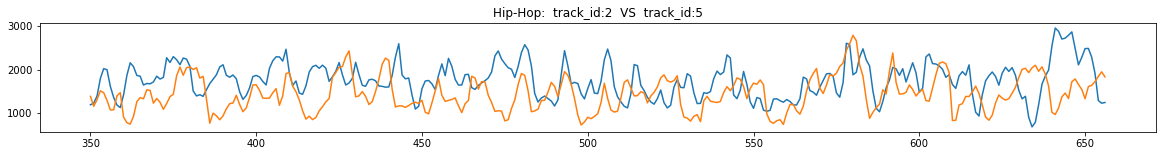

In [167]:
offset = 350
win = 400
ts1 = ts_df.iloc[0, offset:(offset+win)]
ts2 = ts_df.iloc[1, offset:(offset+win)]

# Amplitude Scaling
#ts1 = (ts - ts.mean()) / ts.std()
#ts2 = (ts2 - ts2.mean()) / ts2.std()

plt.figure(figsize=(20,2))
plt.title('Hip-Hop:  track_id:2  VS  track_id:5')
plt.plot(ts1)
plt.plot(ts2)
print(ts1.mean(), ts2.mean(), ts1.std(), ts2.std())

In [161]:
Prova=ts_df

In [162]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1)  # Rescale time series
ts_scaled = scaler.fit_transform(Prova.values)
ts_scaled=ts_scaled.squeeze()
ts_scaled.shape
ts_scaled_Data = pd.DataFrame(ts_scaled, index =Prova.index,columns=Prova.columns)

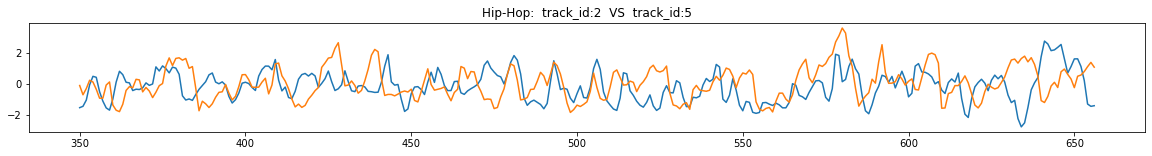

In [166]:
offset = 350
win = 400
ts1 = ts_scaled_Data.iloc[0, offset:(offset+win)]
ts2 = ts_scaled_Data.iloc[1, offset:(offset+win)]

# Amplitude Scaling
#ts1 = (ts - ts.mean()) / ts.std()
#ts2 = (ts2 - ts2.mean()) / ts2.std()

plt.figure(figsize=(20,2))
plt.title('Hip-Hop:  track_id:2  VS  track_id:5')
plt.plot(ts1)
plt.plot(ts2)